In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
import tamil
from collections import defaultdict

In [2]:
plt.rcParams.update({'font.size': 22})

In [3]:
''.join([i for i in 'வார்டு எண் ward number' if ord(i) < 128]).strip()

'ward number'

In [4]:
s = [i for i in 'வார்டு எண்']
print s

['\xe0', '\xae', '\xb5', '\xe0', '\xae', '\xbe', '\xe0', '\xae', '\xb0', '\xe0', '\xaf', '\x8d', '\xe0', '\xae', '\x9f', '\xe0', '\xaf', '\x81', ' ', '\xe0', '\xae', '\x8e', '\xe0', '\xae', '\xa3', '\xe0', '\xaf', '\x8d']


In [5]:
def plot_column(data=None, col=None, ward=''):
    try:
        col_decode = ''.join([i for i in col if ord(i) < 128]).strip()
        data[col] = data[col].apply(lambda c: ''.join([i for i in str(c) if ord(i) < 128]).strip())
        col2 = ' \n'.join(wrap(col_decode, 60))
        data['dummy'] = [1]*data.shape[0]
        with plt.style.context('bmh'):
            plt.figure(figsize=(20, 14))
            g = sns.barplot(x=col, y='dummy', data=data, estimator=lambda x: len(x)*100.0 / len(data))
            g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=16)
            plt.ylabel(col2 + '(%)', fontsize=22)
            plt.title('Ward '+ward, fontsize=22)
    except:
        print 'Could not generate figure for:', col.upper()
        pass

In [6]:
tamil_english_dict = {
    u'இல்லை': 'No',
    u'ஆம்': 'Yes',
    u'தெரியவில்லை': "Don't Know"
}

def get_eng_val(x):
    return tamil_english_dict[x] if x in tamil_english_dict else x

In [7]:
def get_ward_data(survey=None, ward_number=None):
#     colname = tamil.tscii.convert_to_unicode()
    ward_survey = survey[survey['Ward Number'] == ward_number]
    ward_survey = ward_survey.applymap(lambda x: get_eng_val(x))
    return ward_survey

In [8]:
tamil_survey = pd.read_excel('SURVEY- KNOW OUR WARD (Responses)    November 19 2017_tamil_engcols.xlsx', )
# tamil_survey2 = tamil_survey['வார்டு எண்'].apply(lambda item: item.encode('raw-unicode-escape').decode('utf-8'))

In [9]:
ward_172 = get_ward_data(survey=tamil_survey, ward_number=172)

In [10]:
ward_172.shape

(52, 248)

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING PUBLIC HEALTH & HYGIENE. [PERIODIC VISITS ARE DONE BY HEALTH DEPARTMENT TO PREVENT OUTBREAK OF DISEASES LIKE CHOLERA, MALARIA, DENGUE, ETC]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING HERITAGE BUILDINGS. [STRUCTURE IS PROTECTED AGAINST PUBLIC MISUSE (DEFACEMENT, GARBAGE DUMPING)]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING THE ZONAL OFFICE. [RESPONSIVENESS OF OFFICERS AND STAFF IS GOOD]
Could not generate figure for: ANY OTHER FEEDBACK/COMMENTS:
Could not generate figure for: UNNAMED: 151


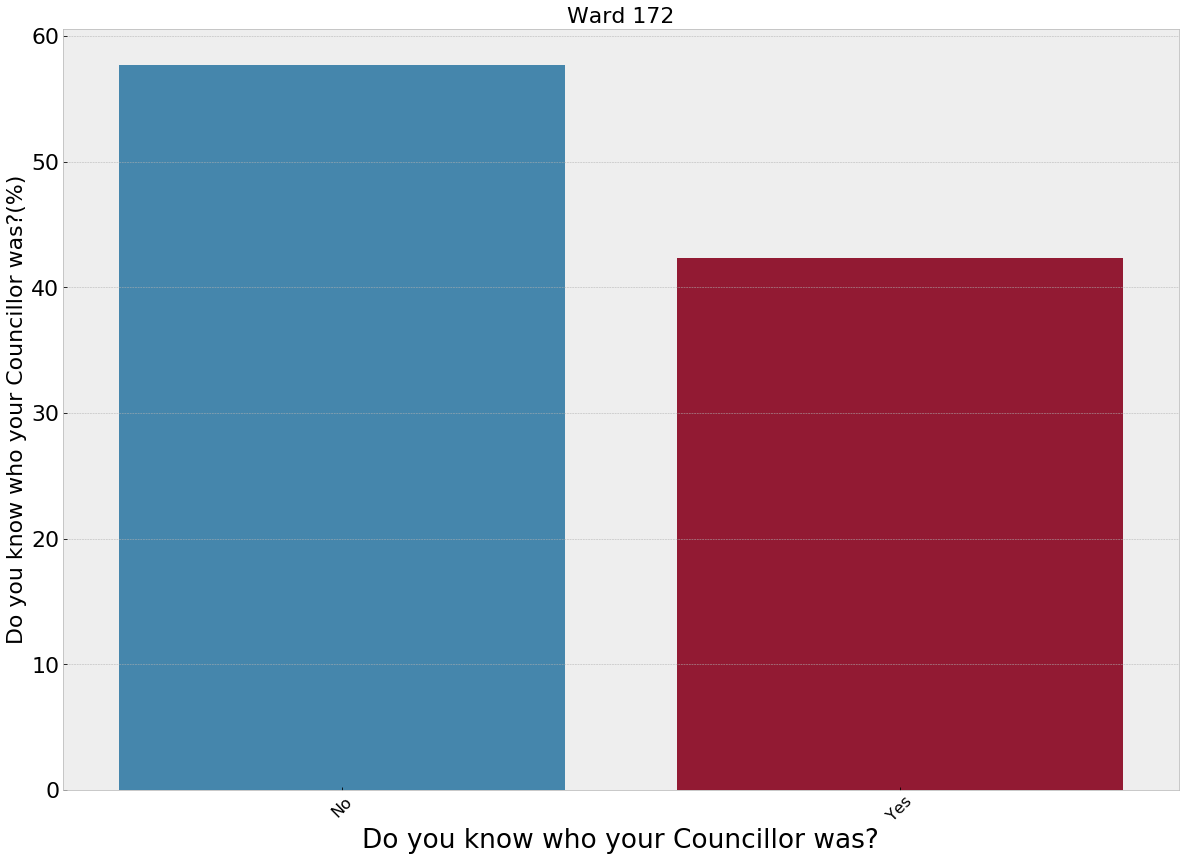

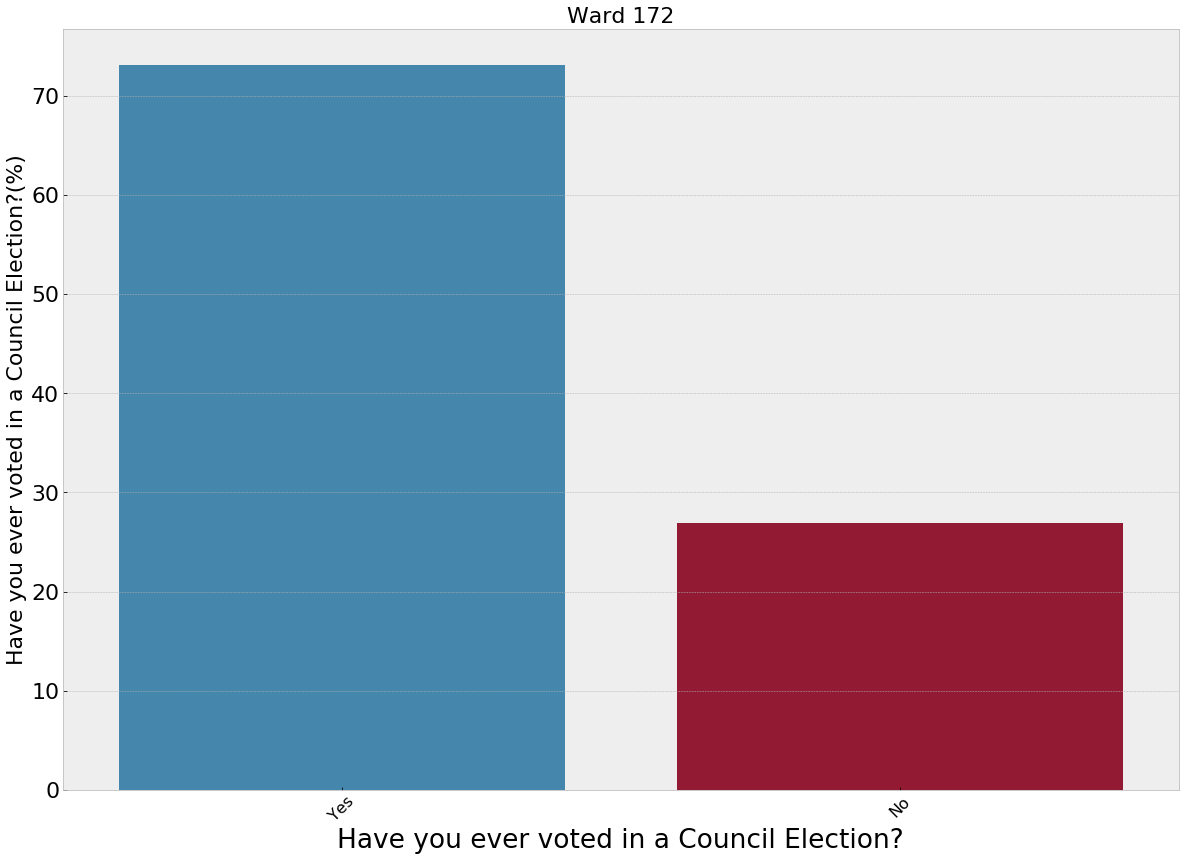

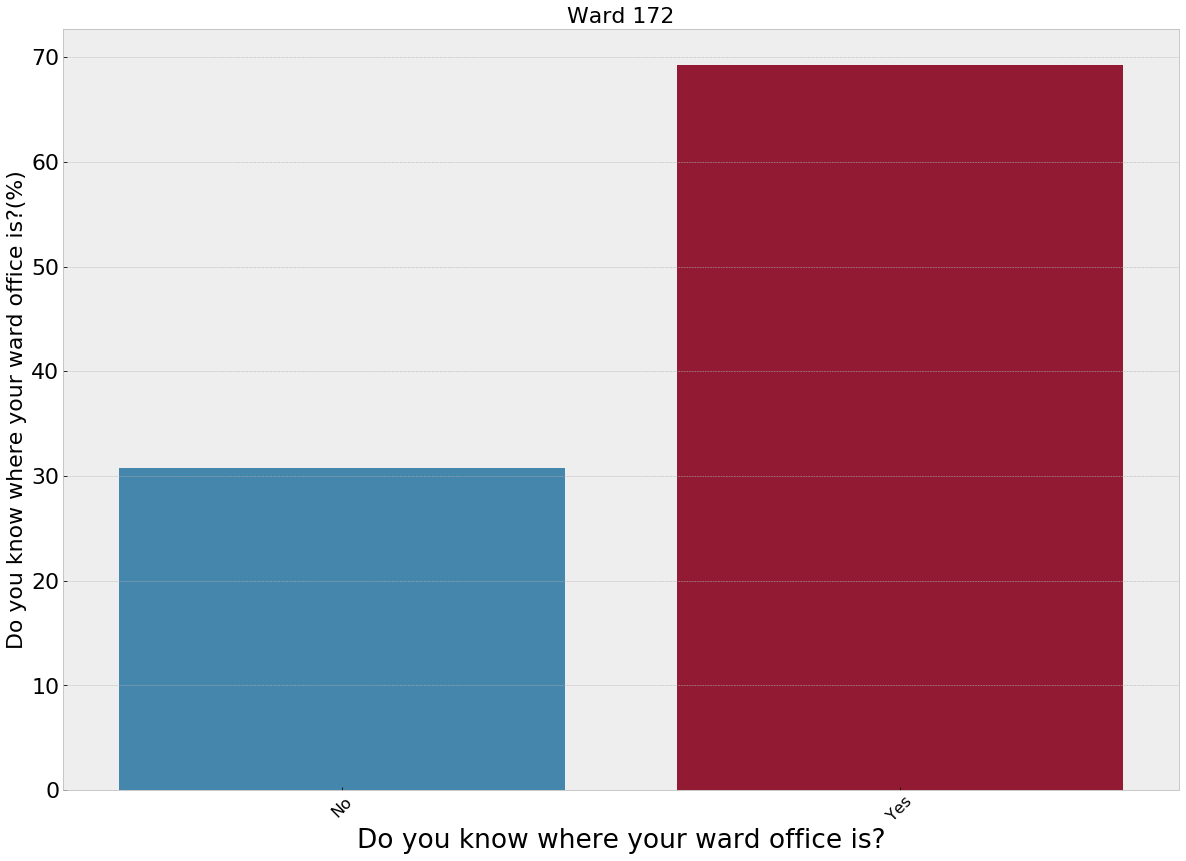

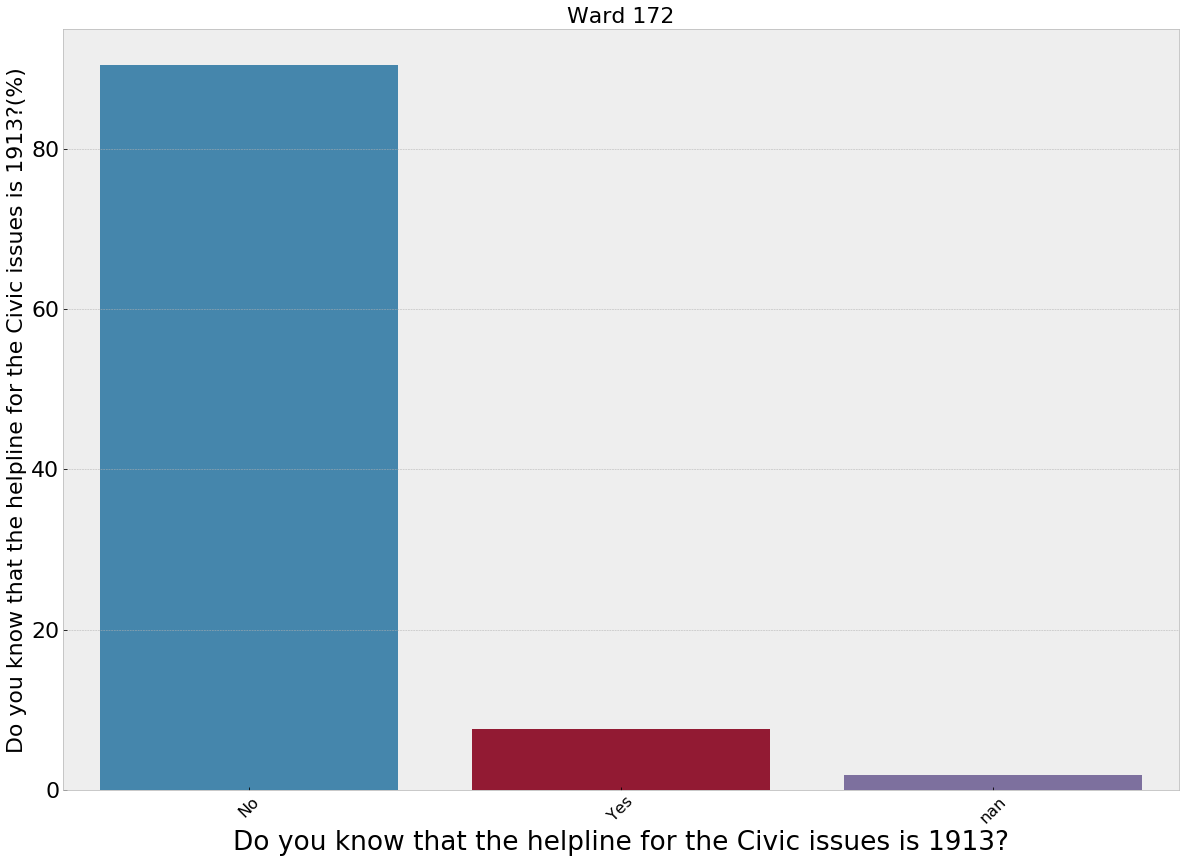

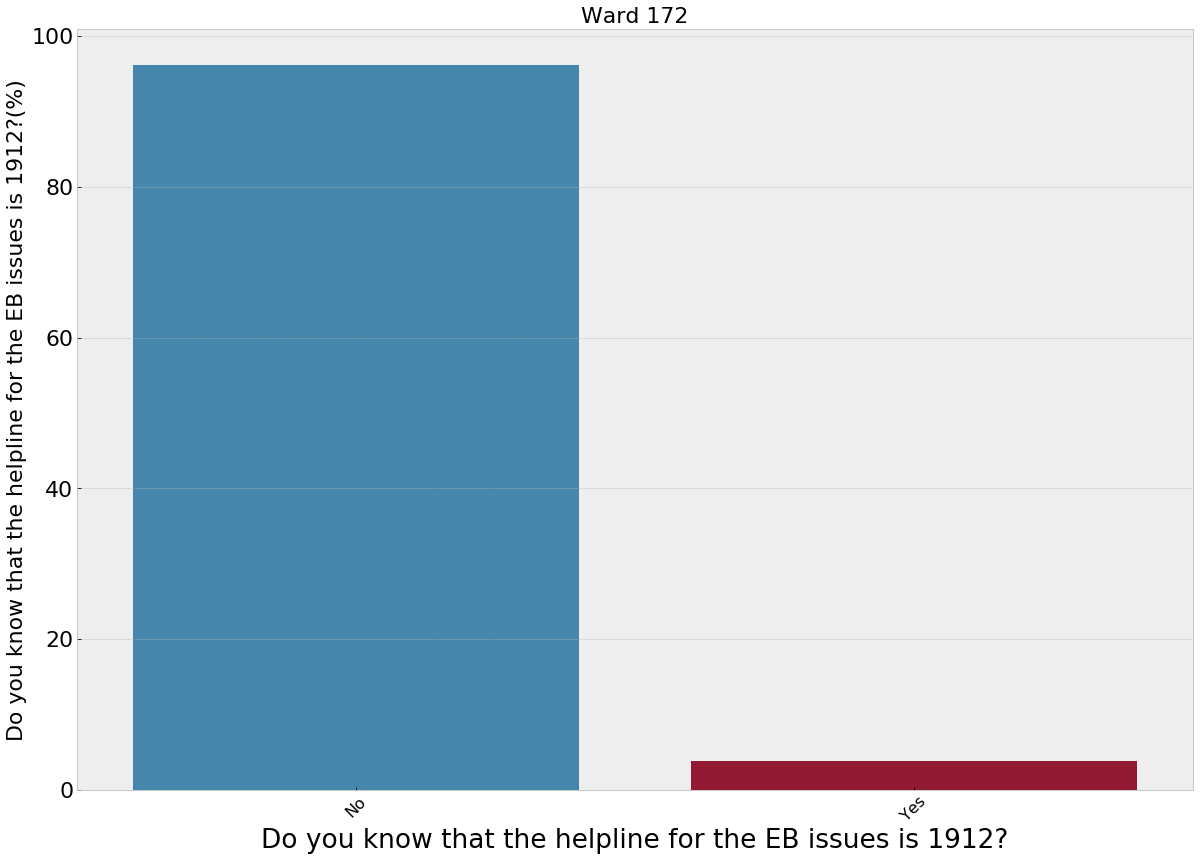

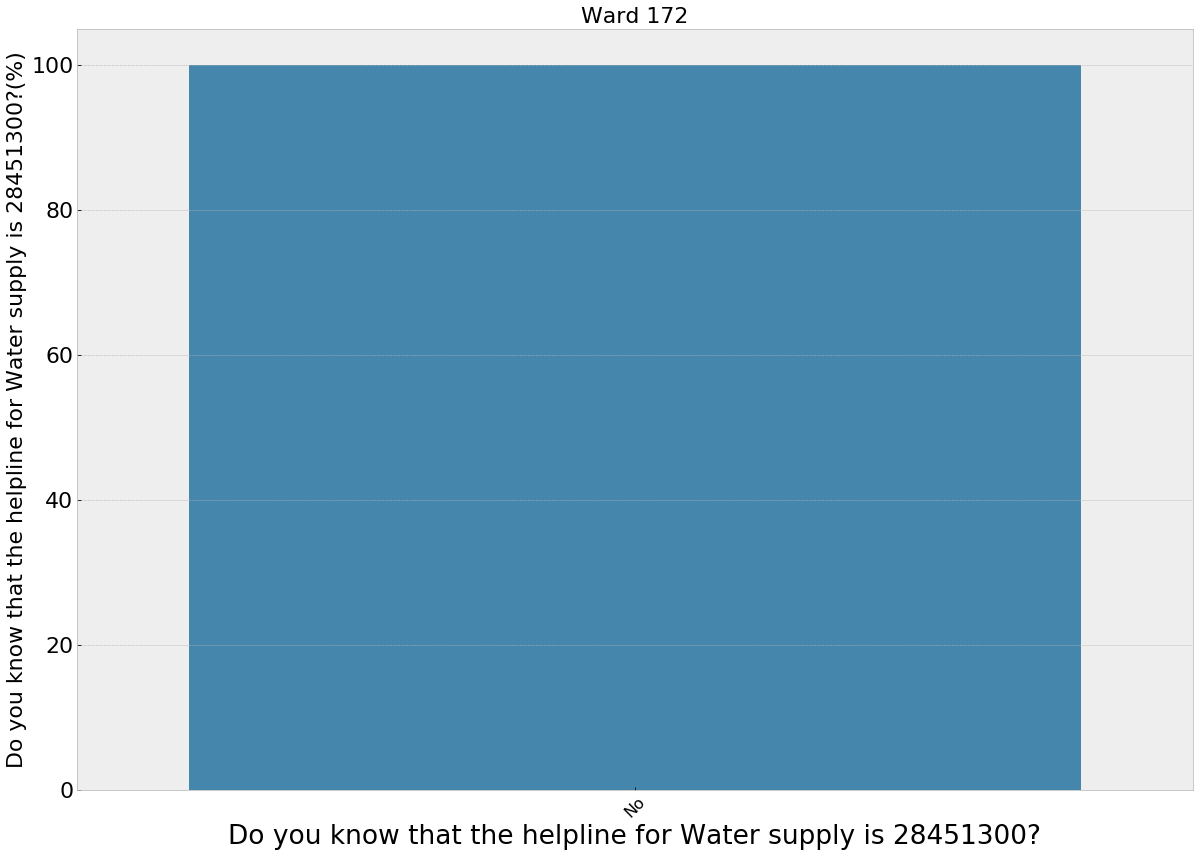

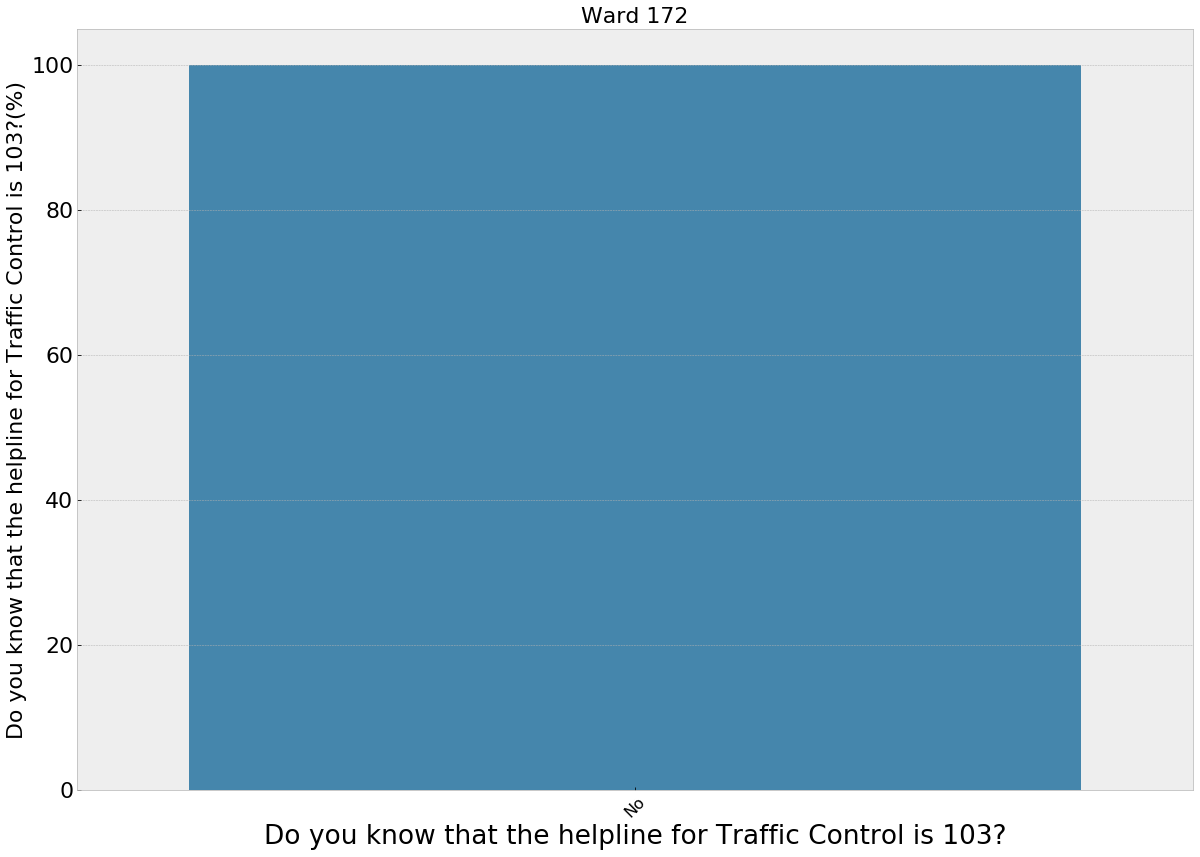

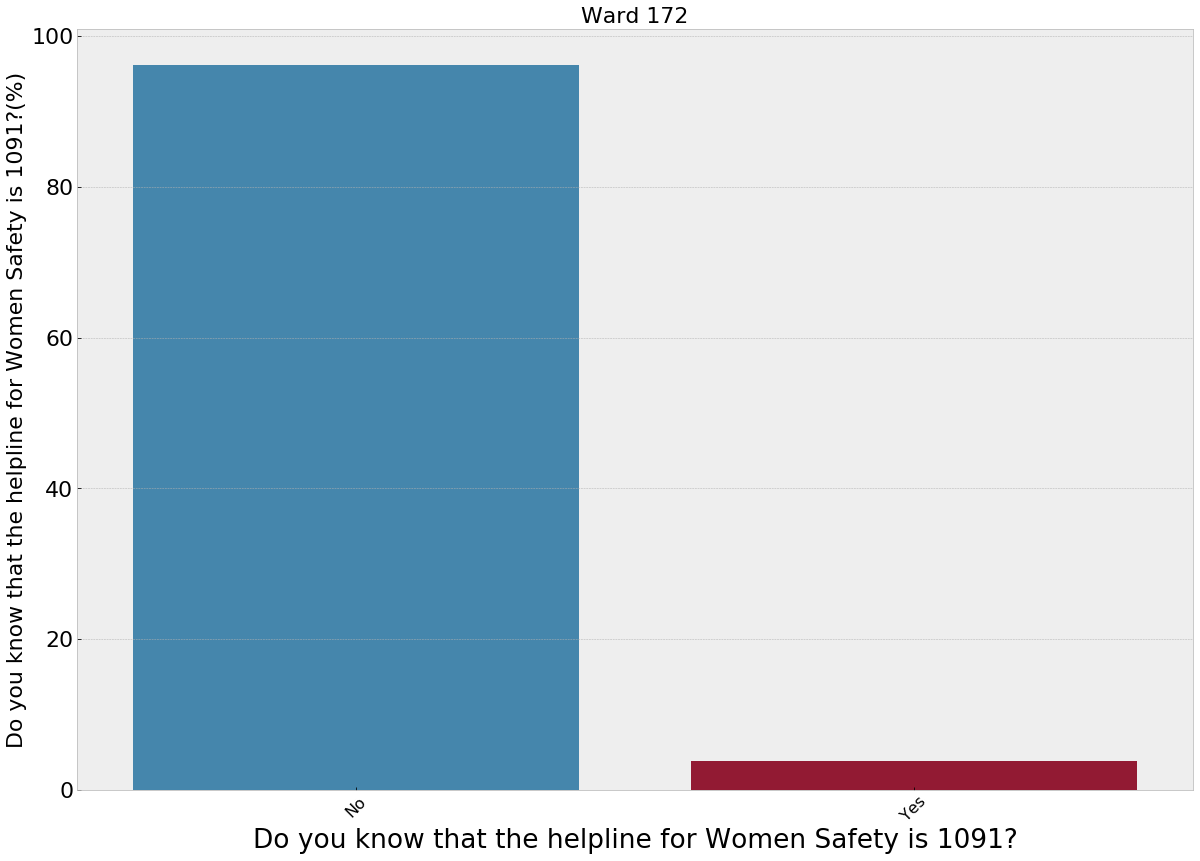

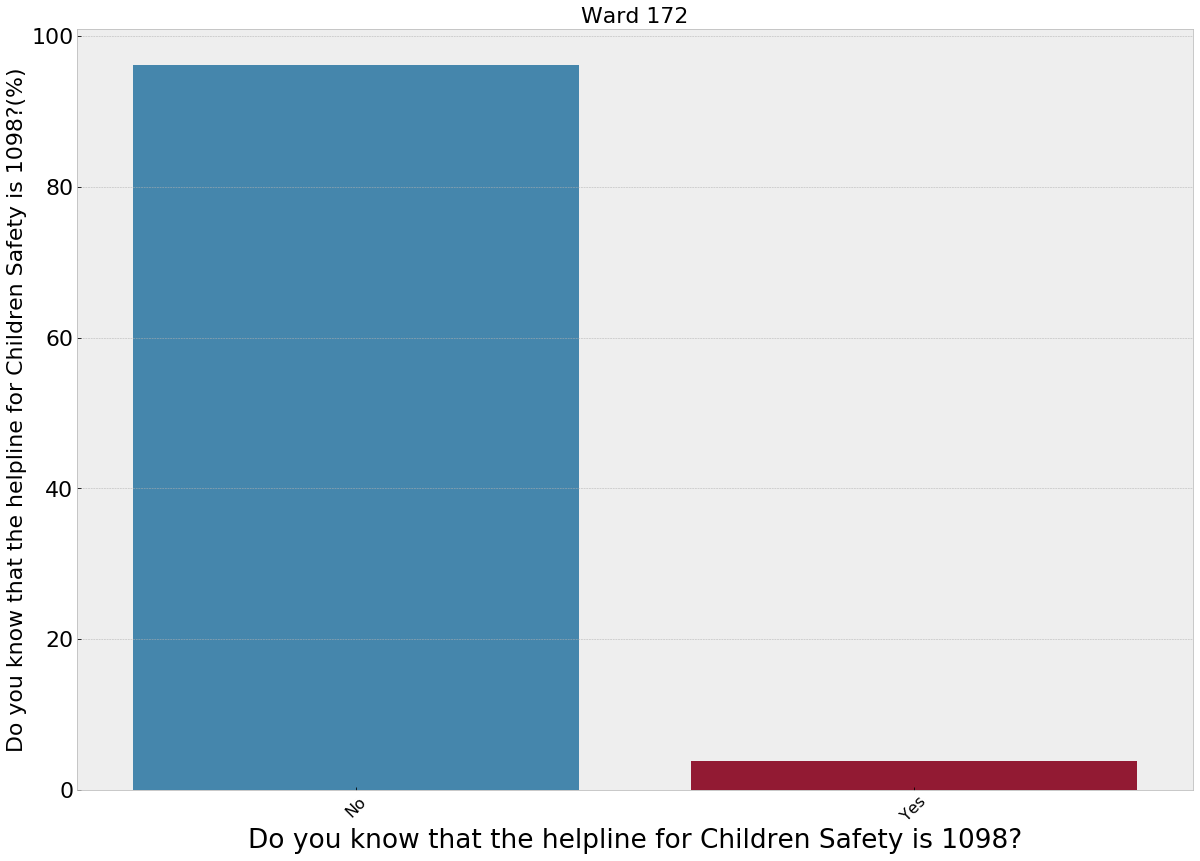

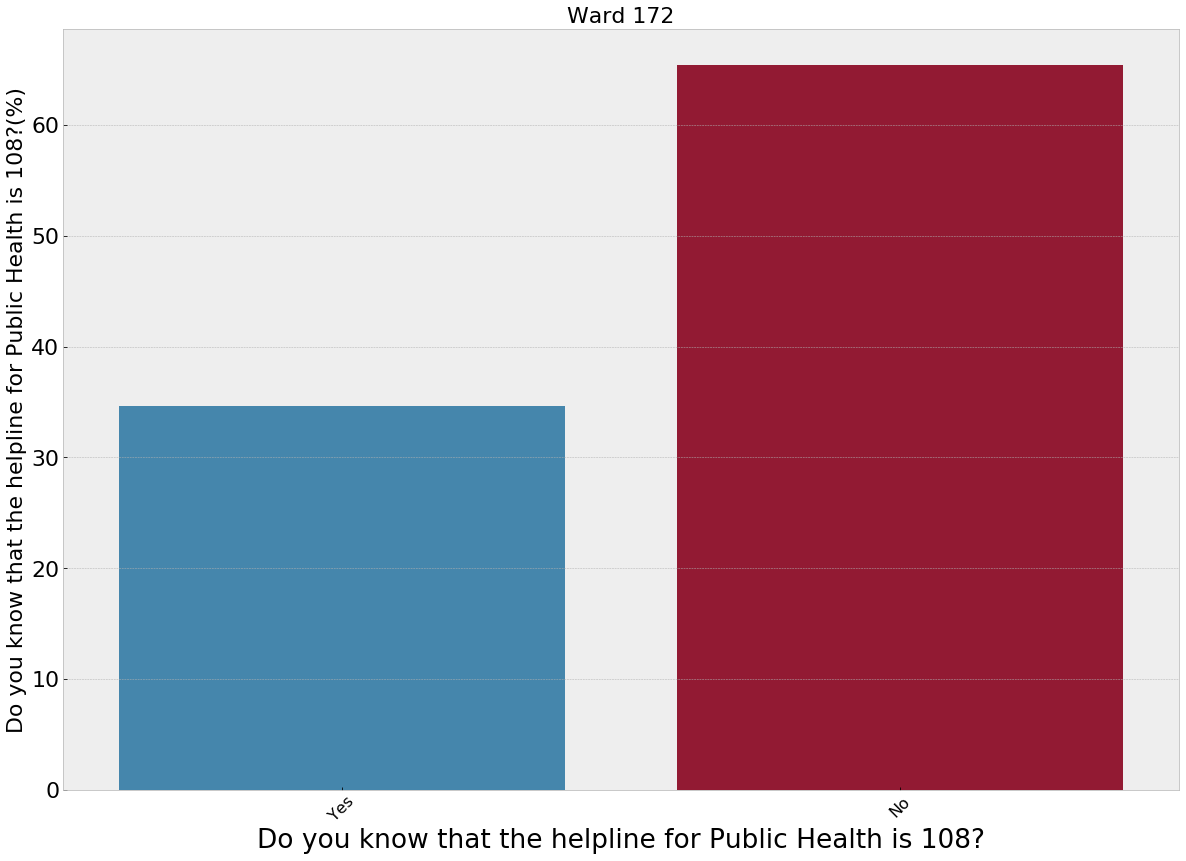

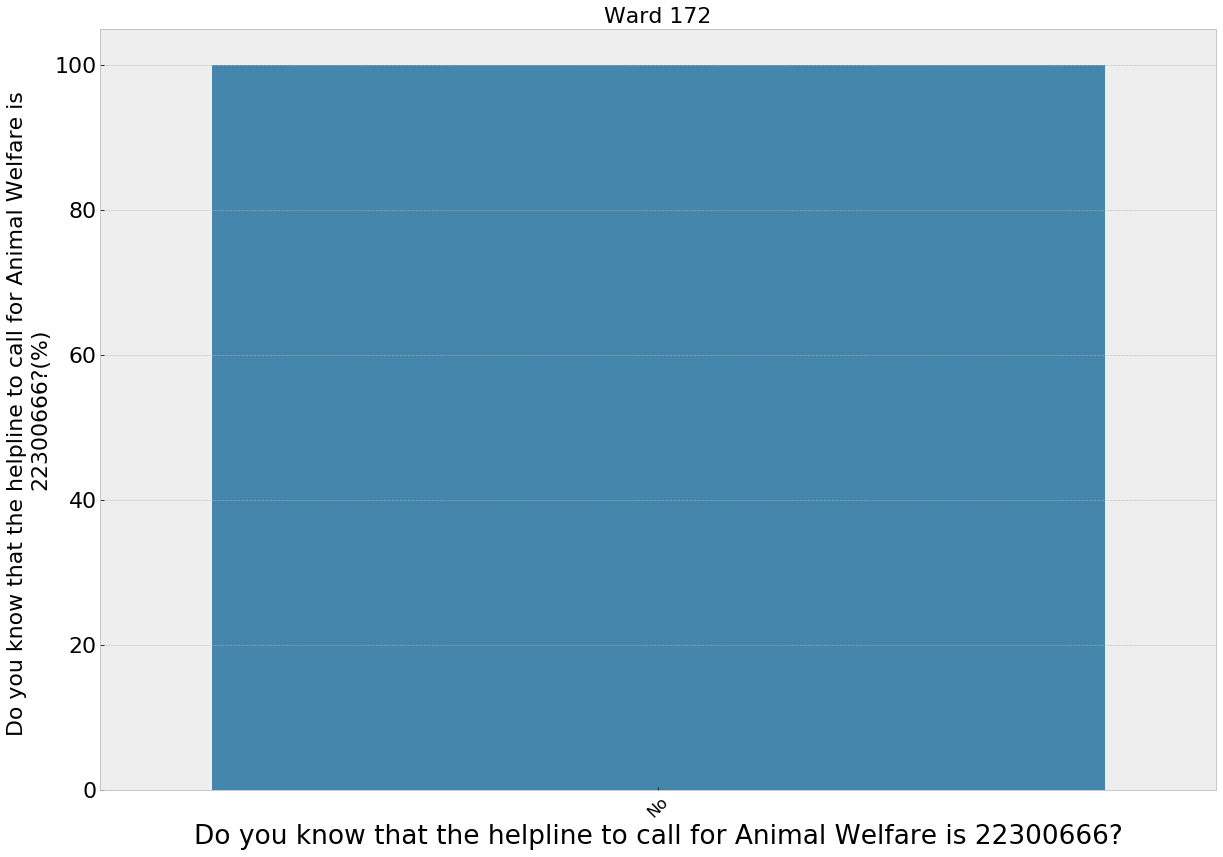

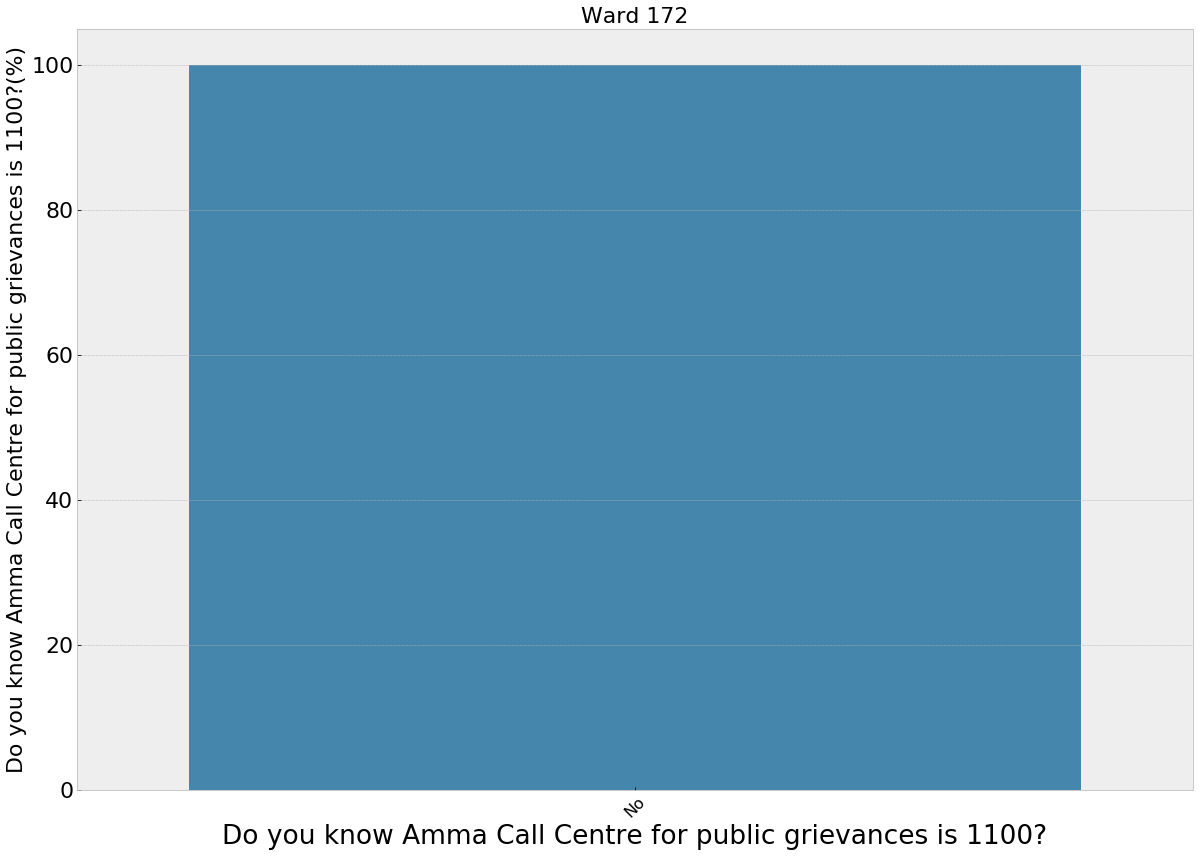

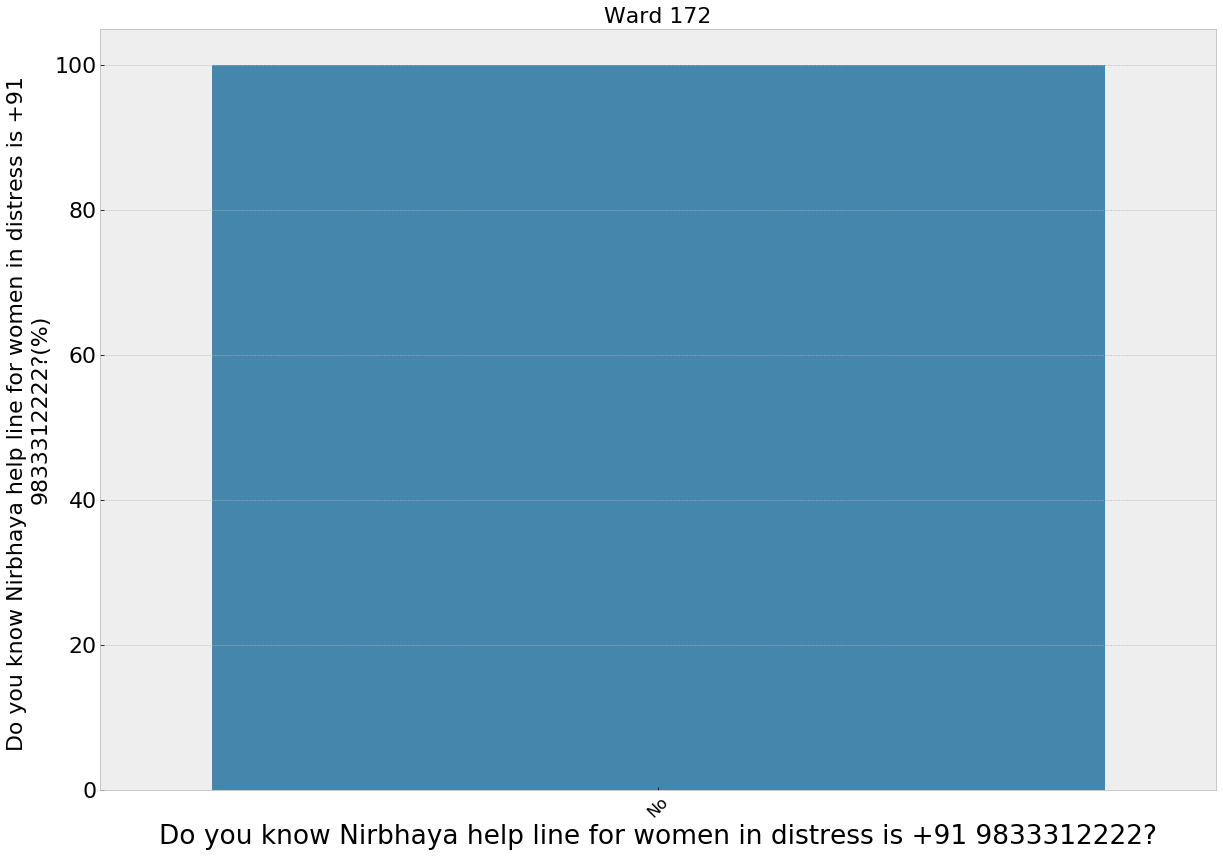

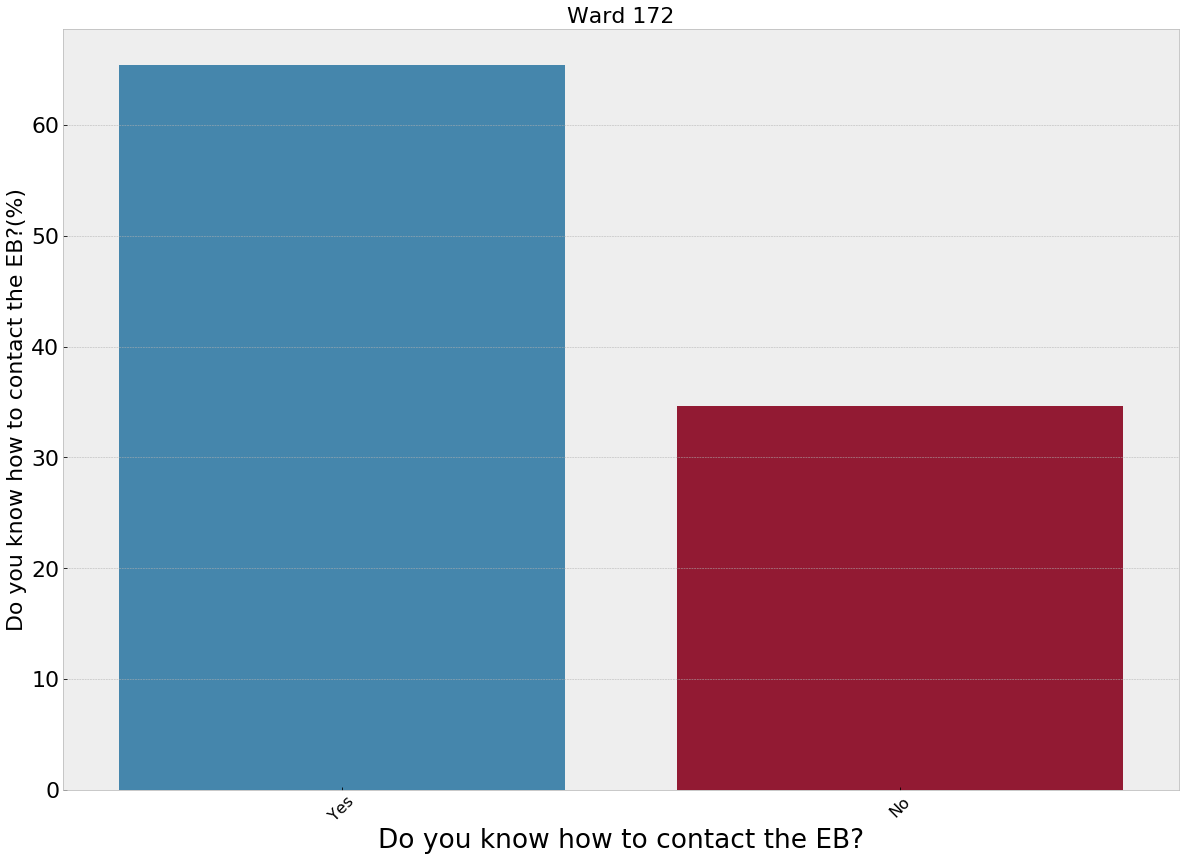

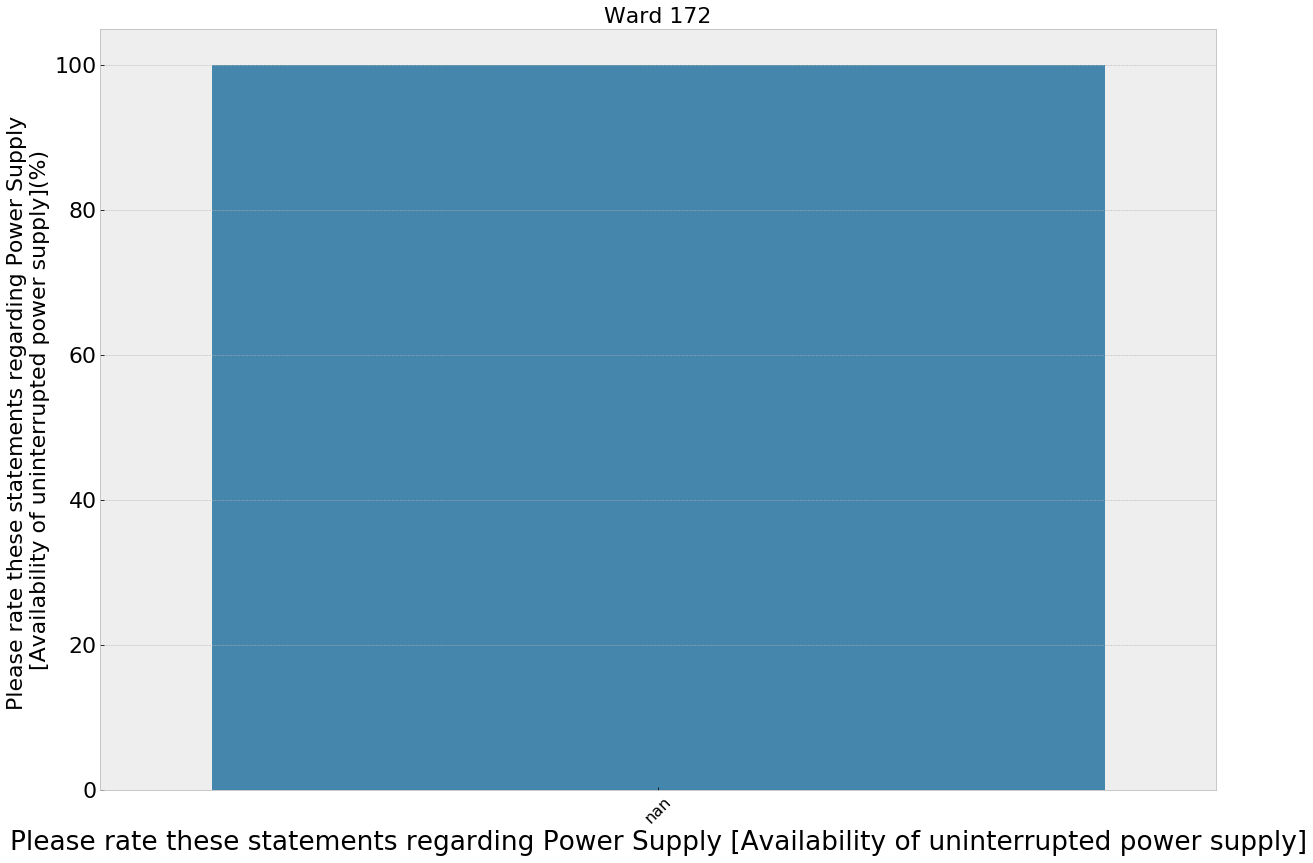

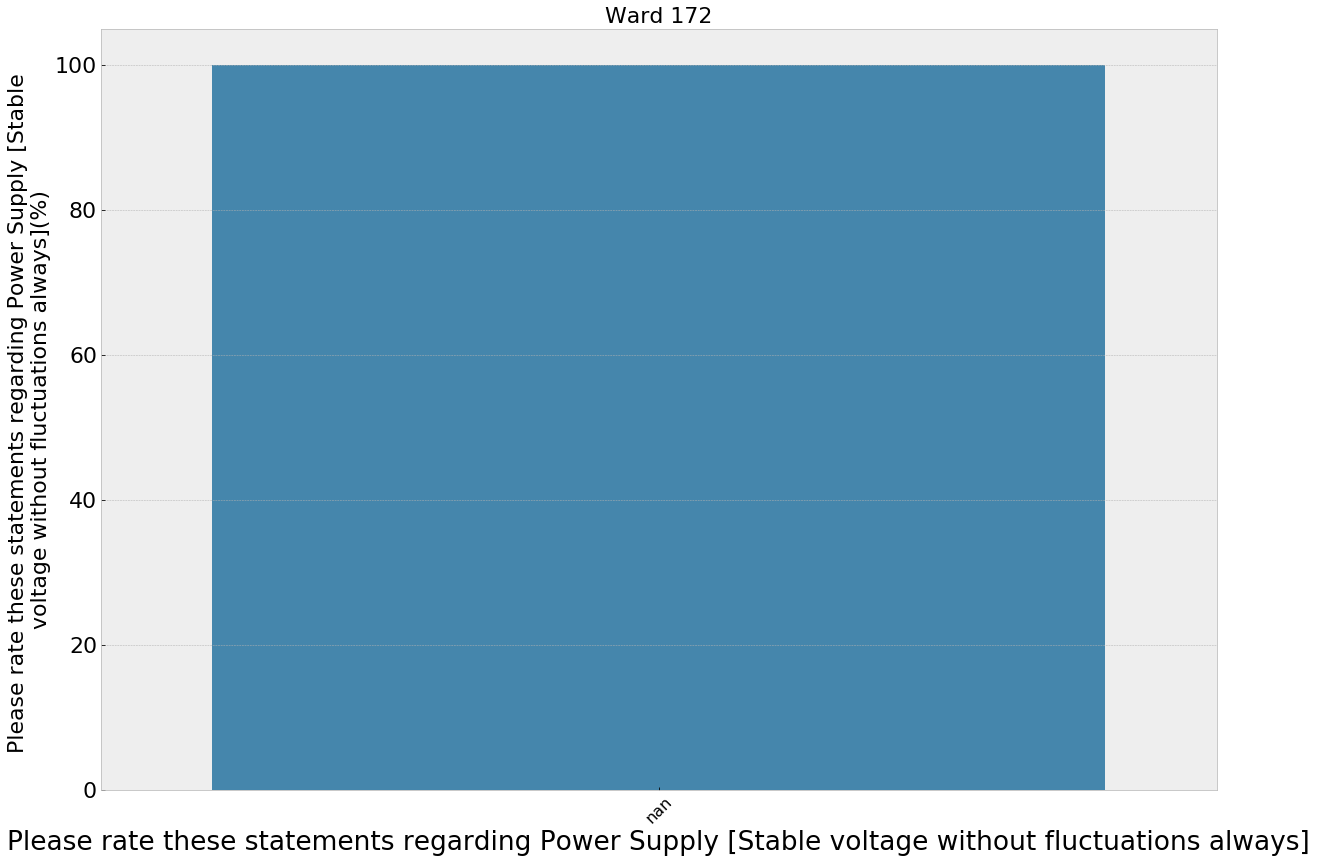

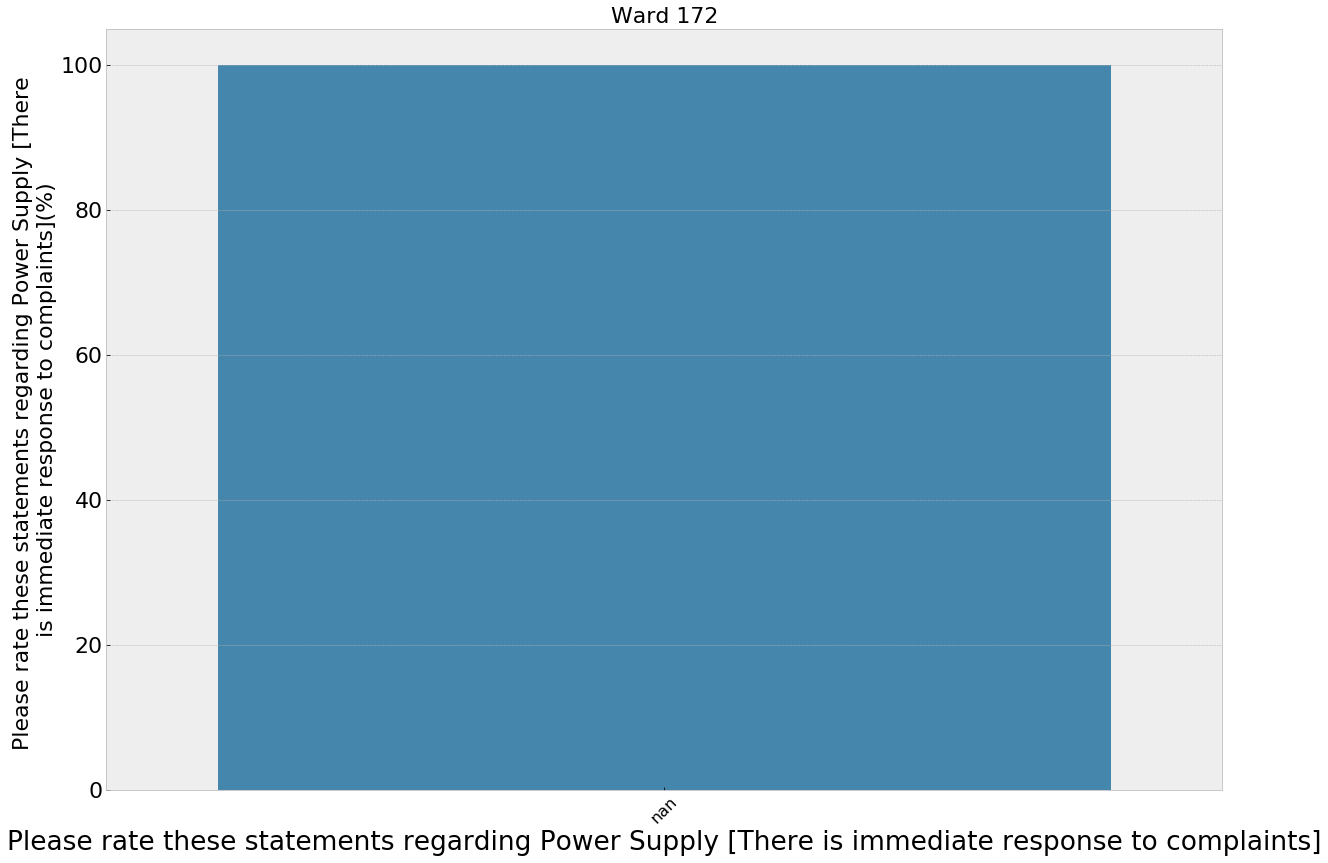

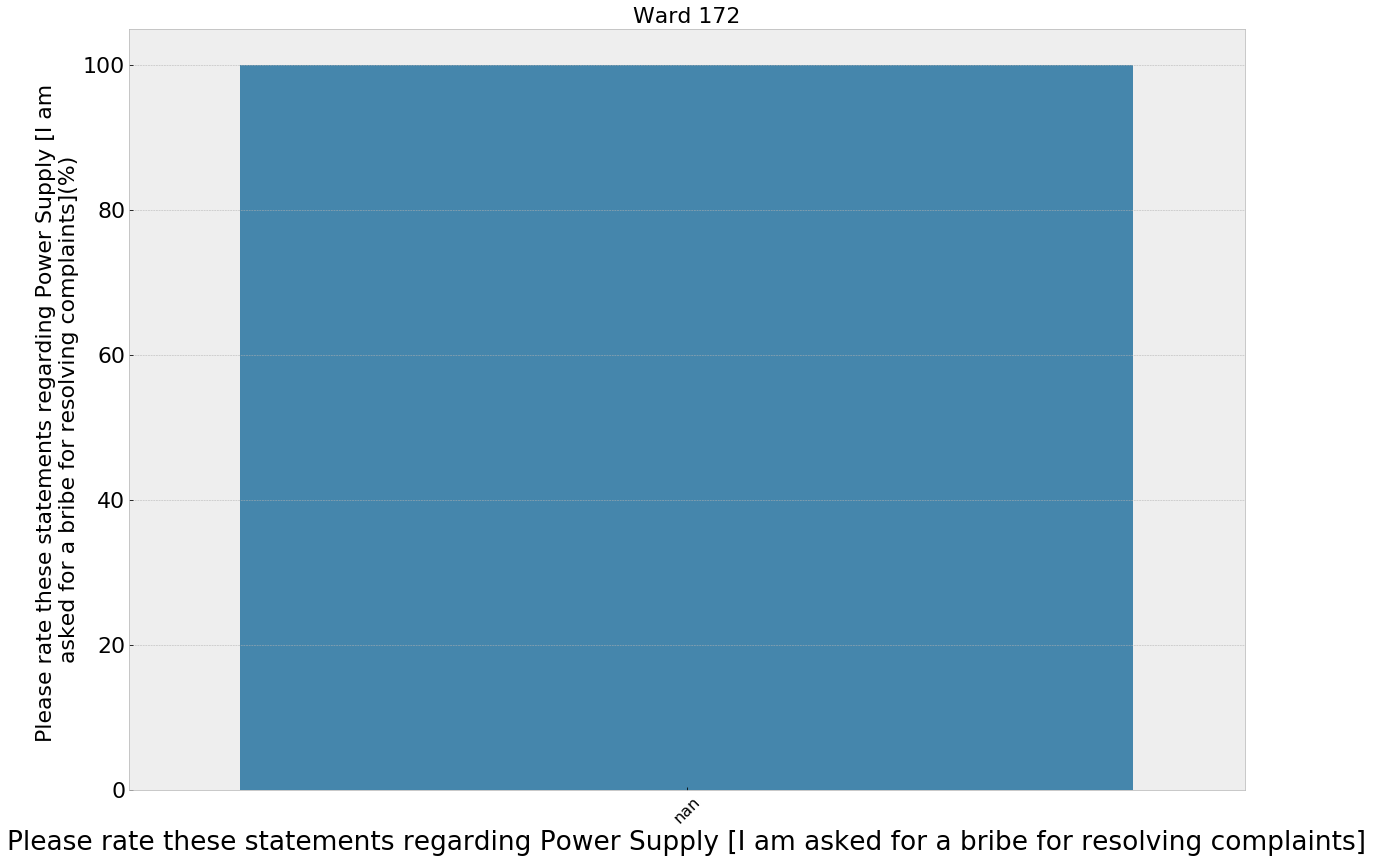

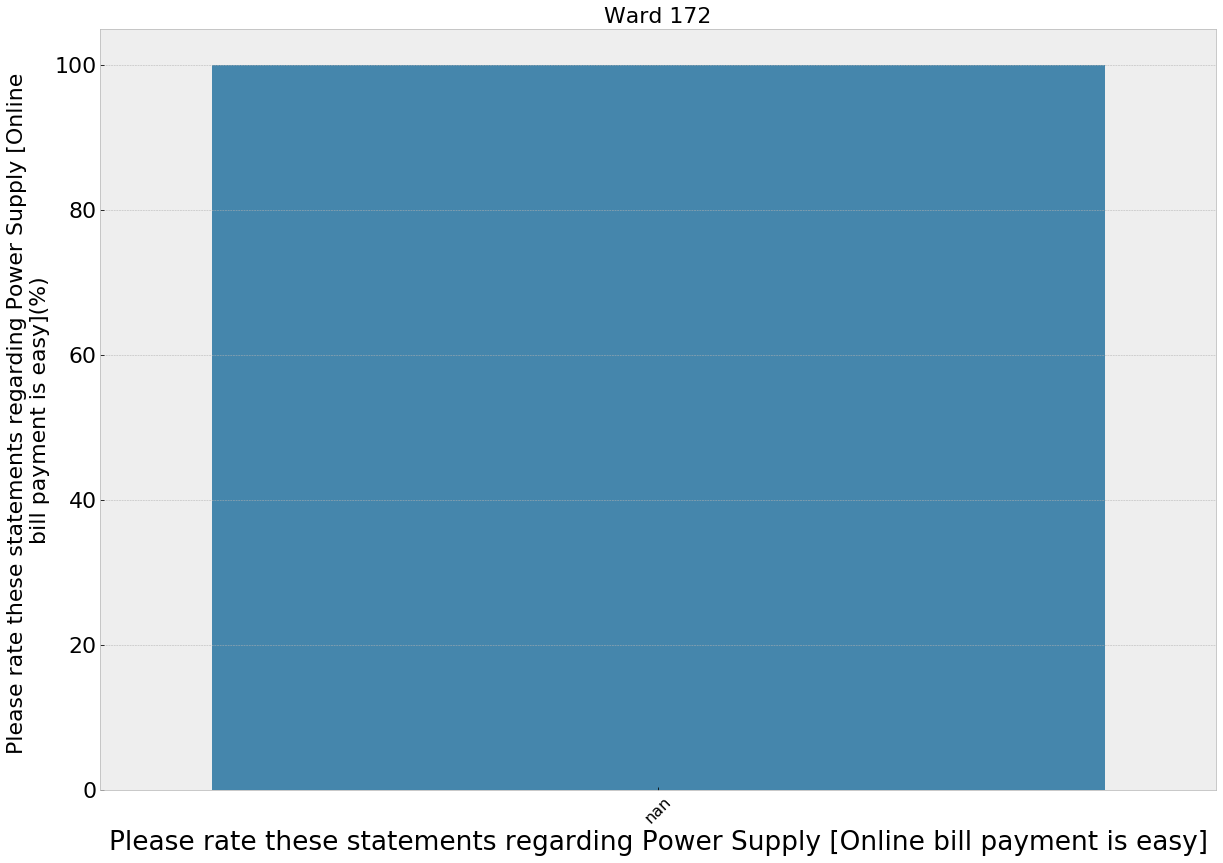

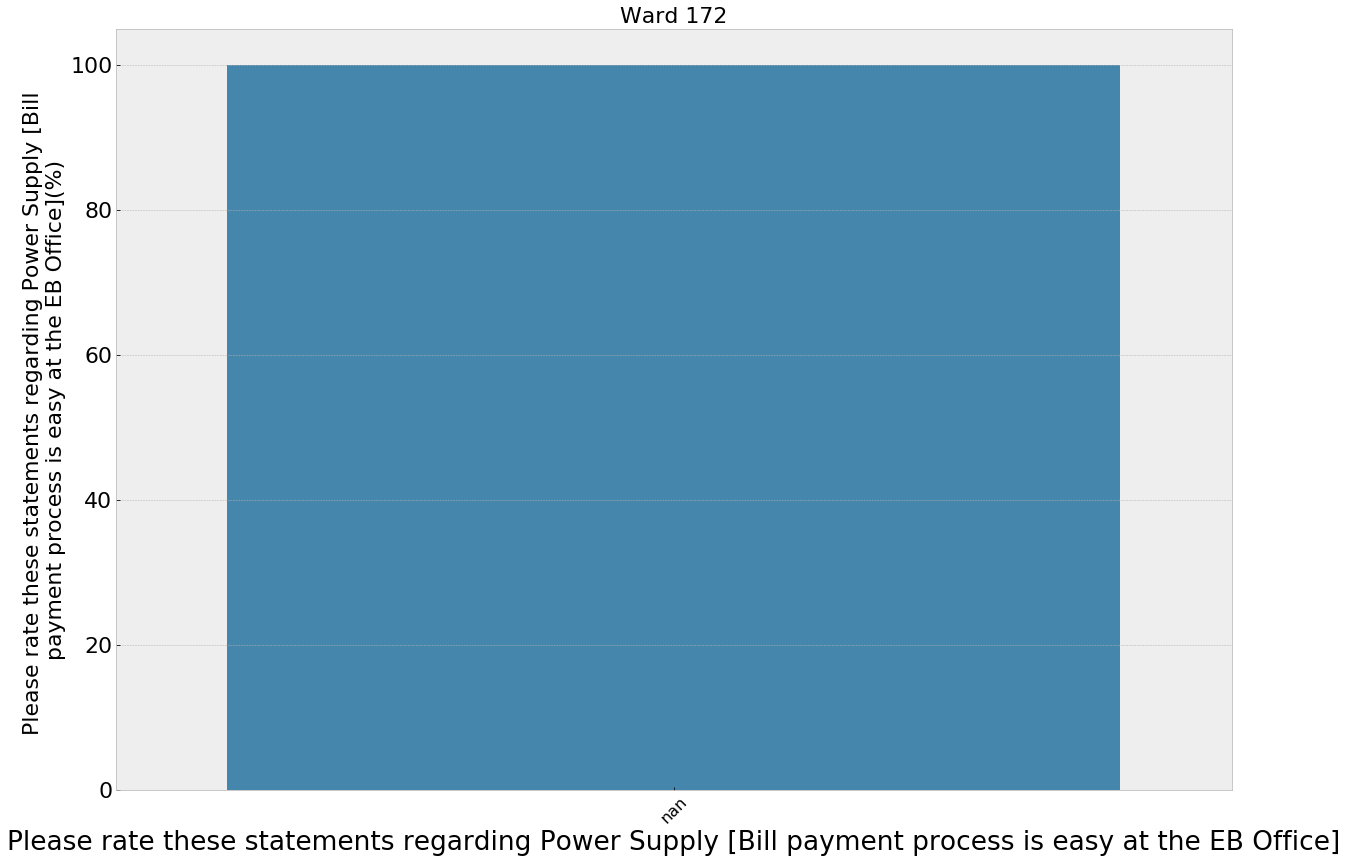

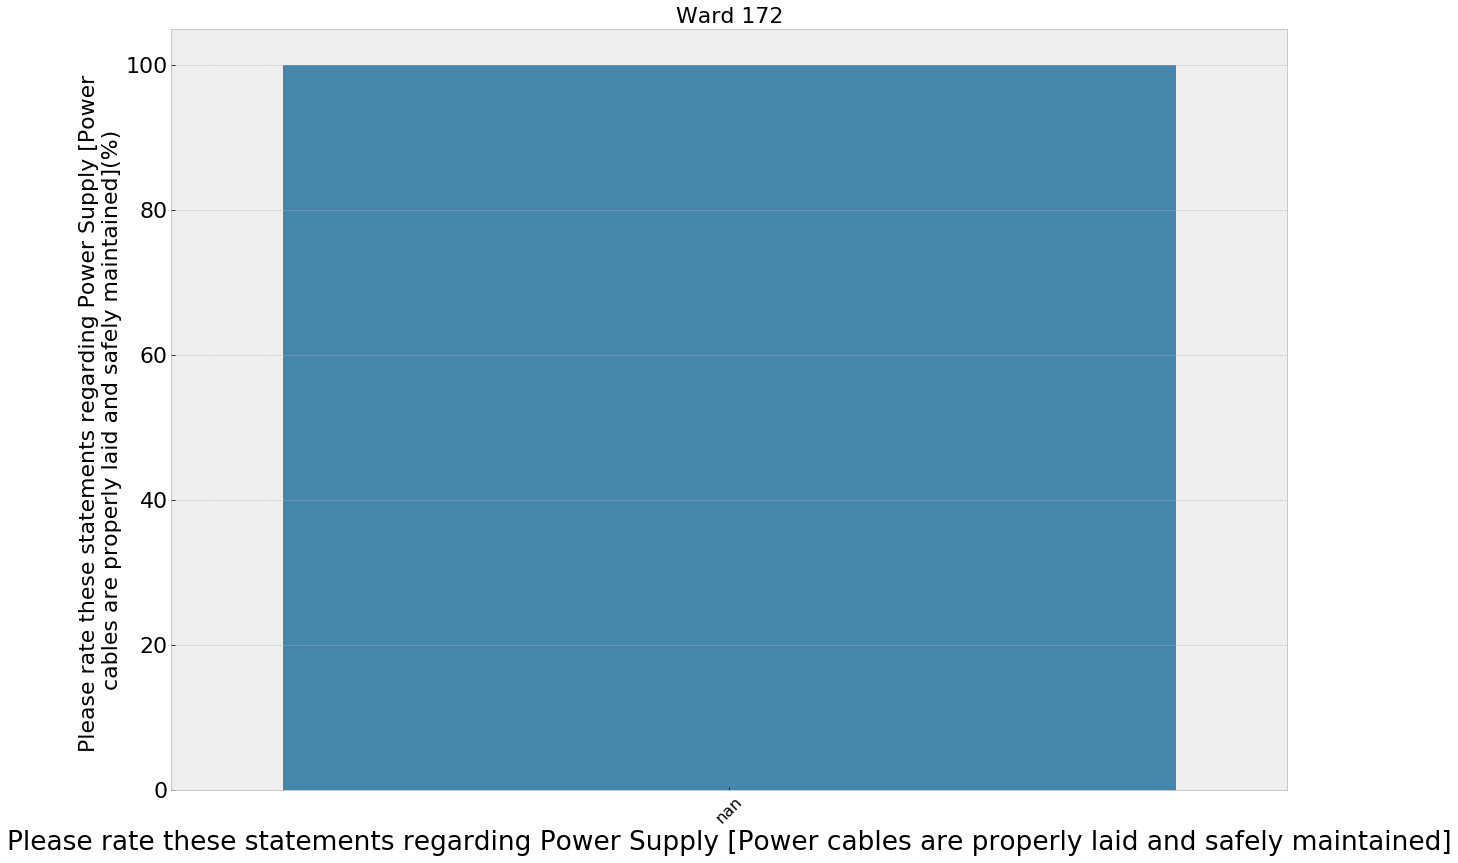

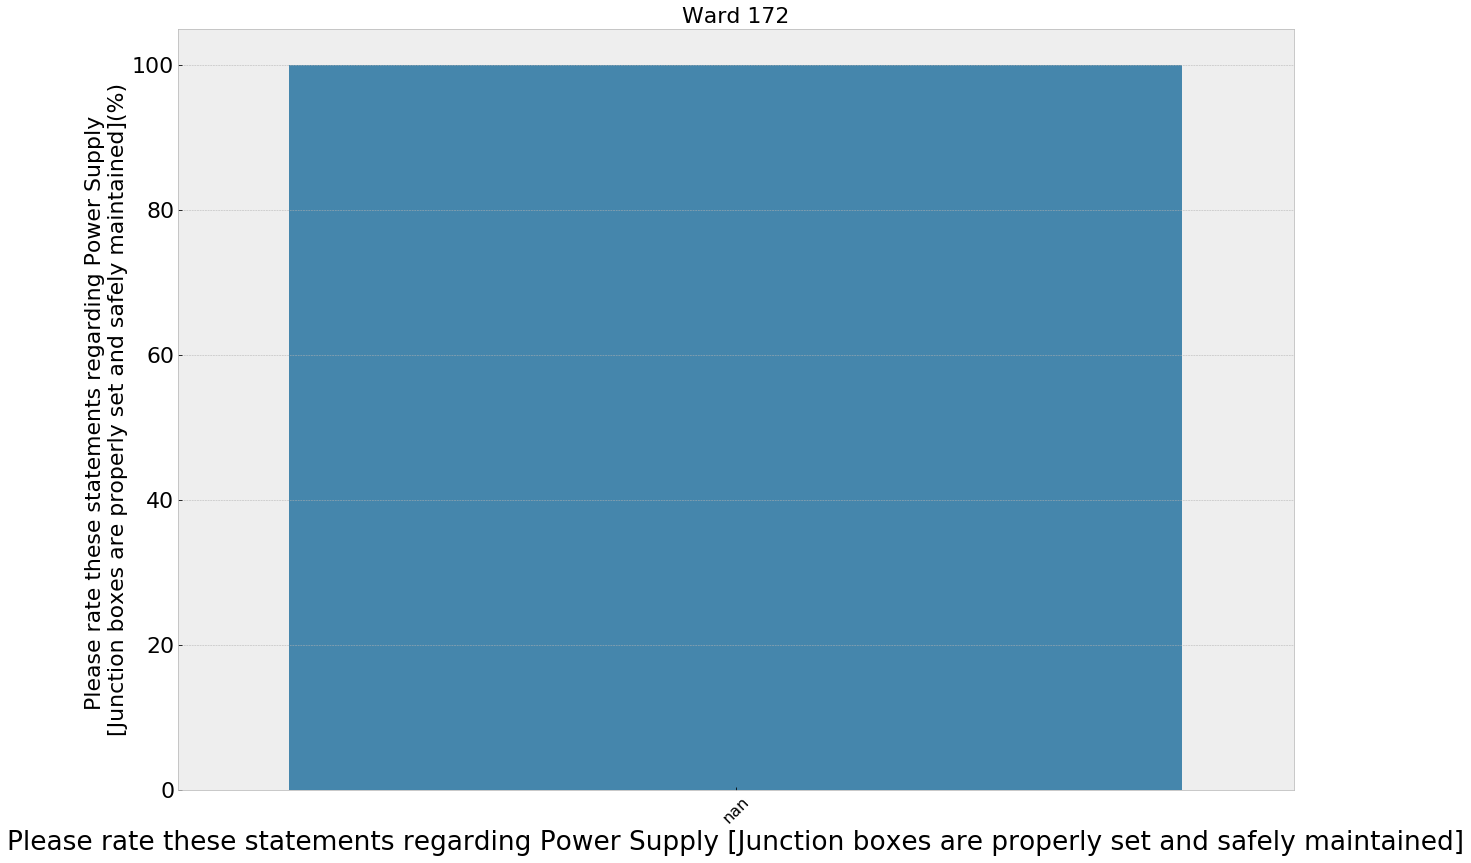

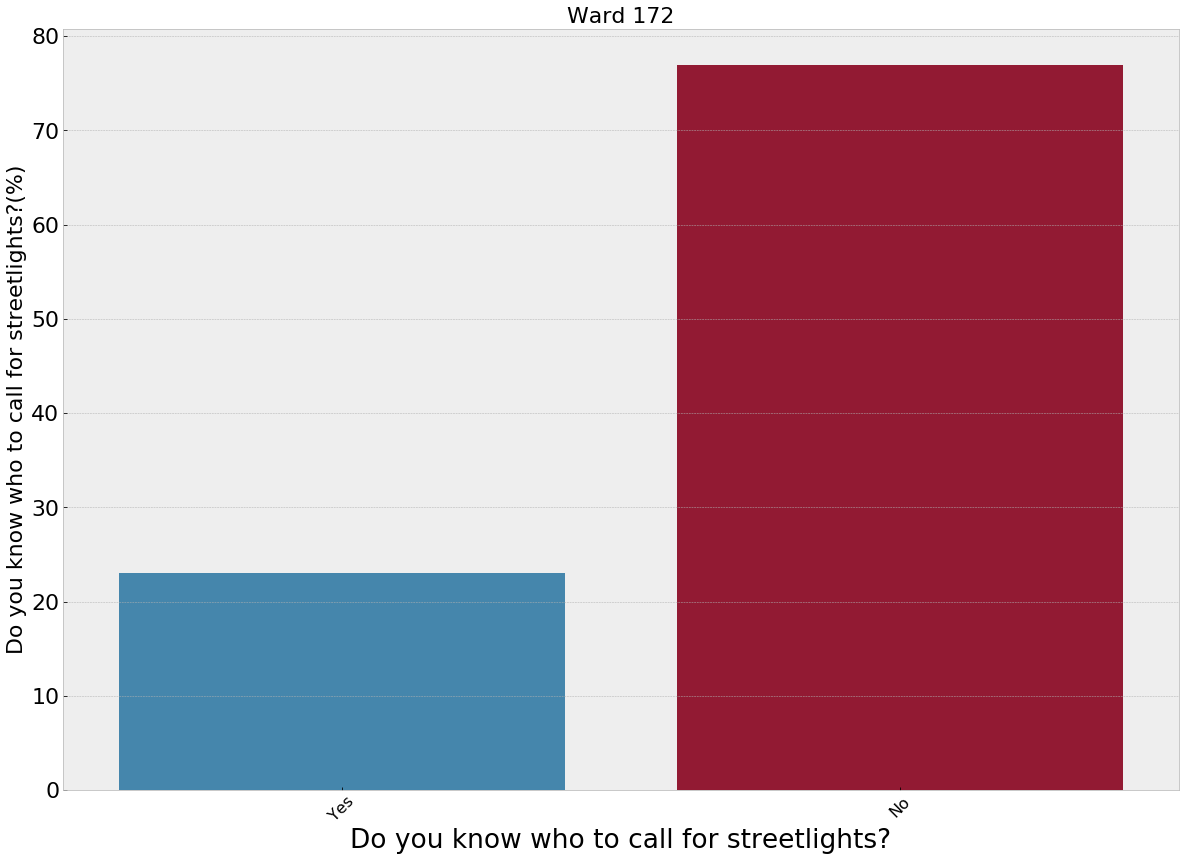

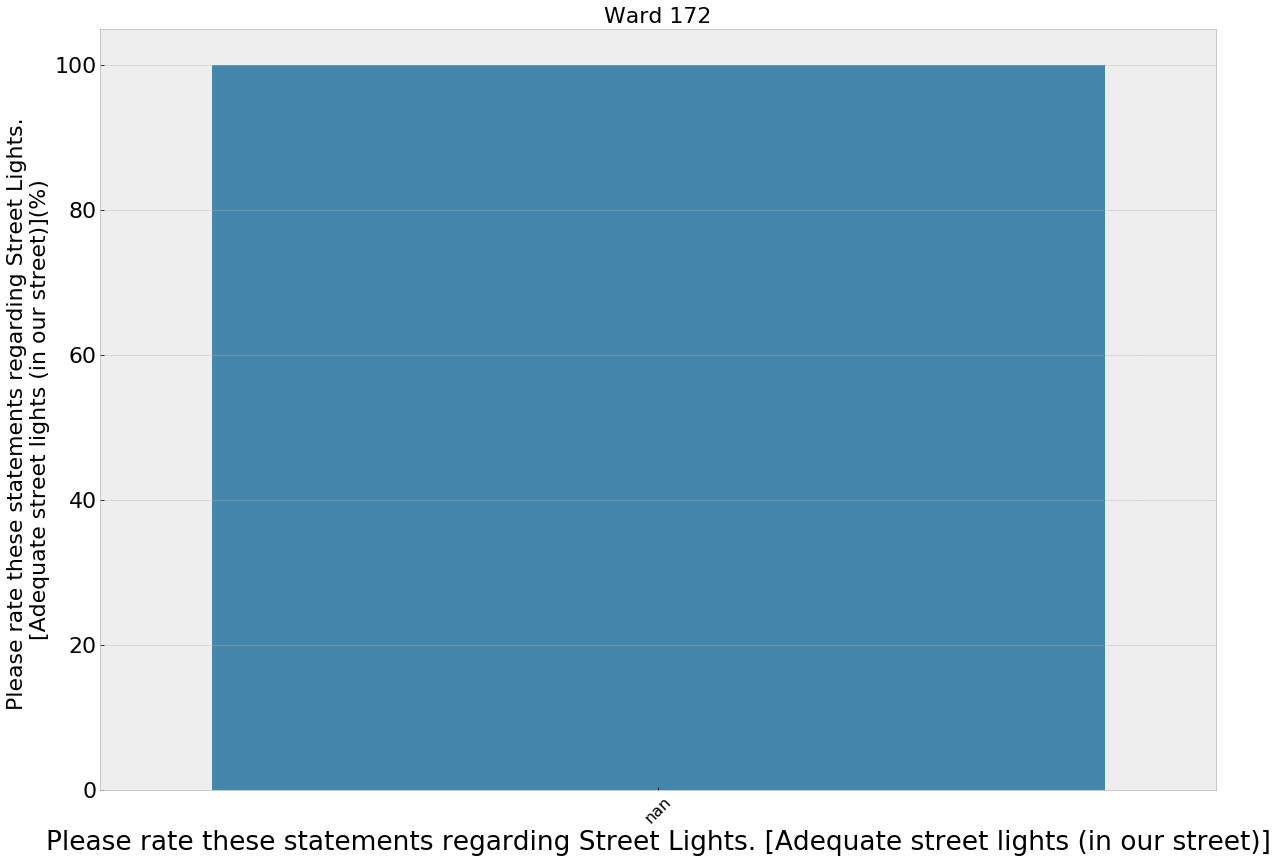

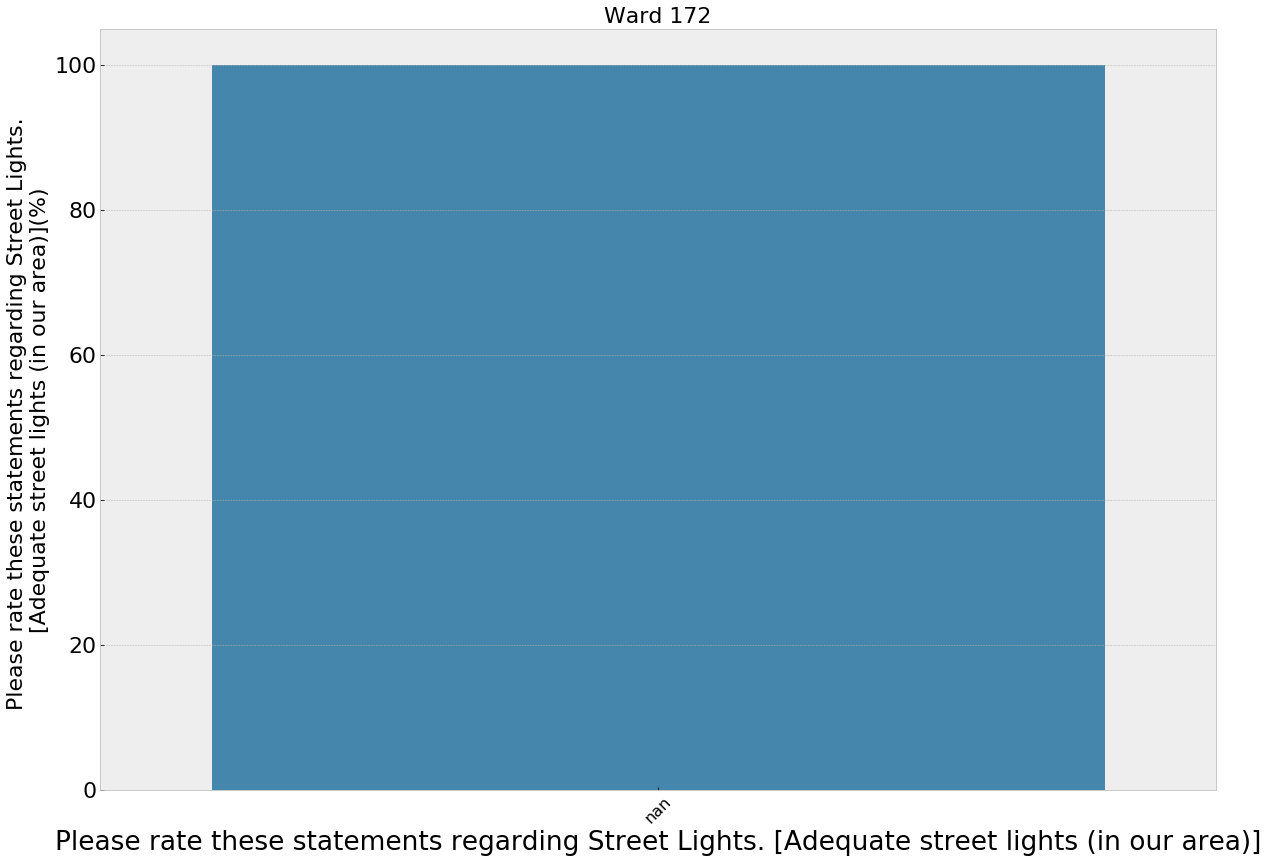

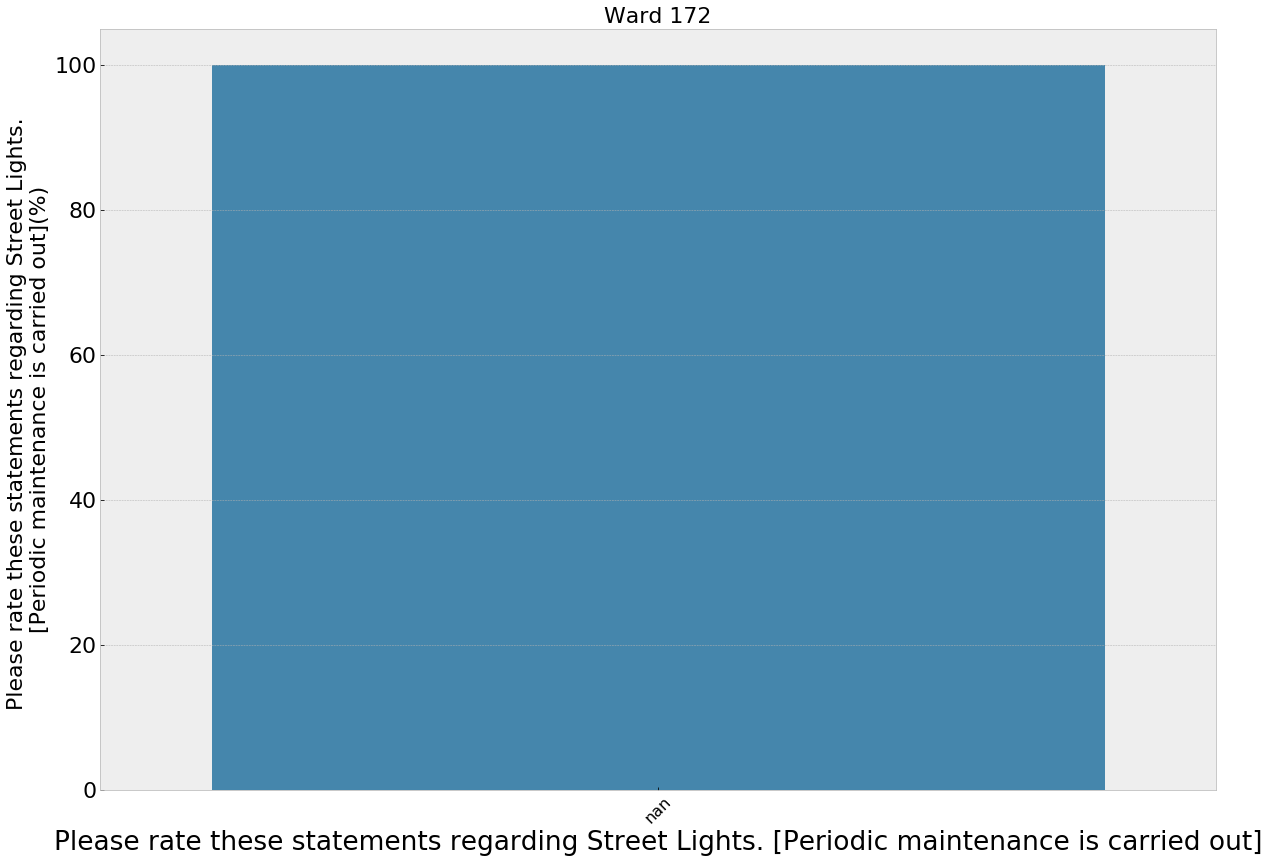

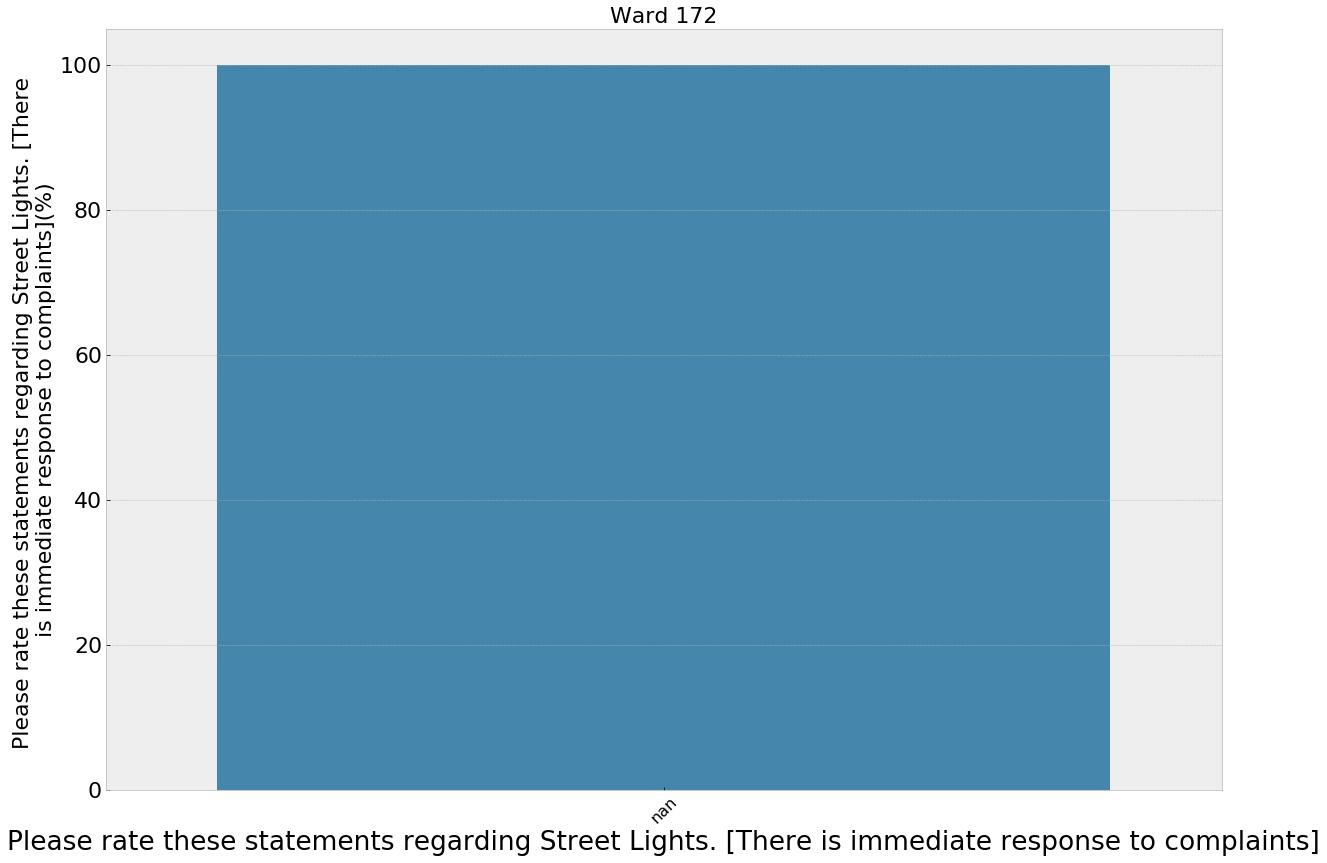

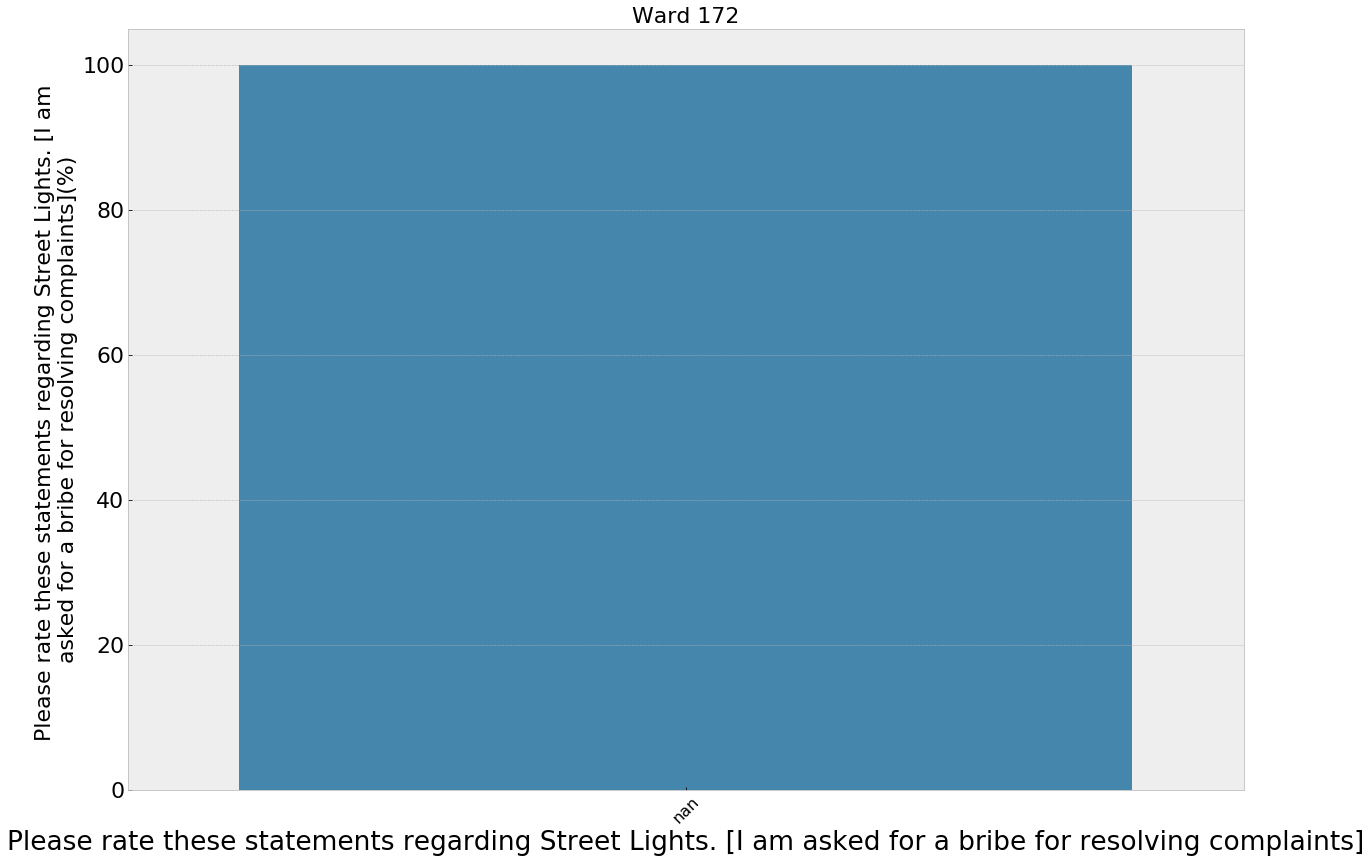

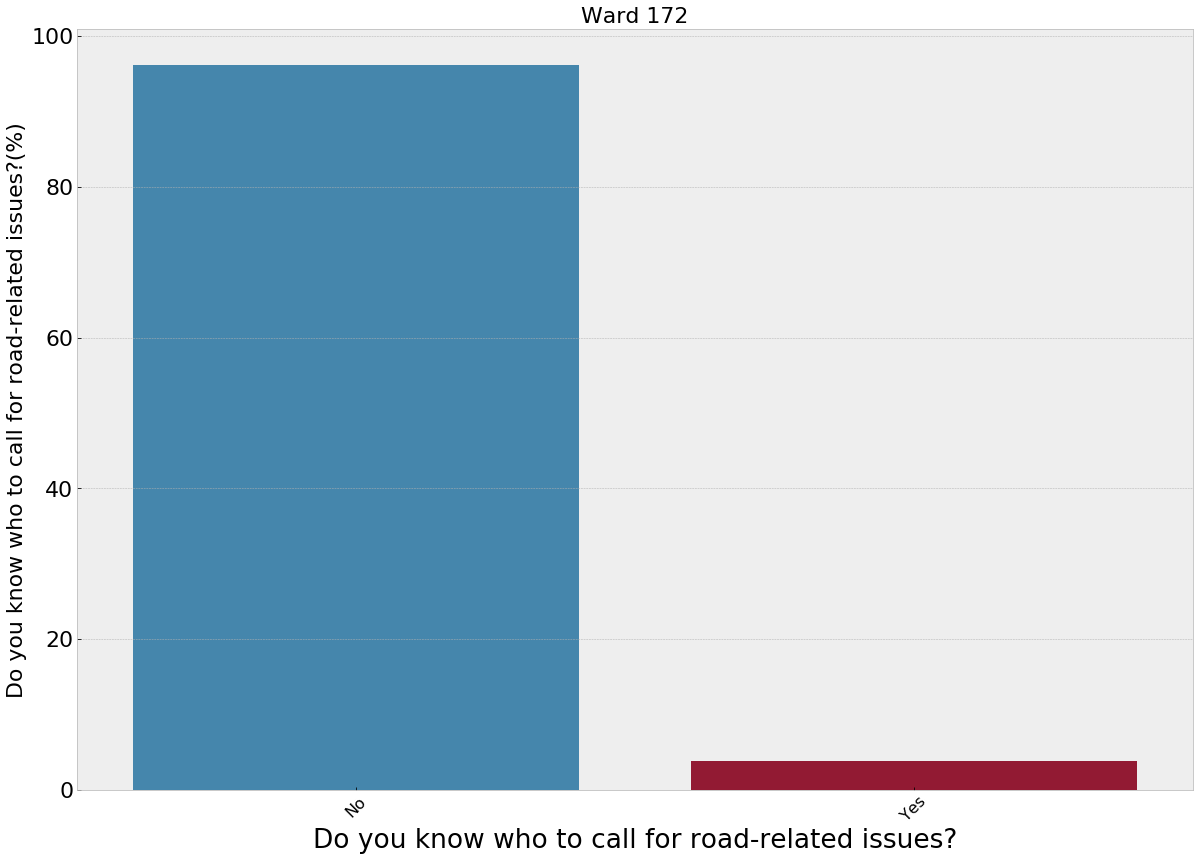

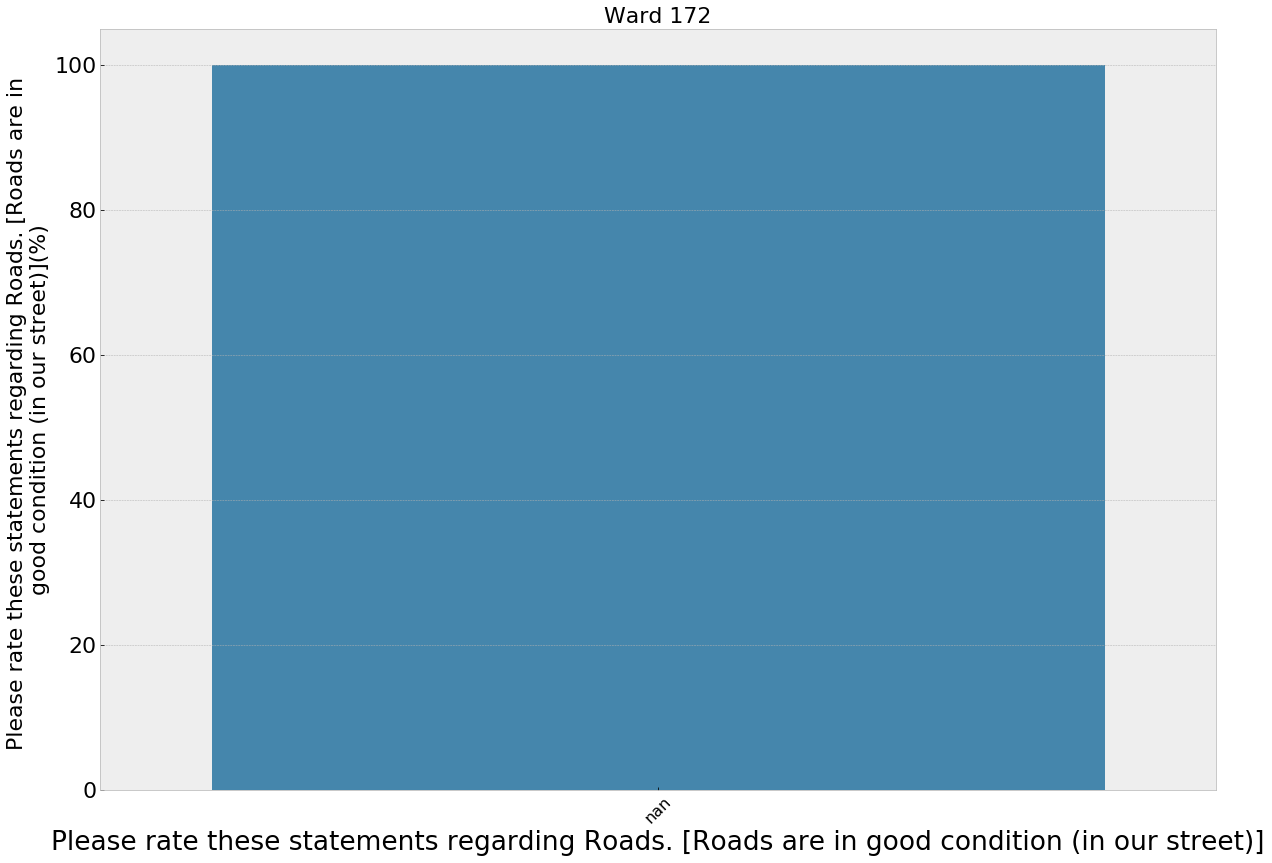

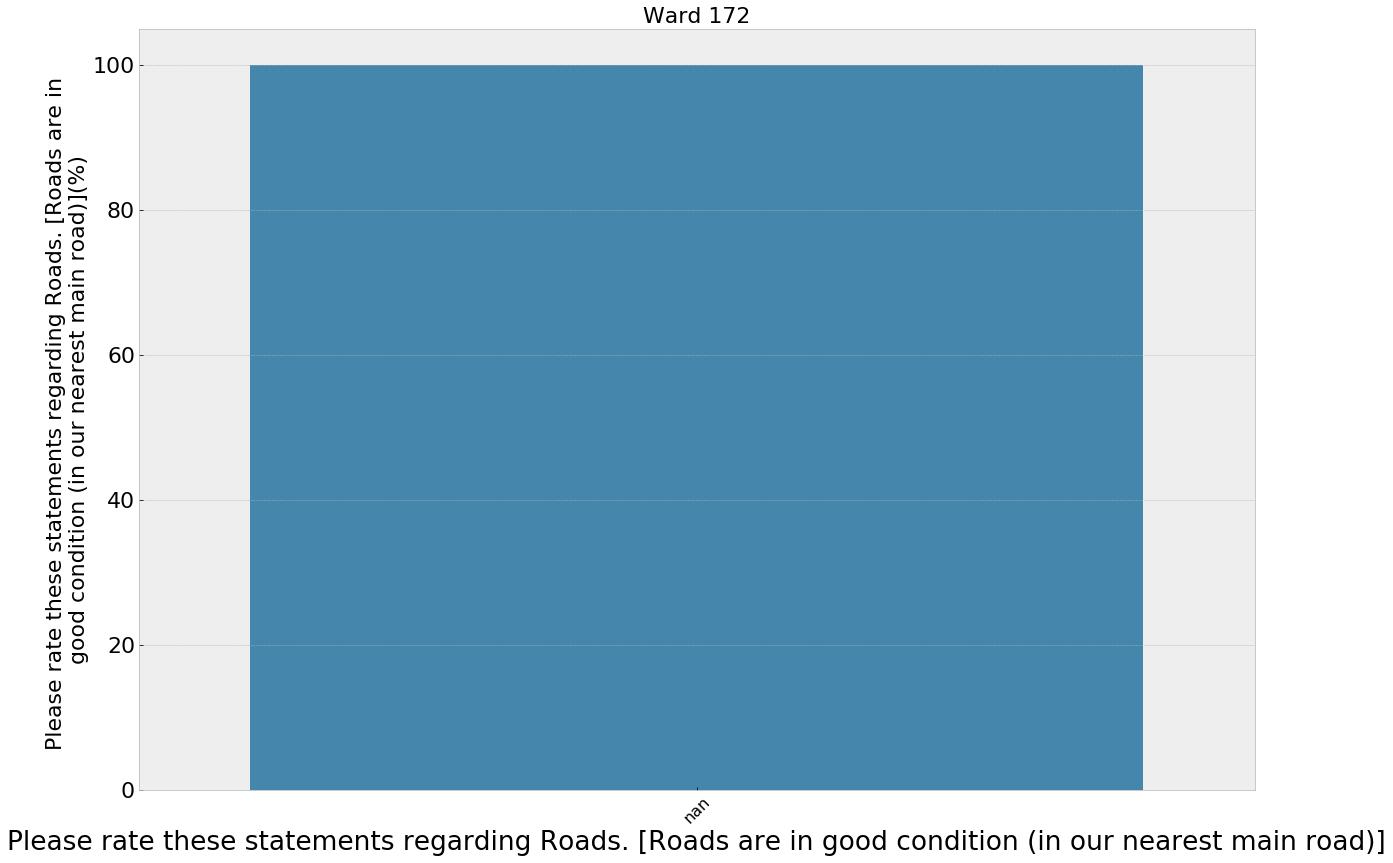

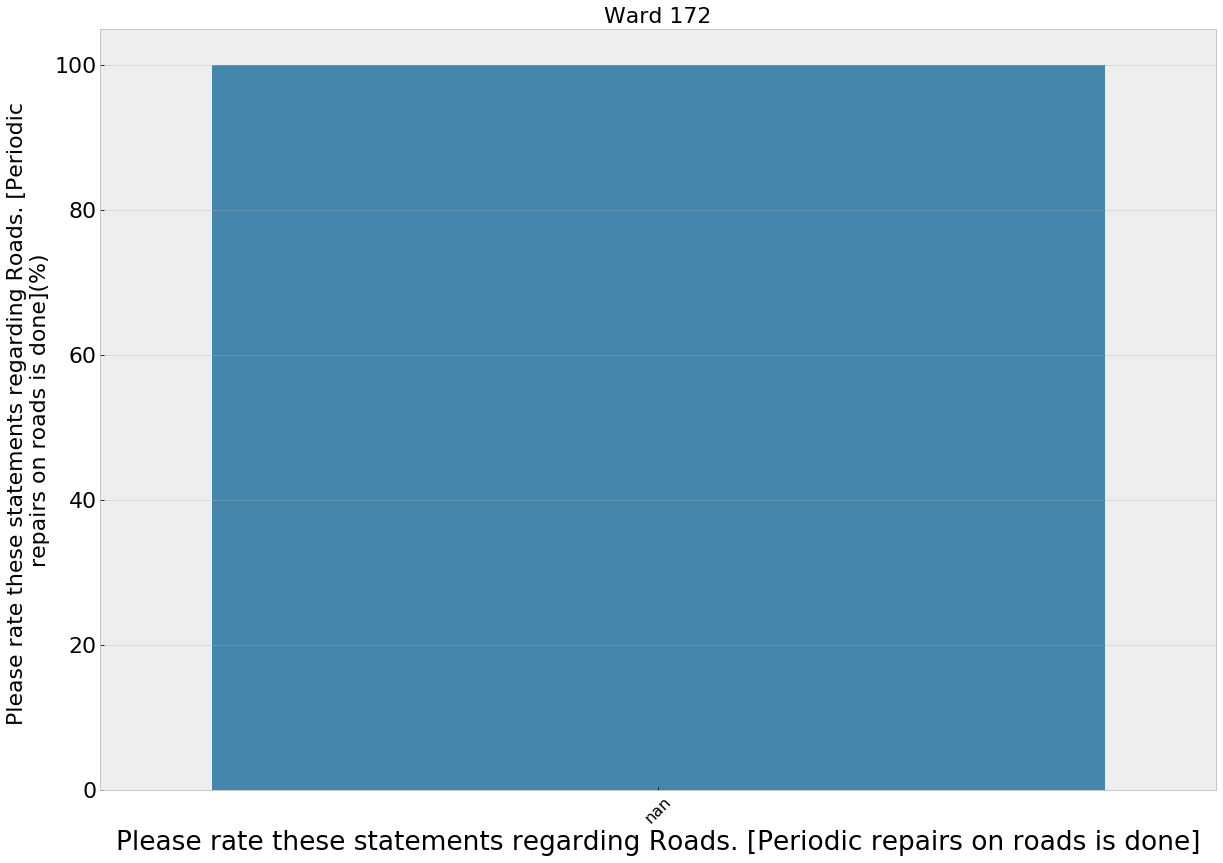

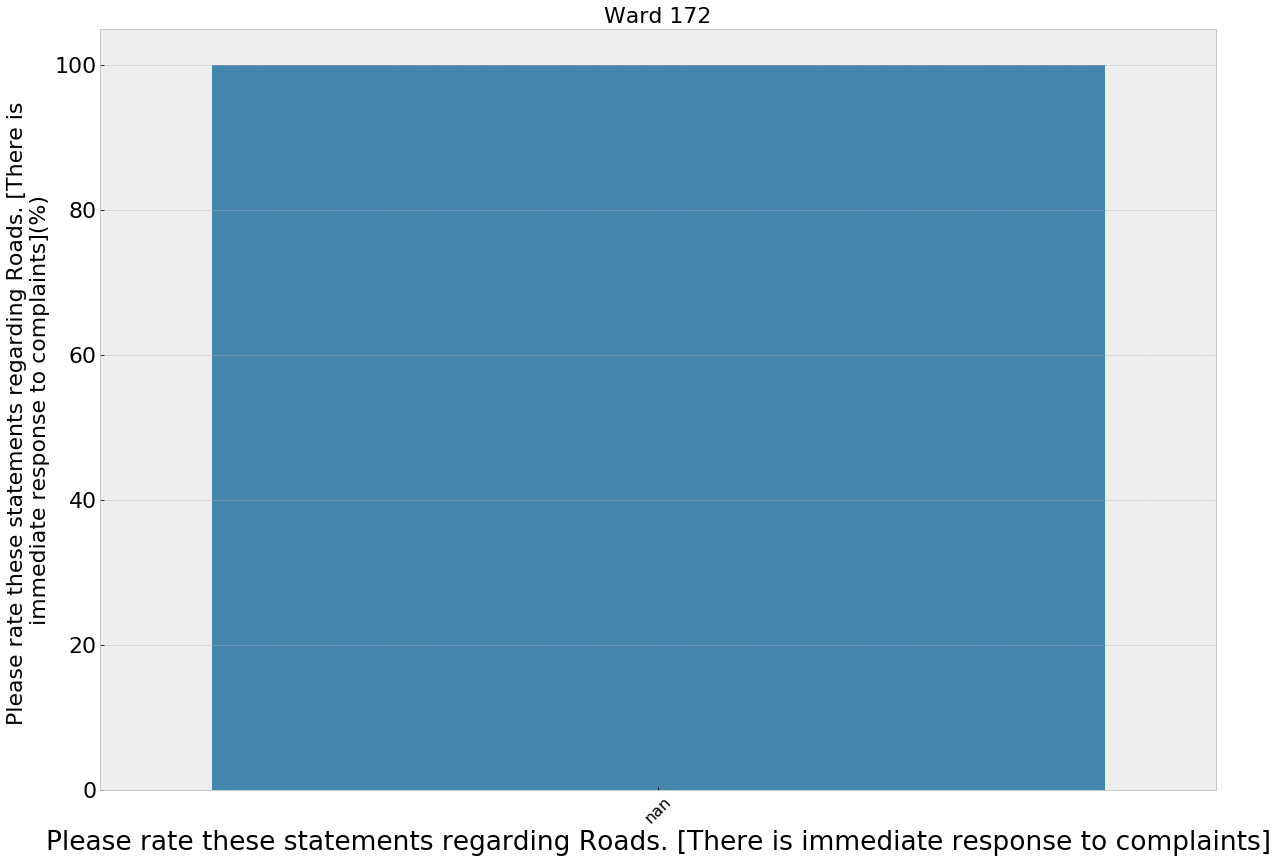

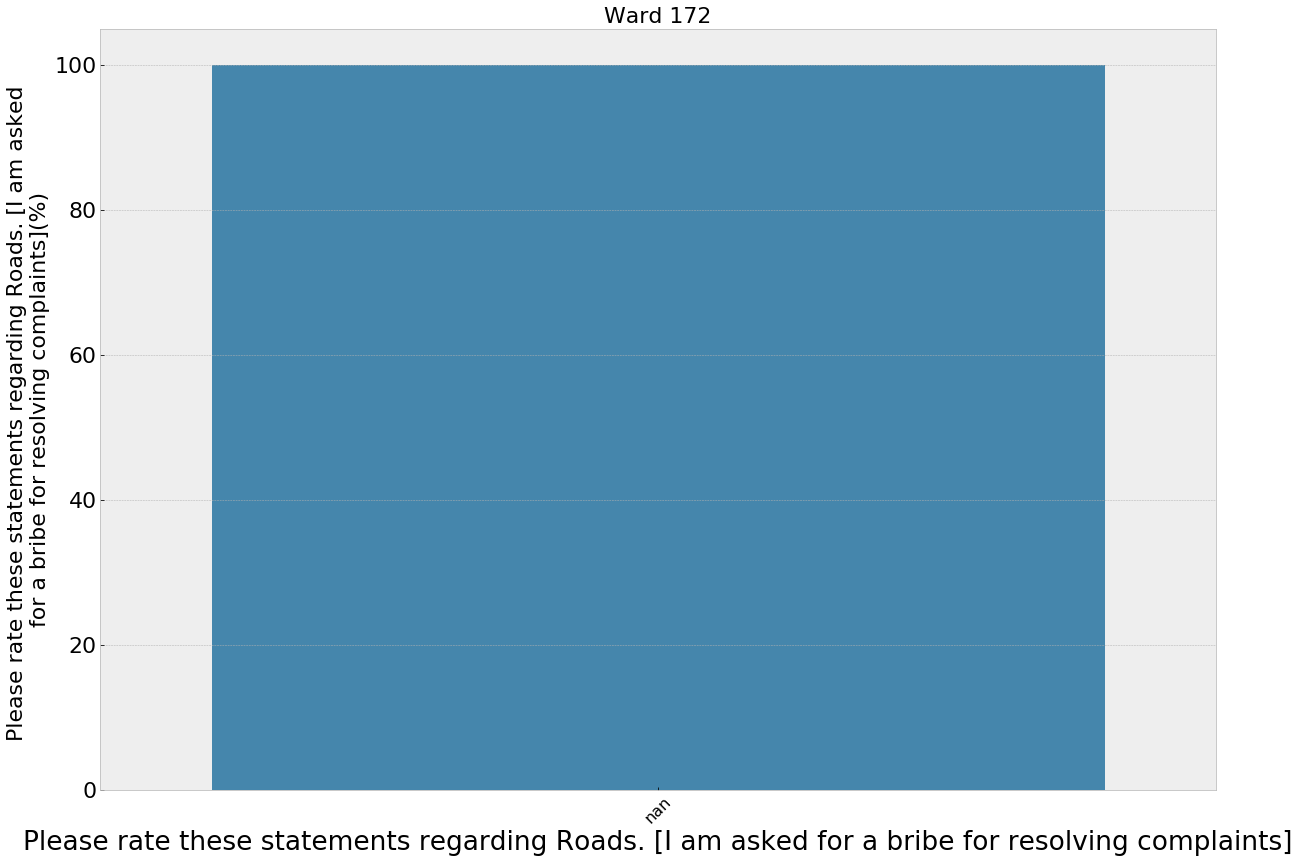

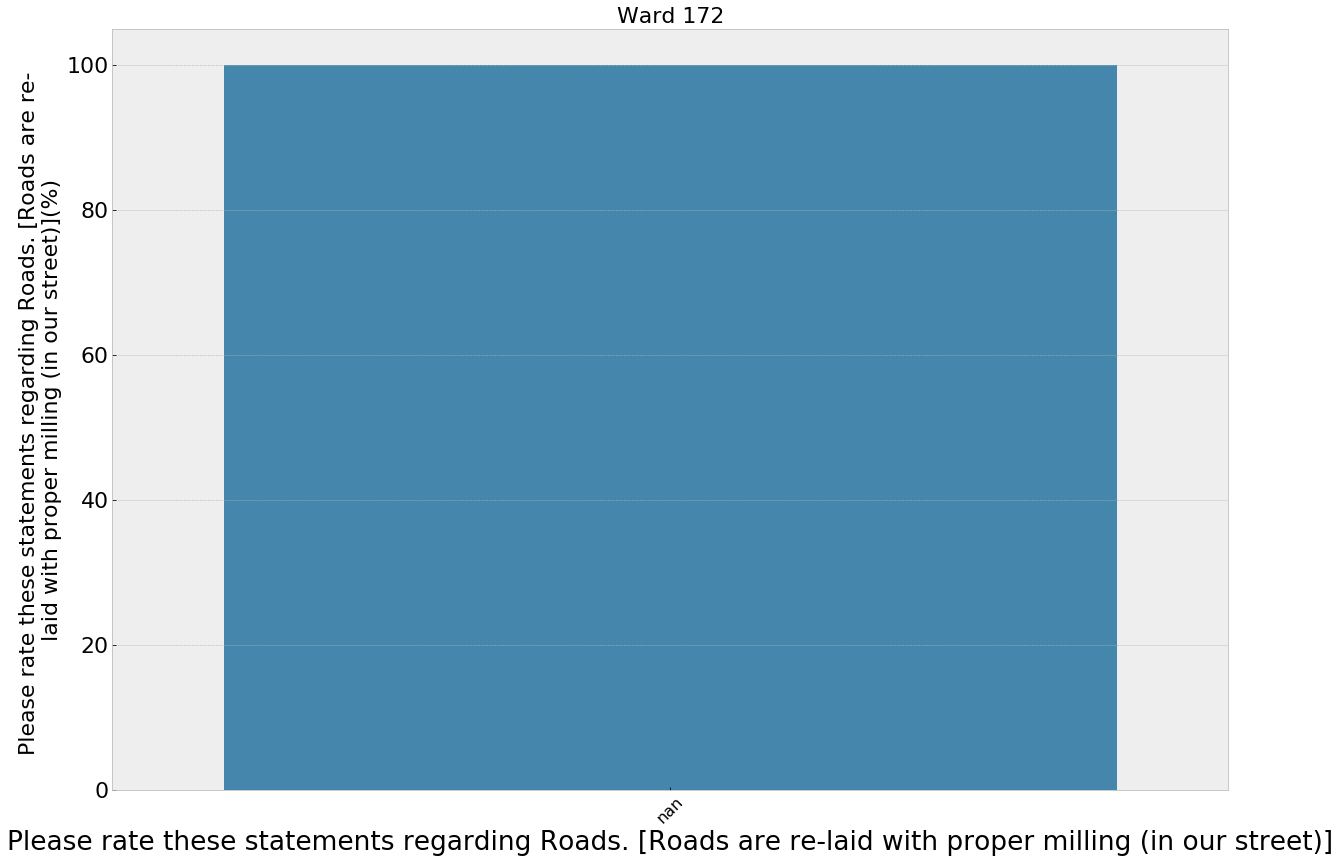

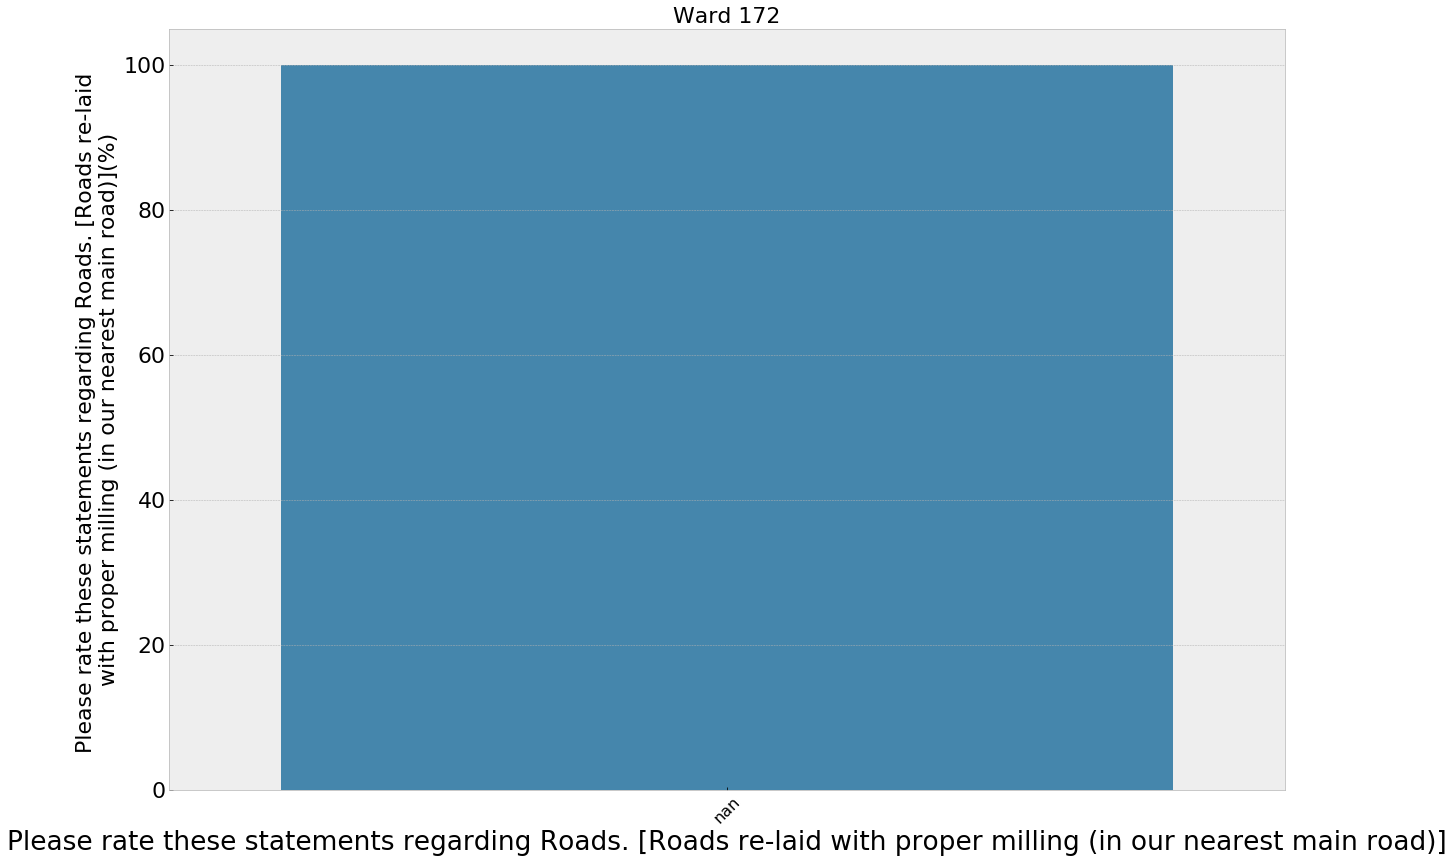

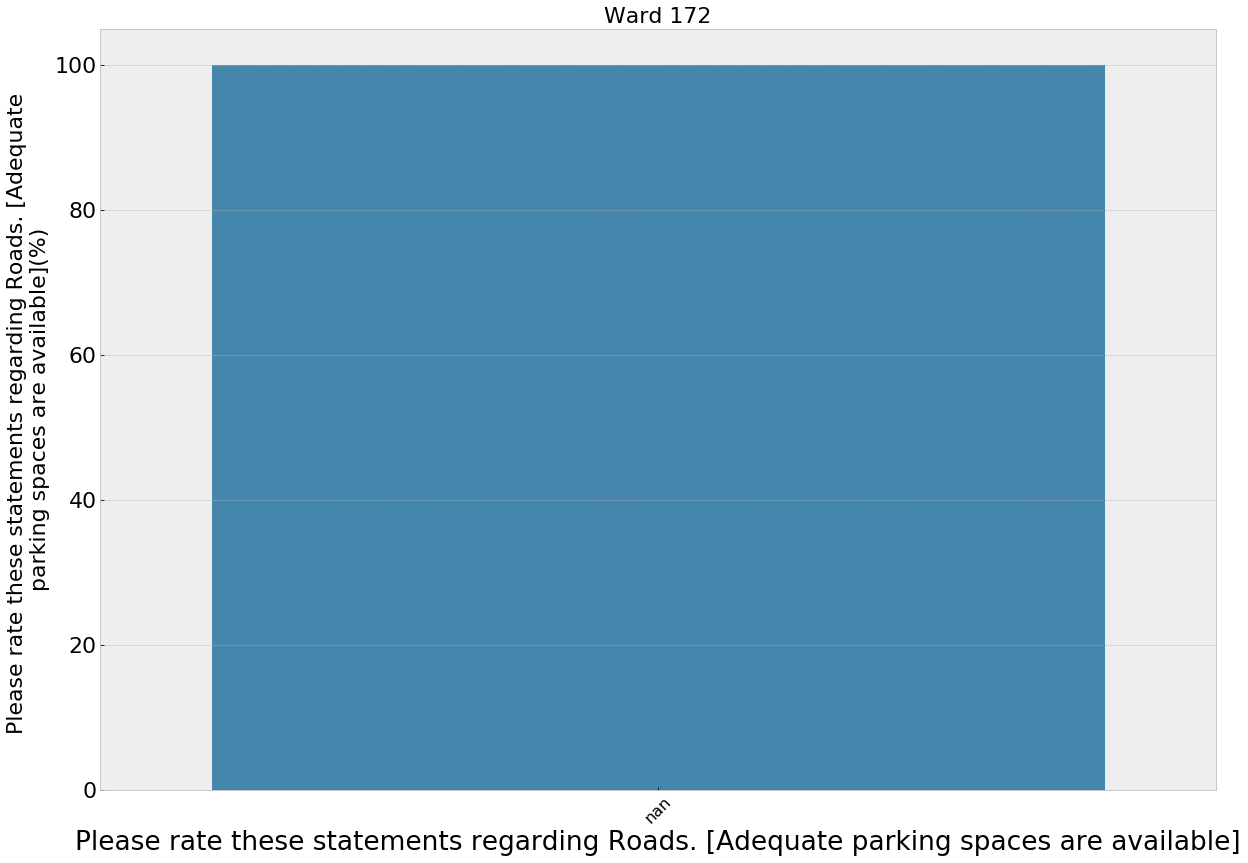

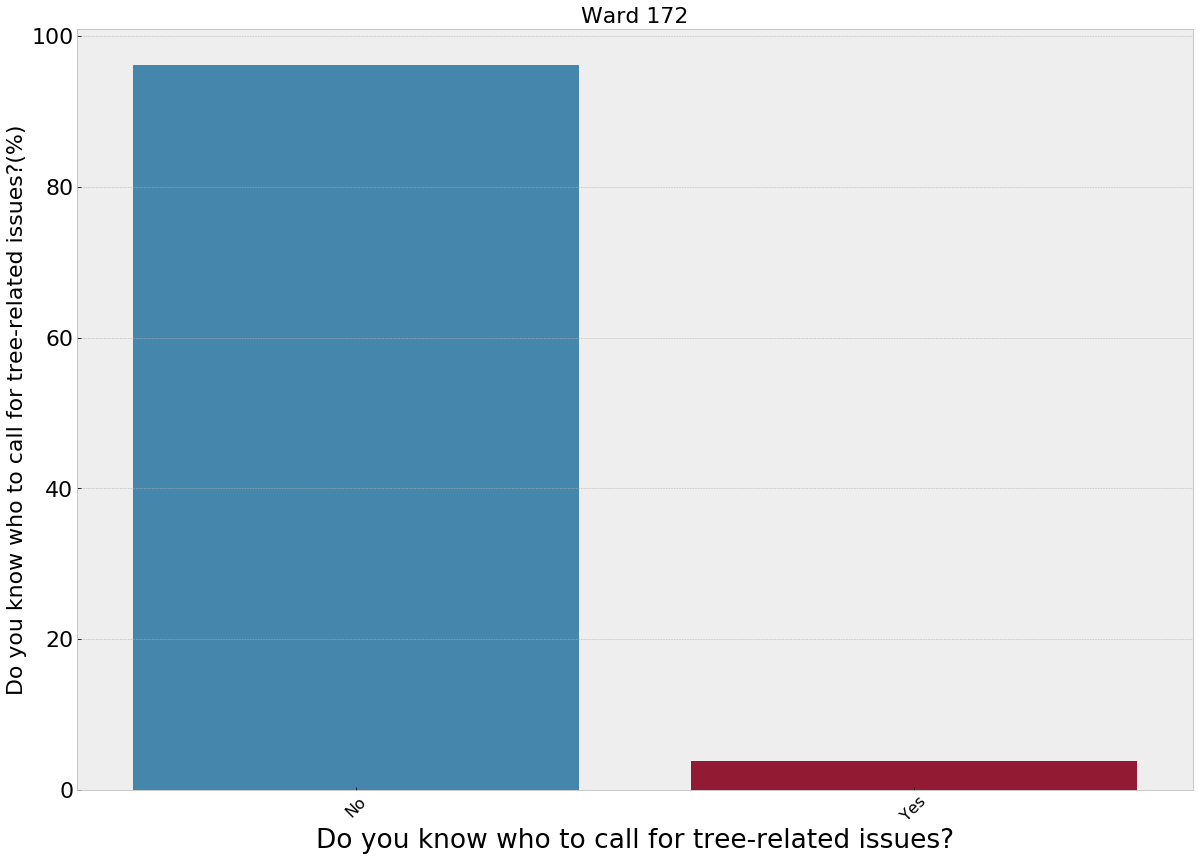

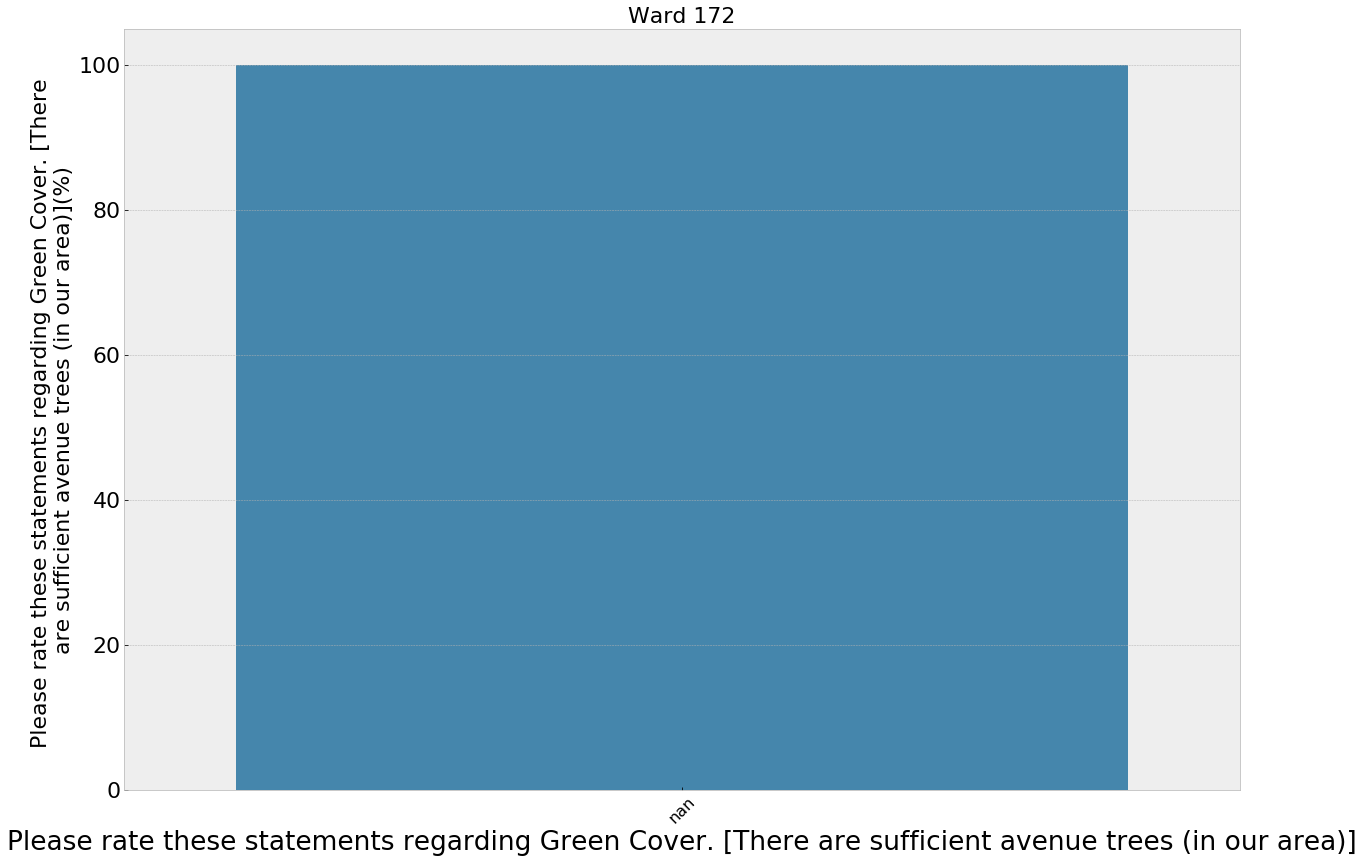

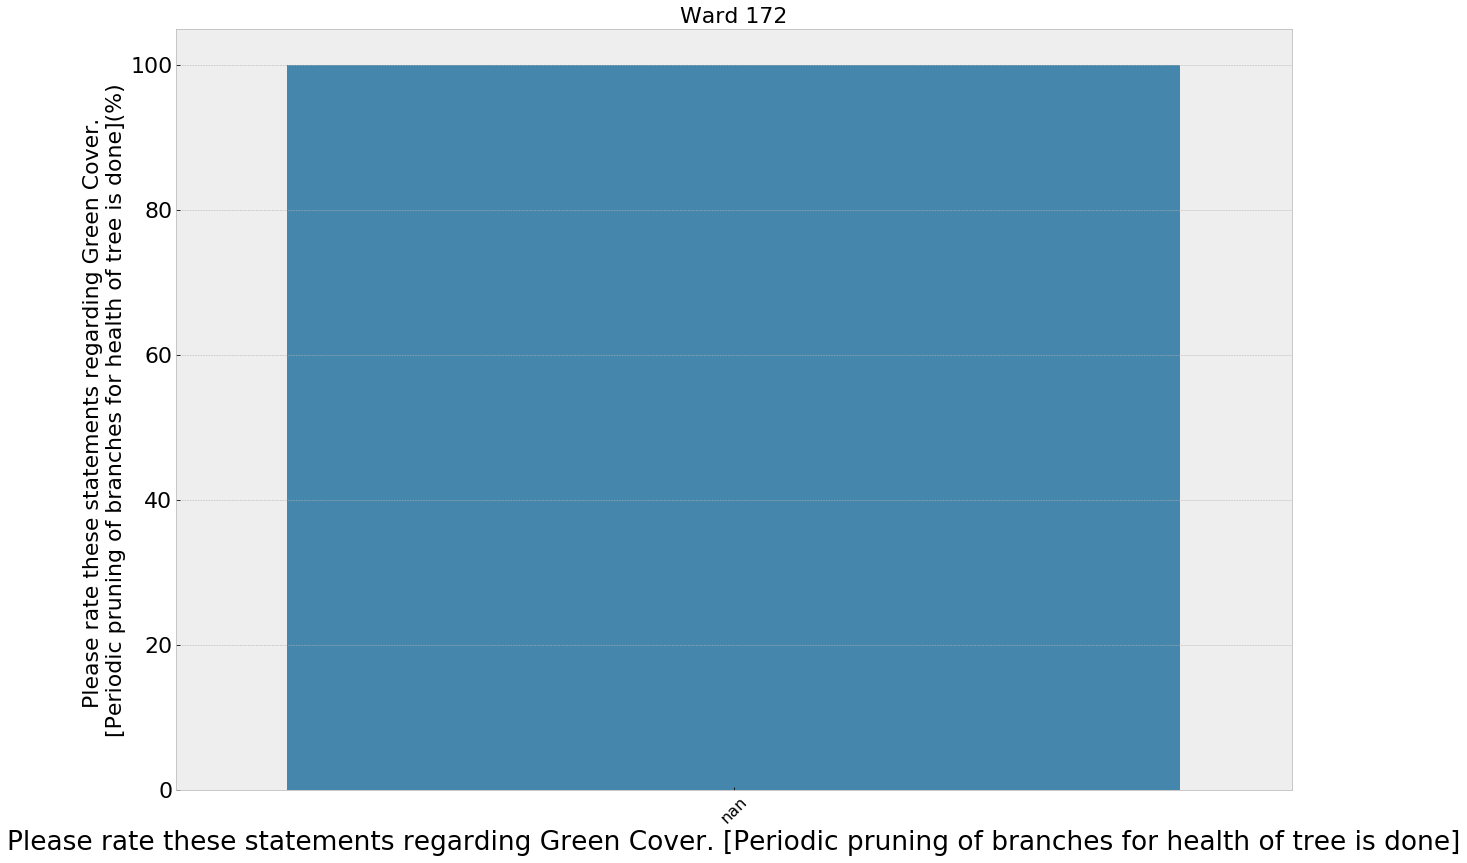

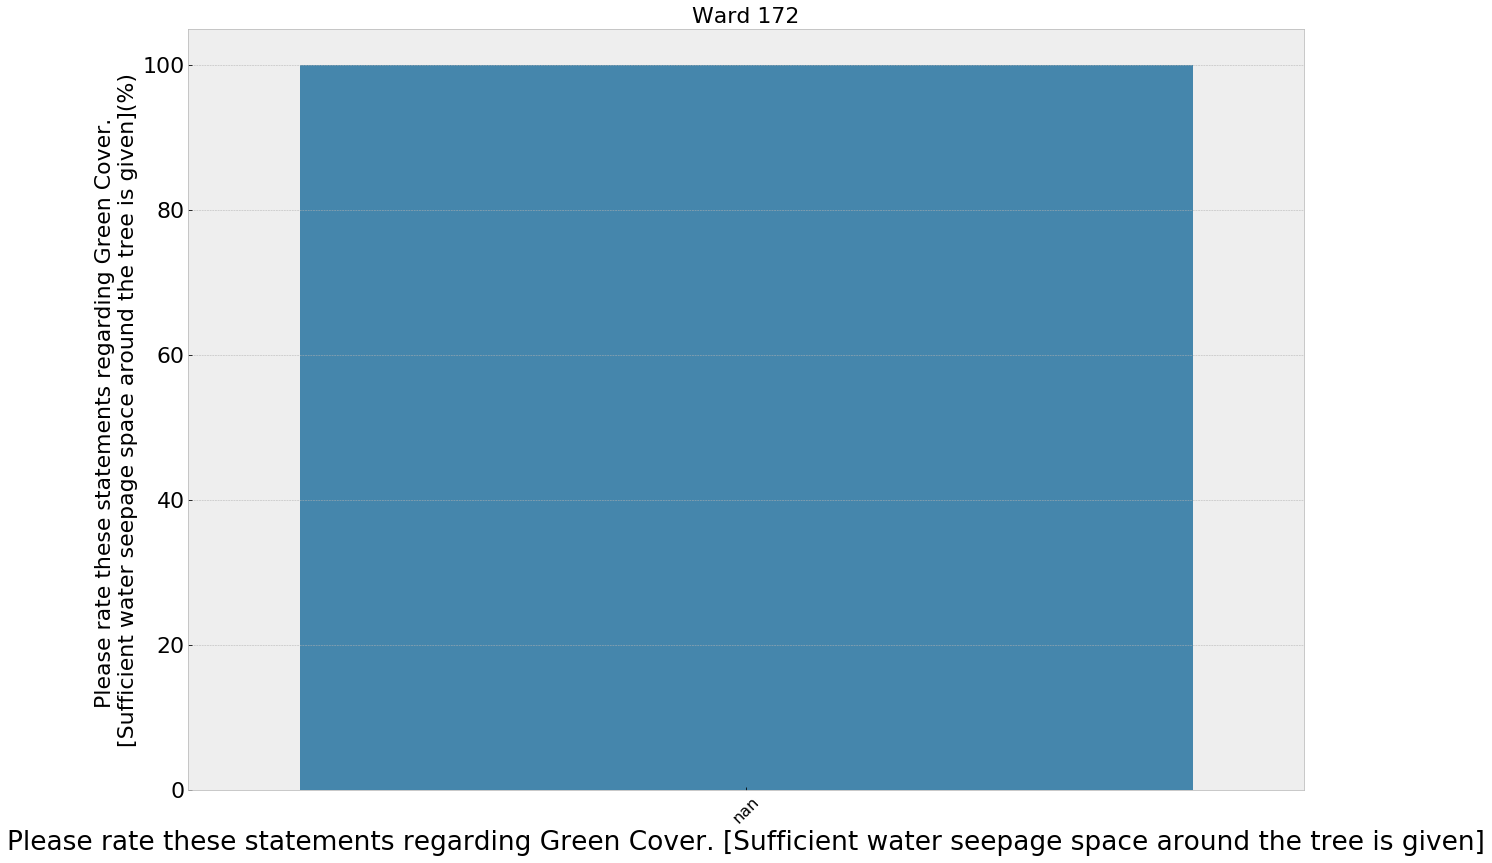

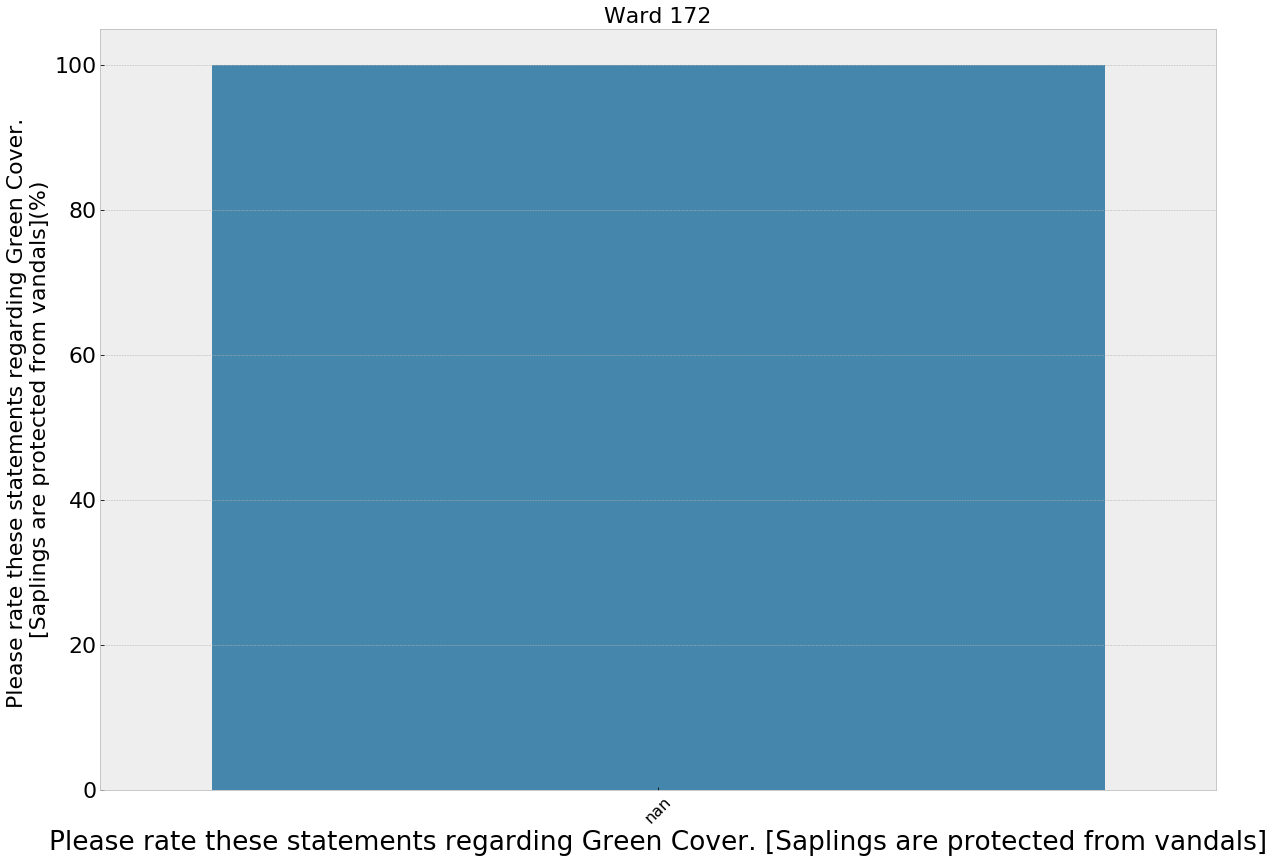

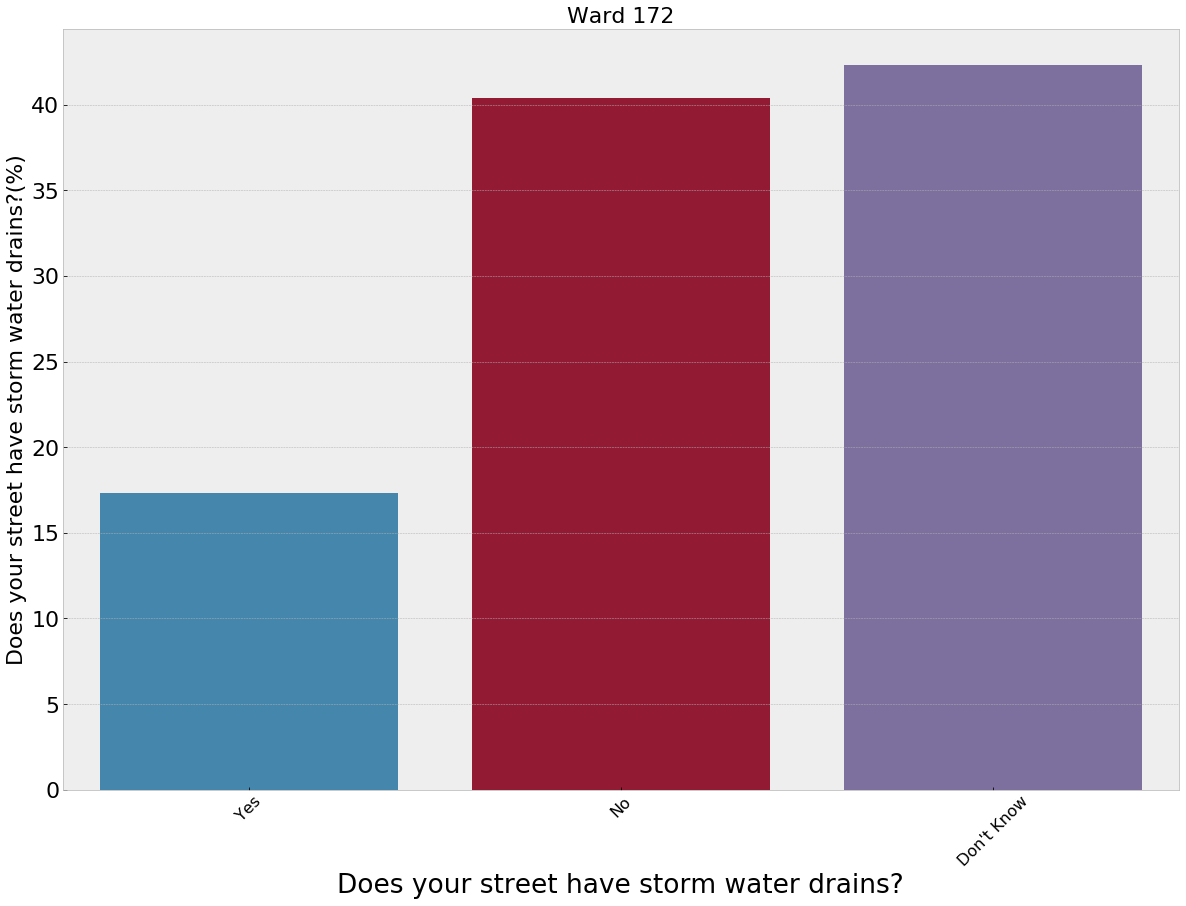

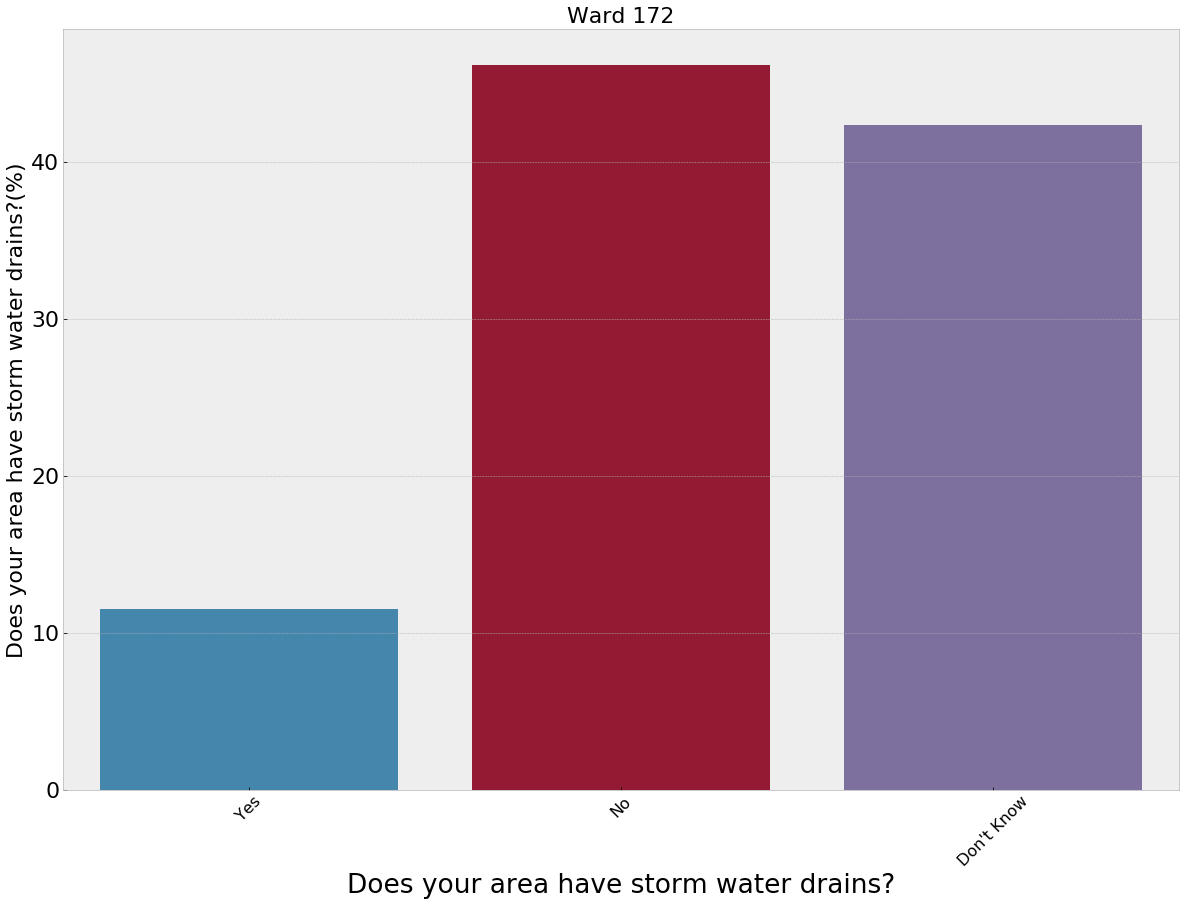

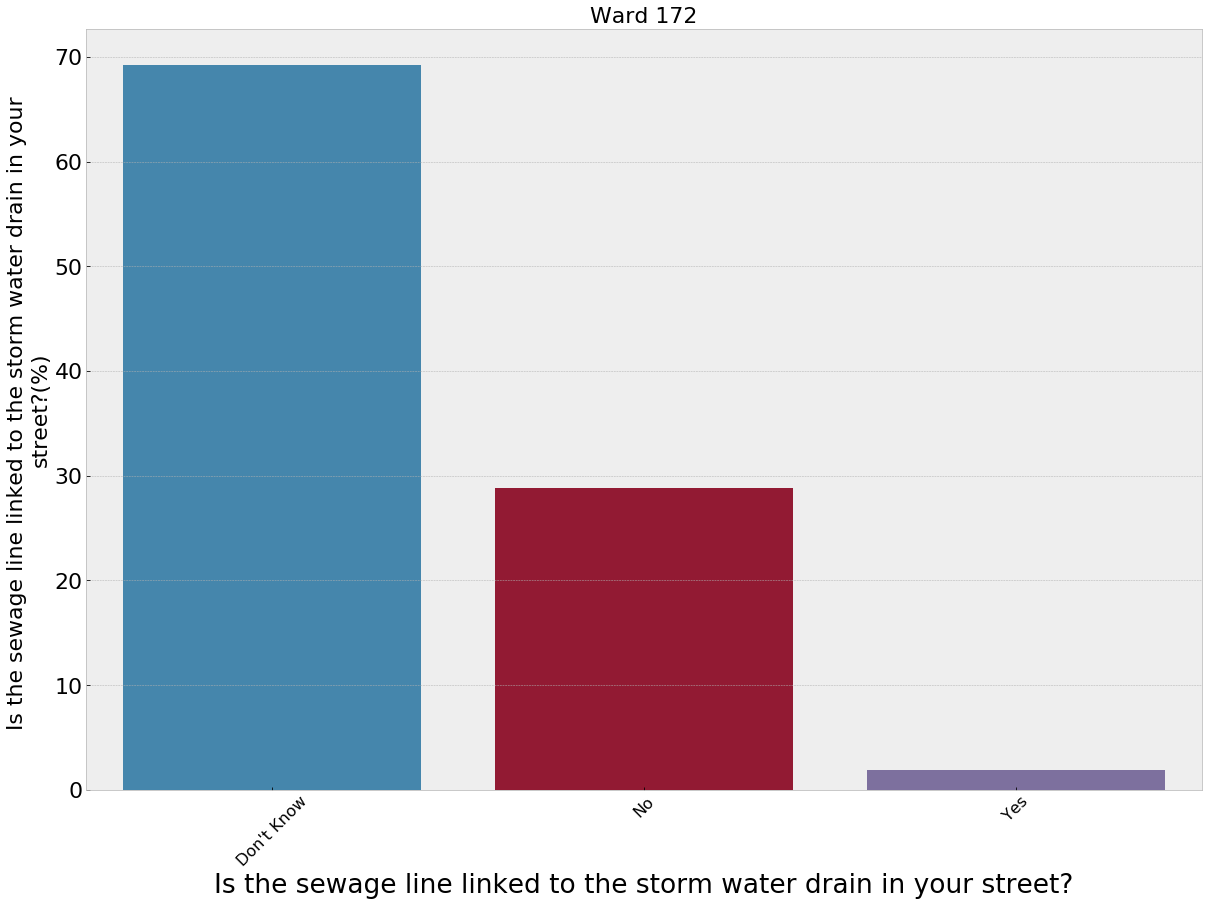

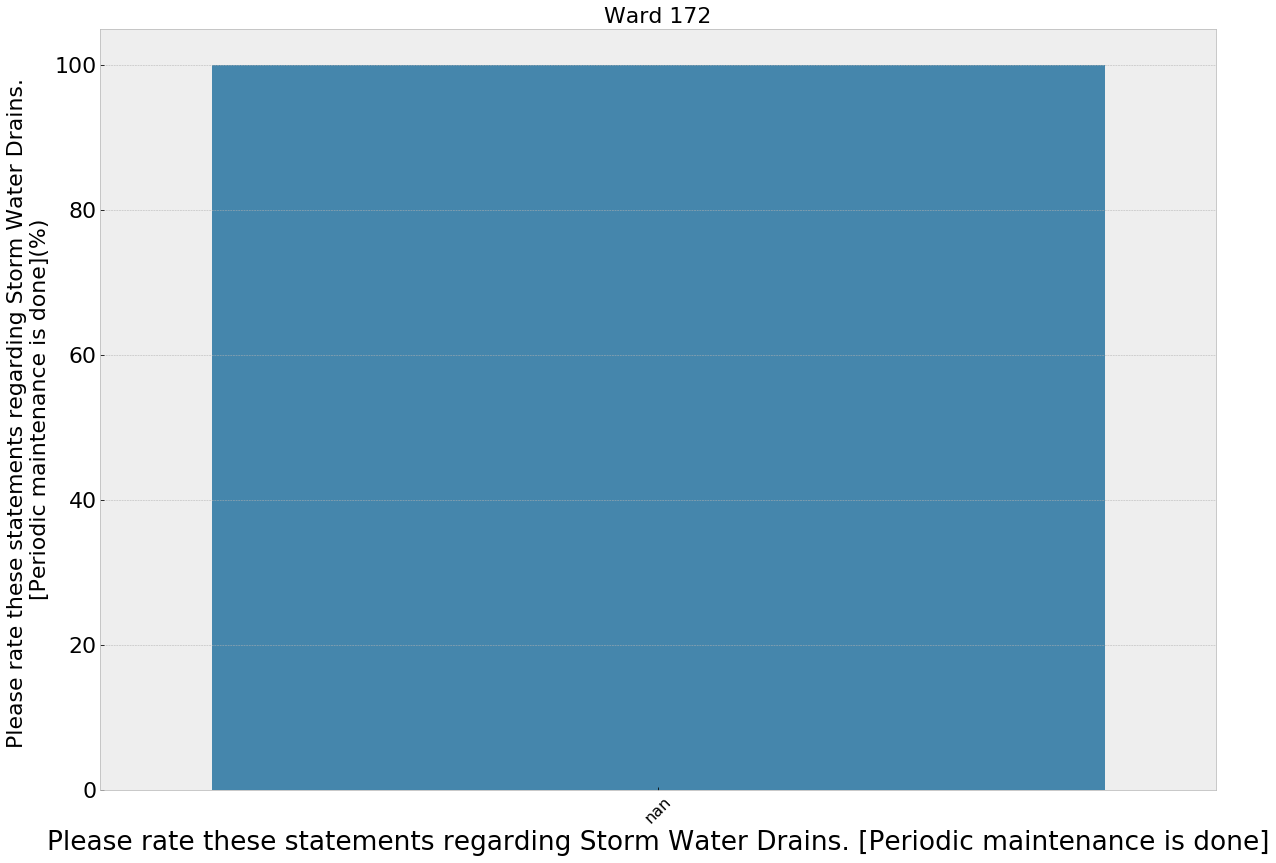

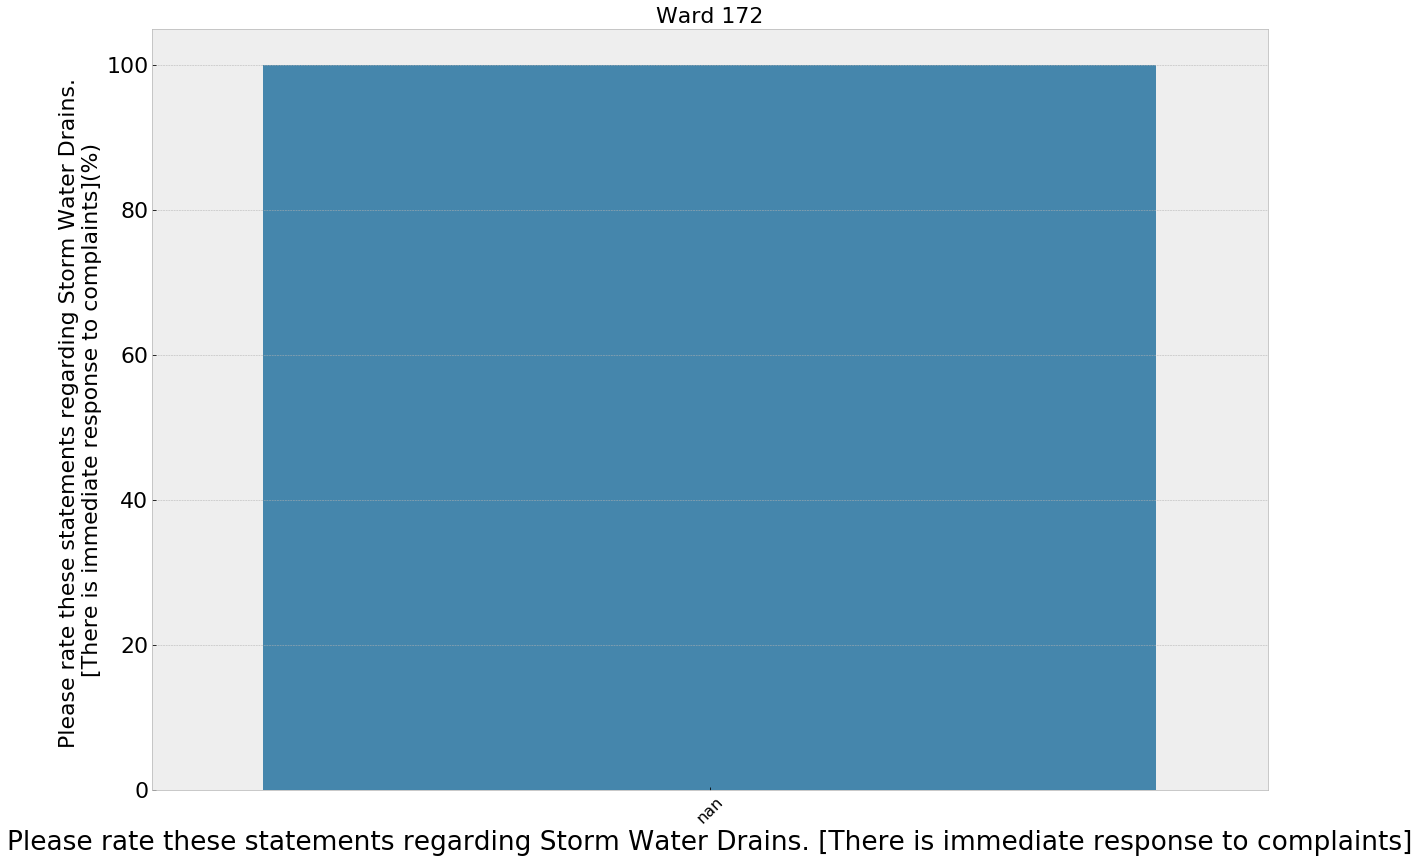

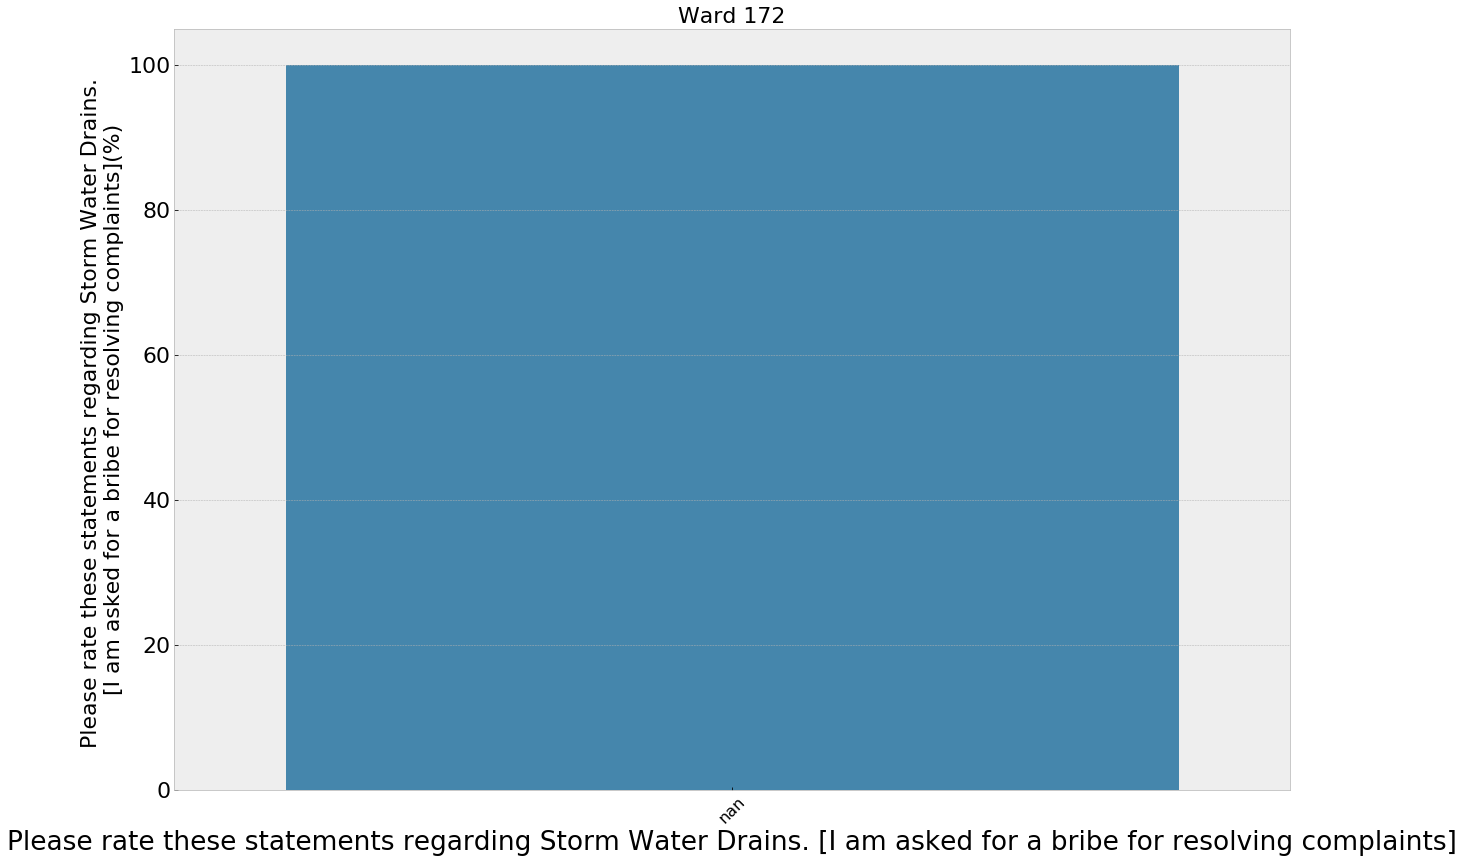

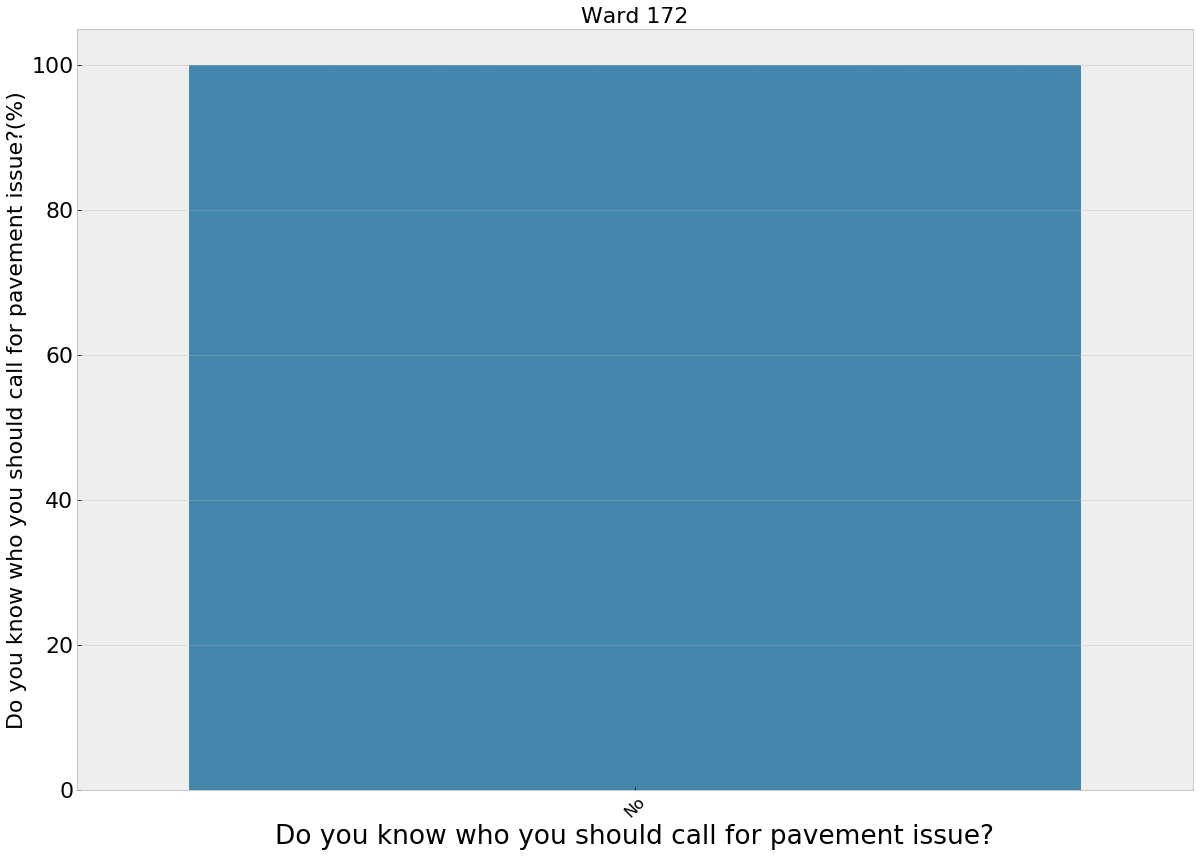

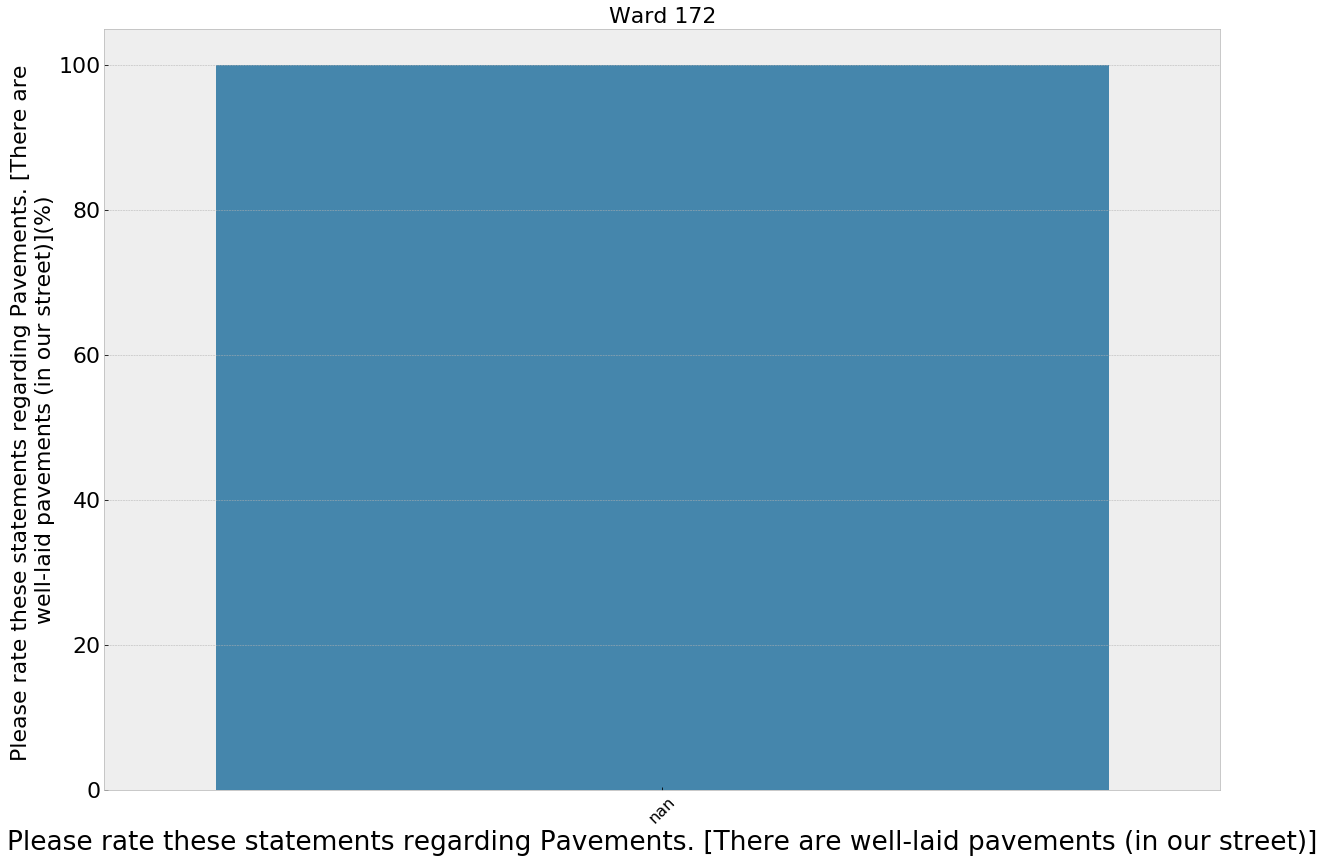

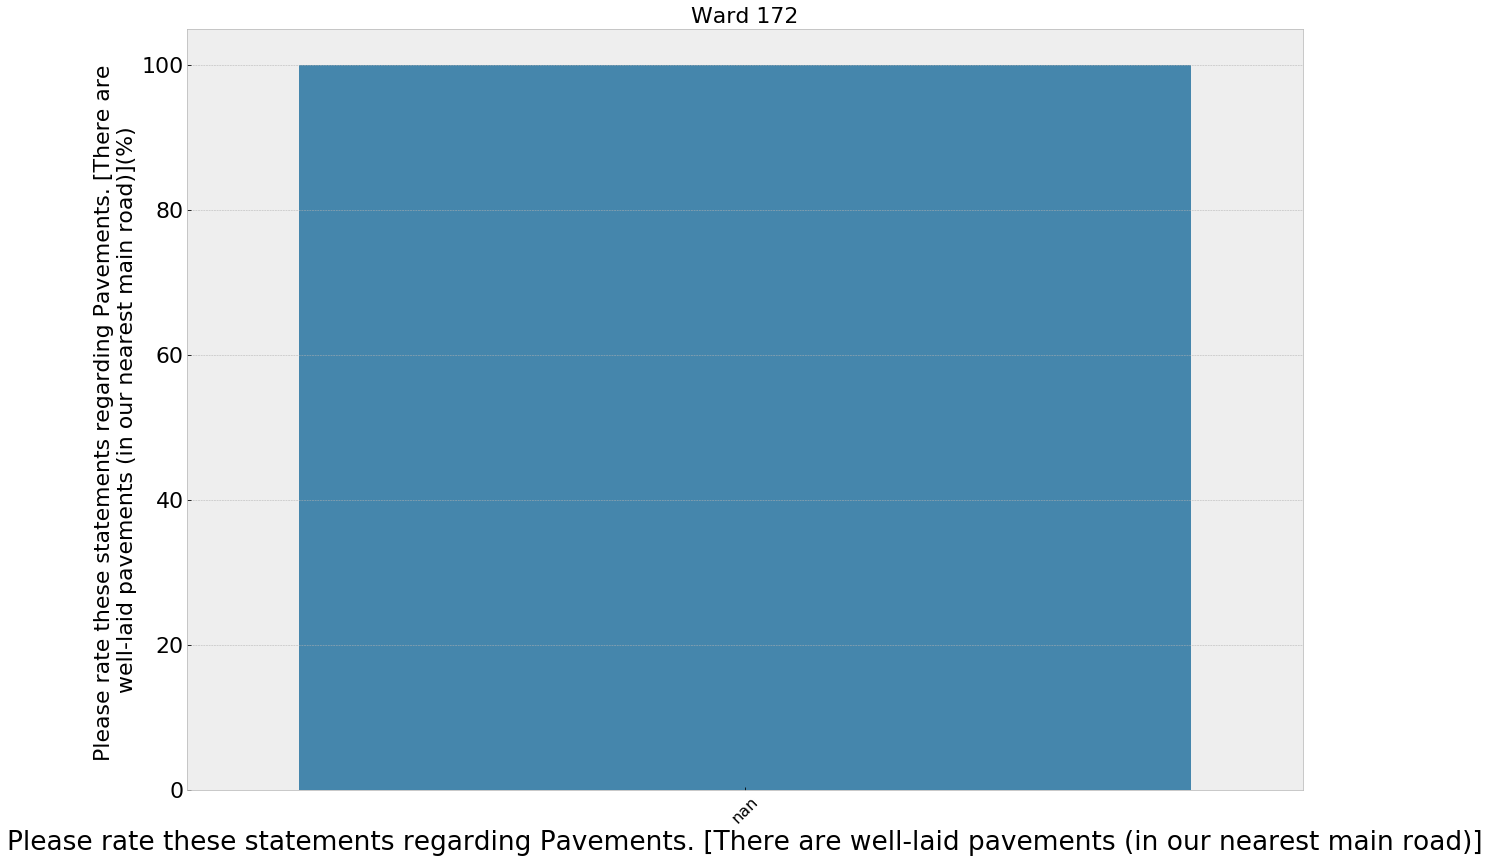

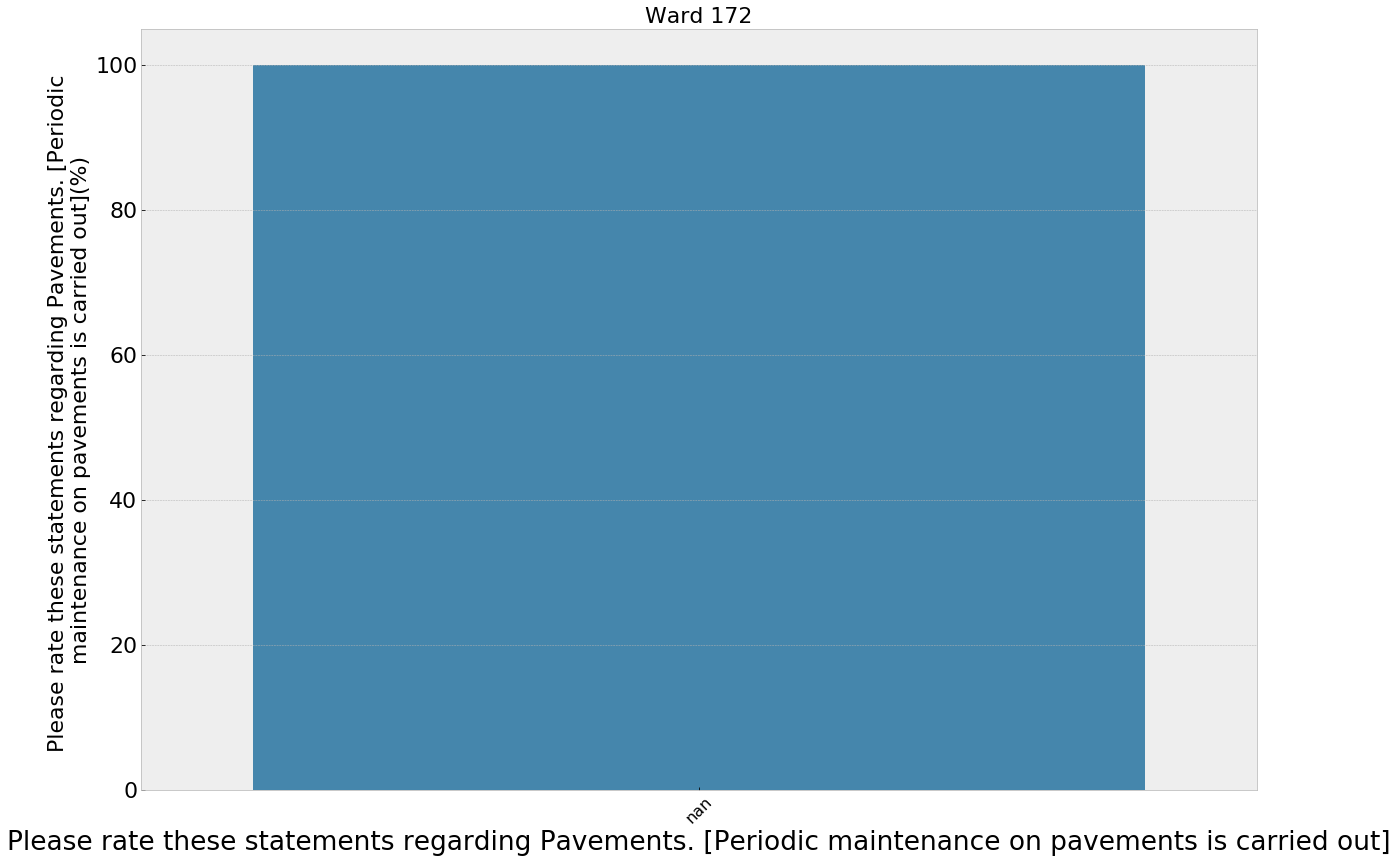

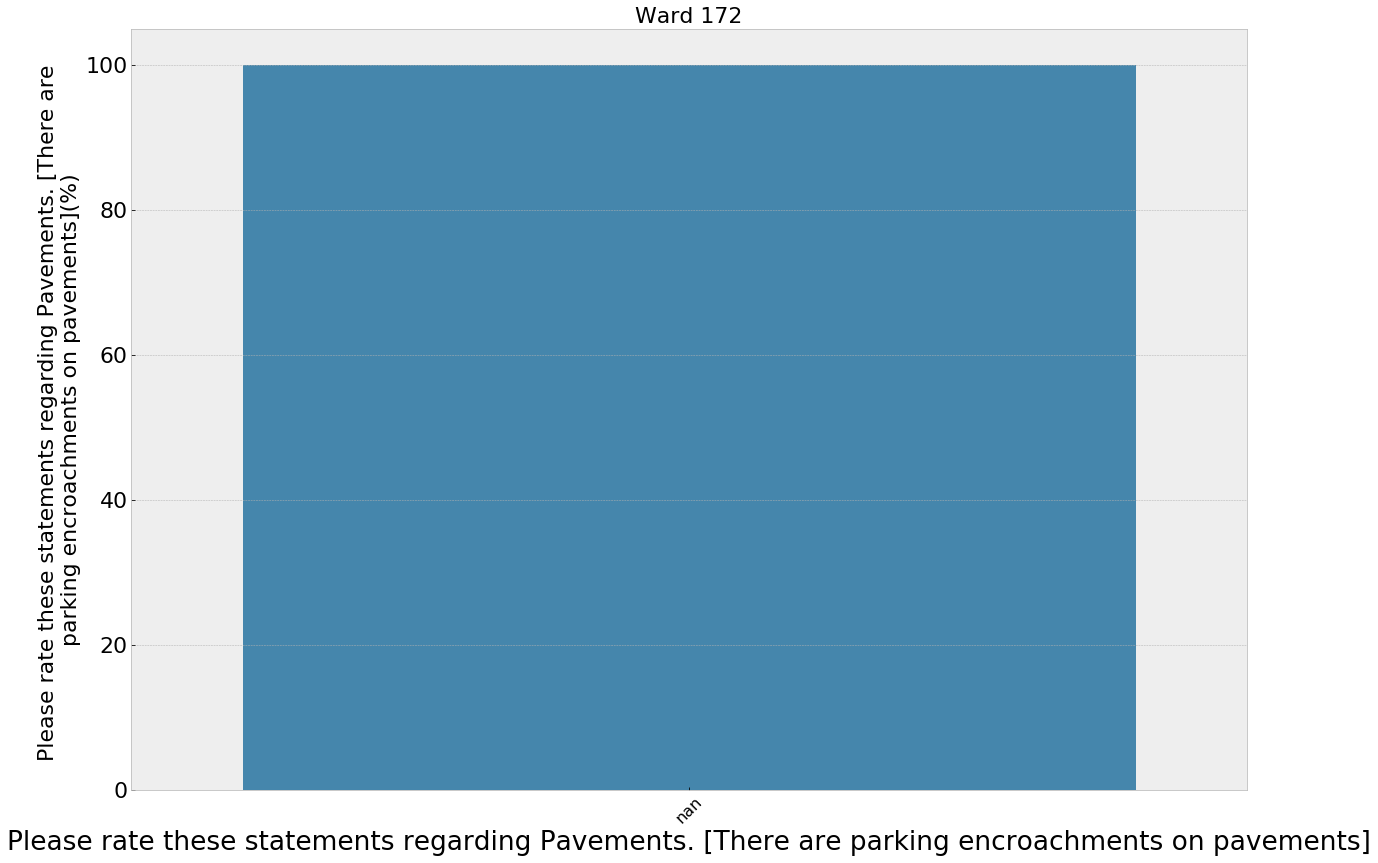

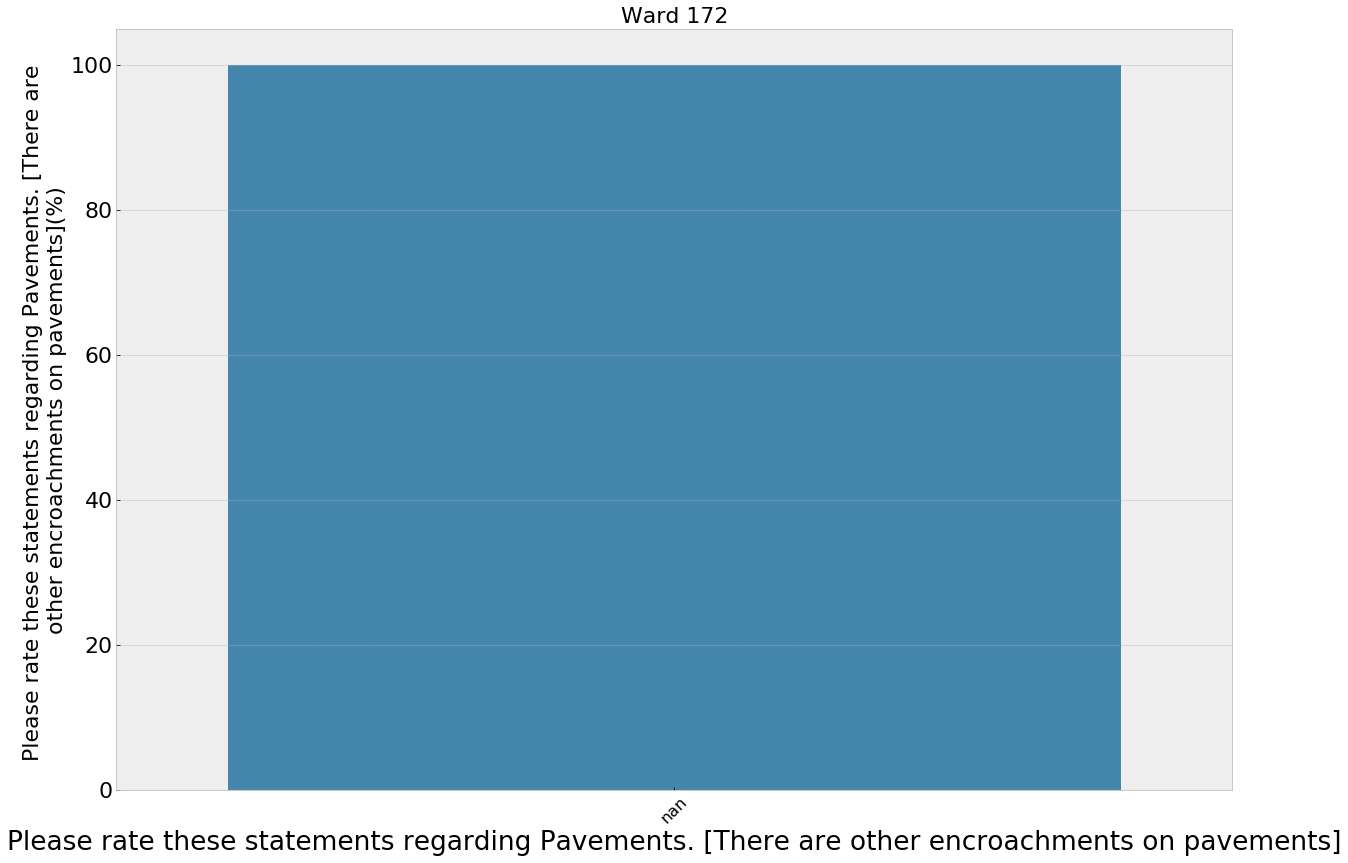

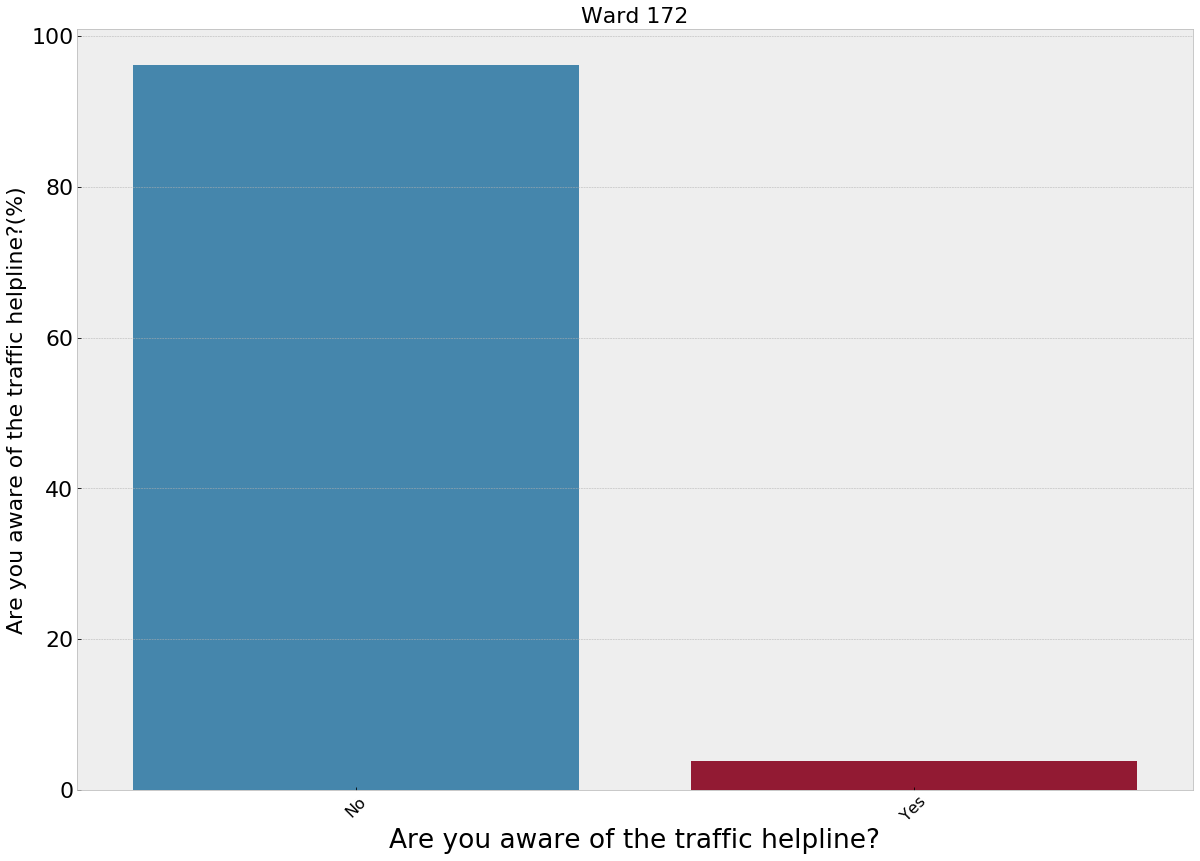

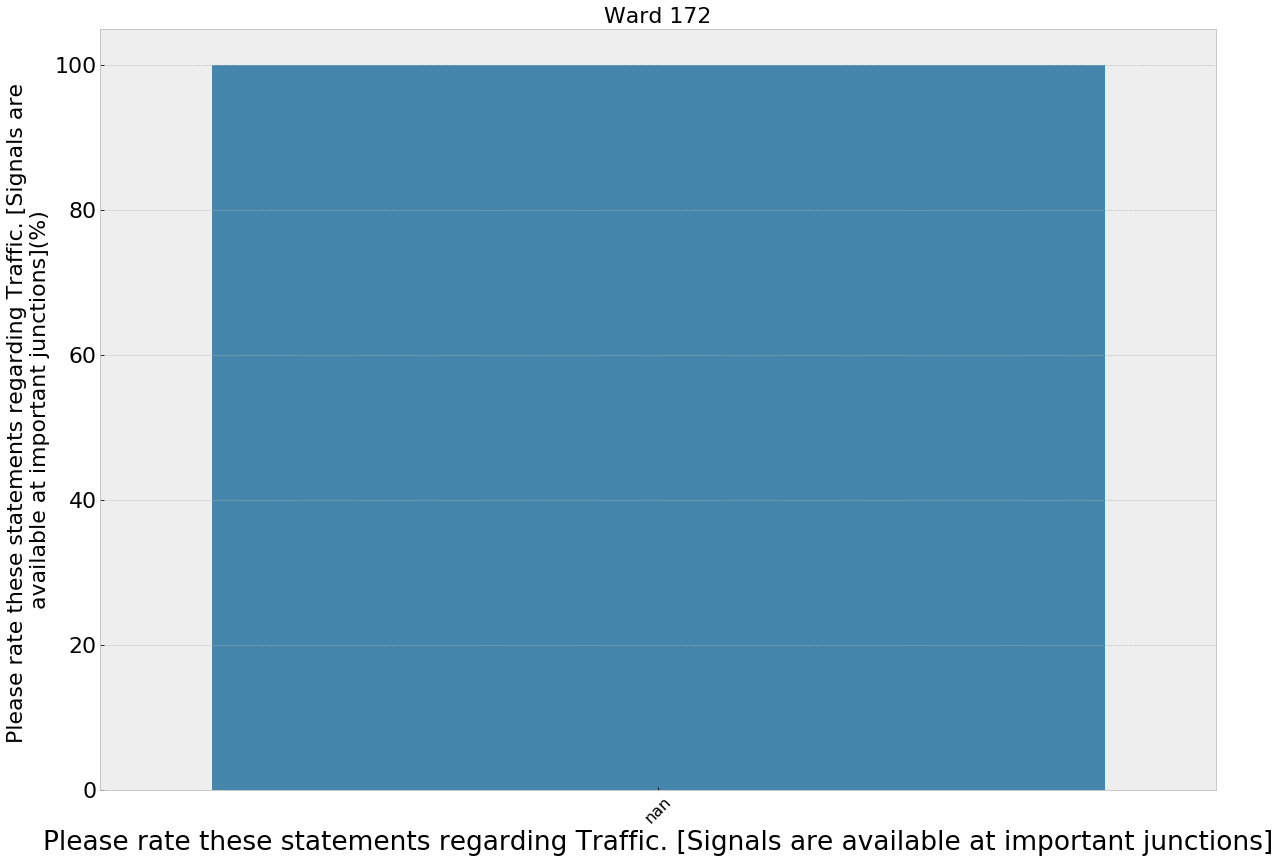

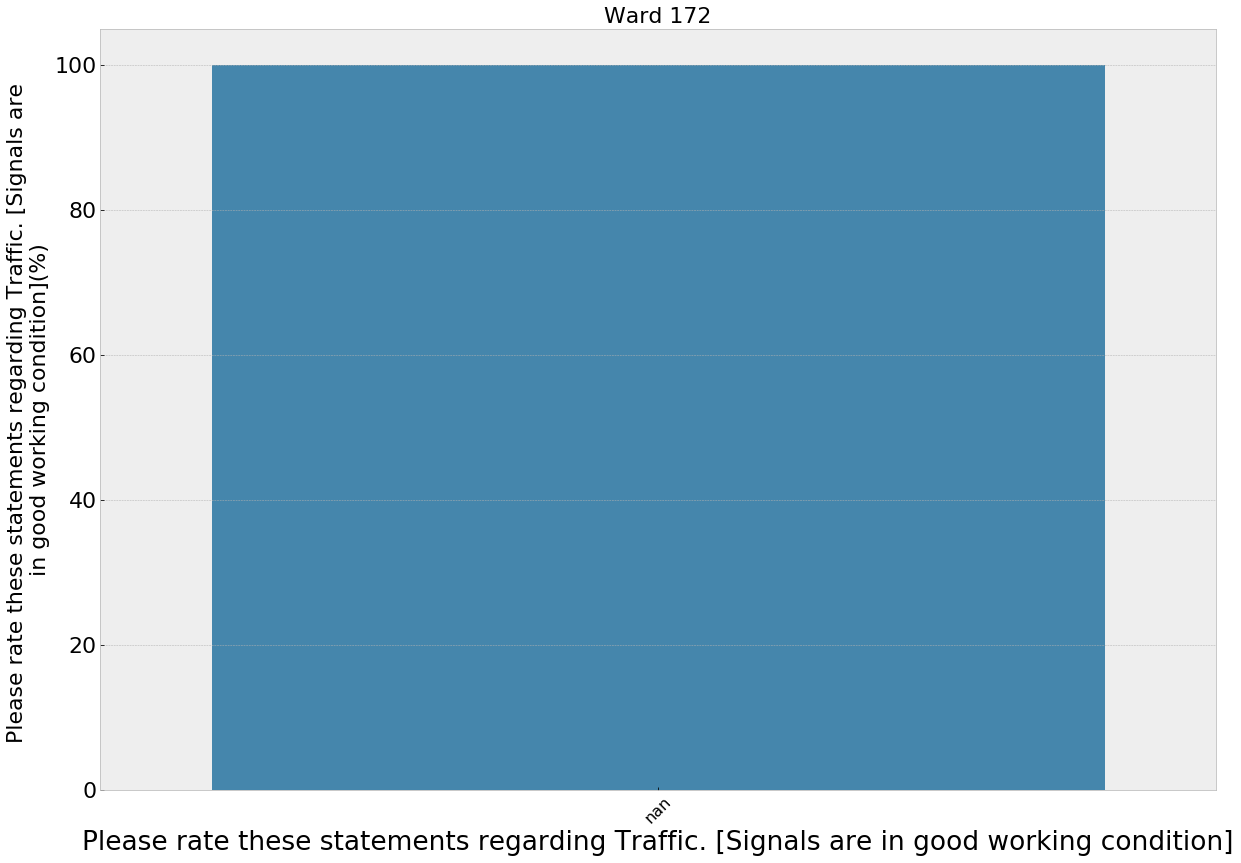

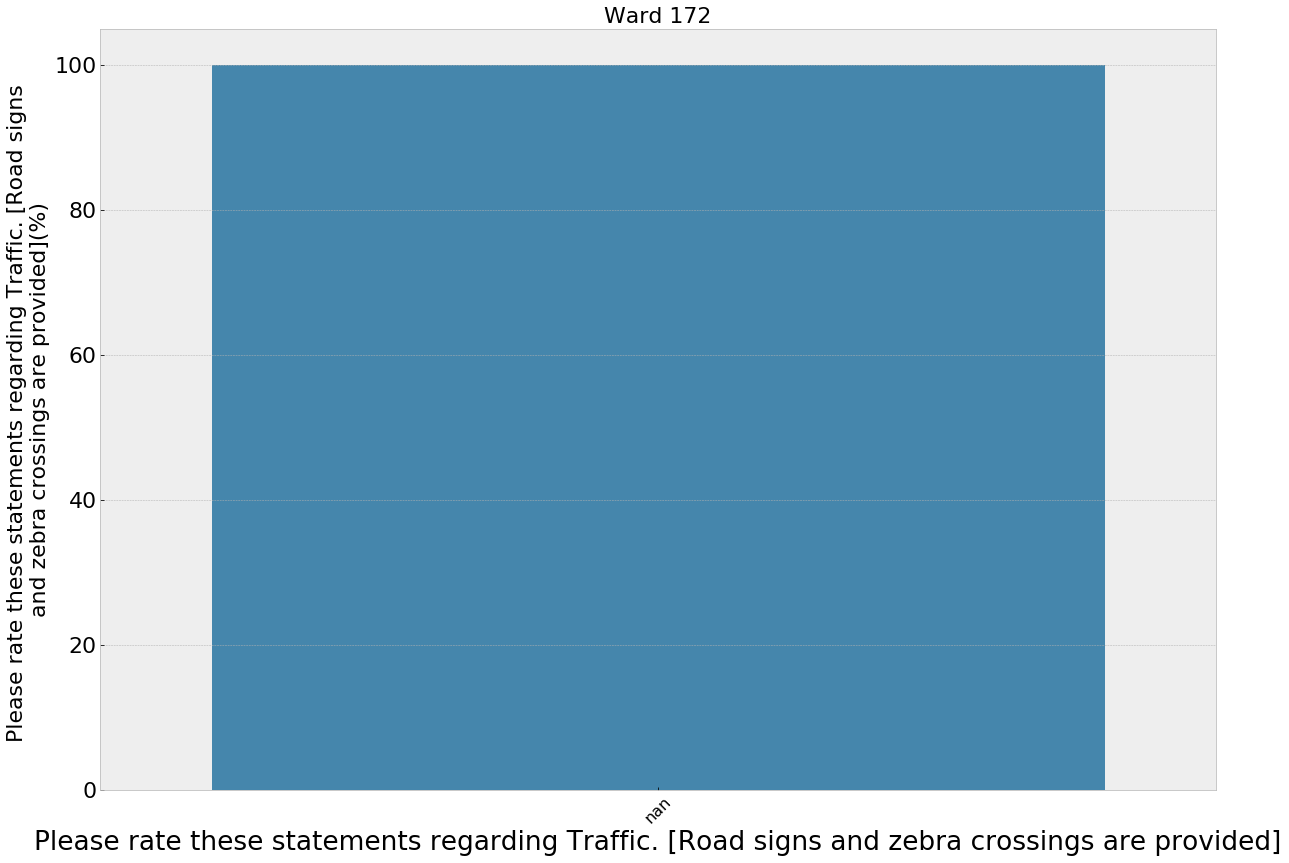

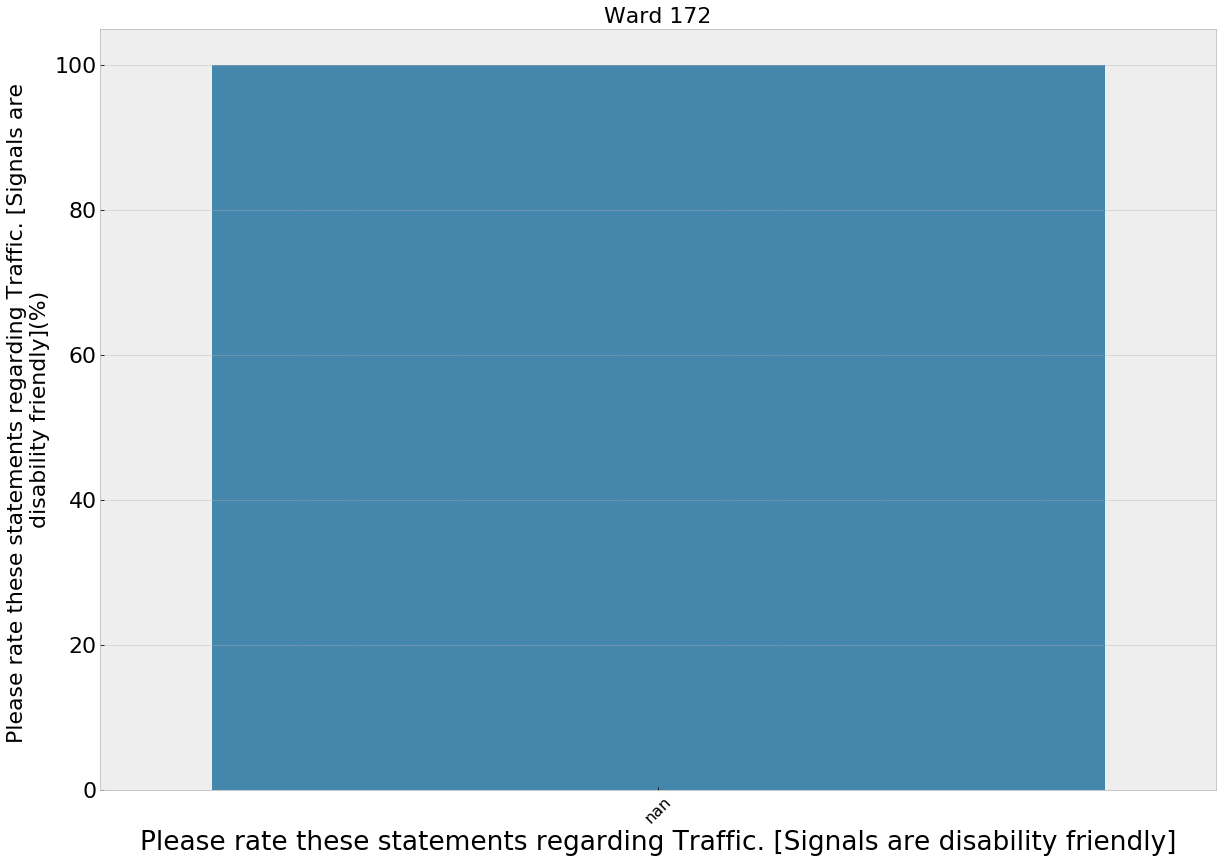

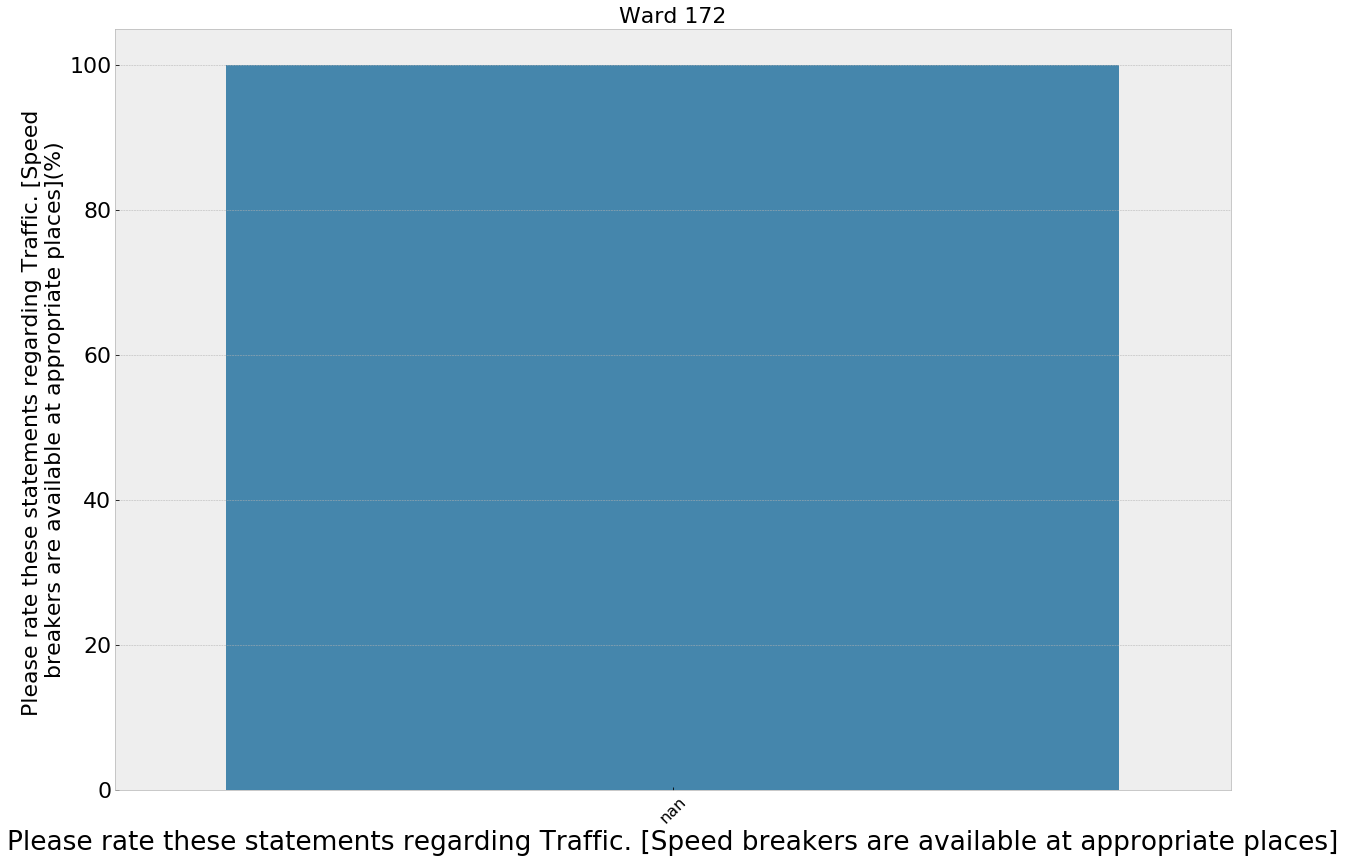

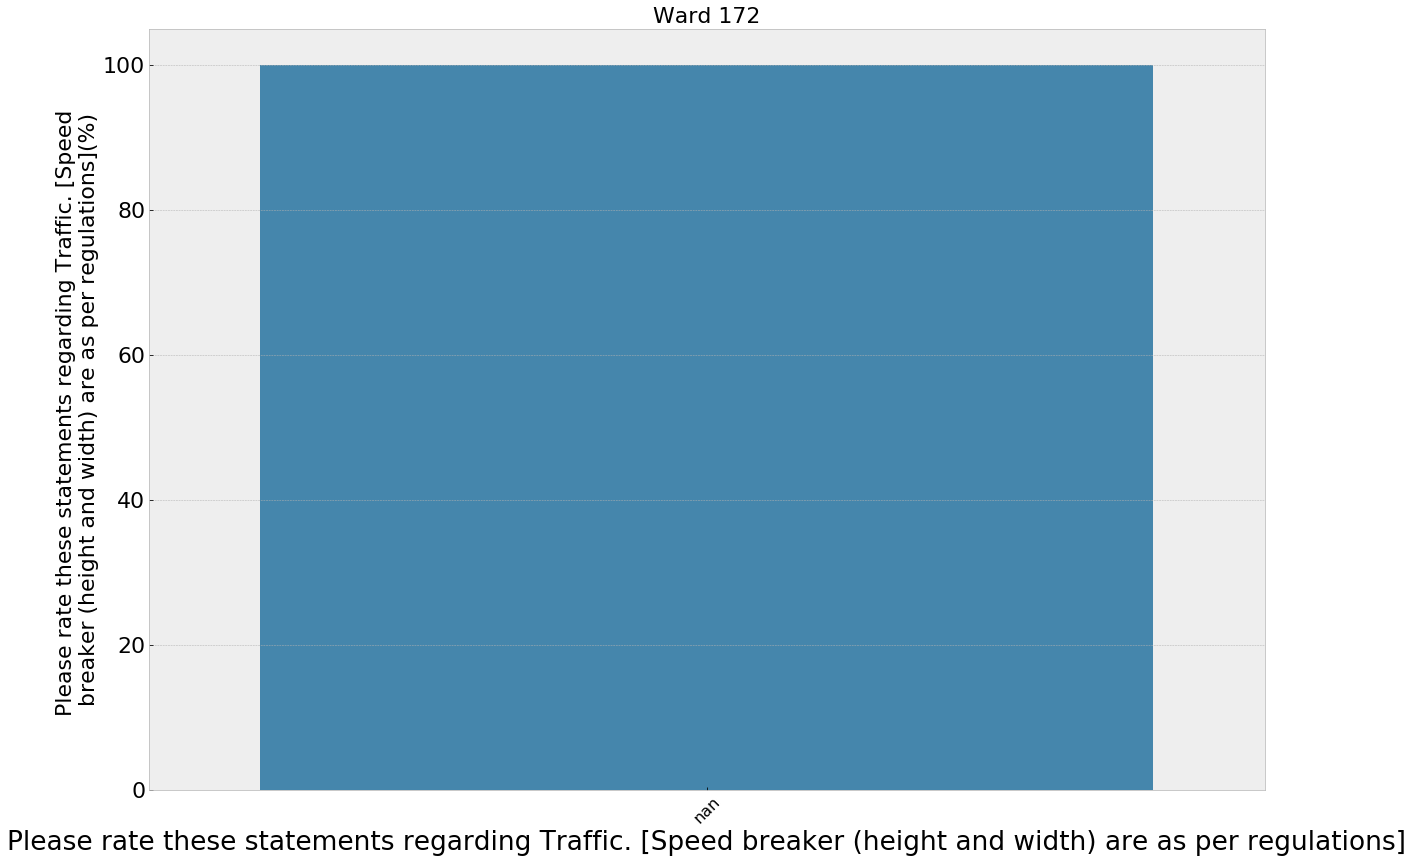

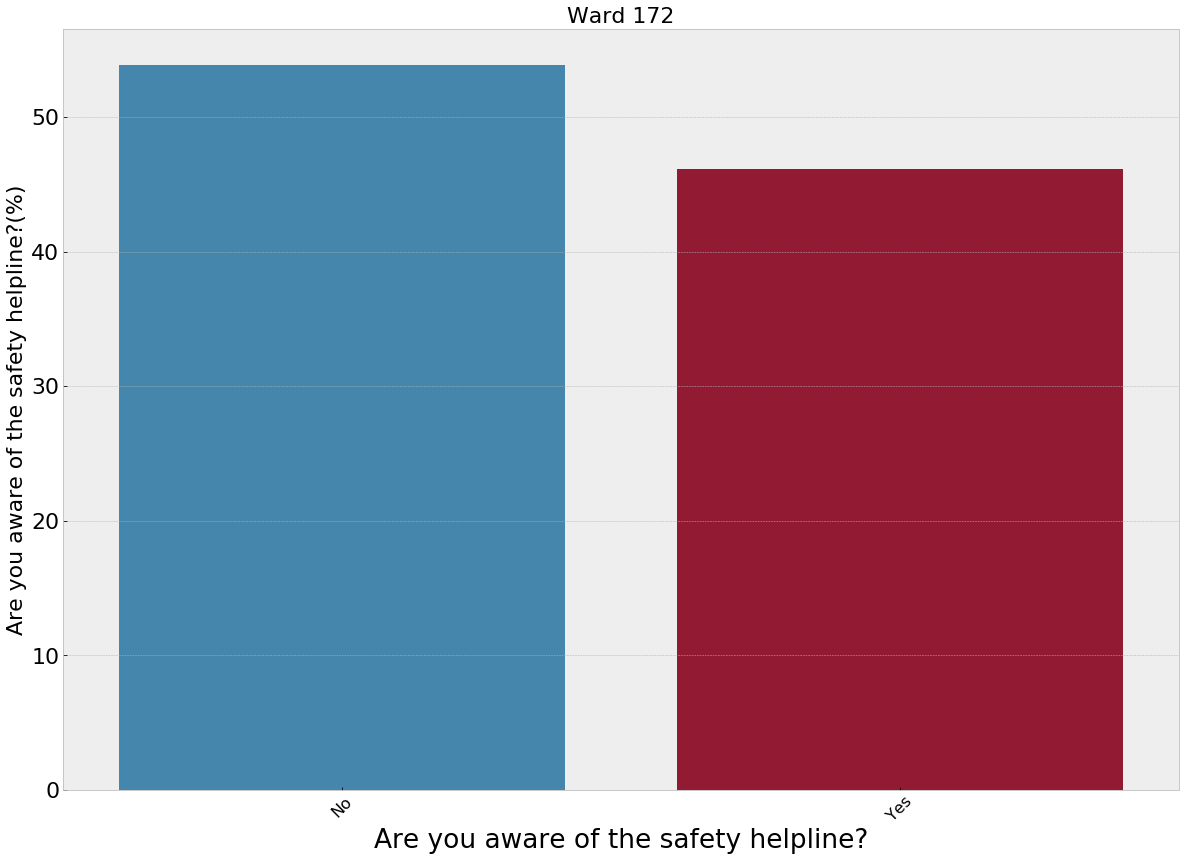

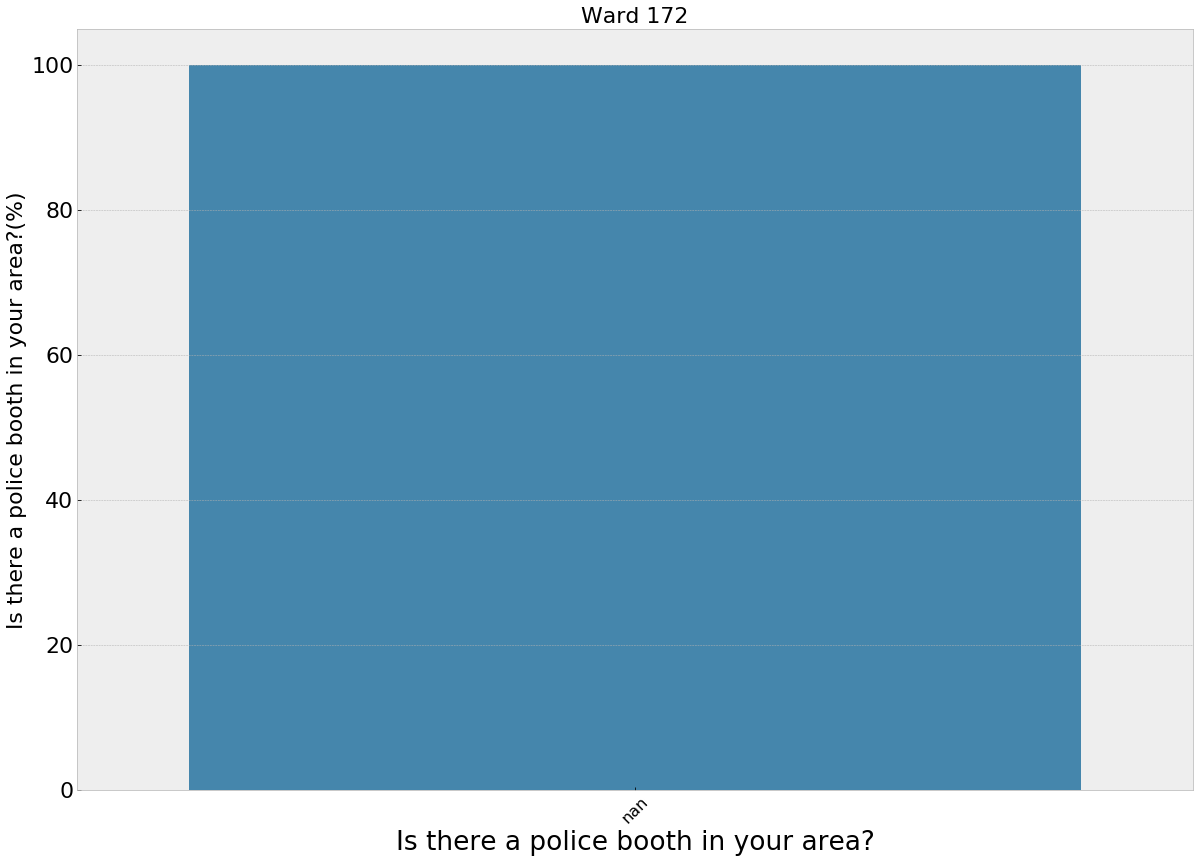

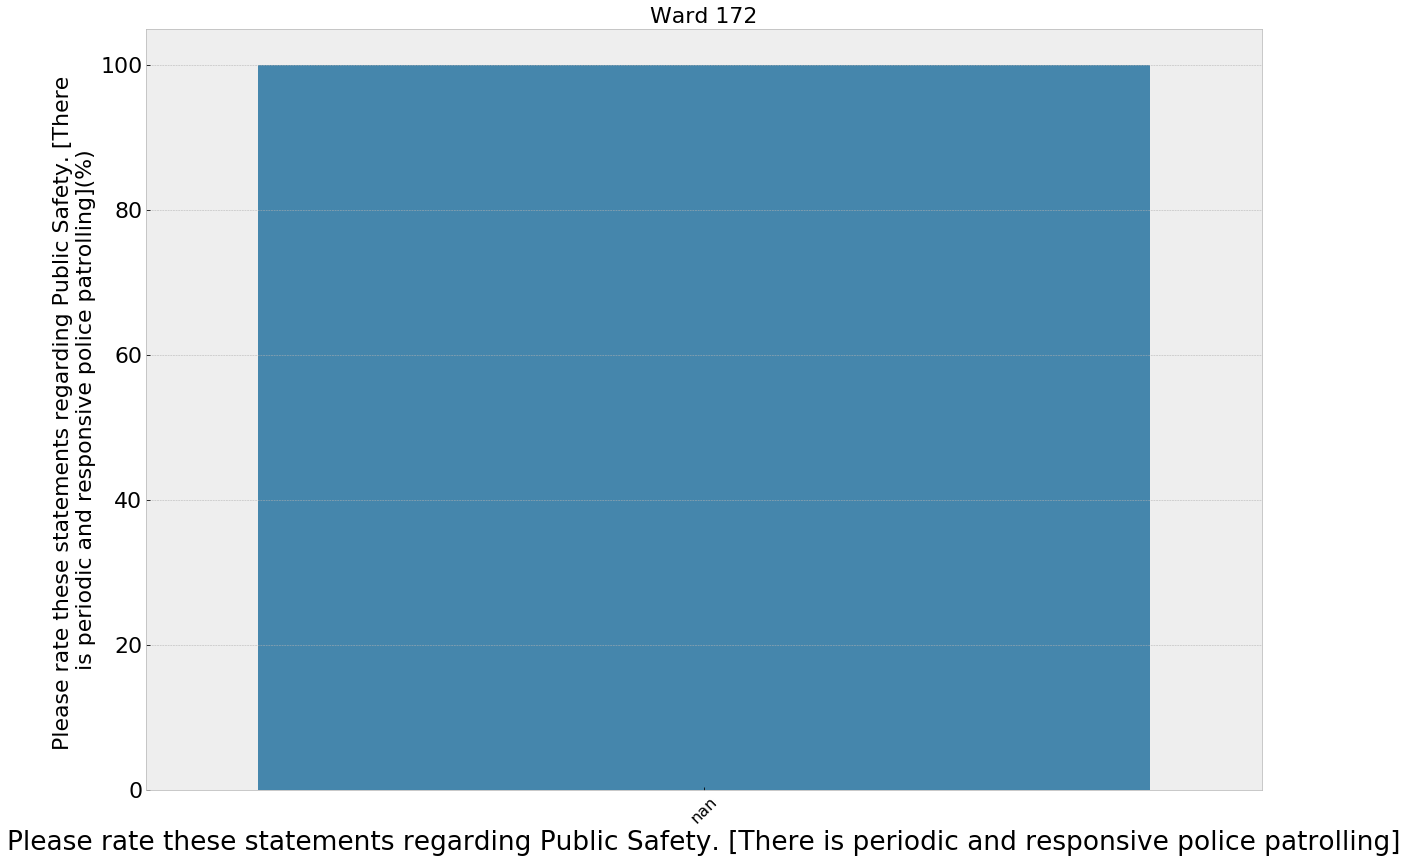

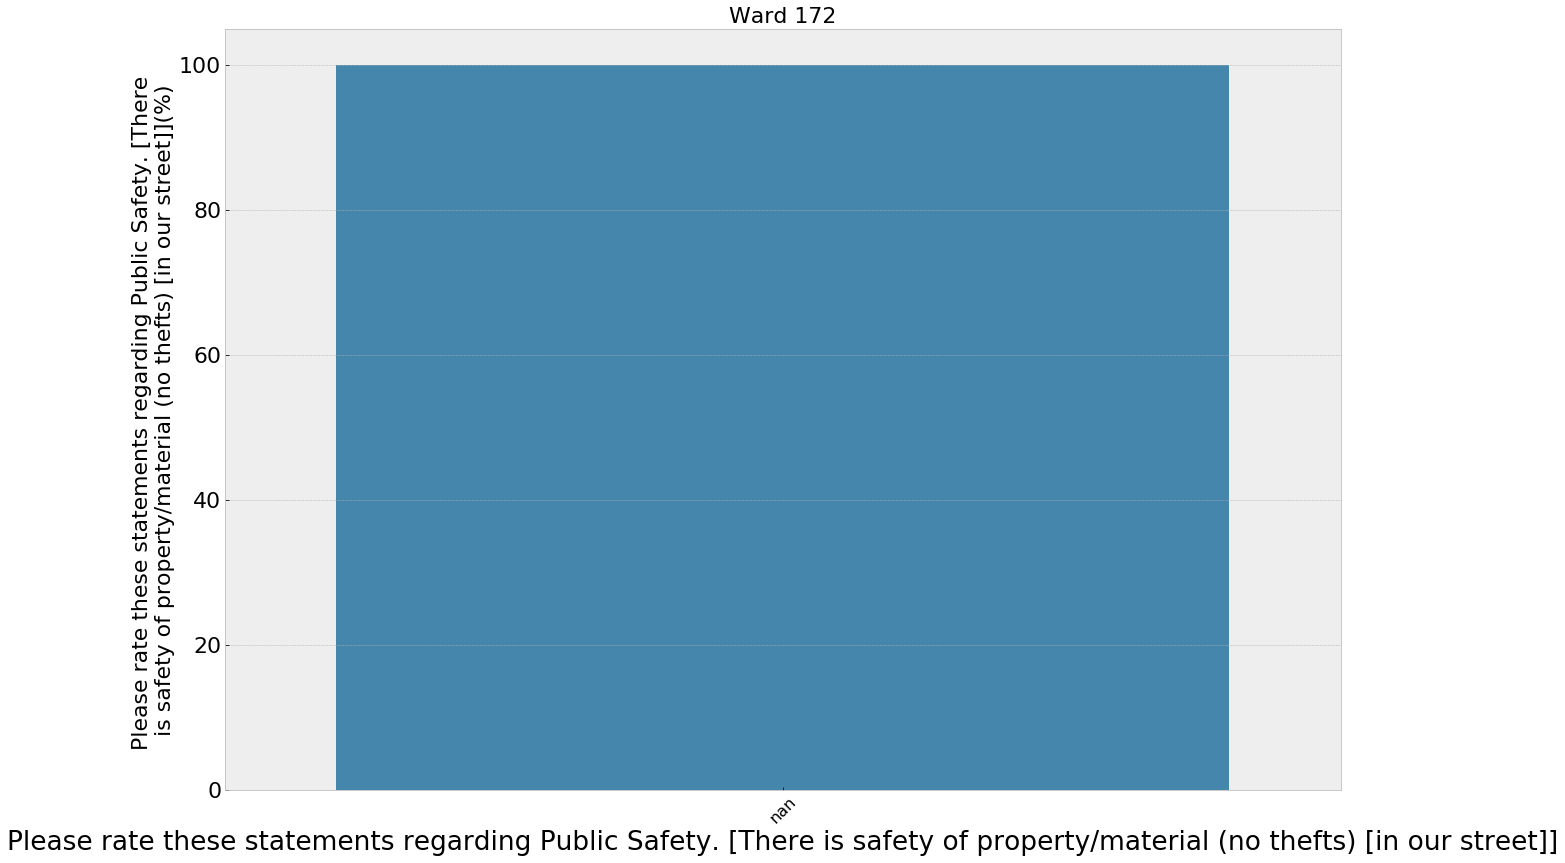

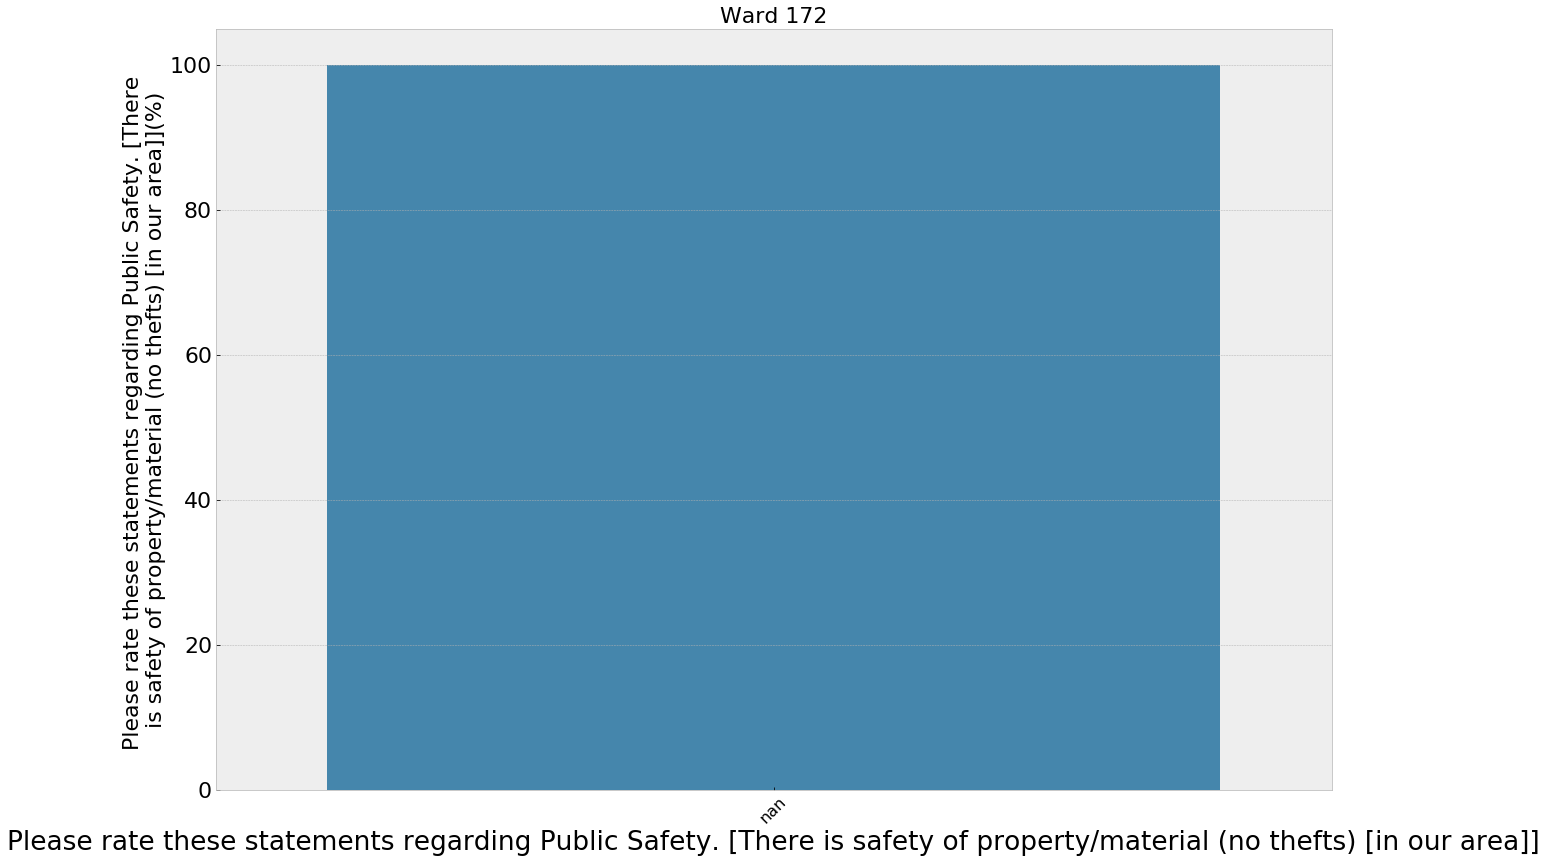

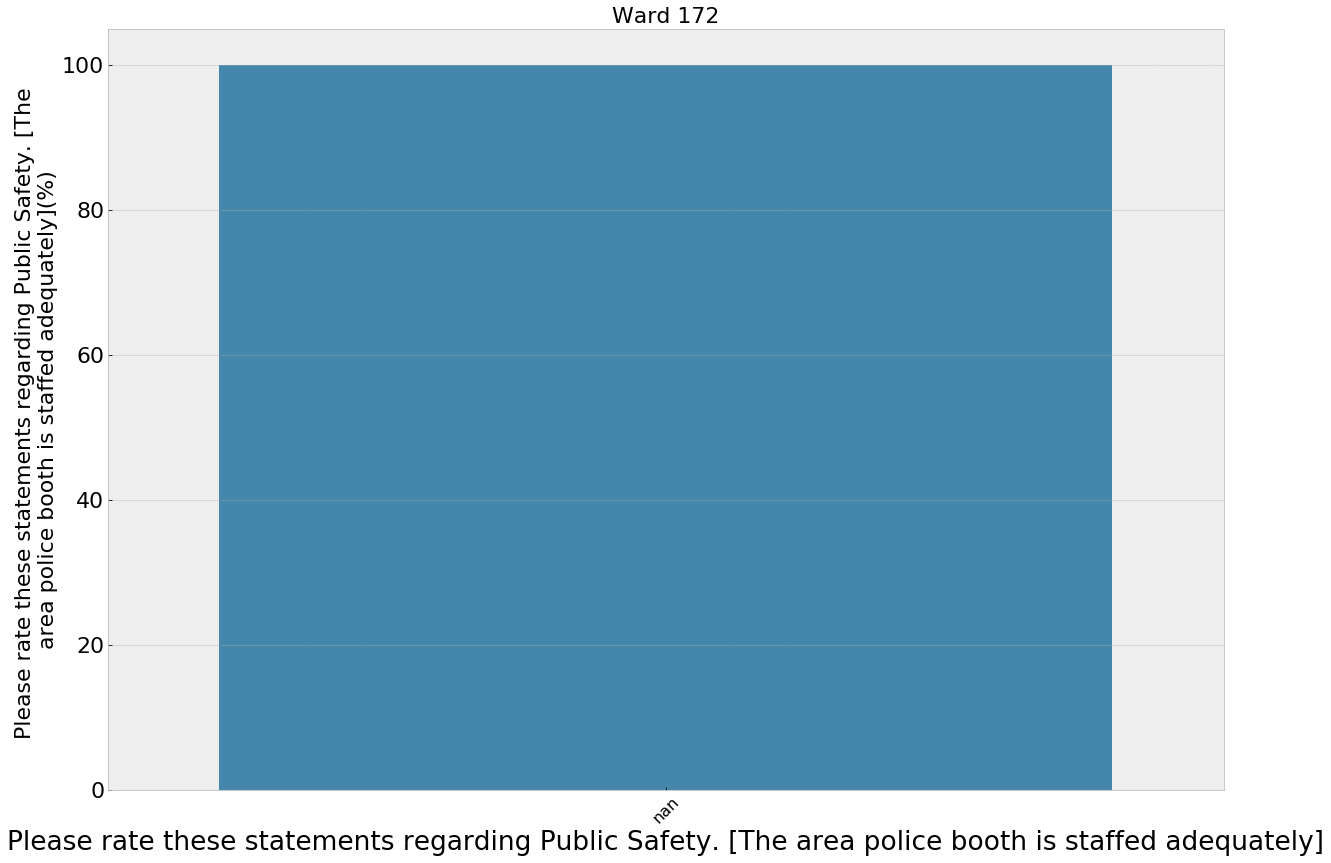

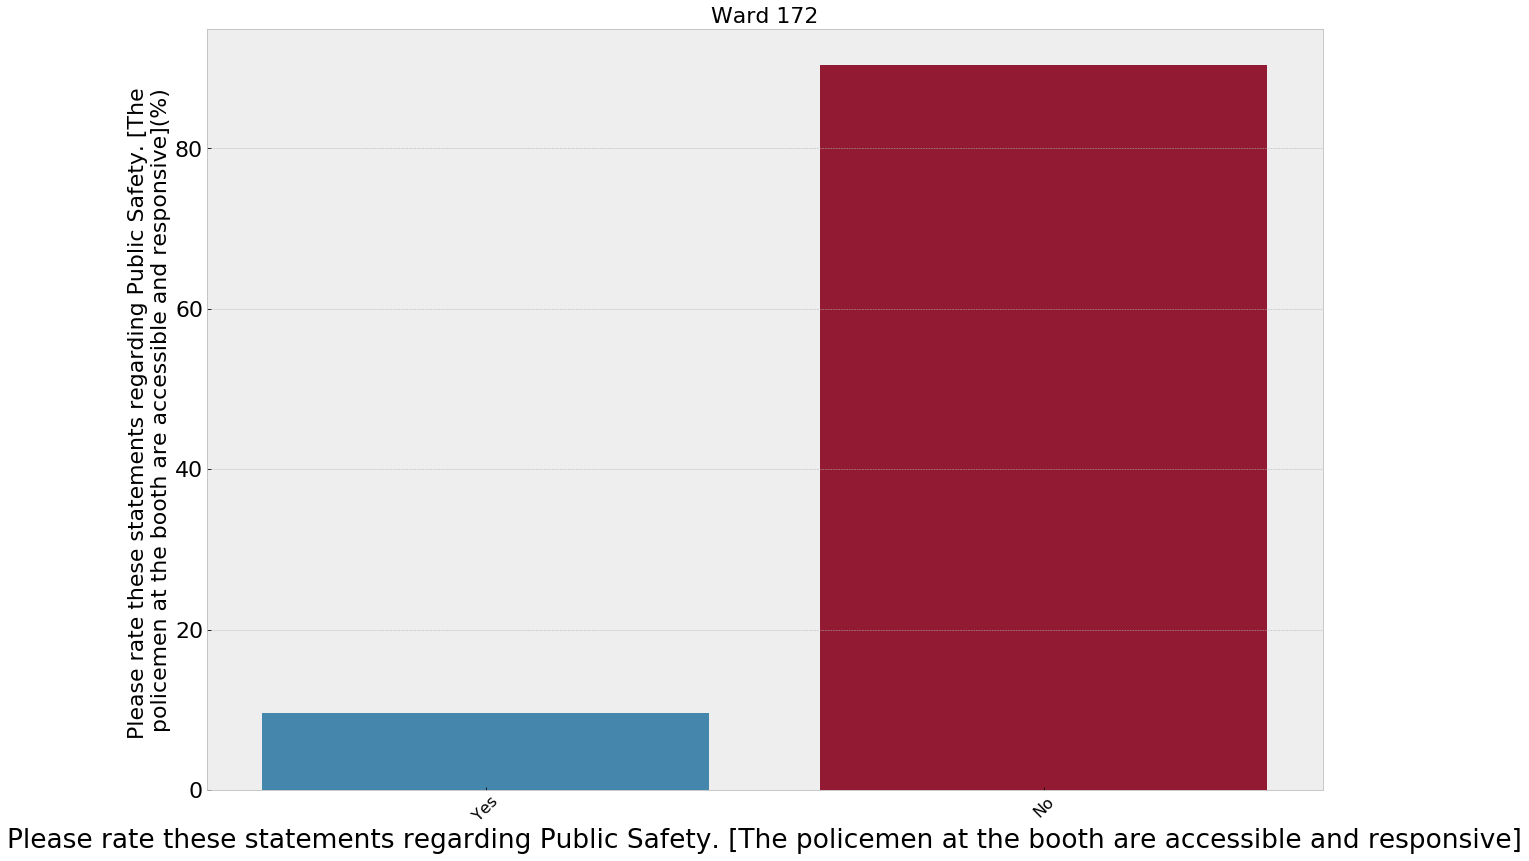

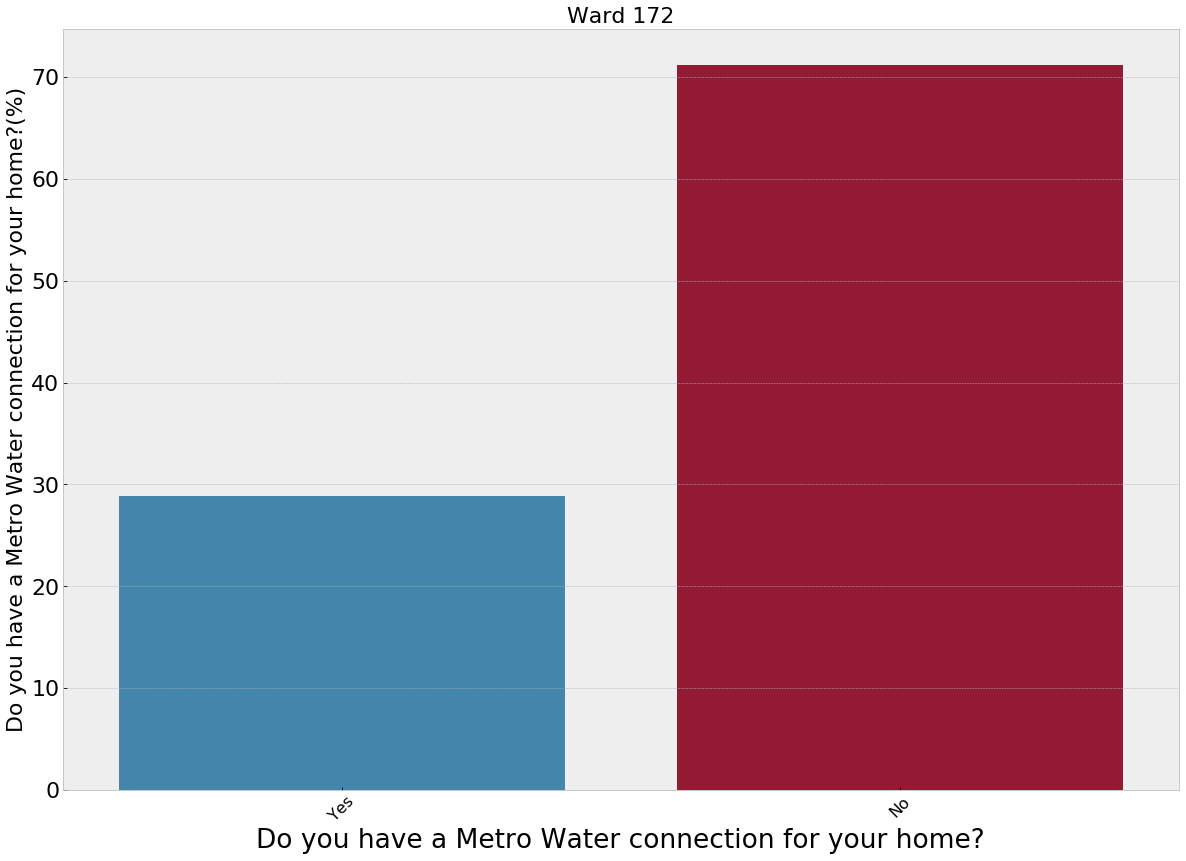

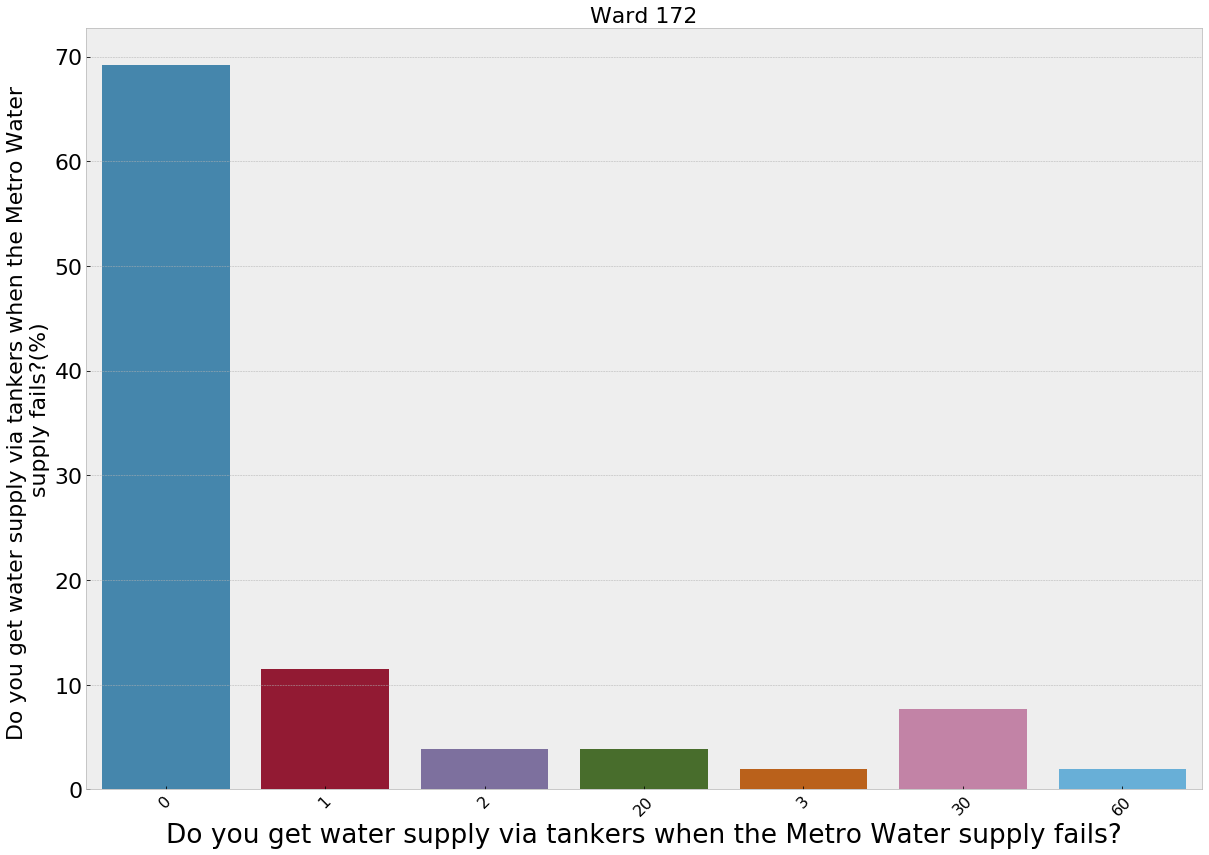

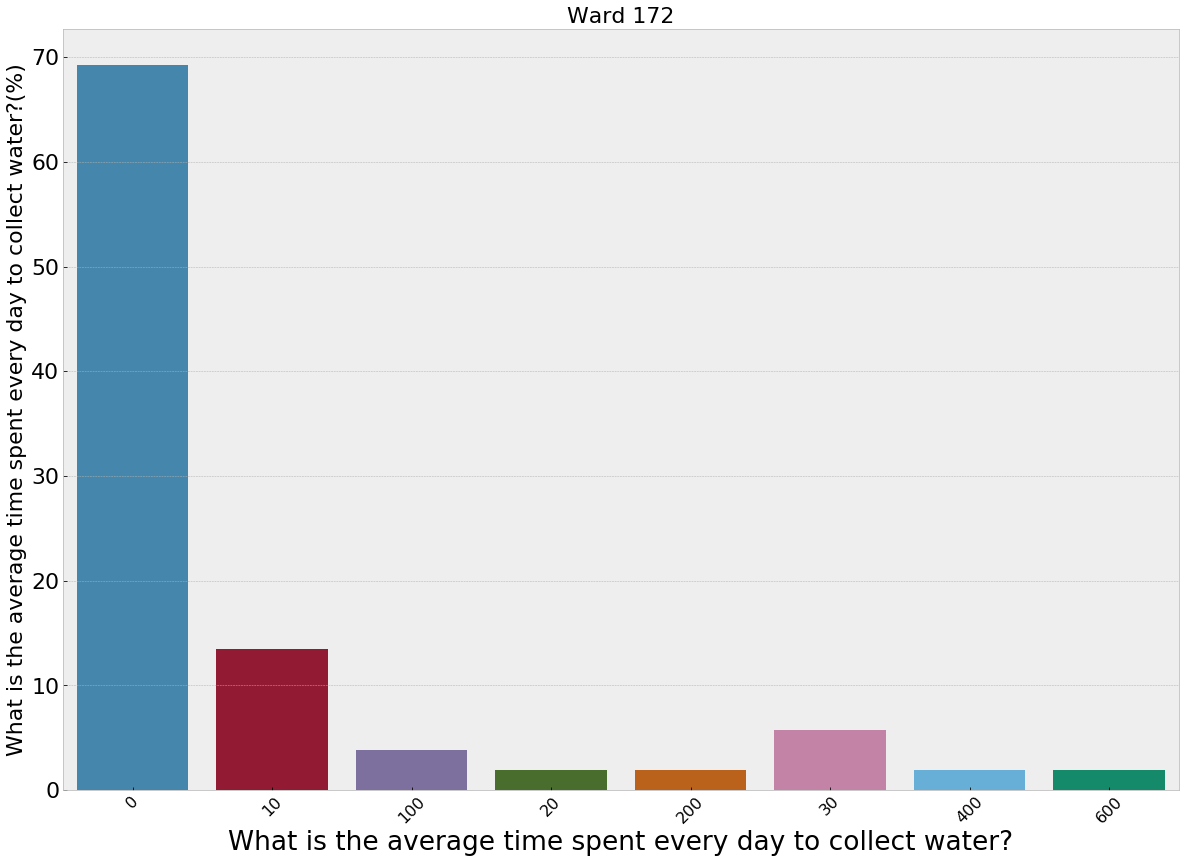

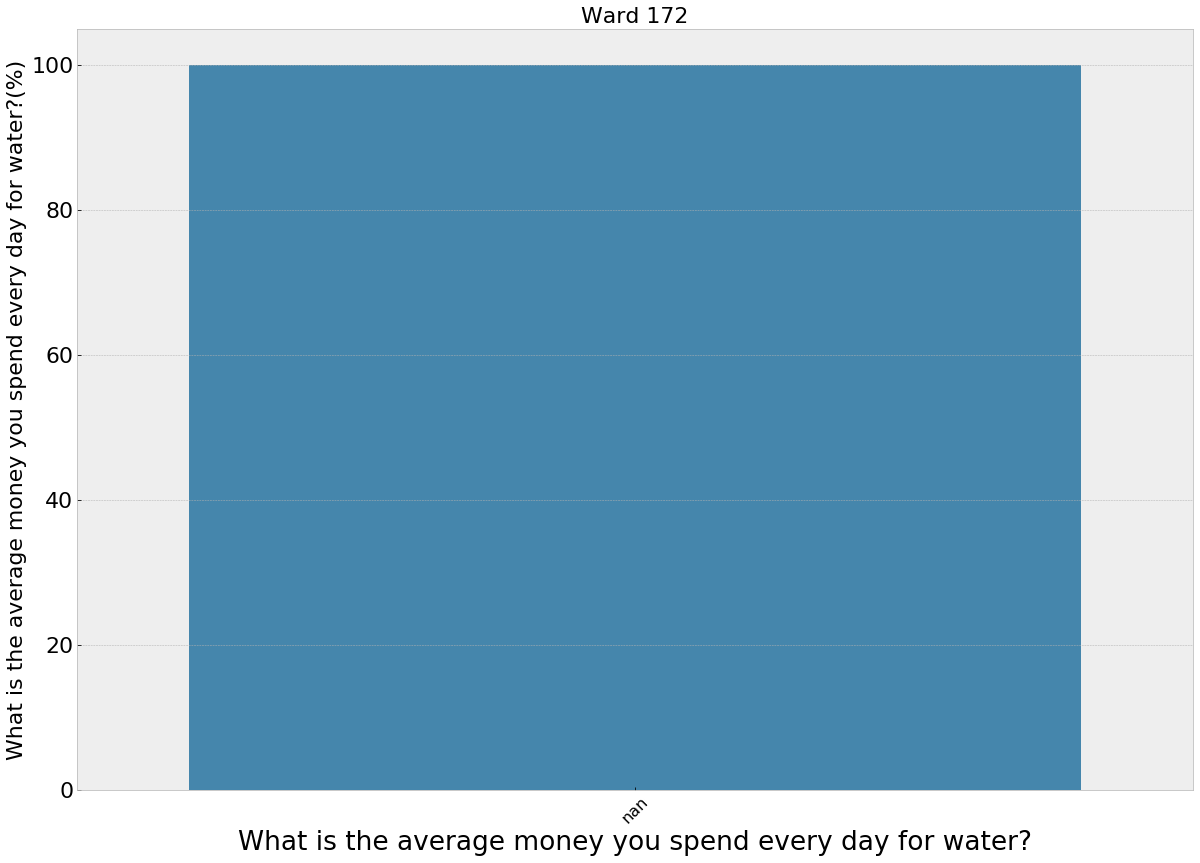

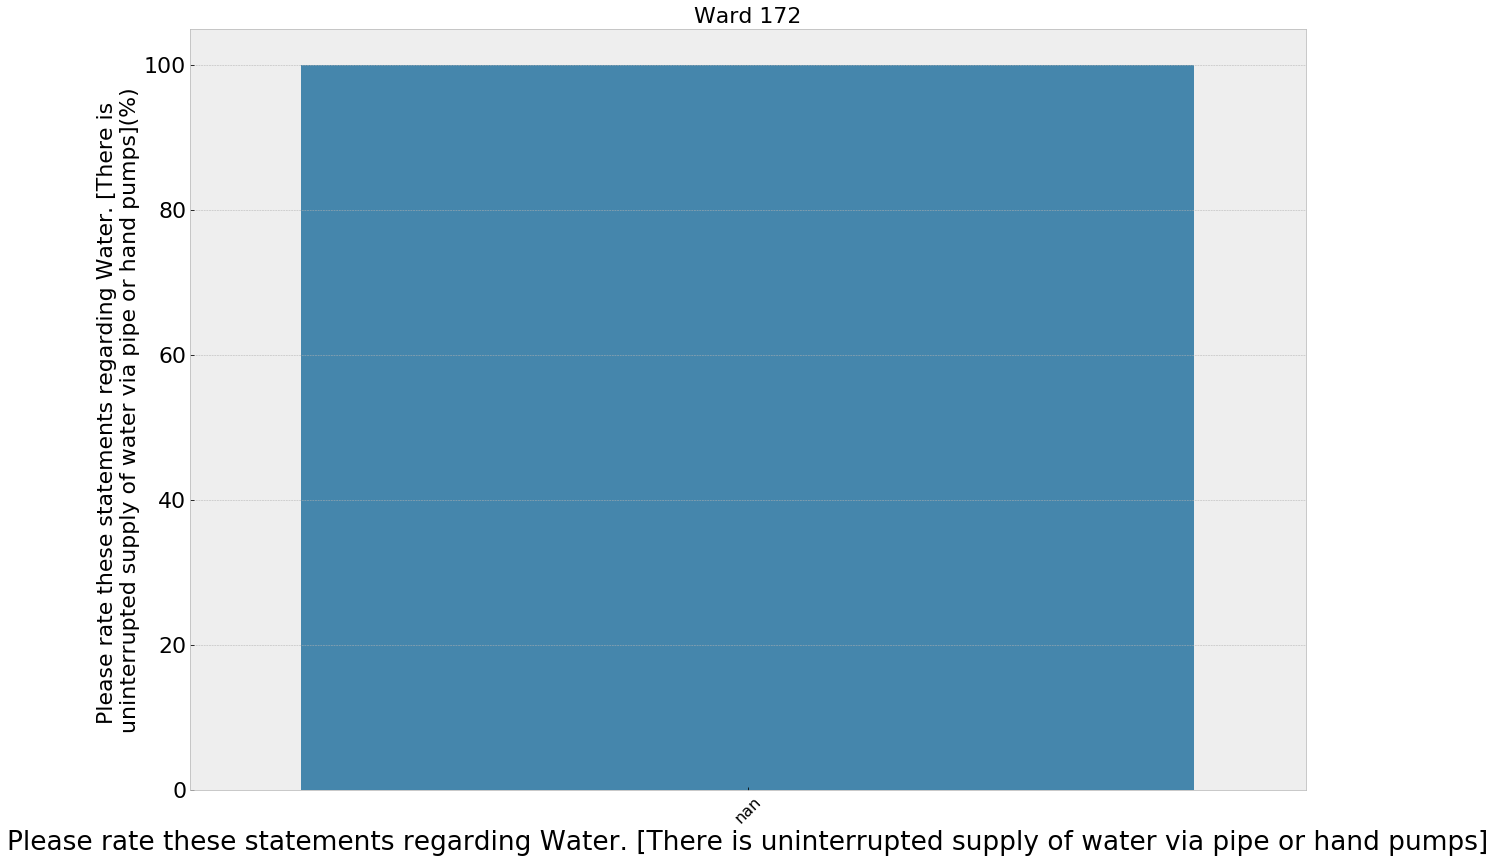

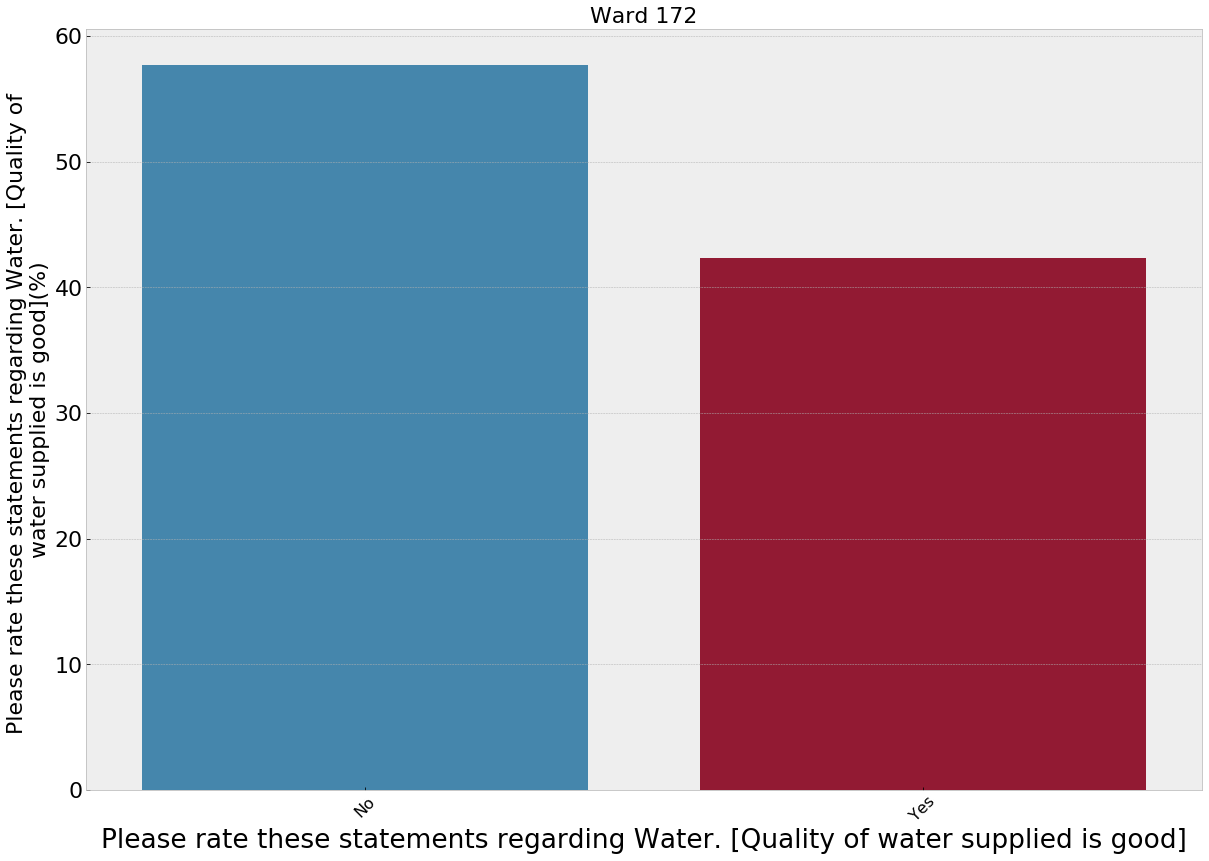

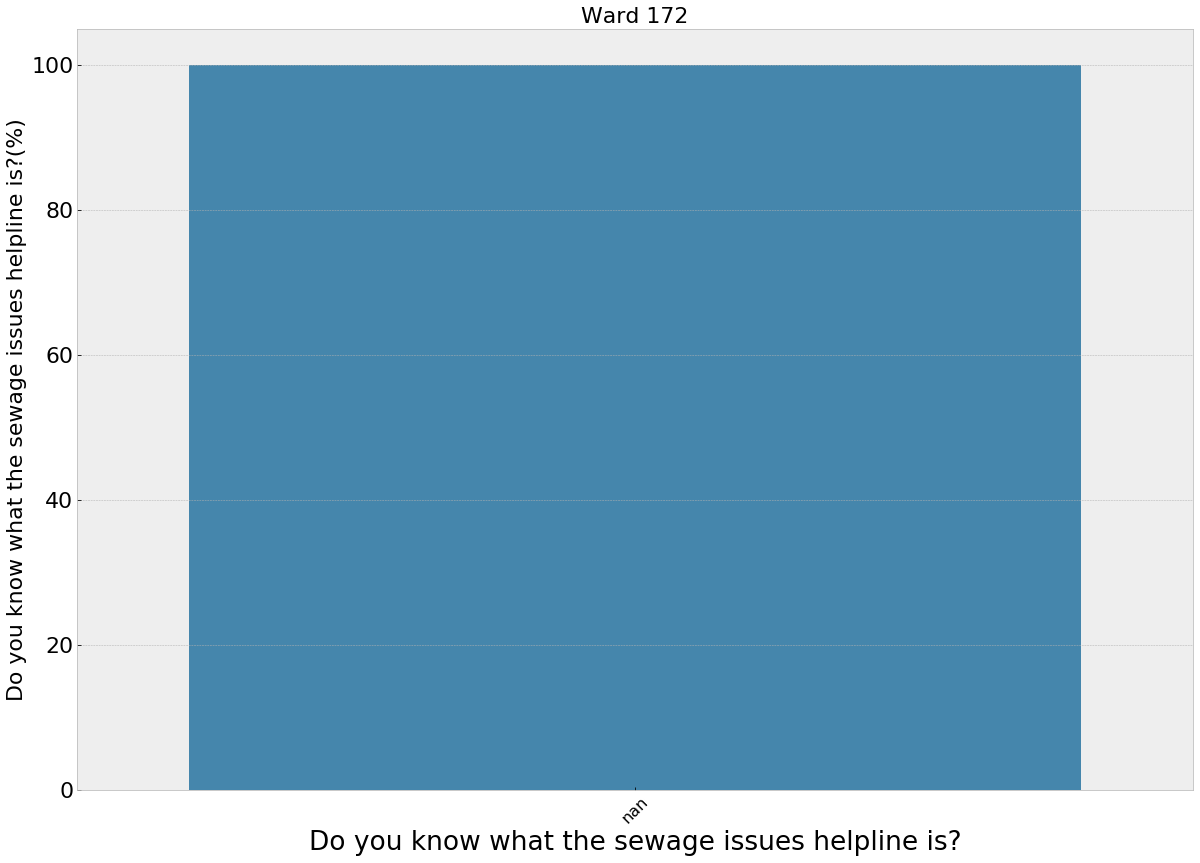

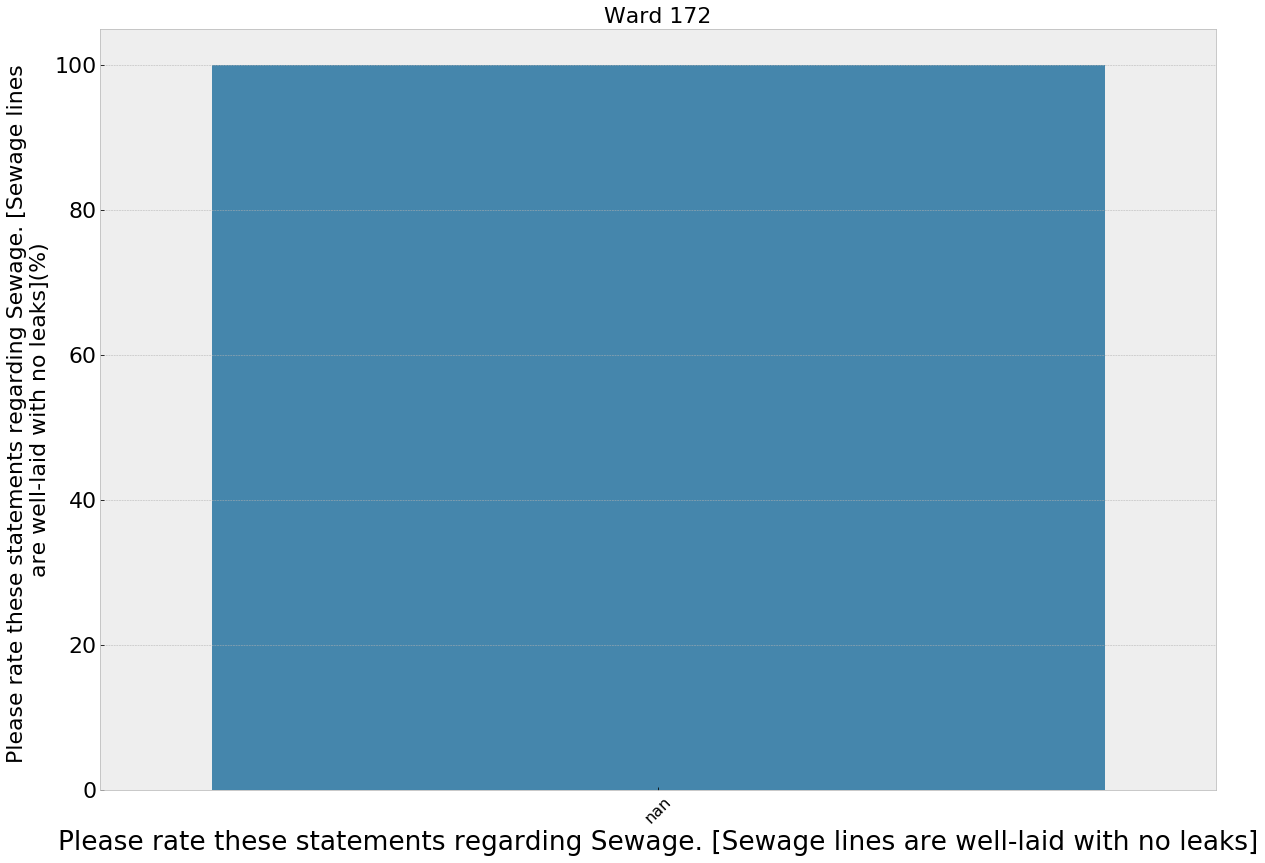

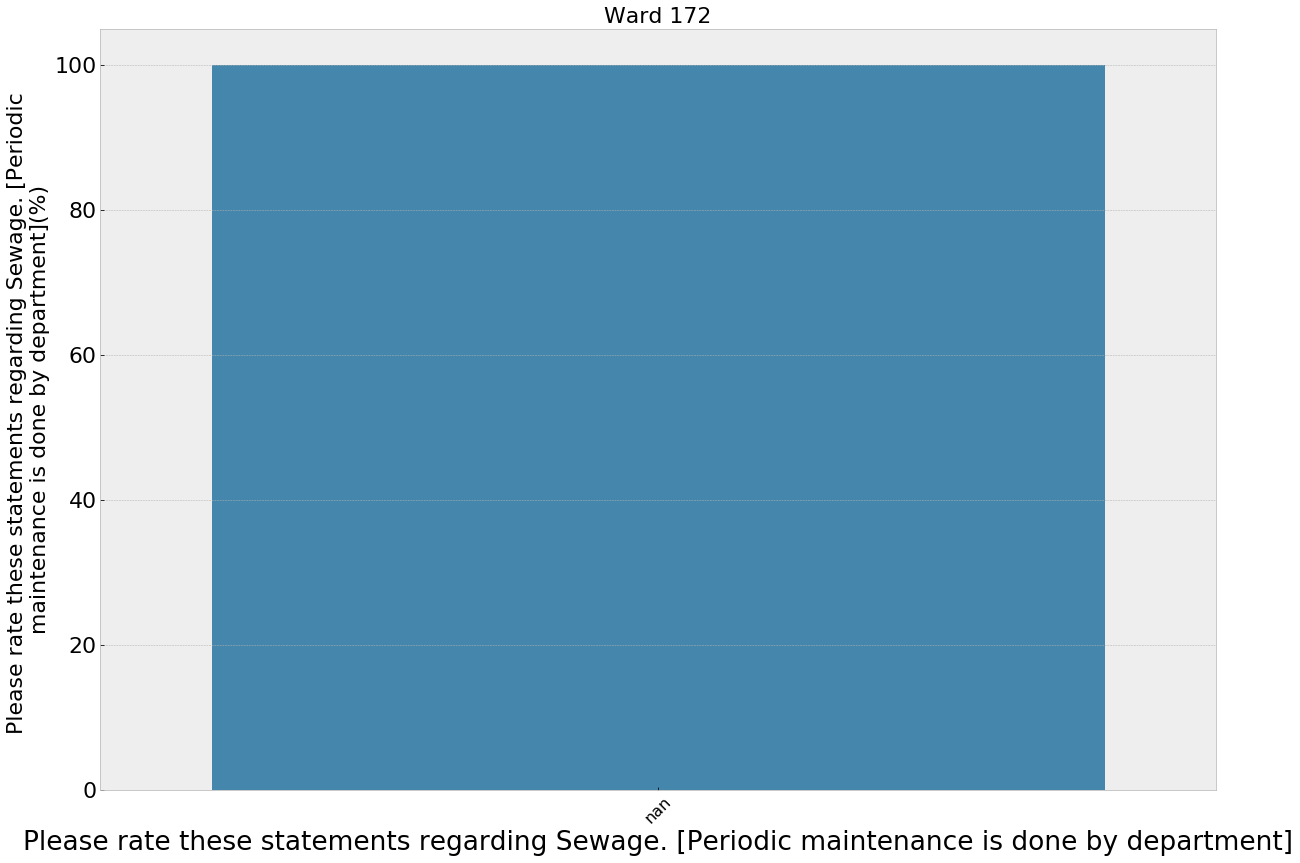

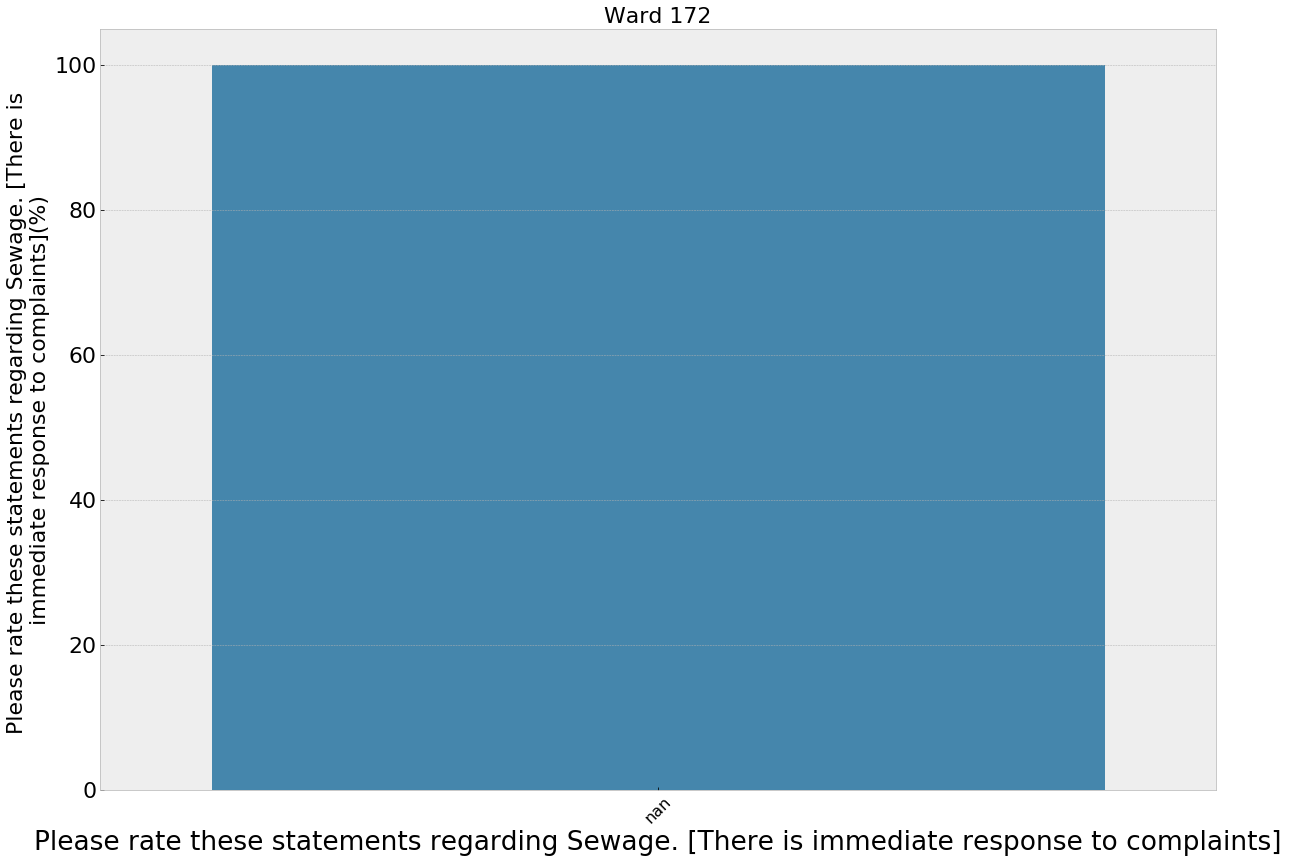

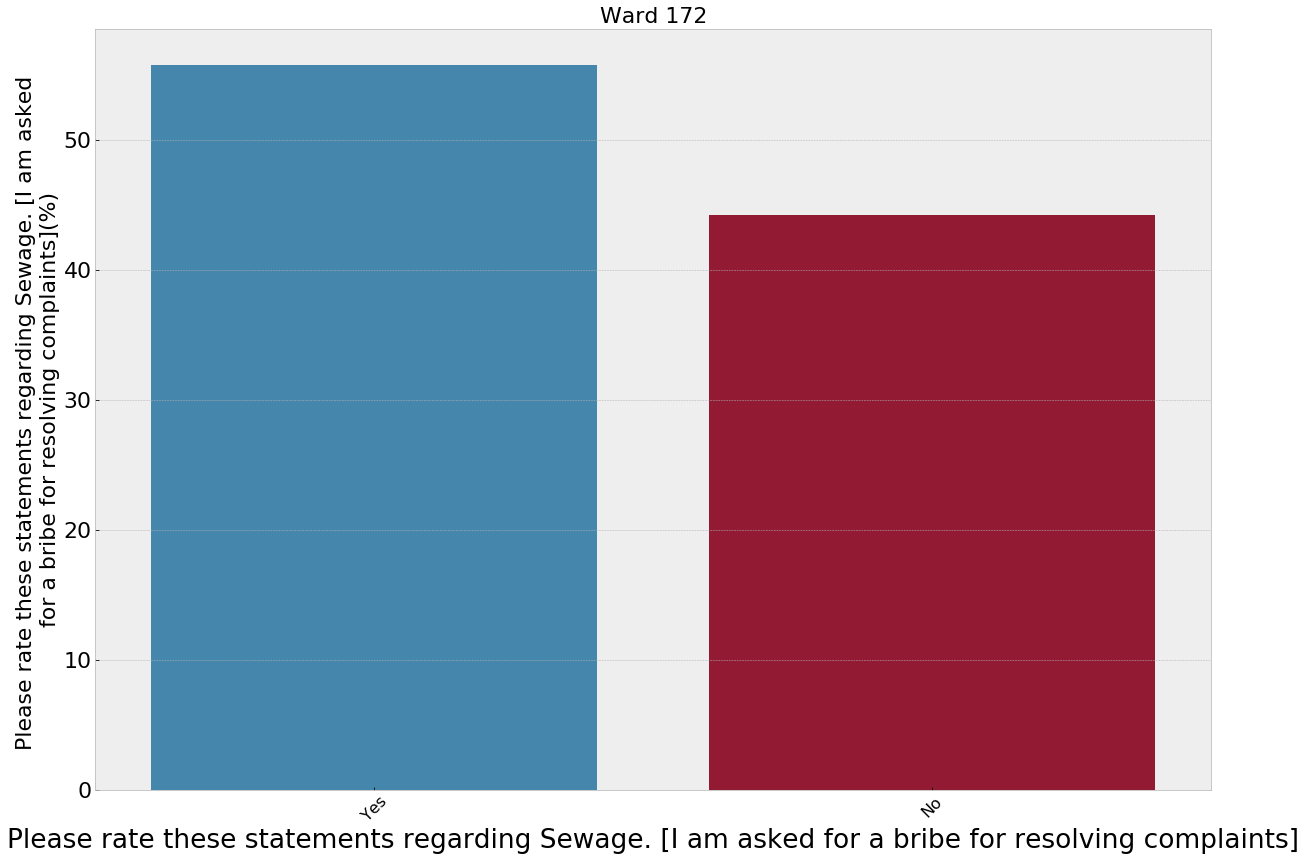

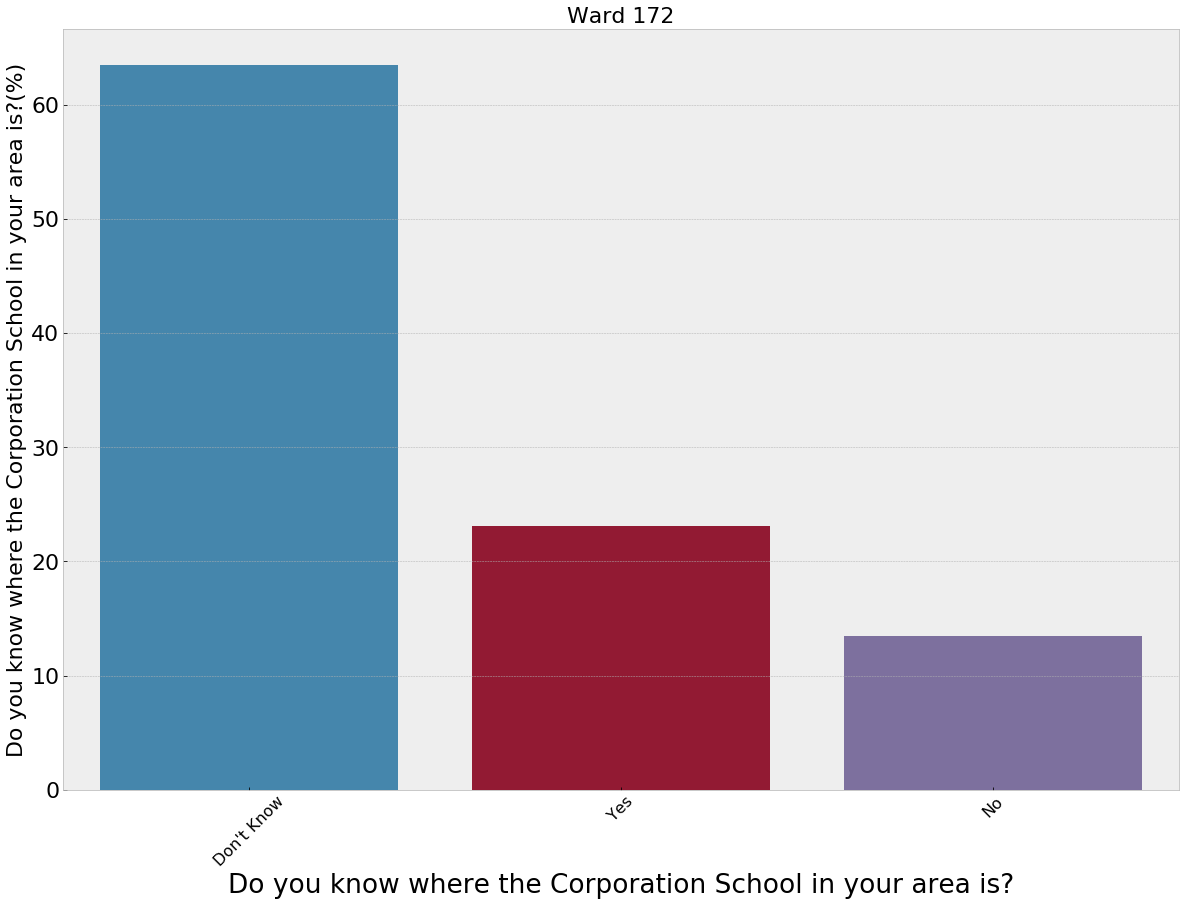

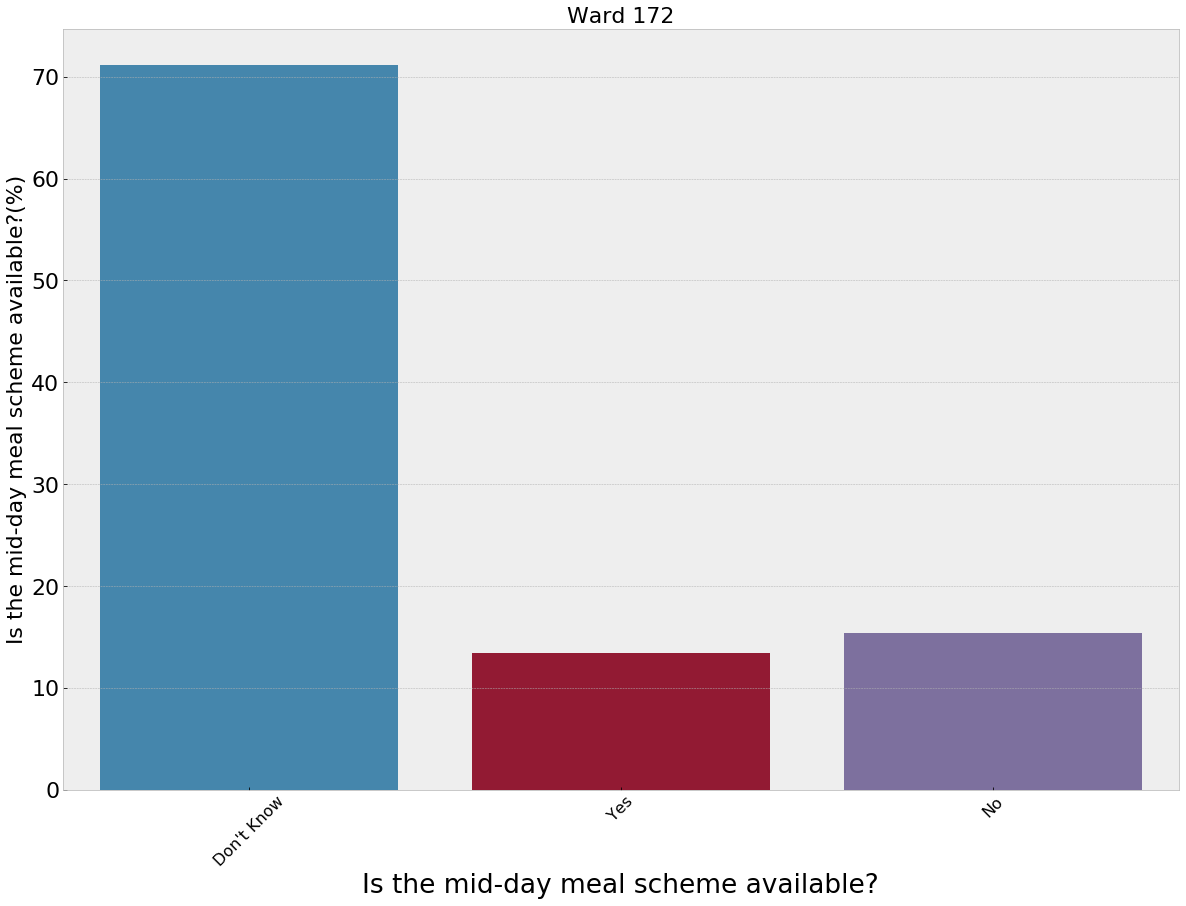

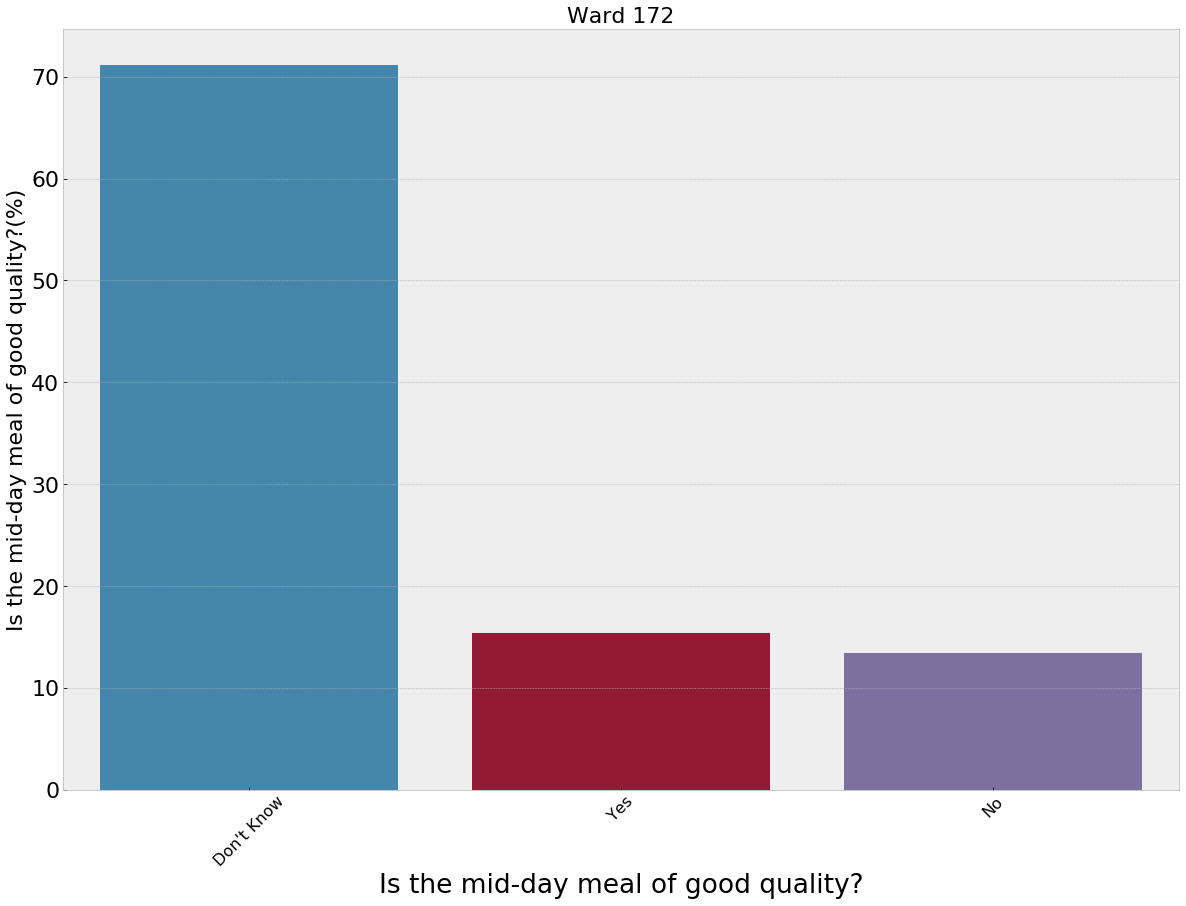

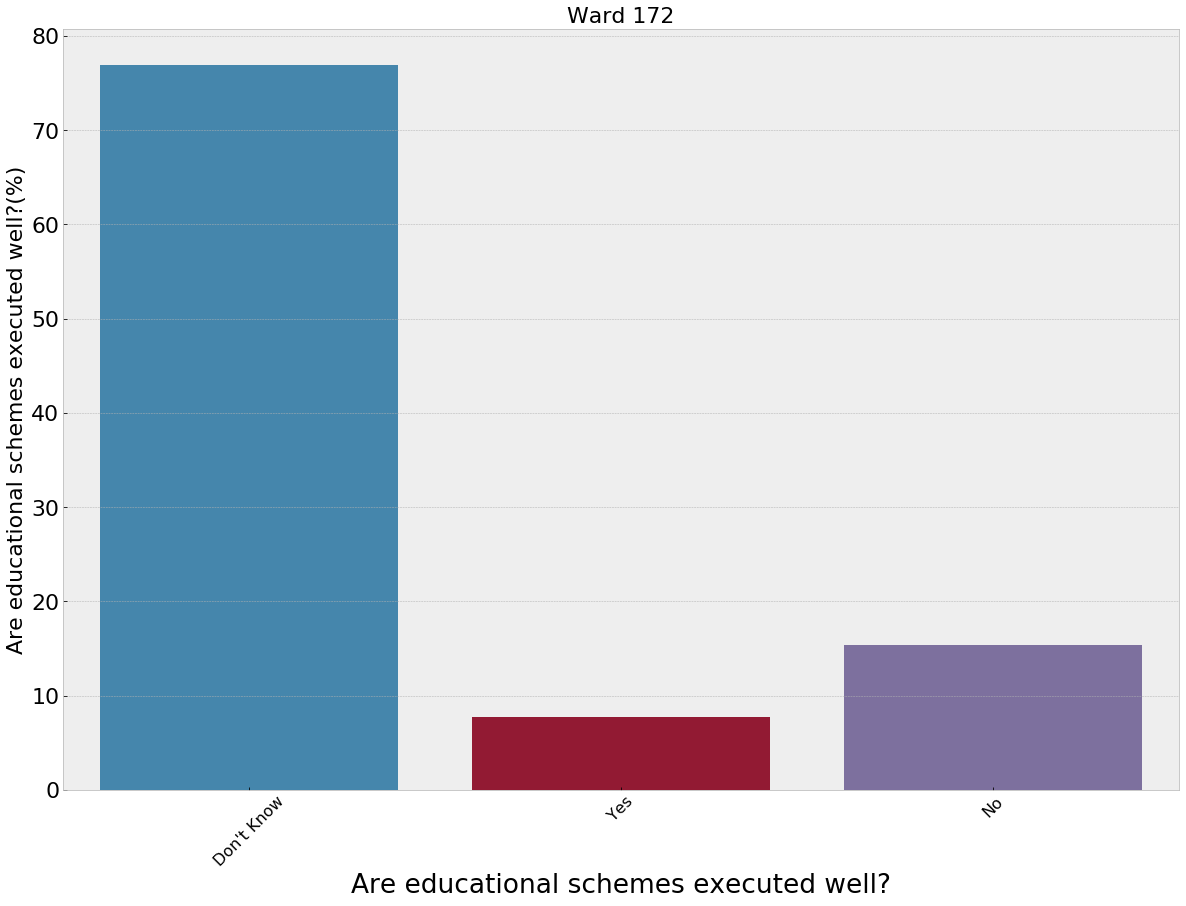

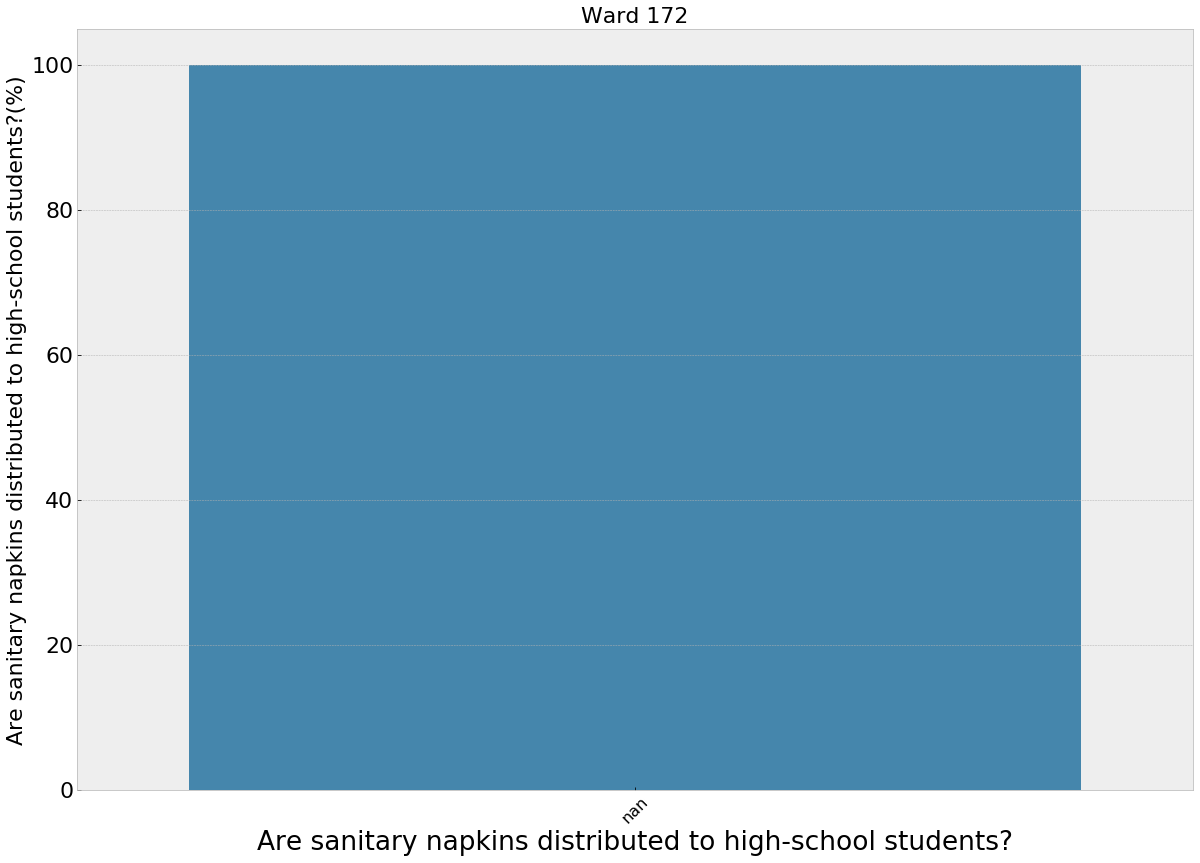

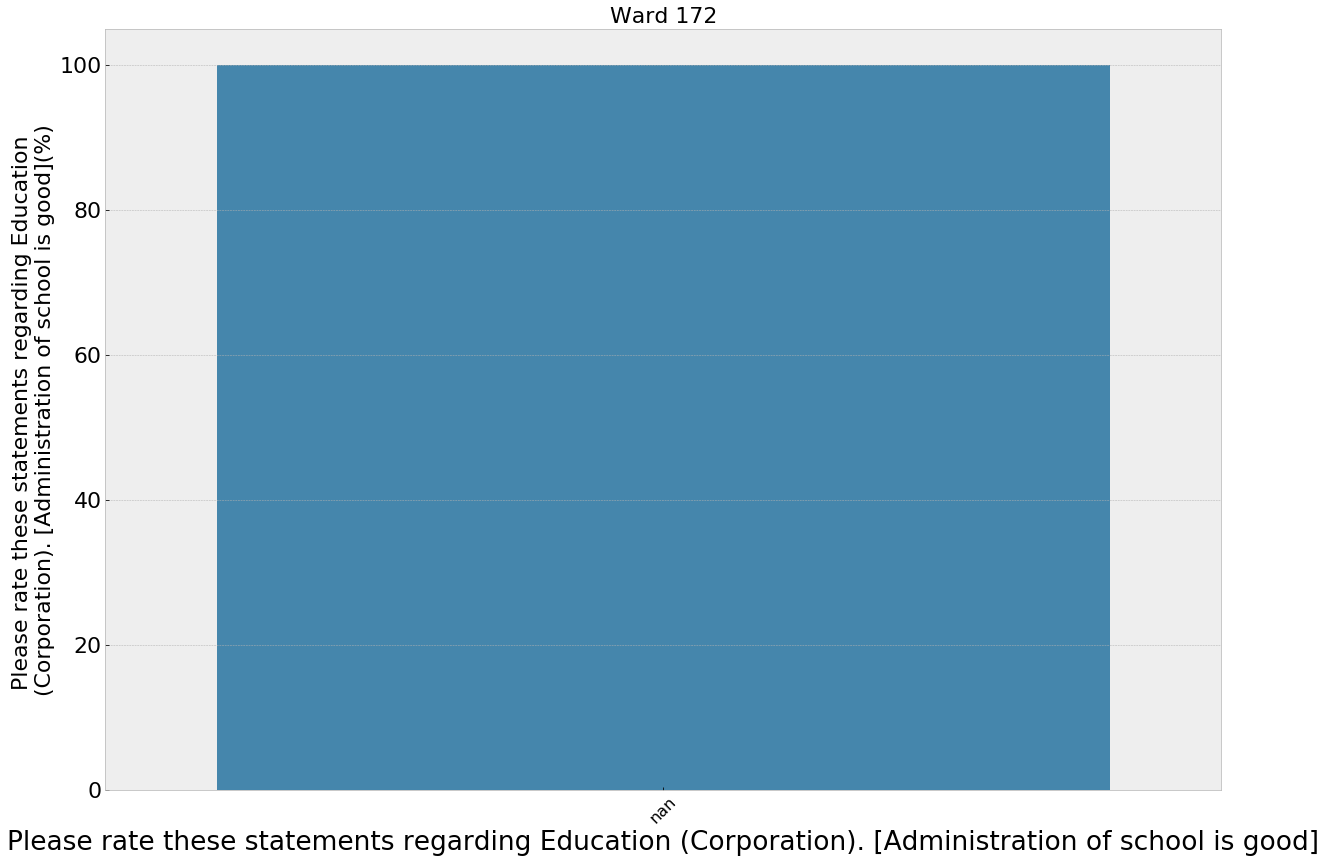

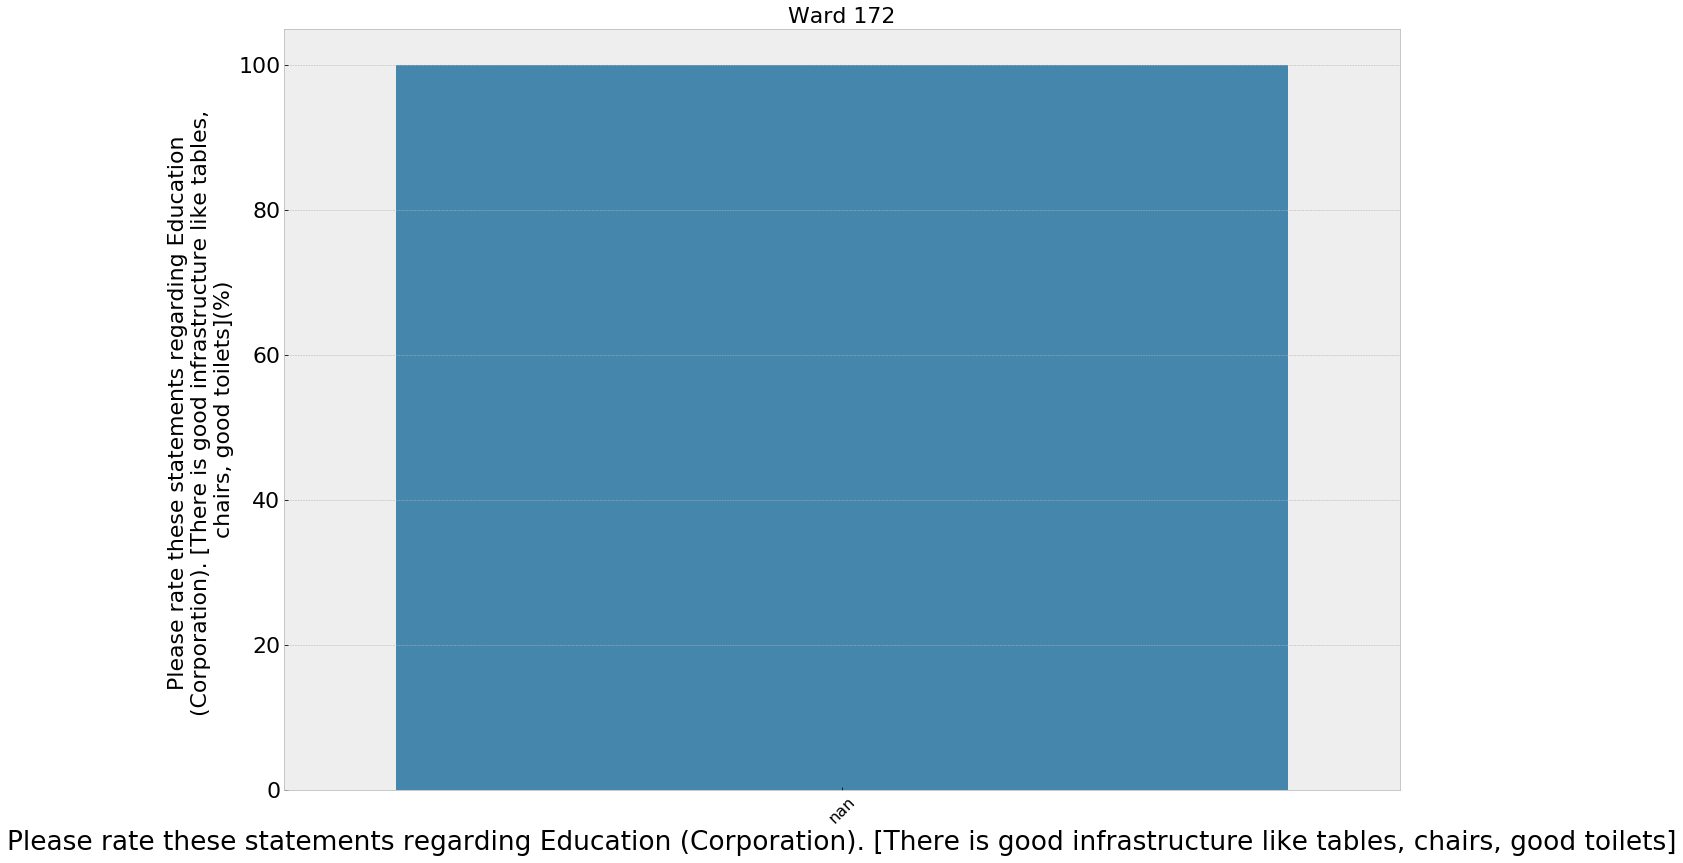

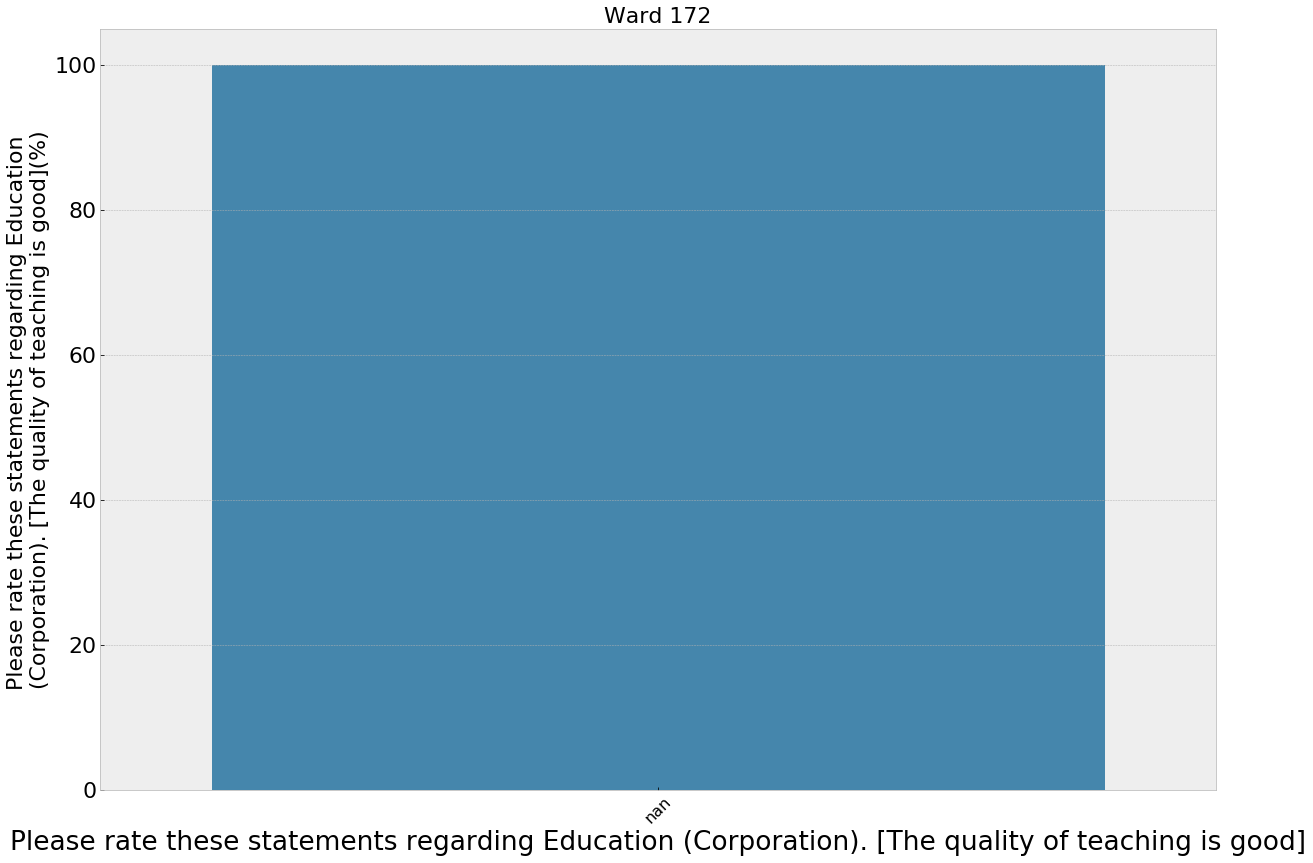

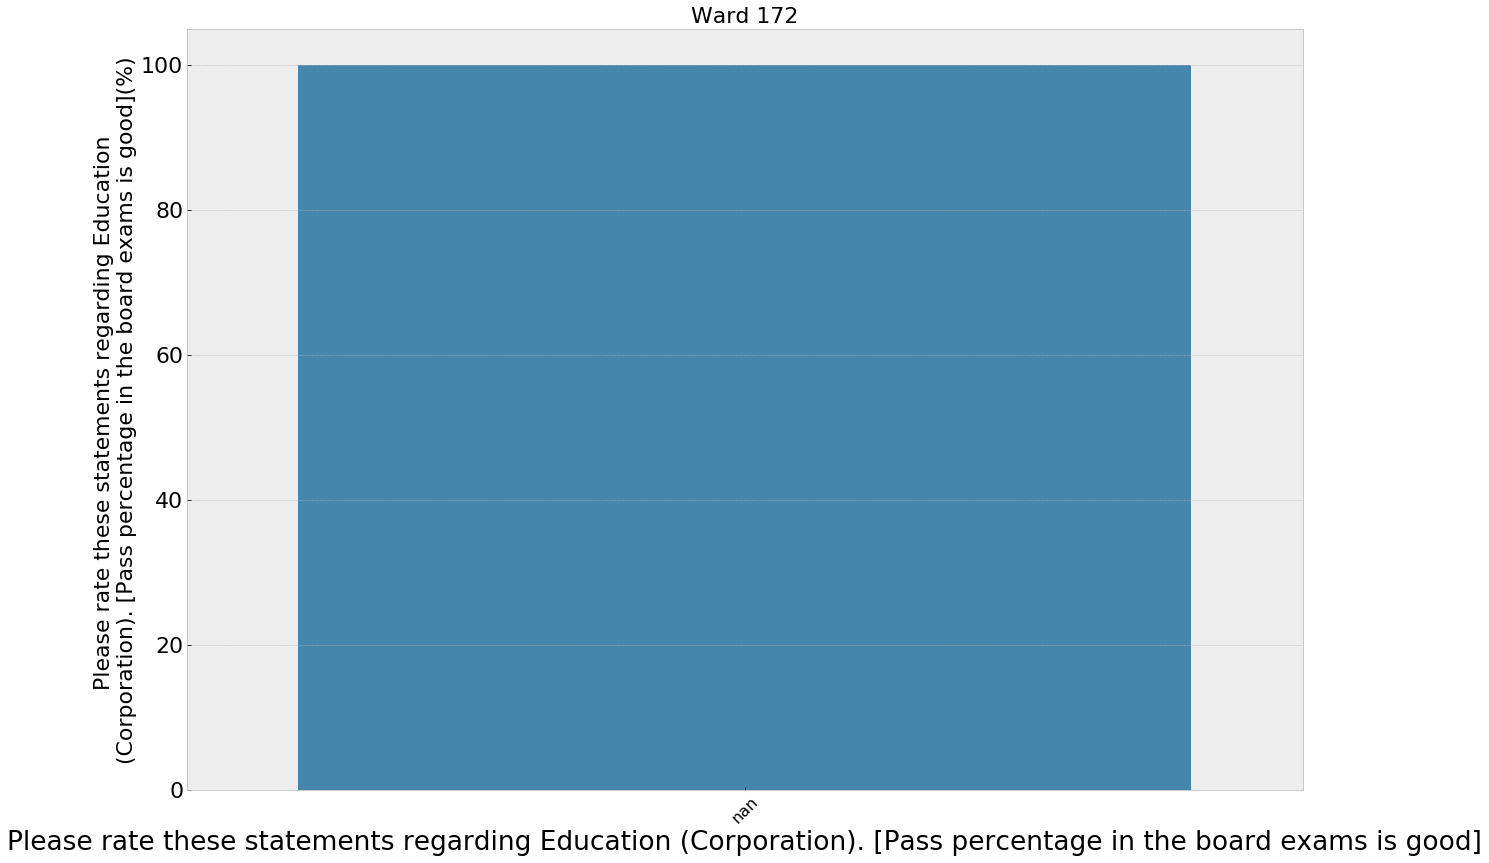

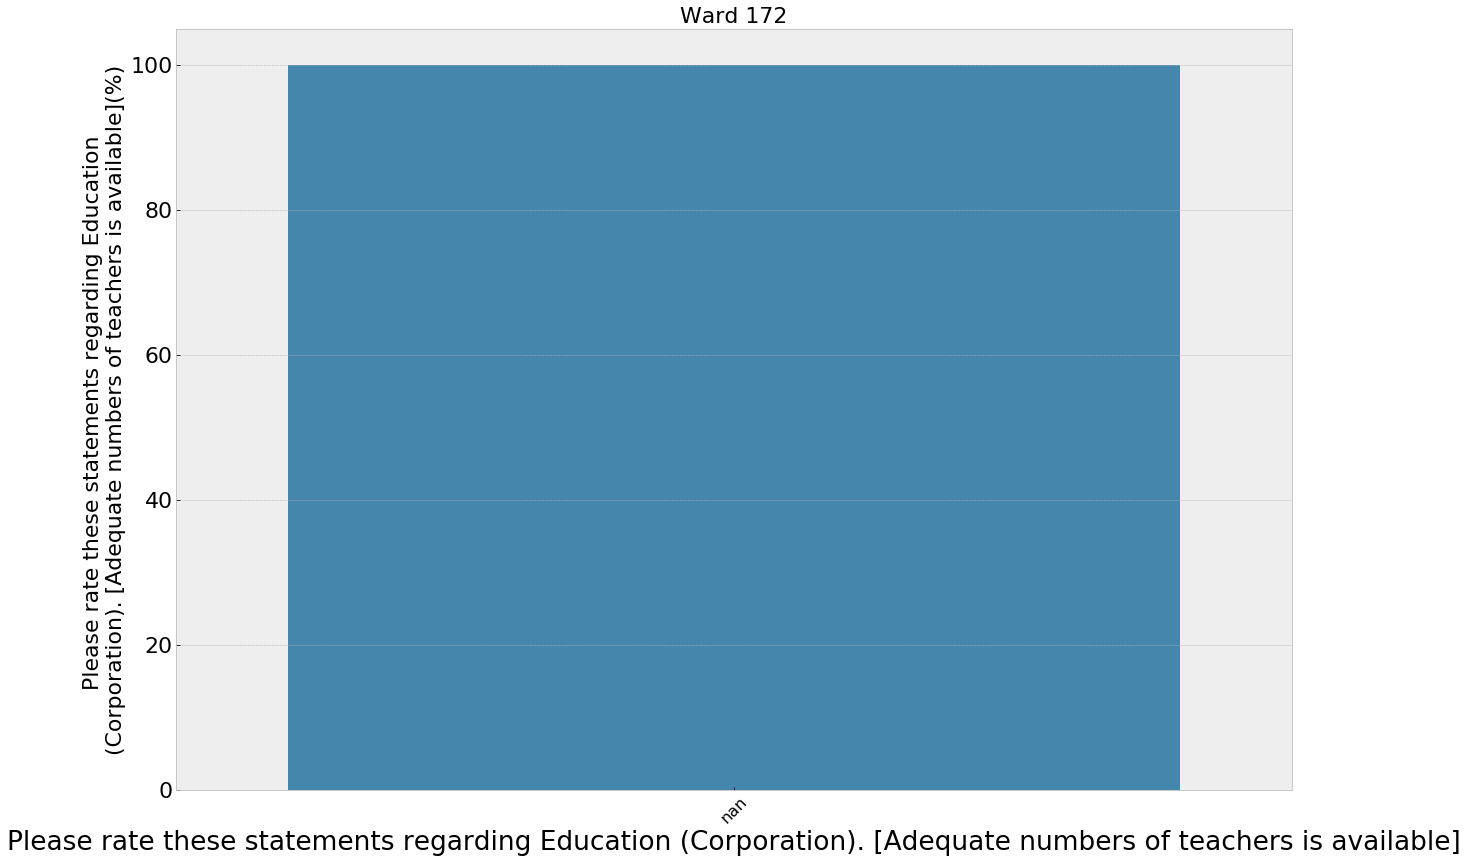

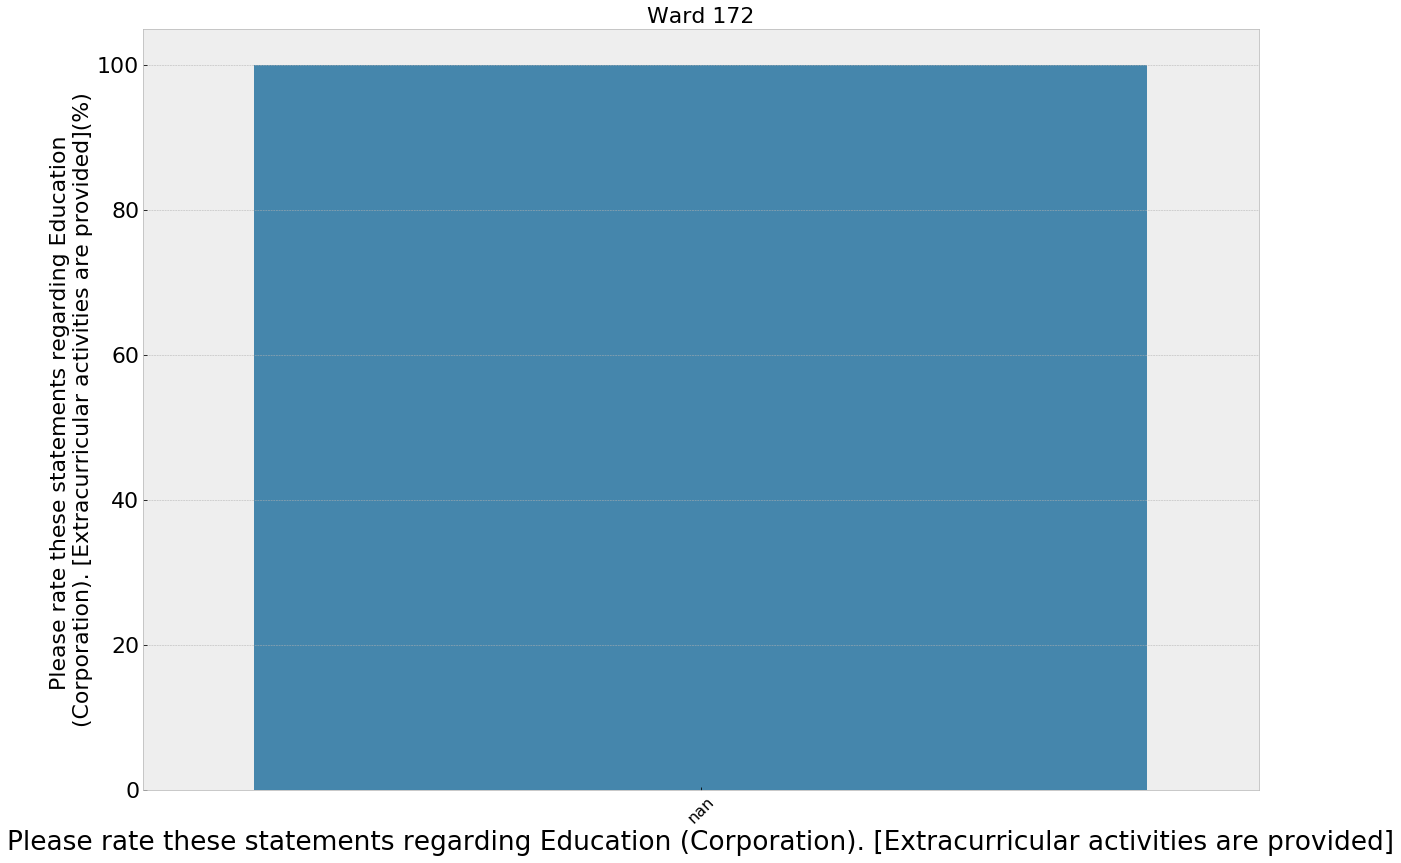

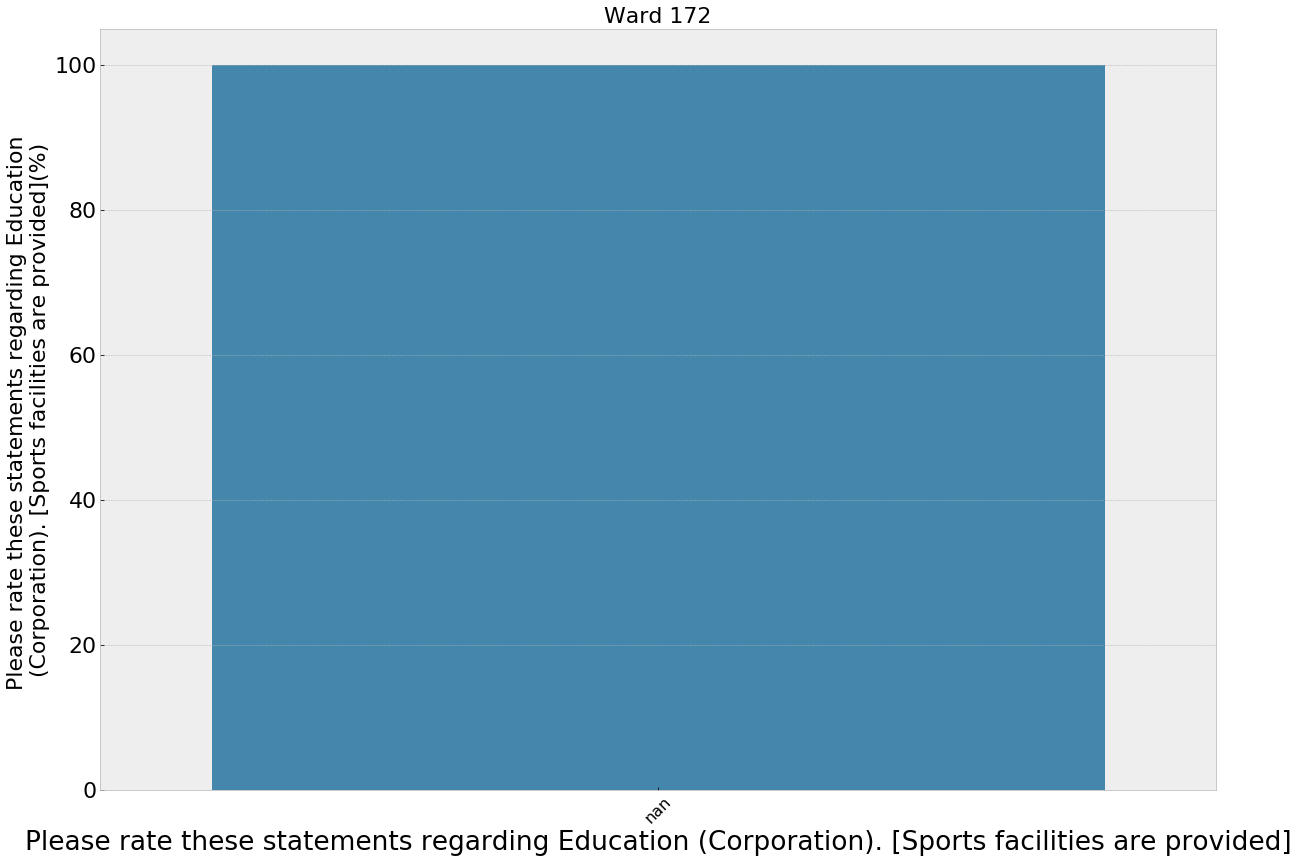

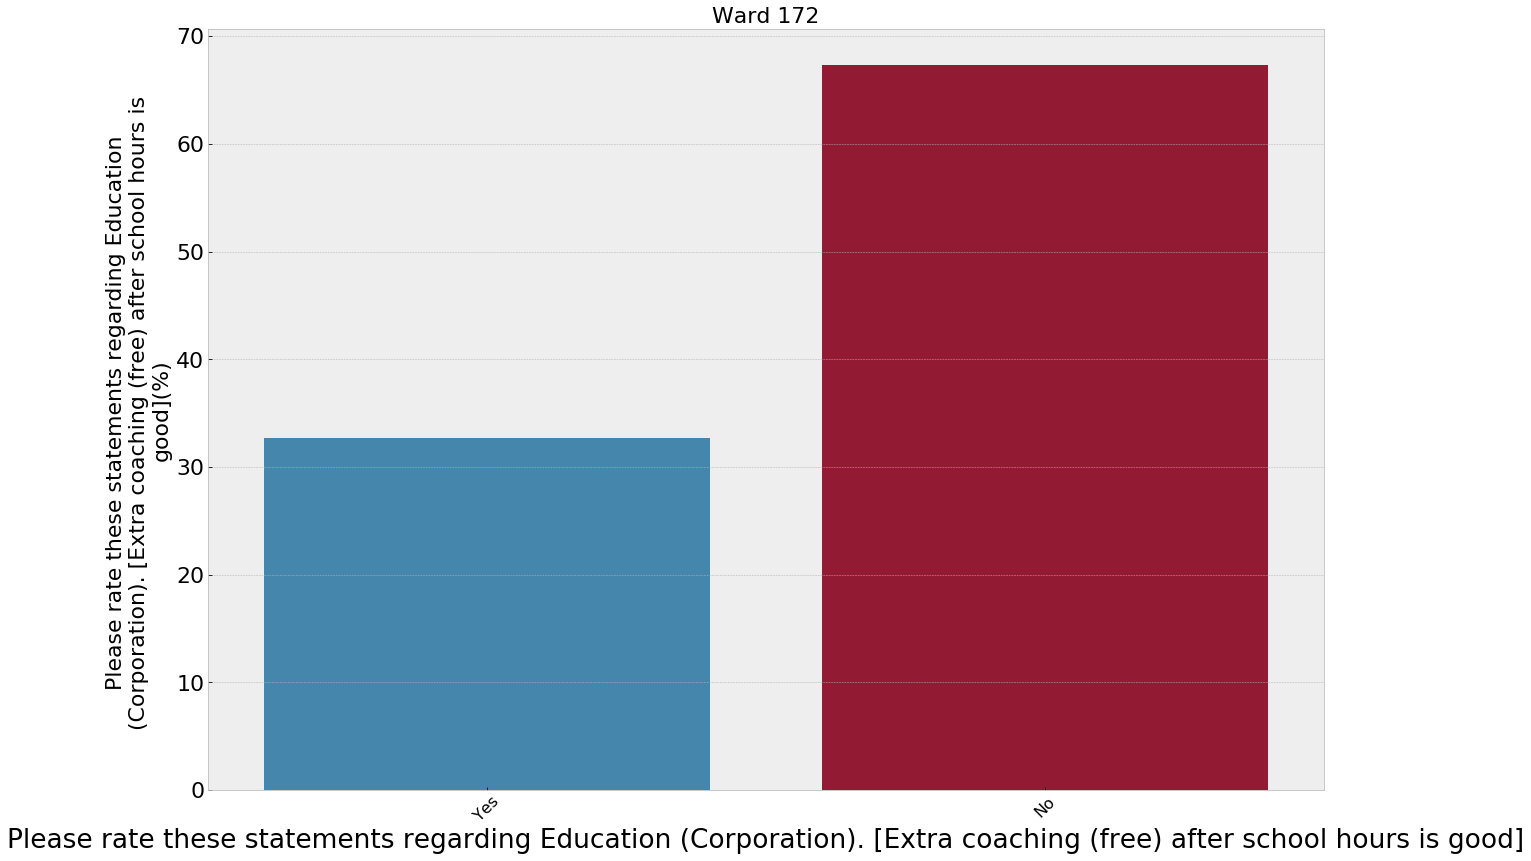

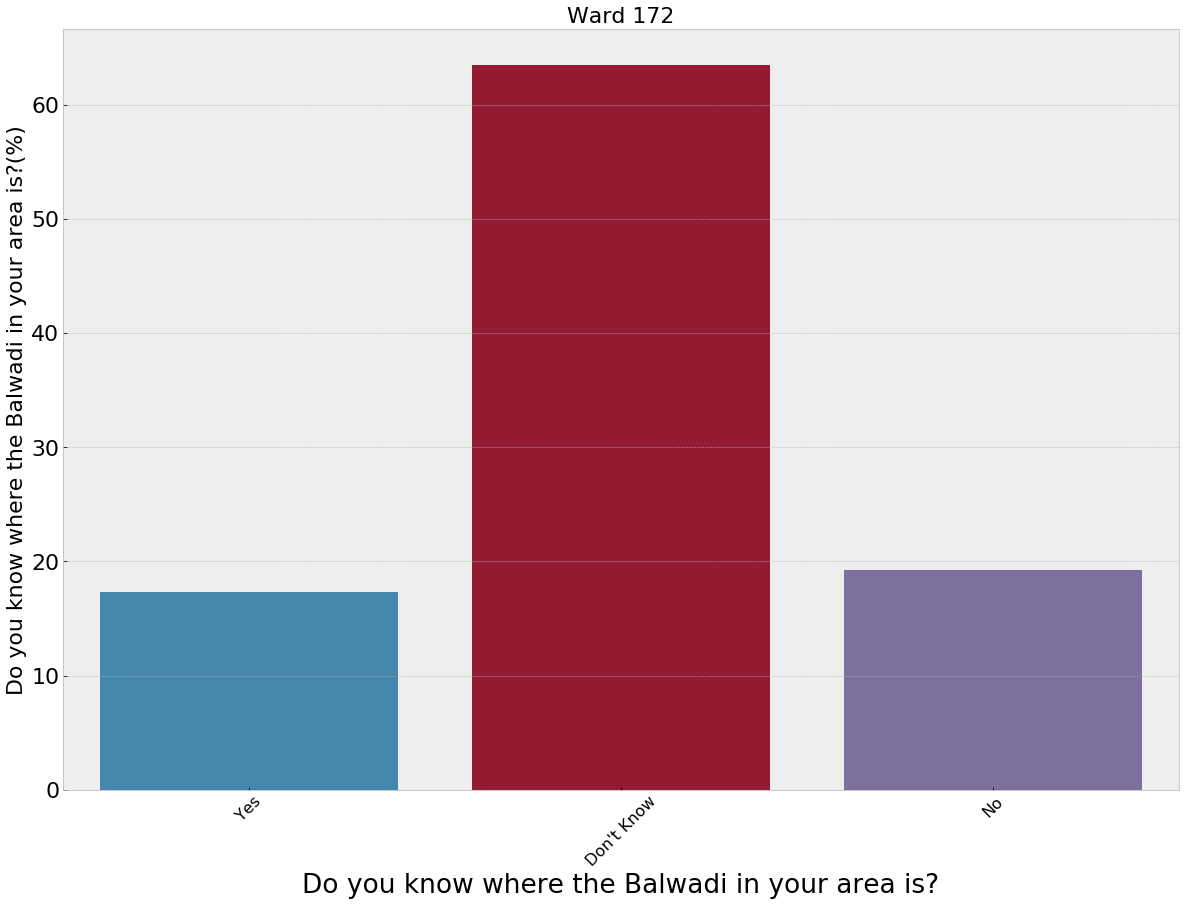

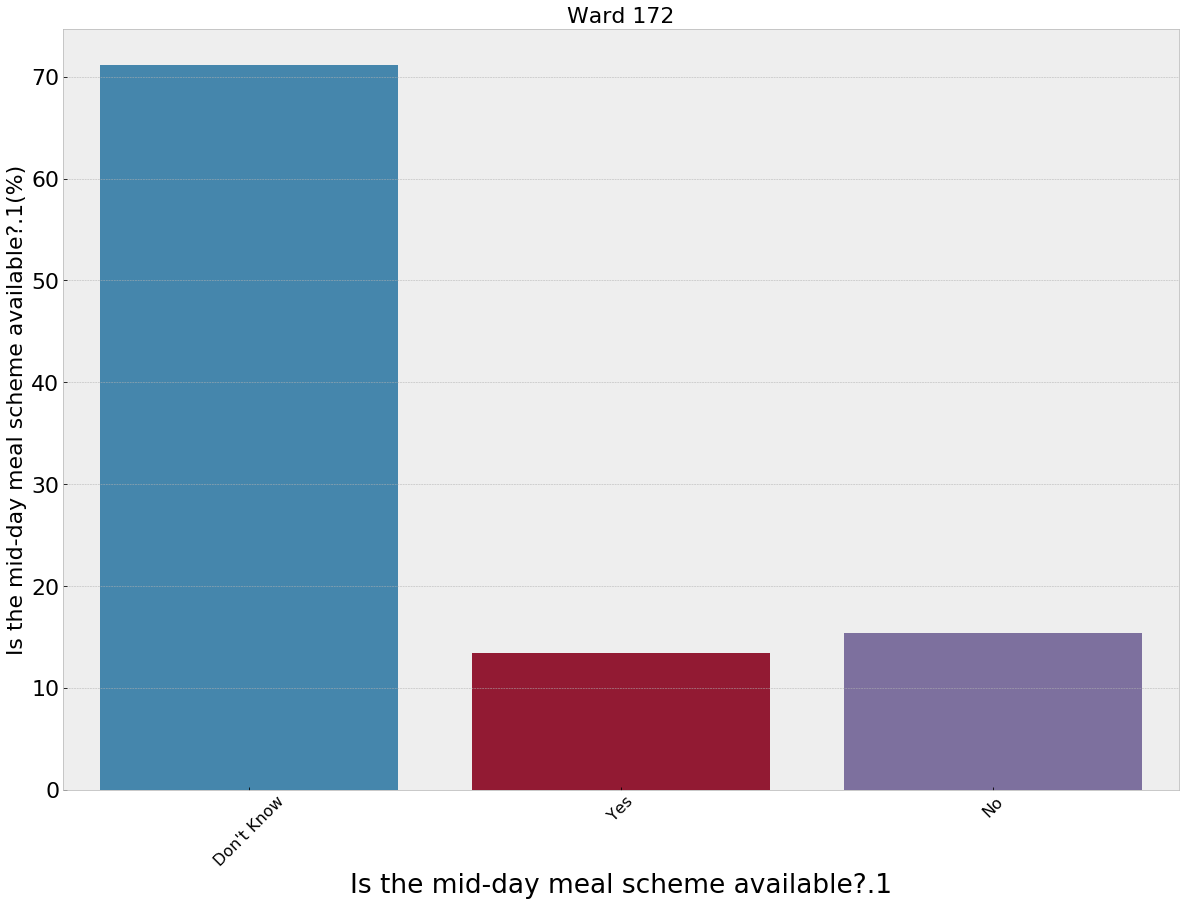

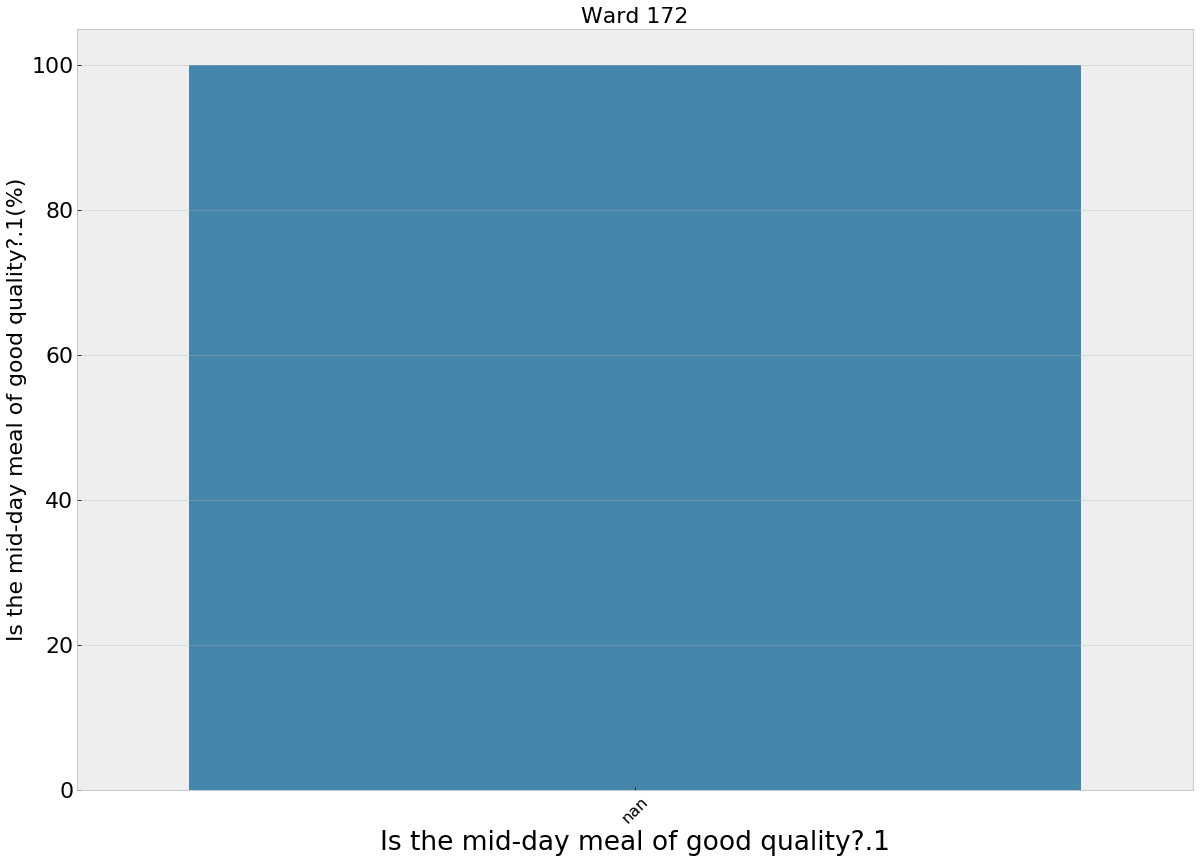

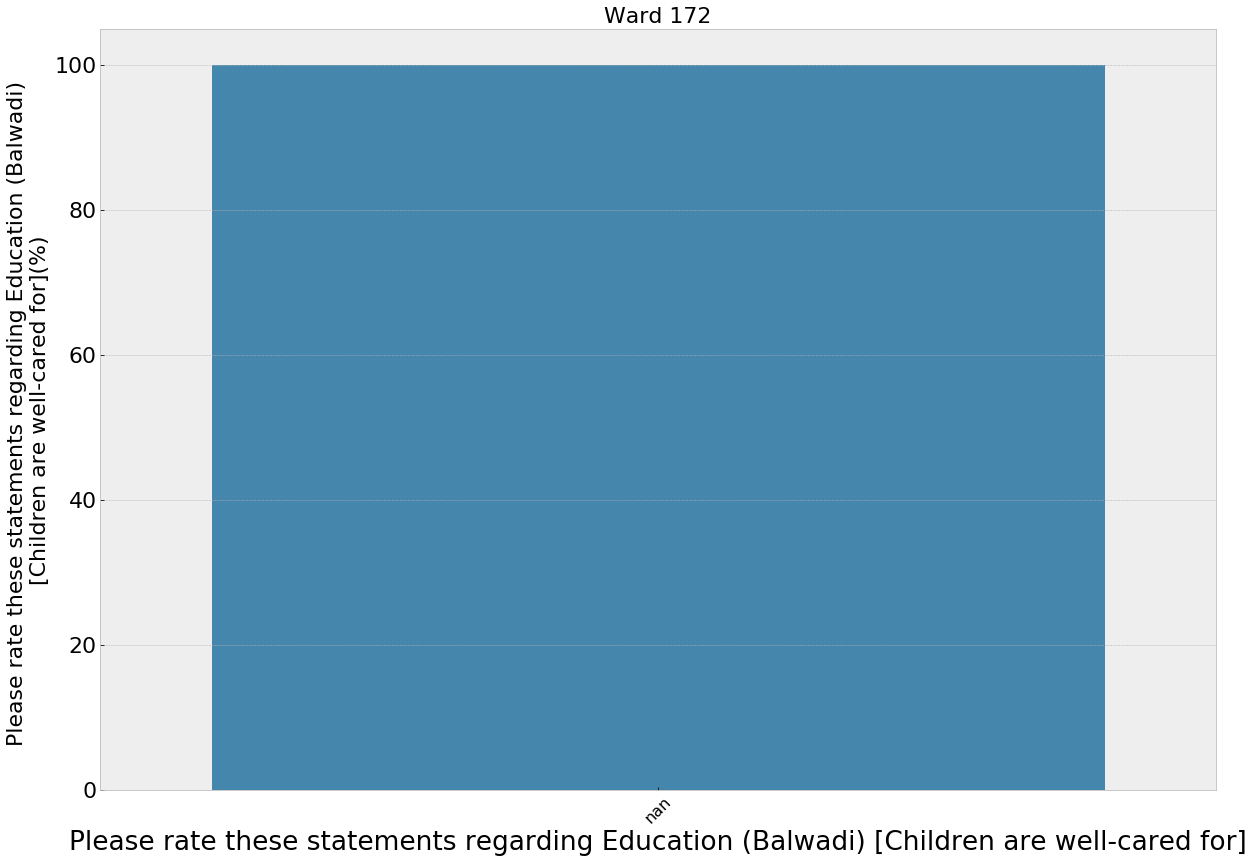

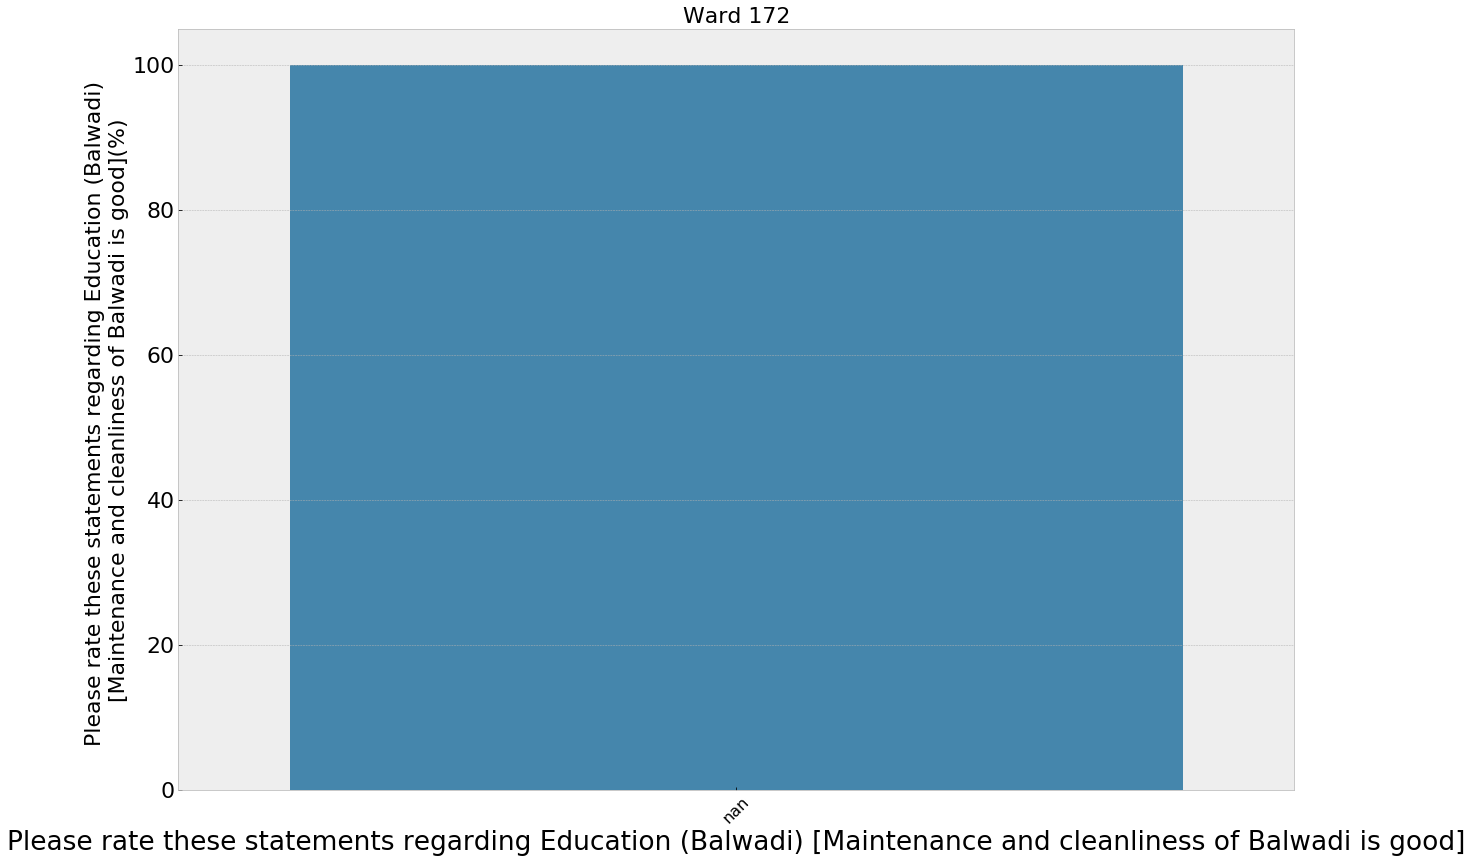

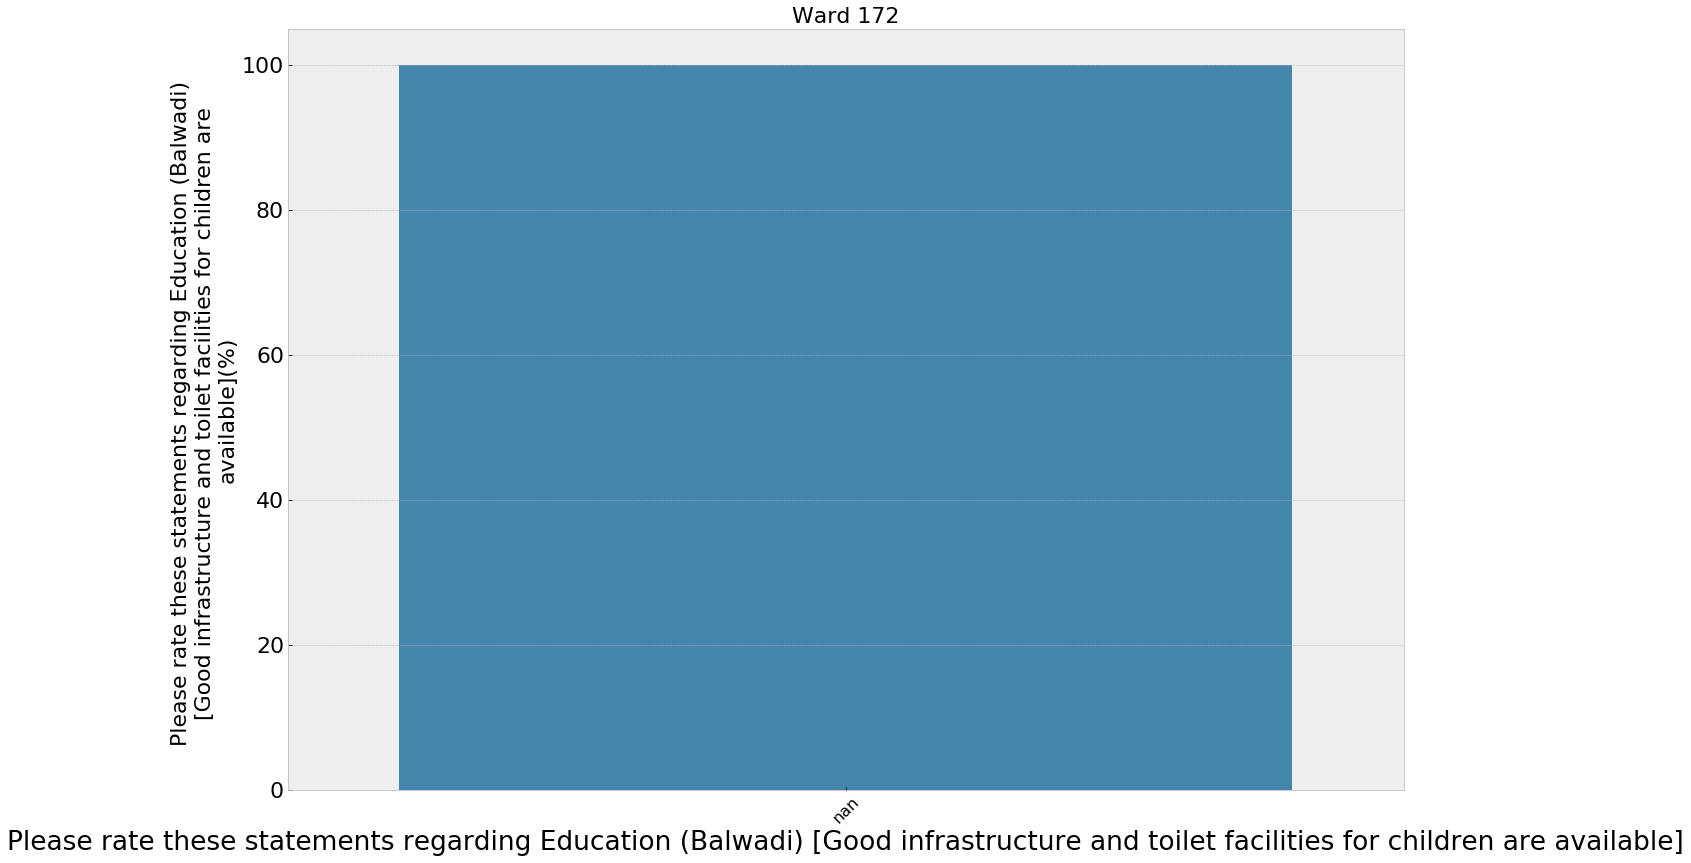

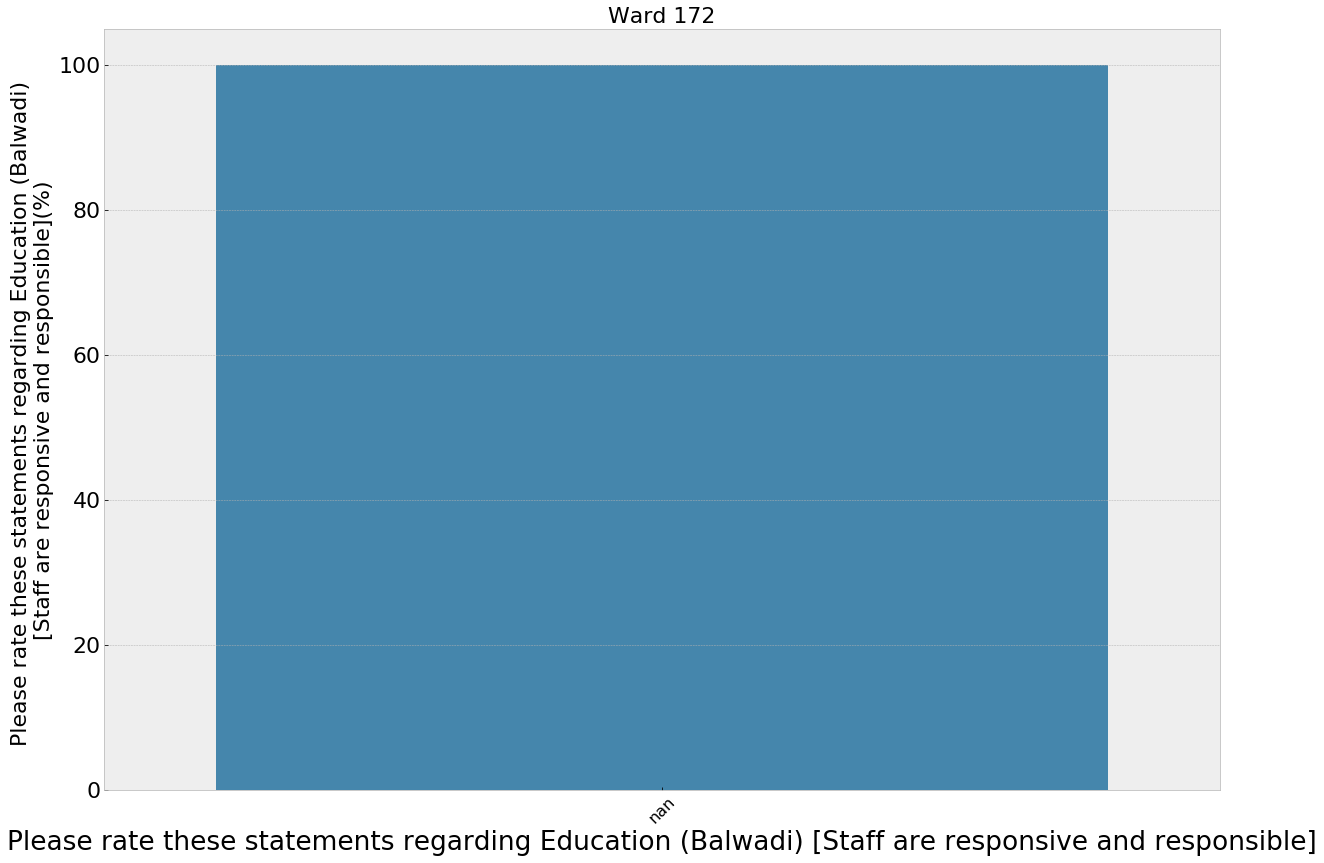

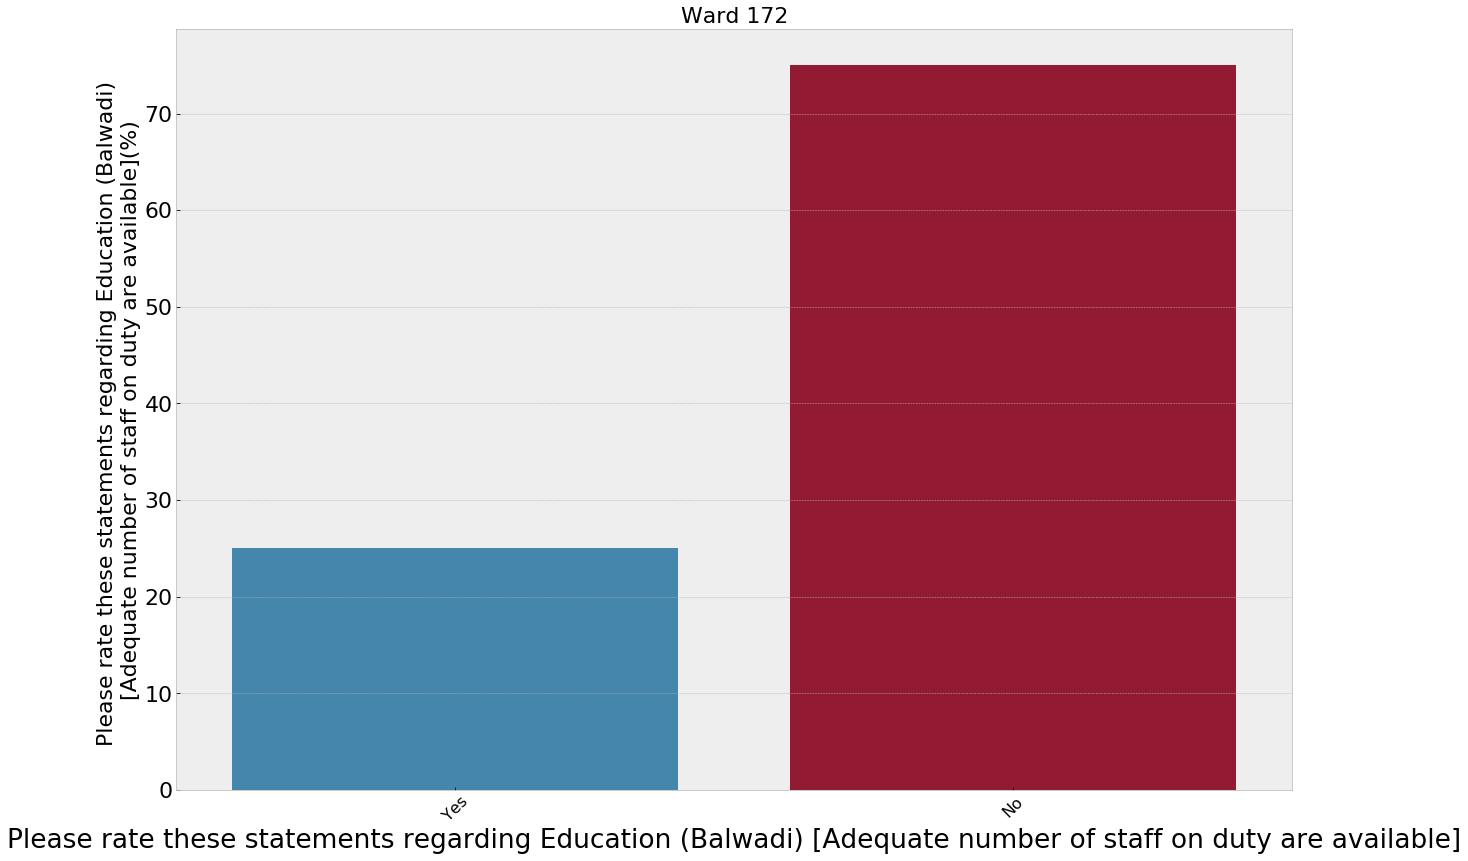

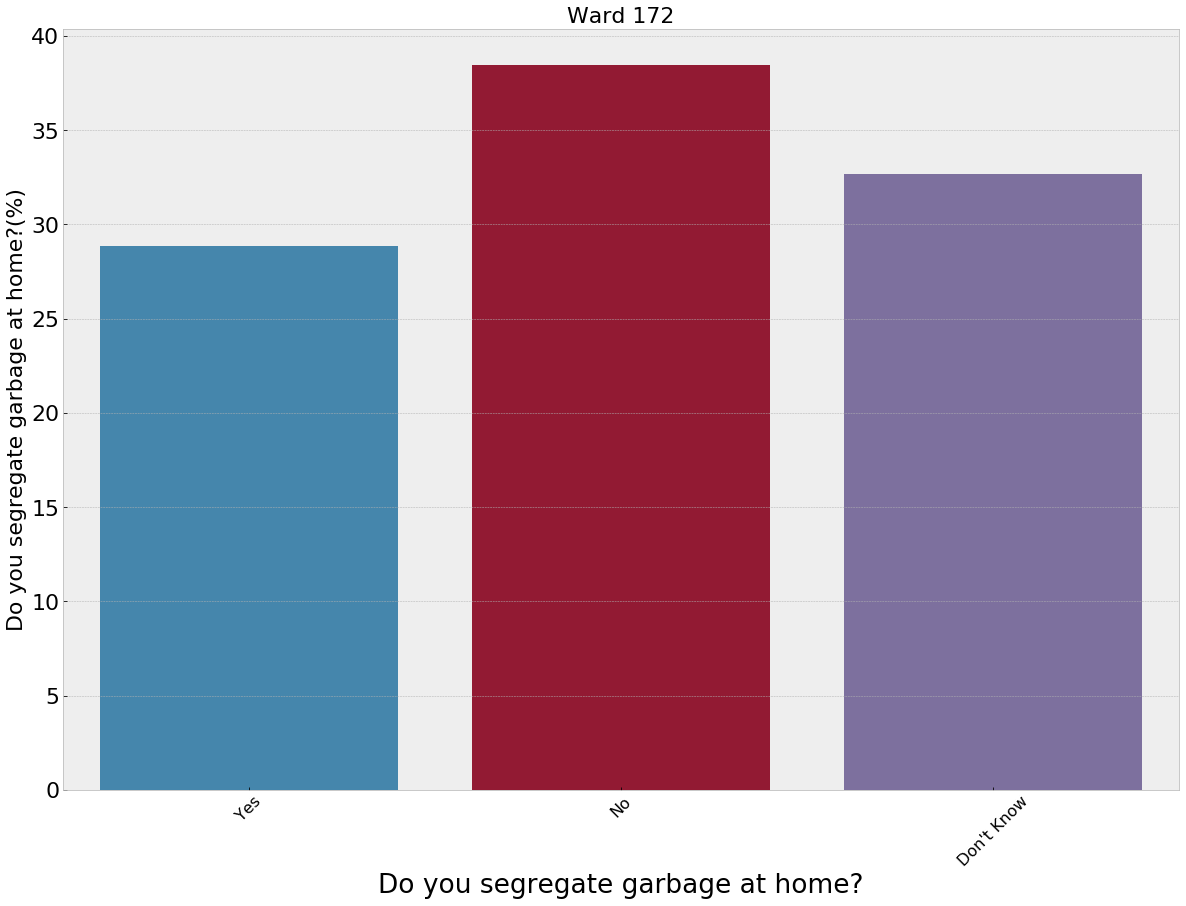

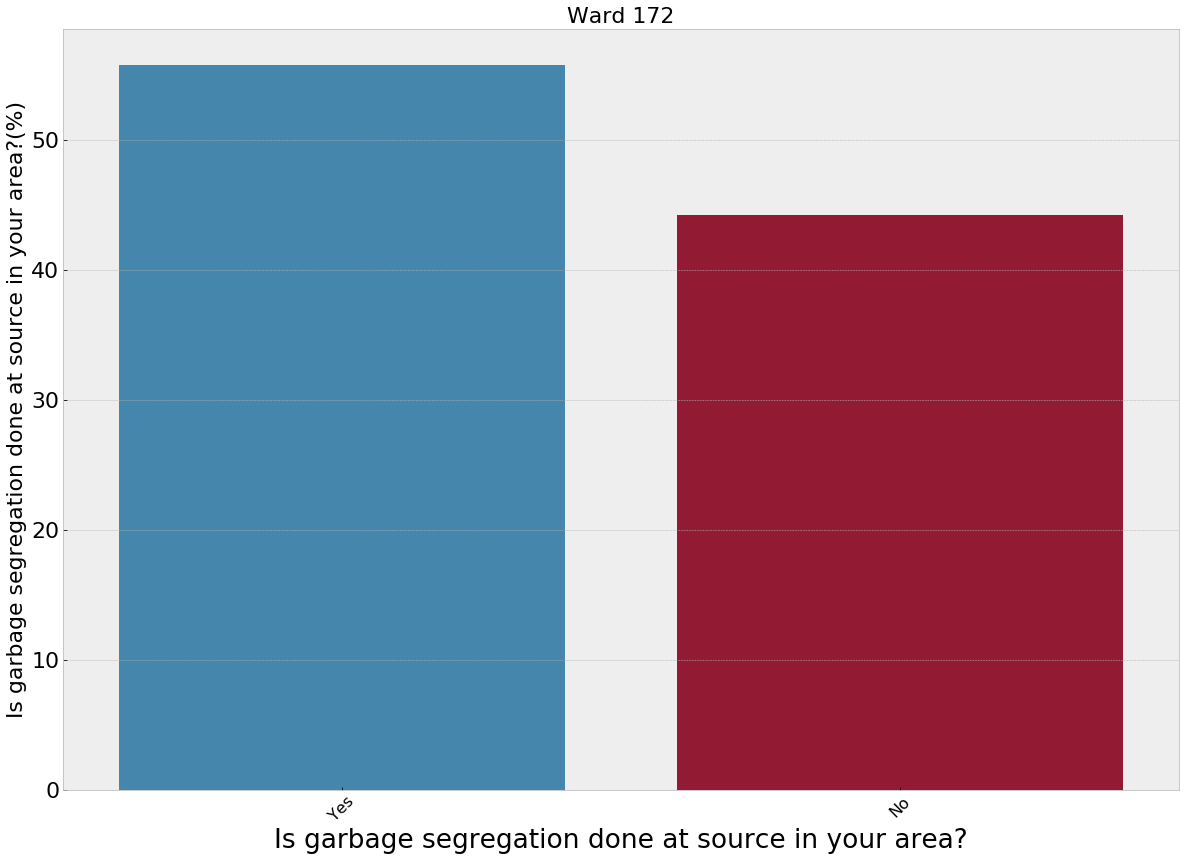

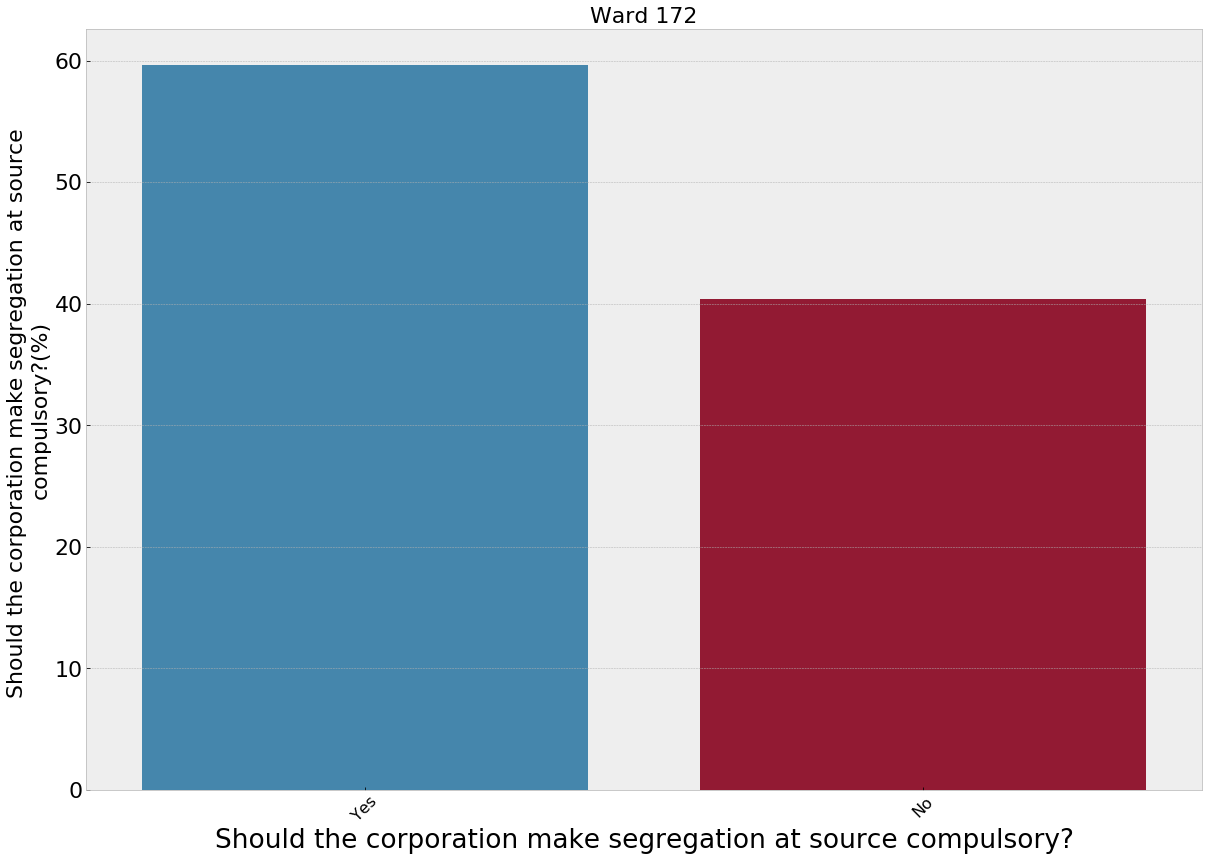

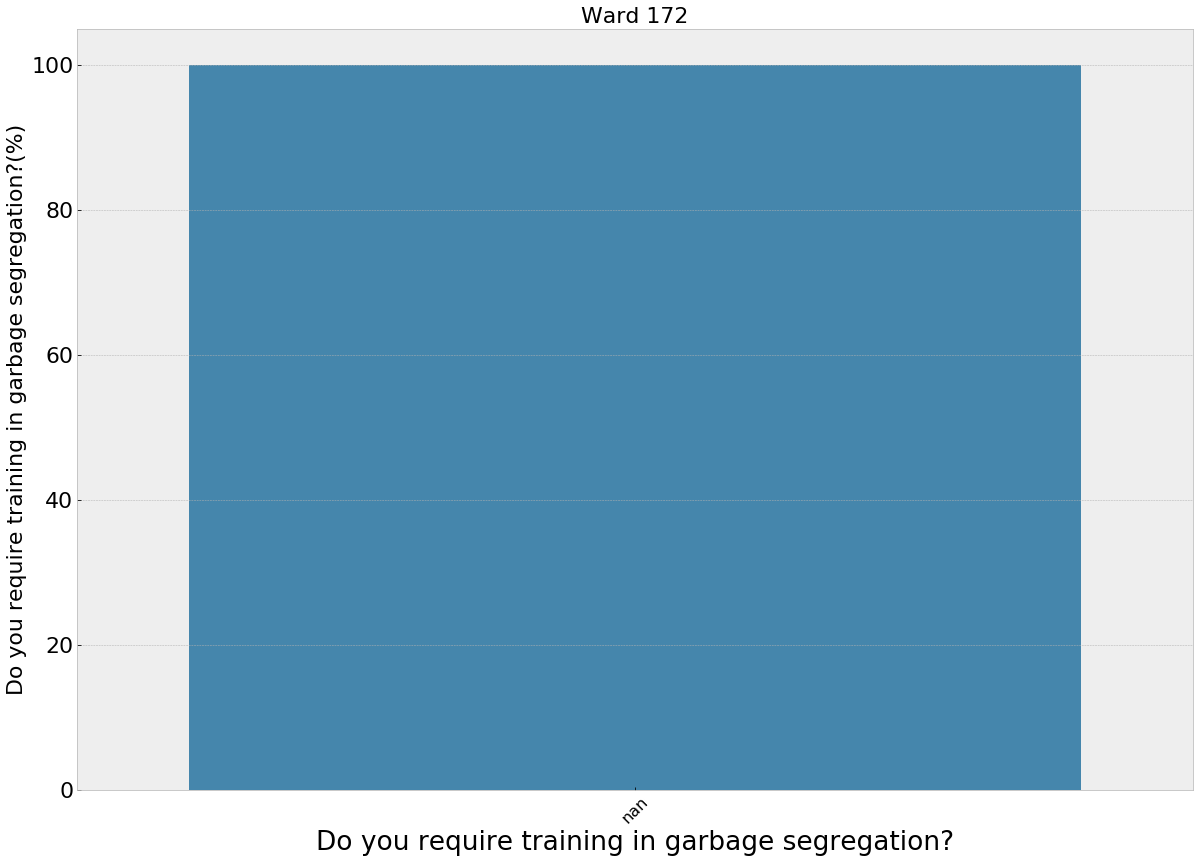

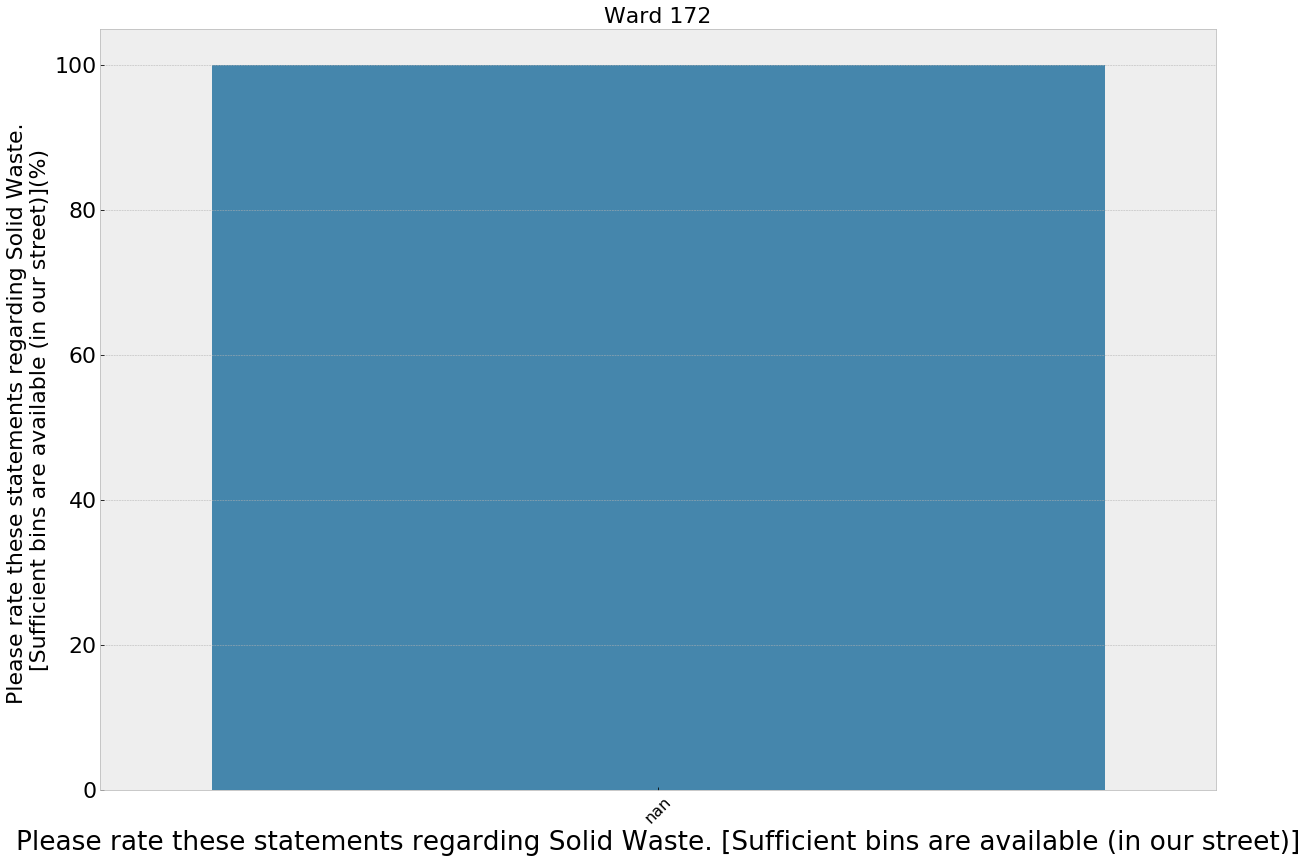

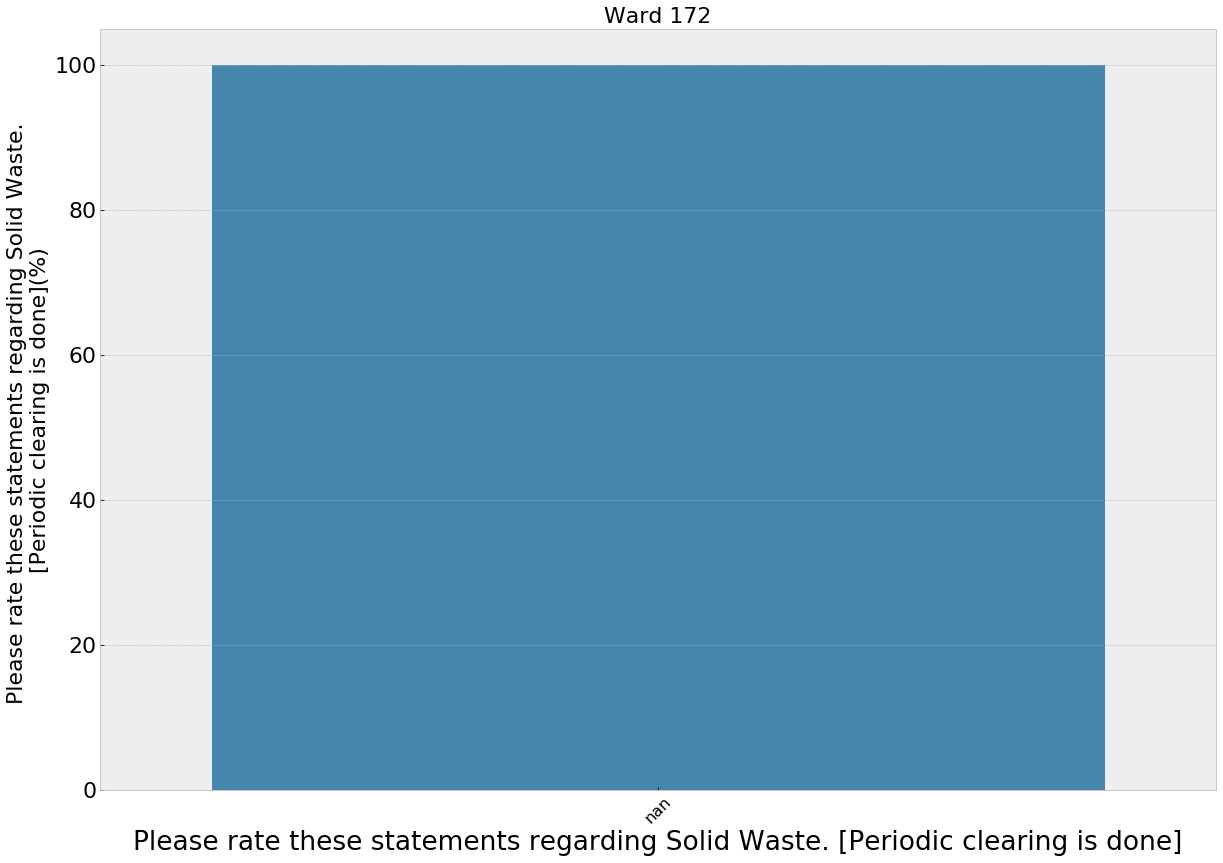

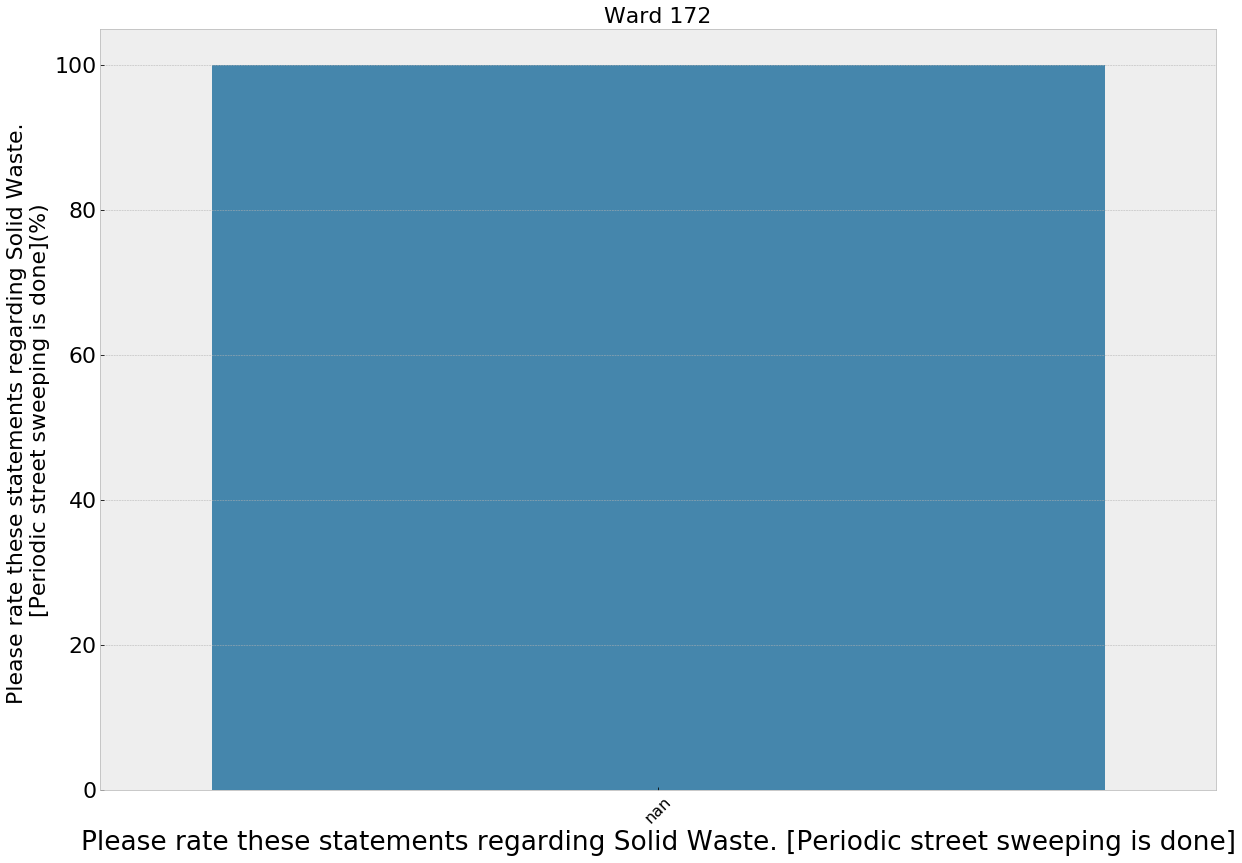

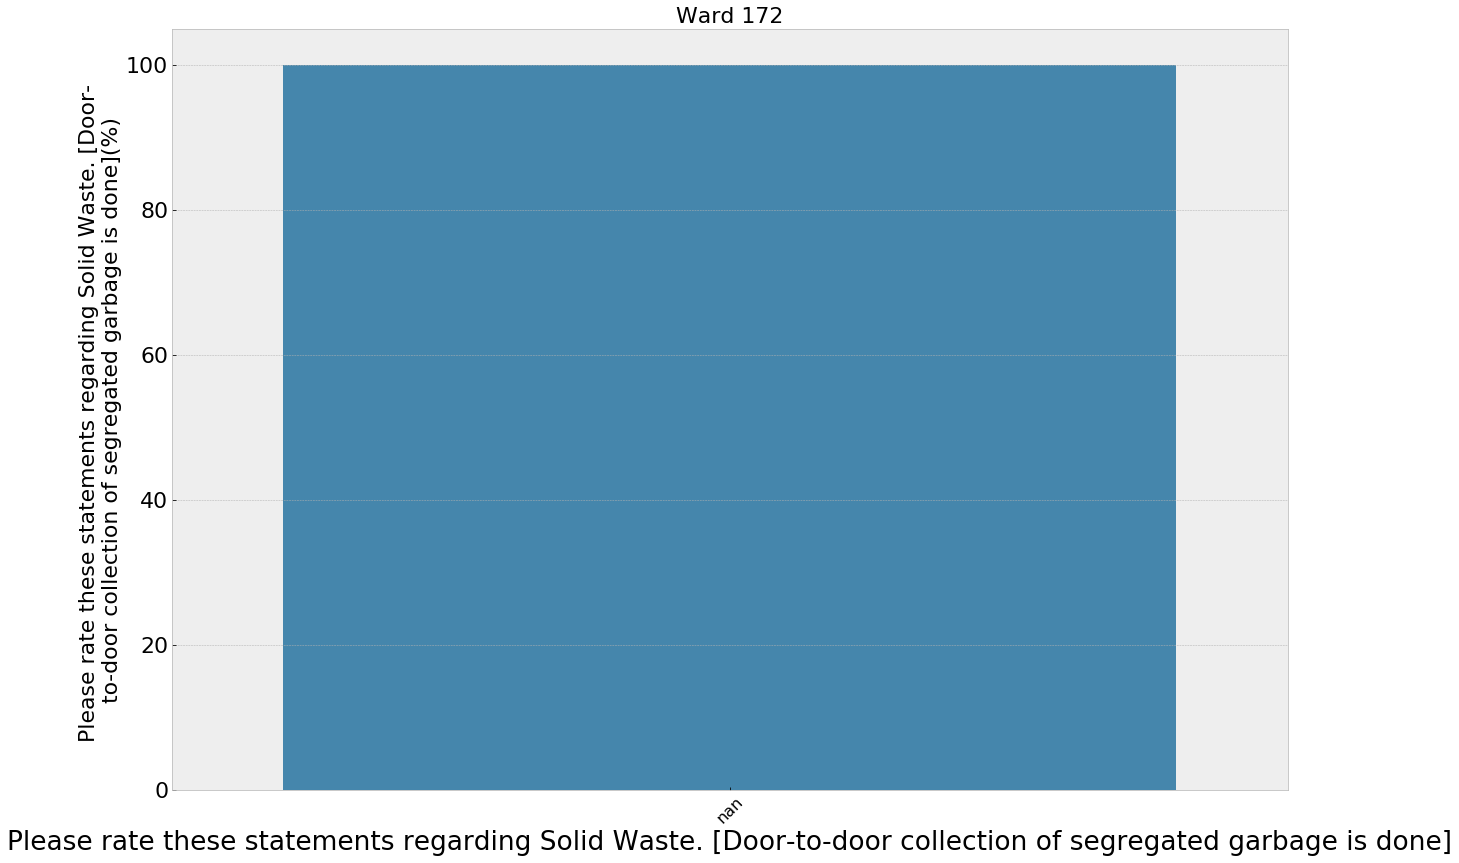

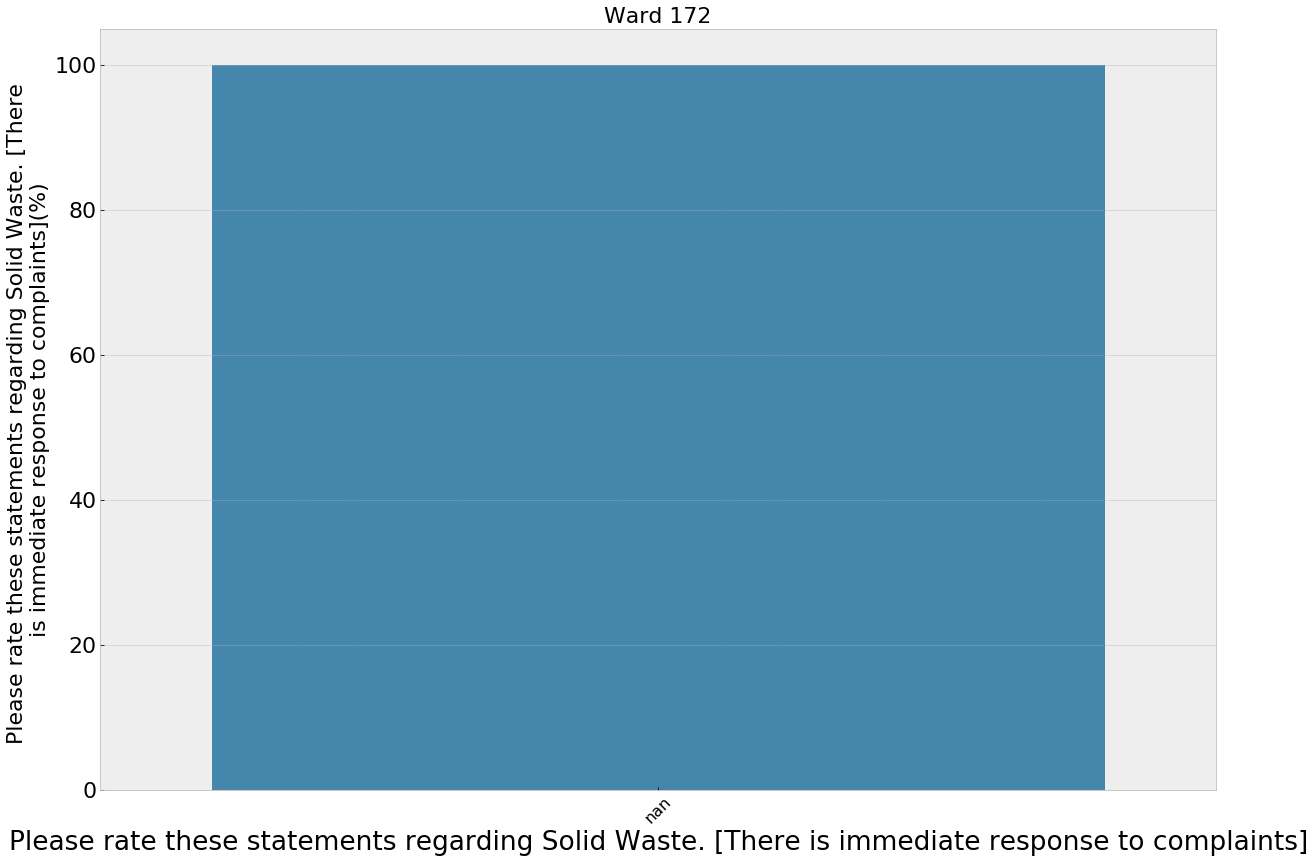

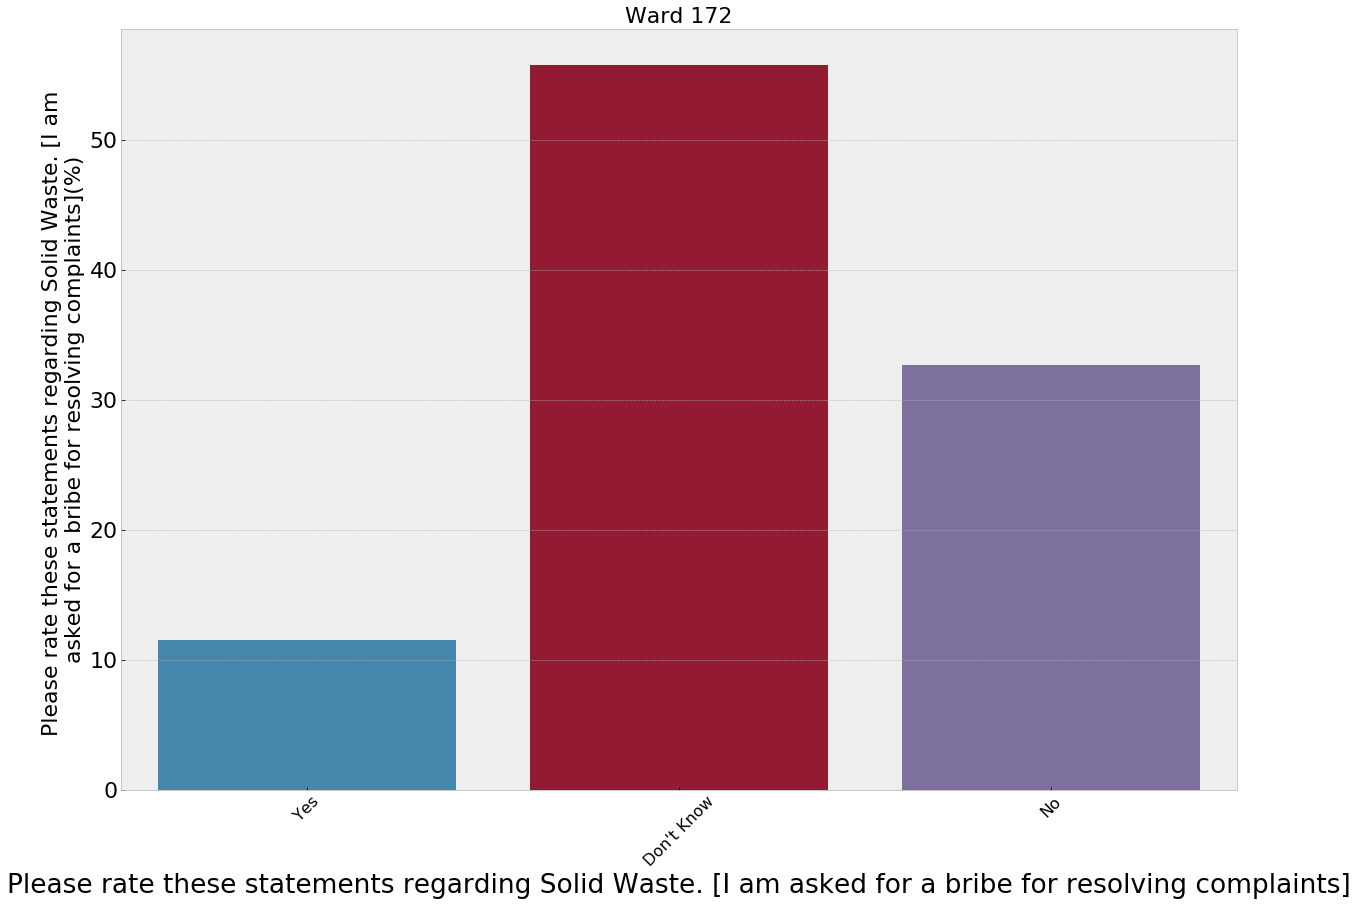

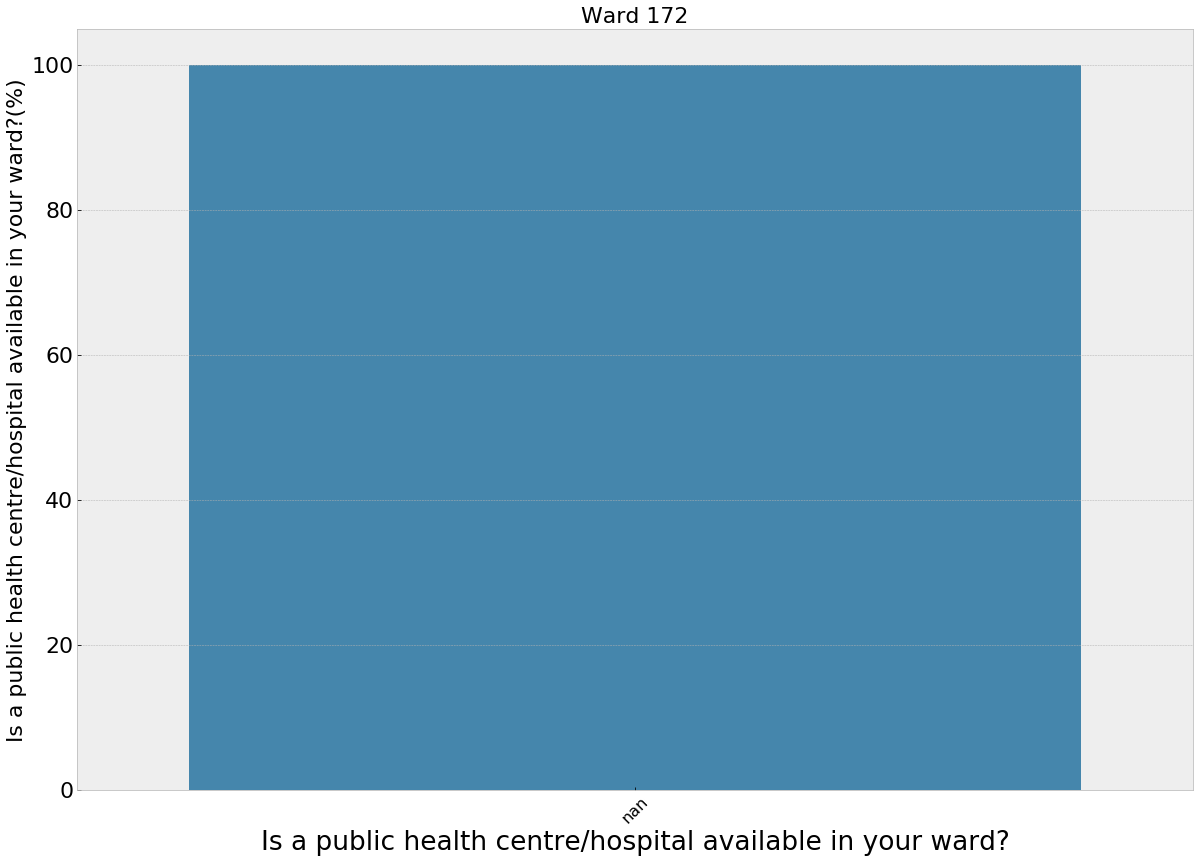

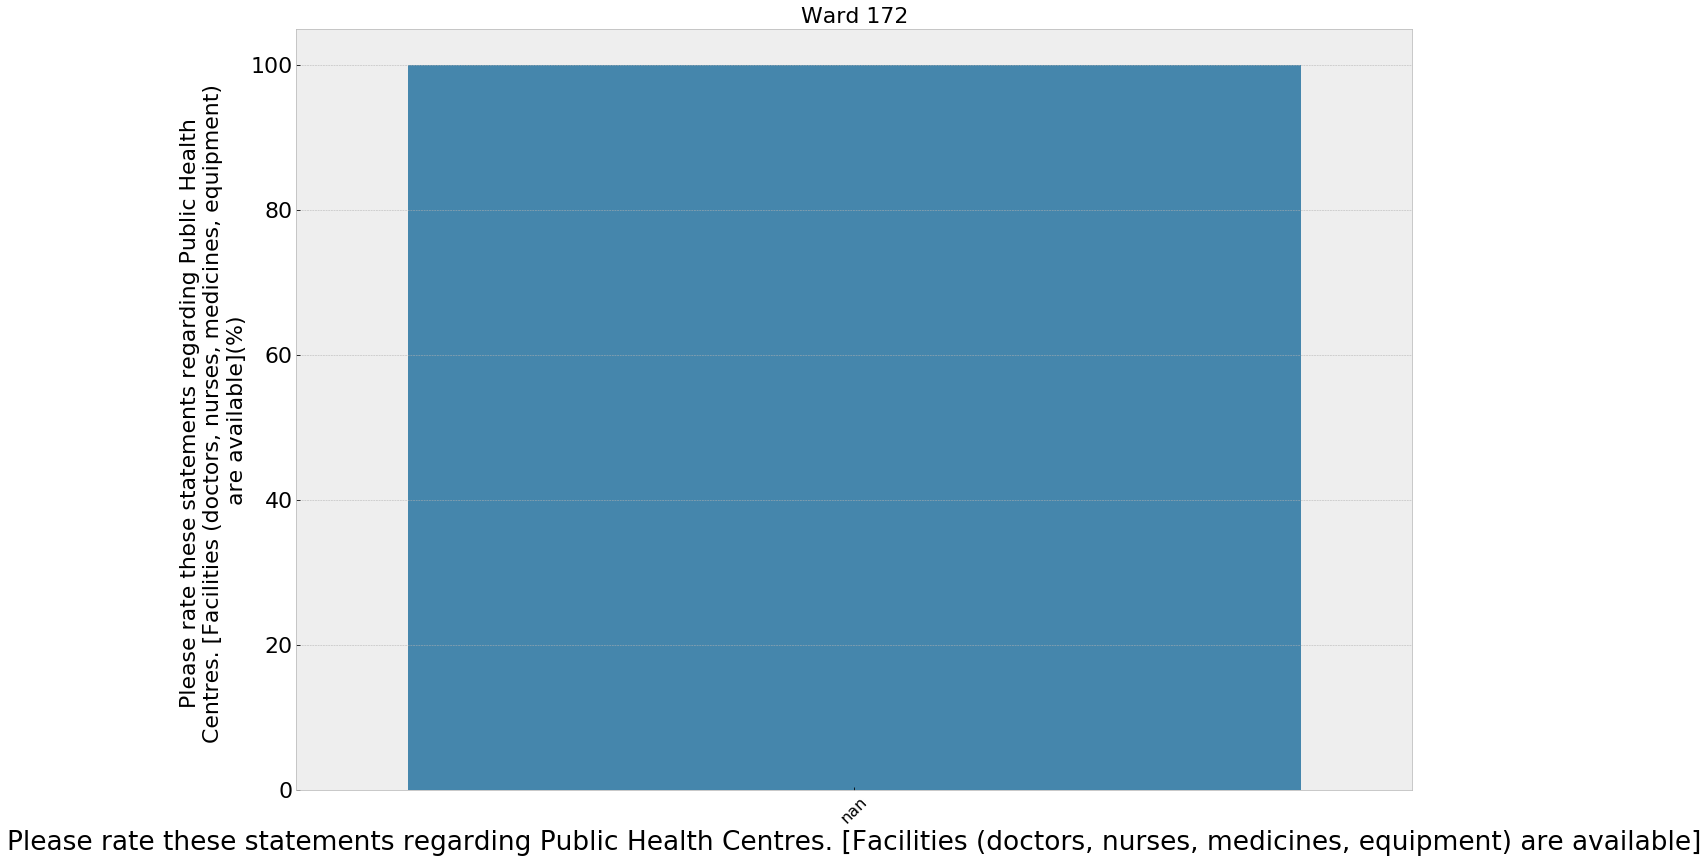

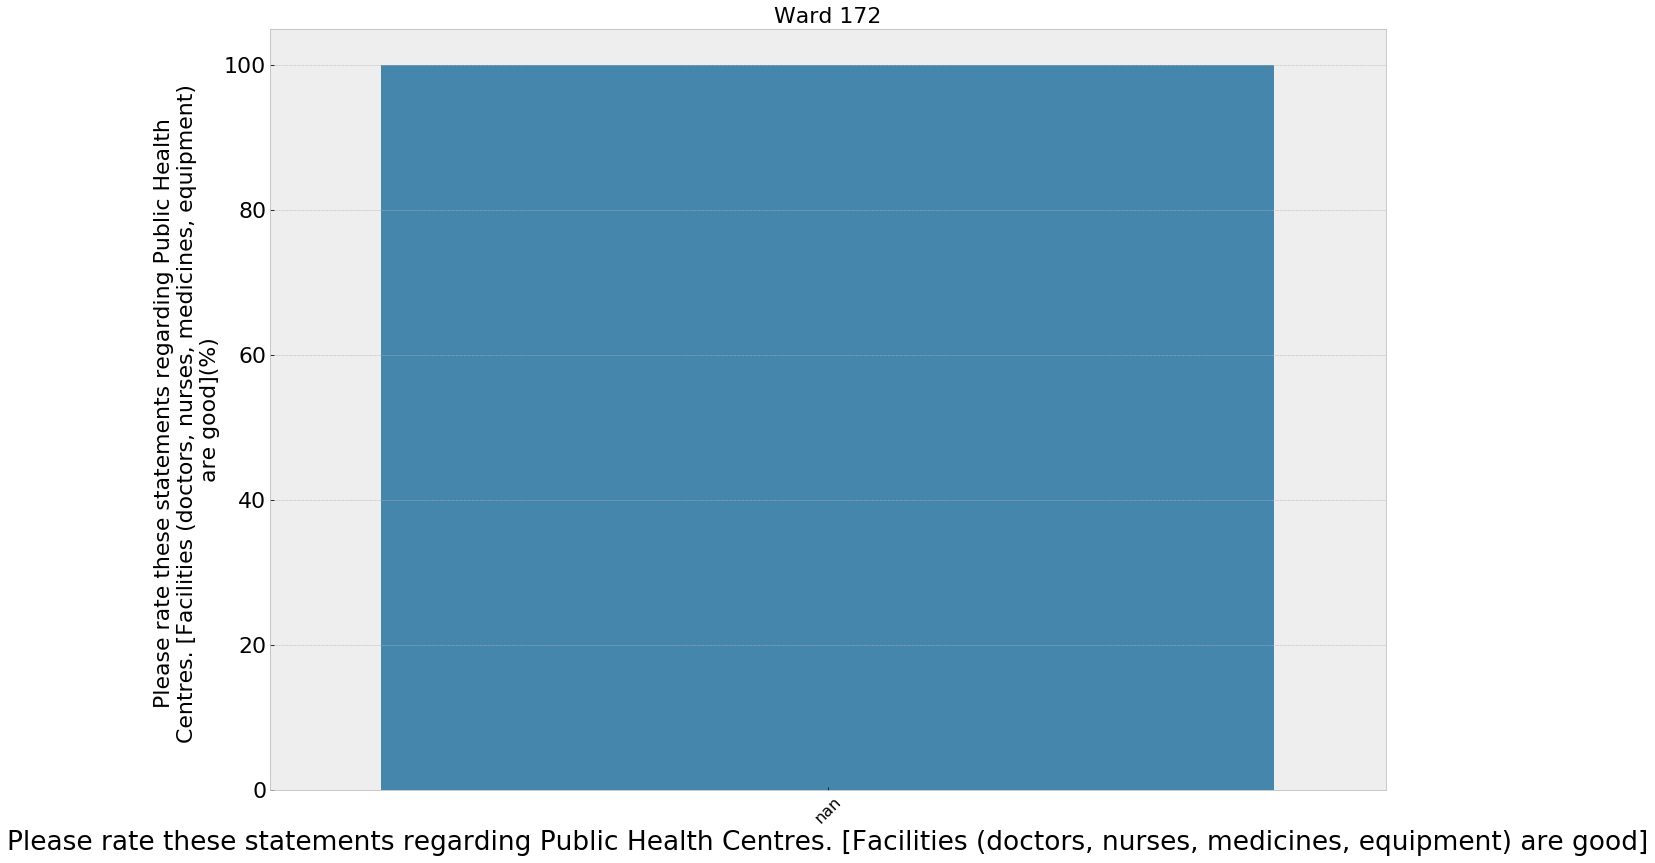

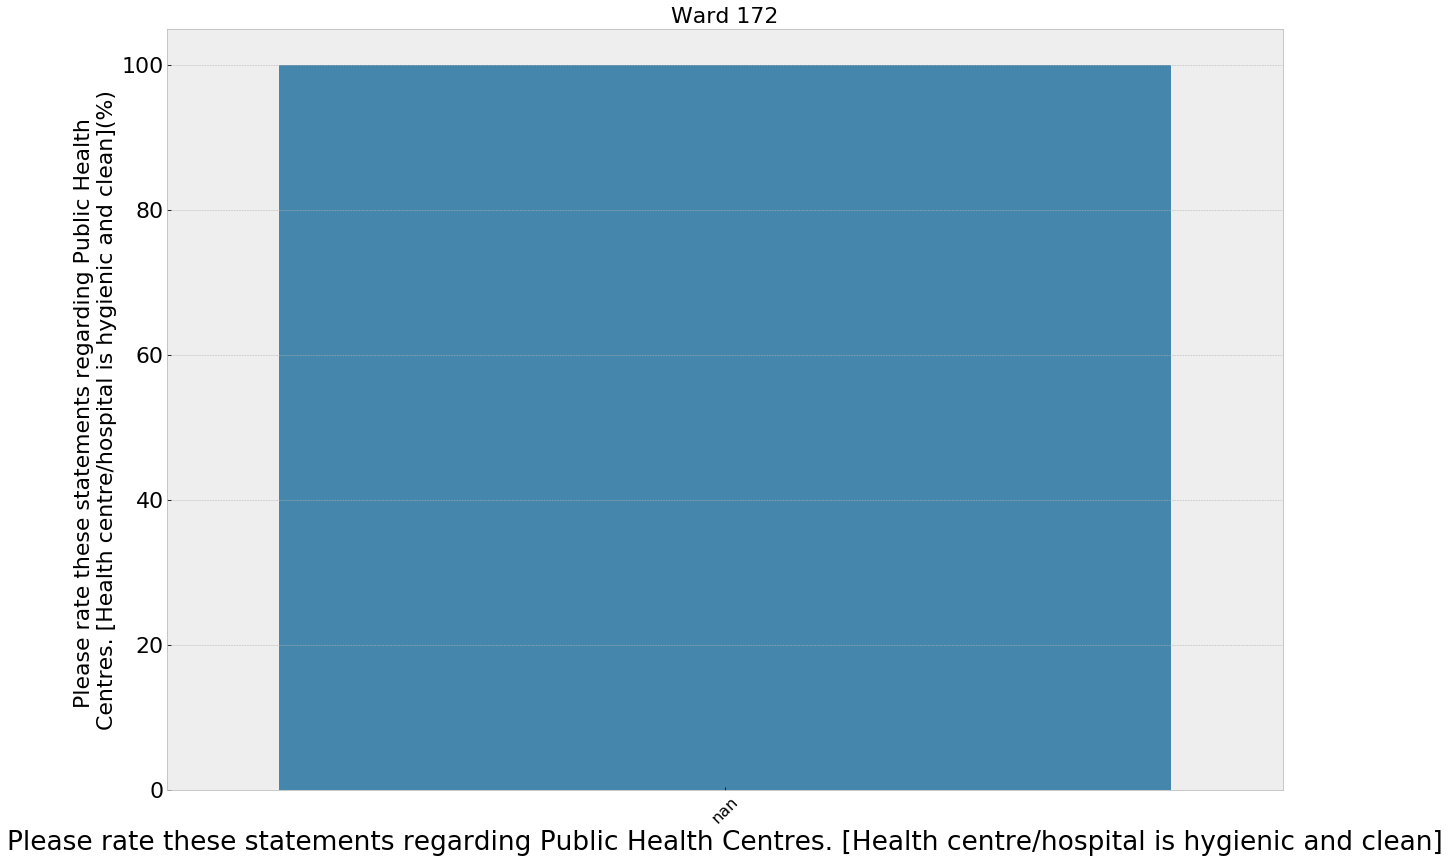

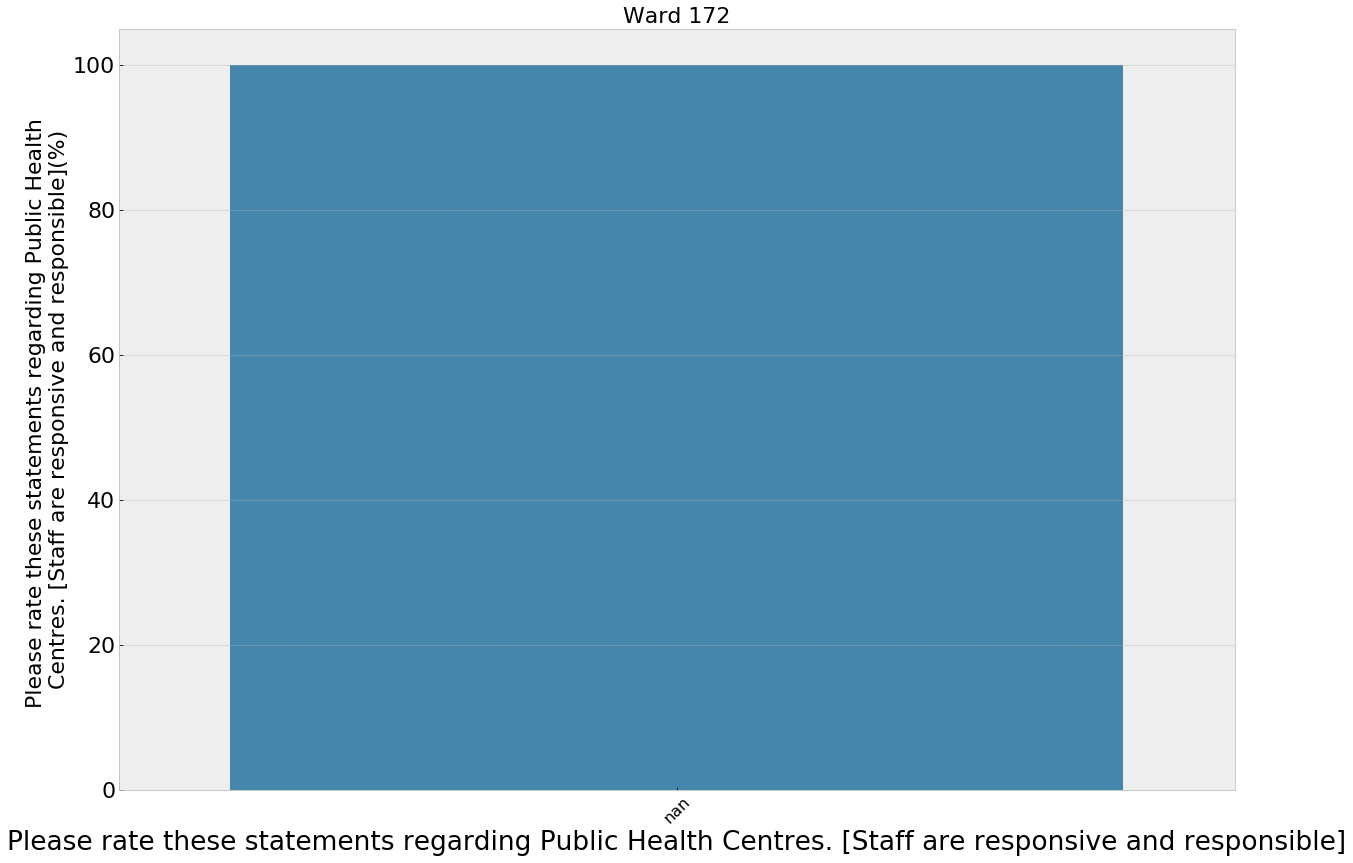

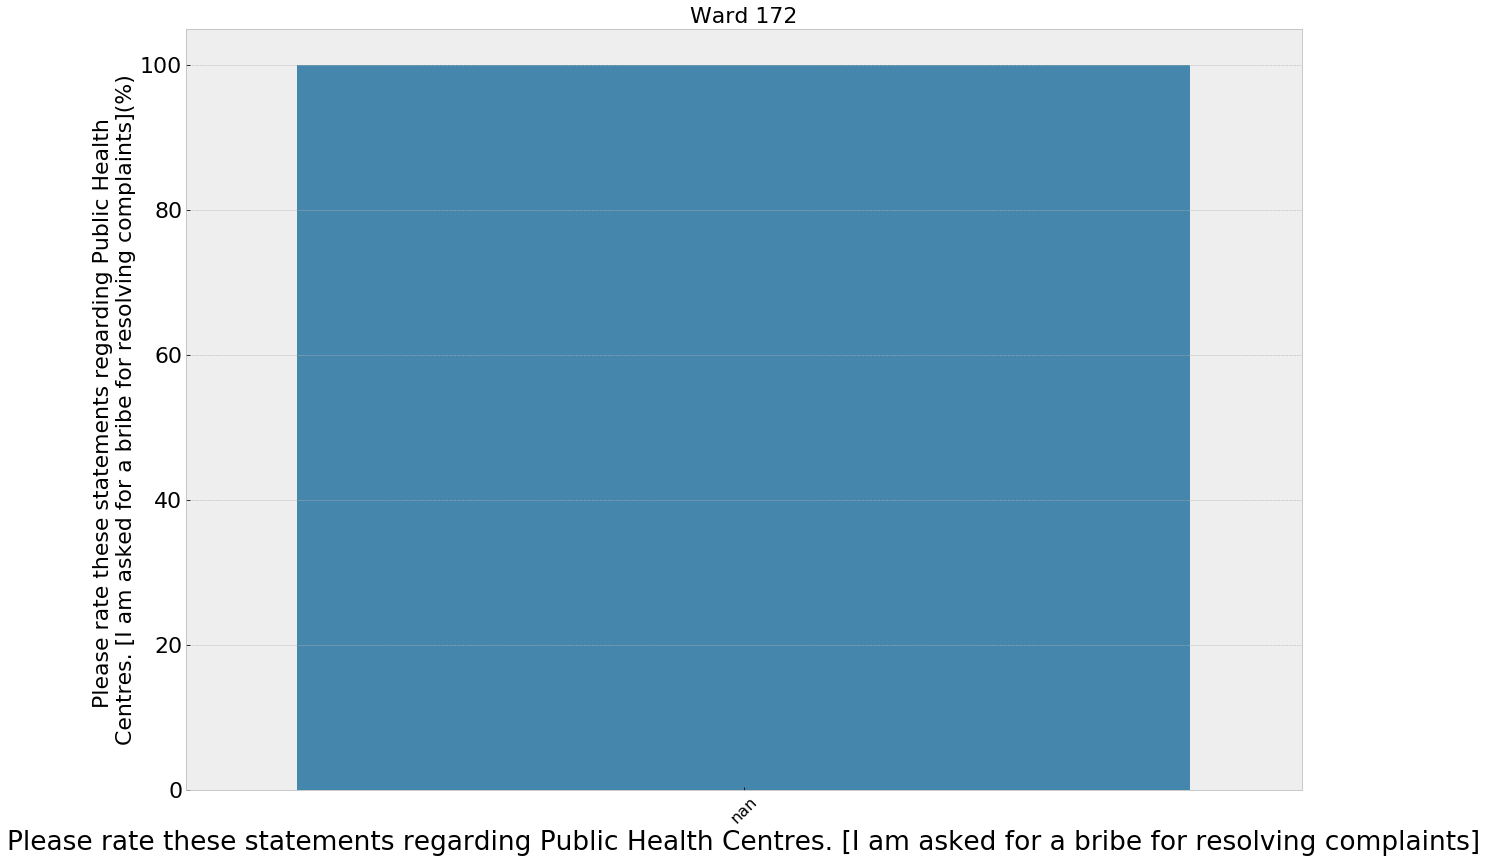

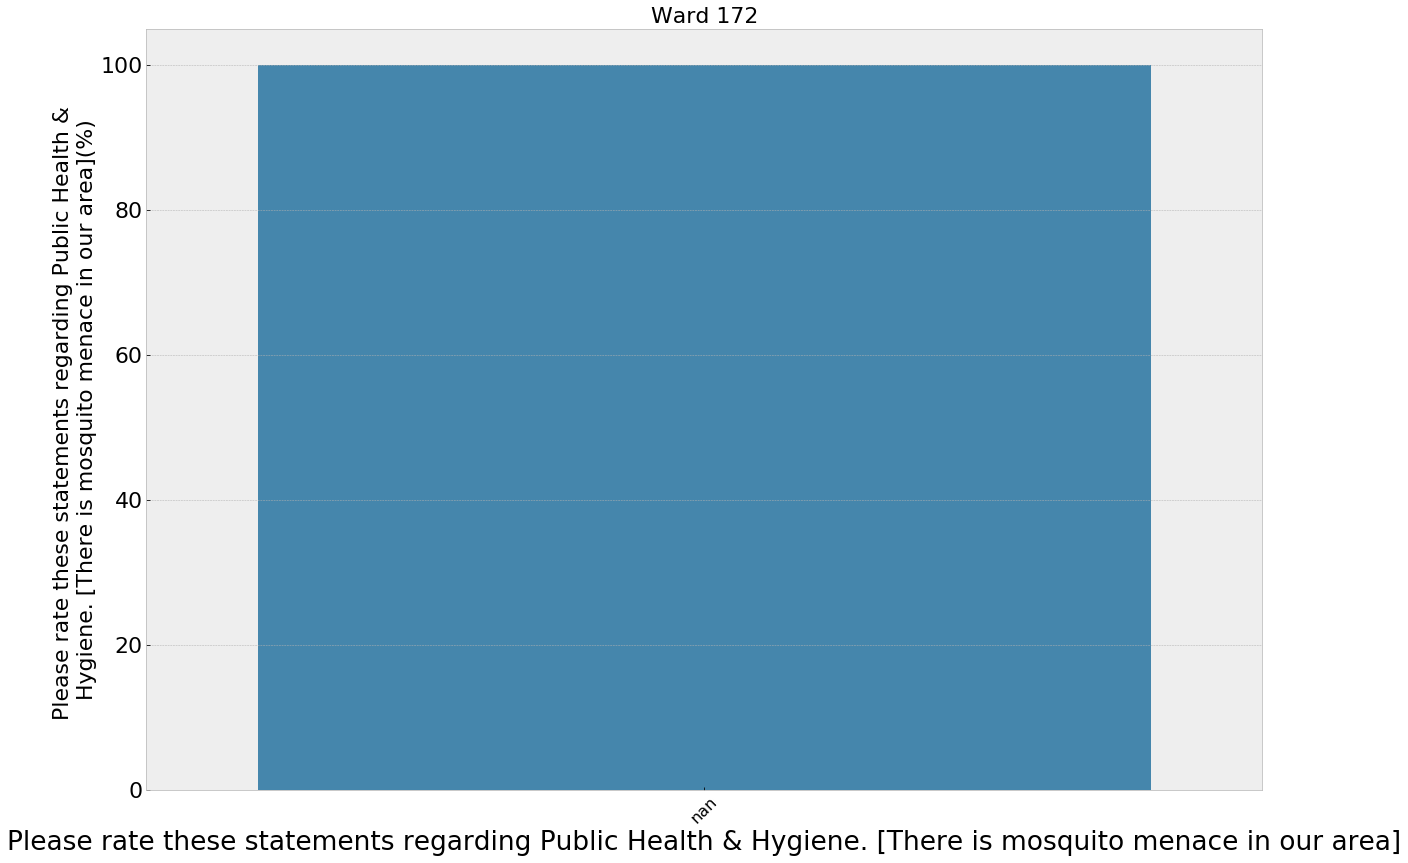

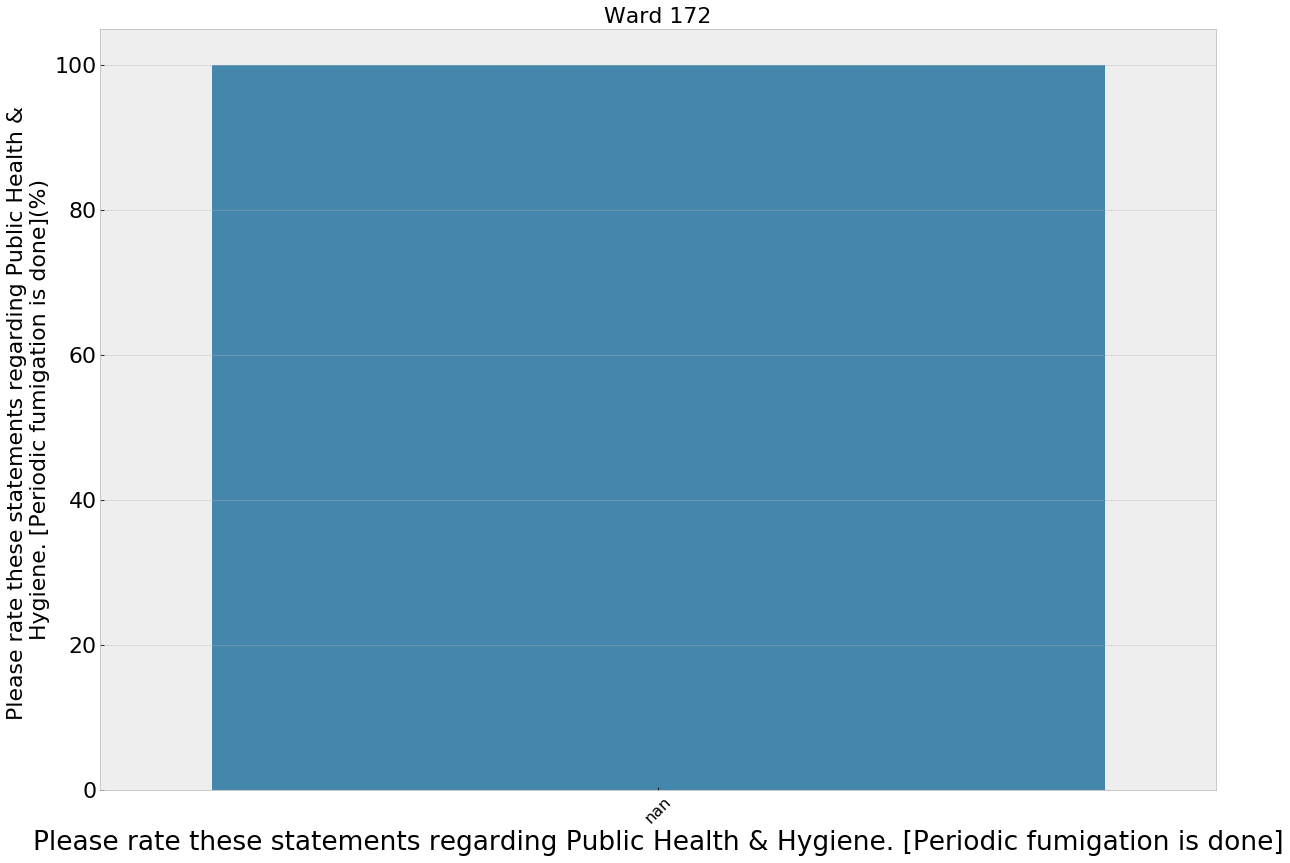

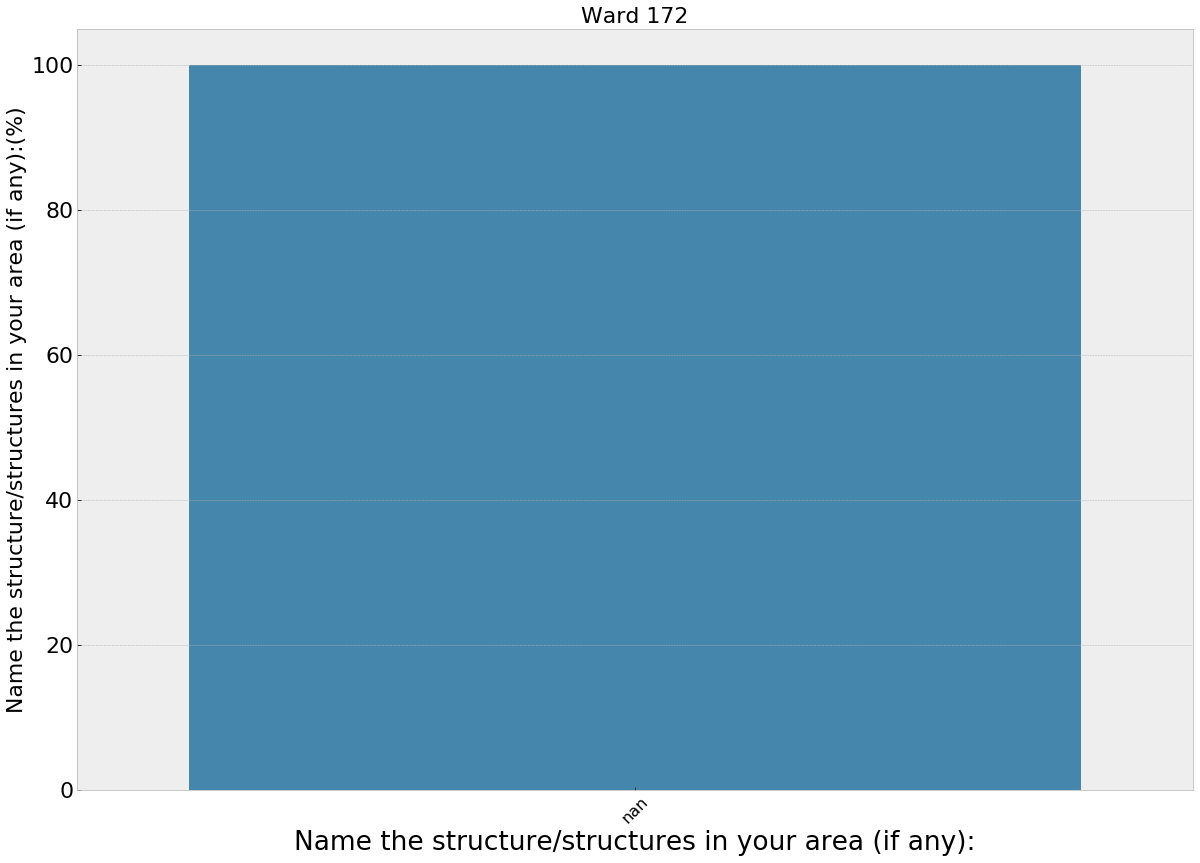

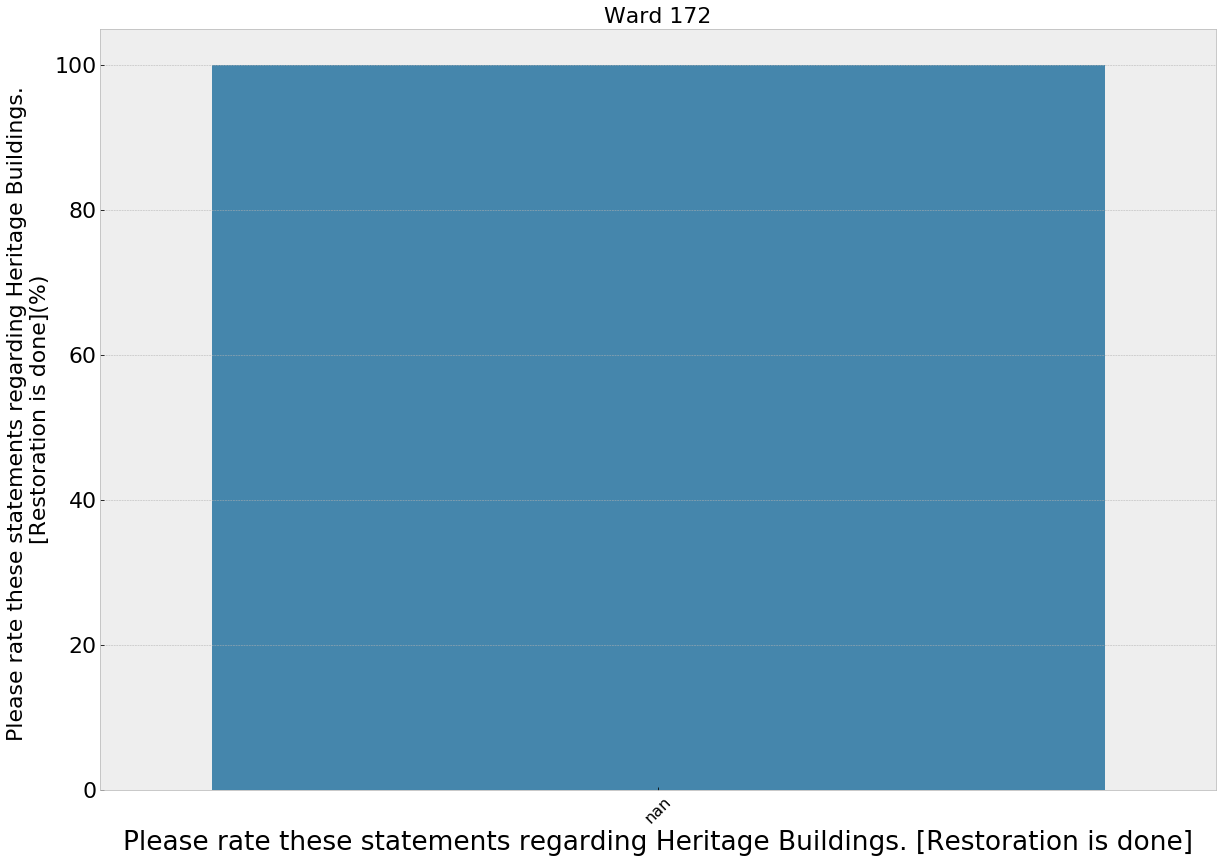

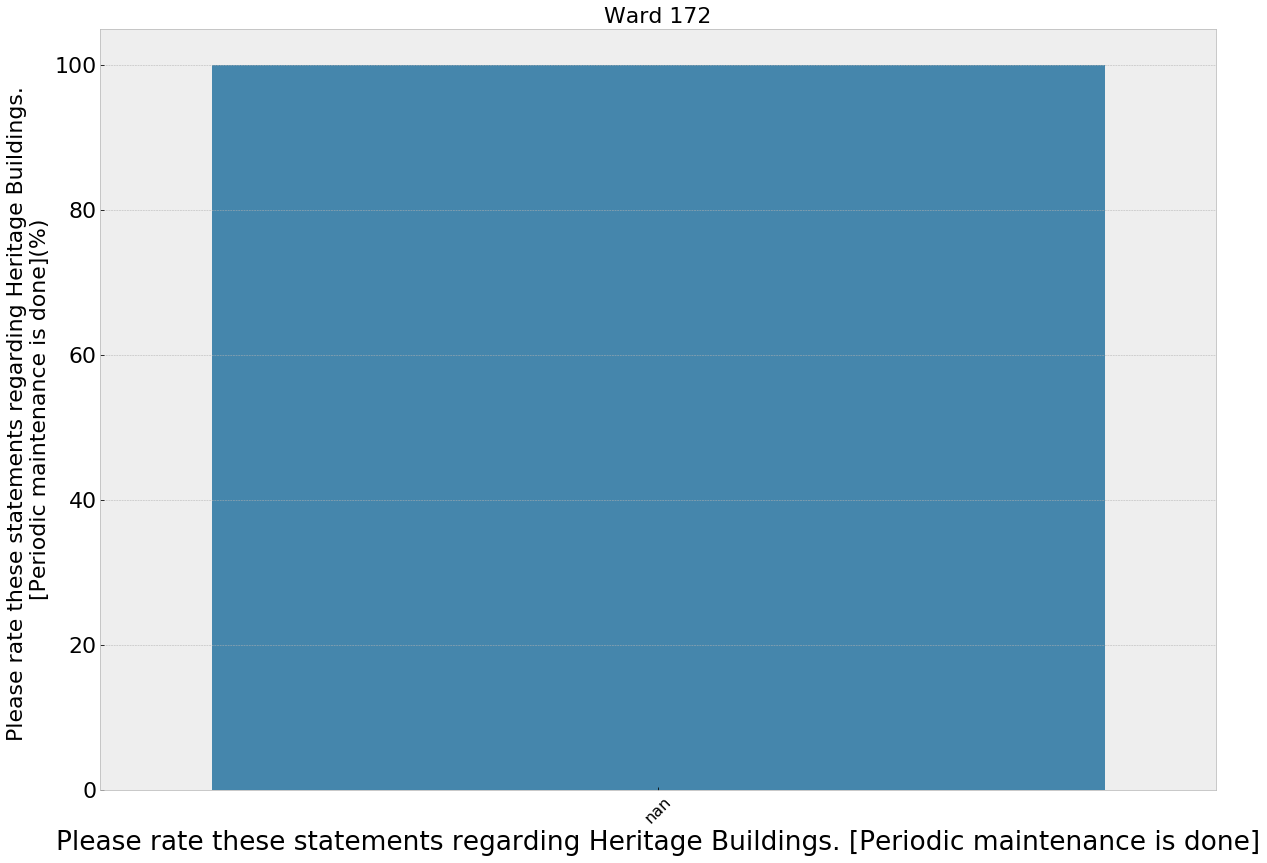

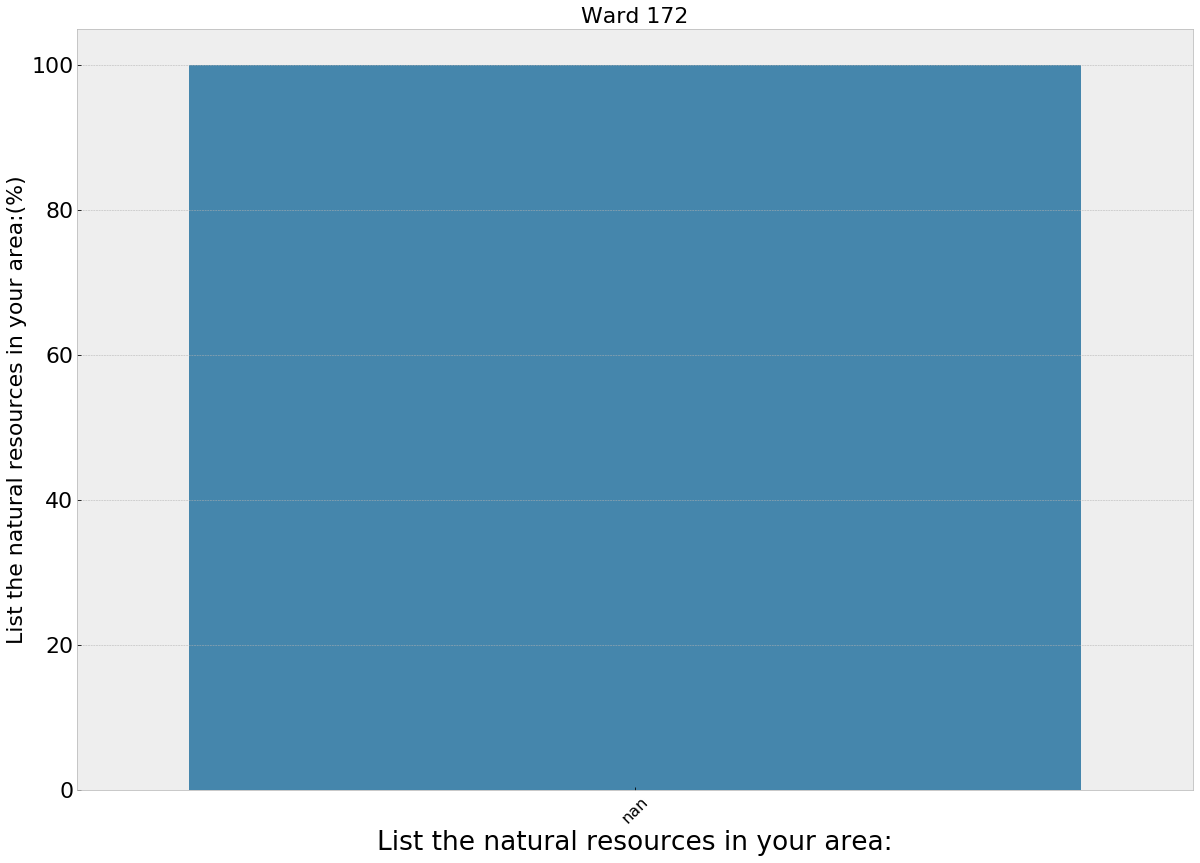

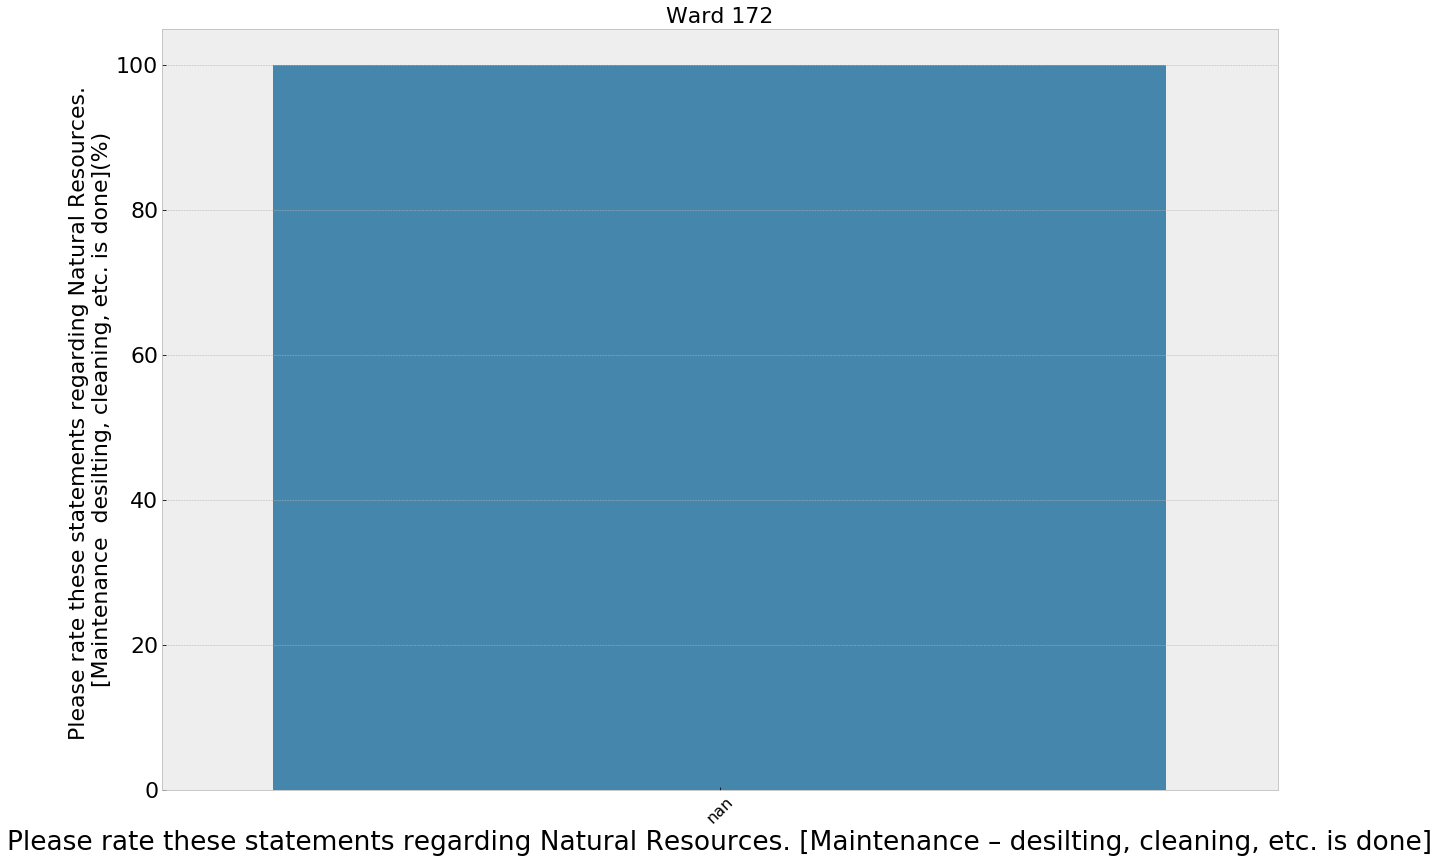

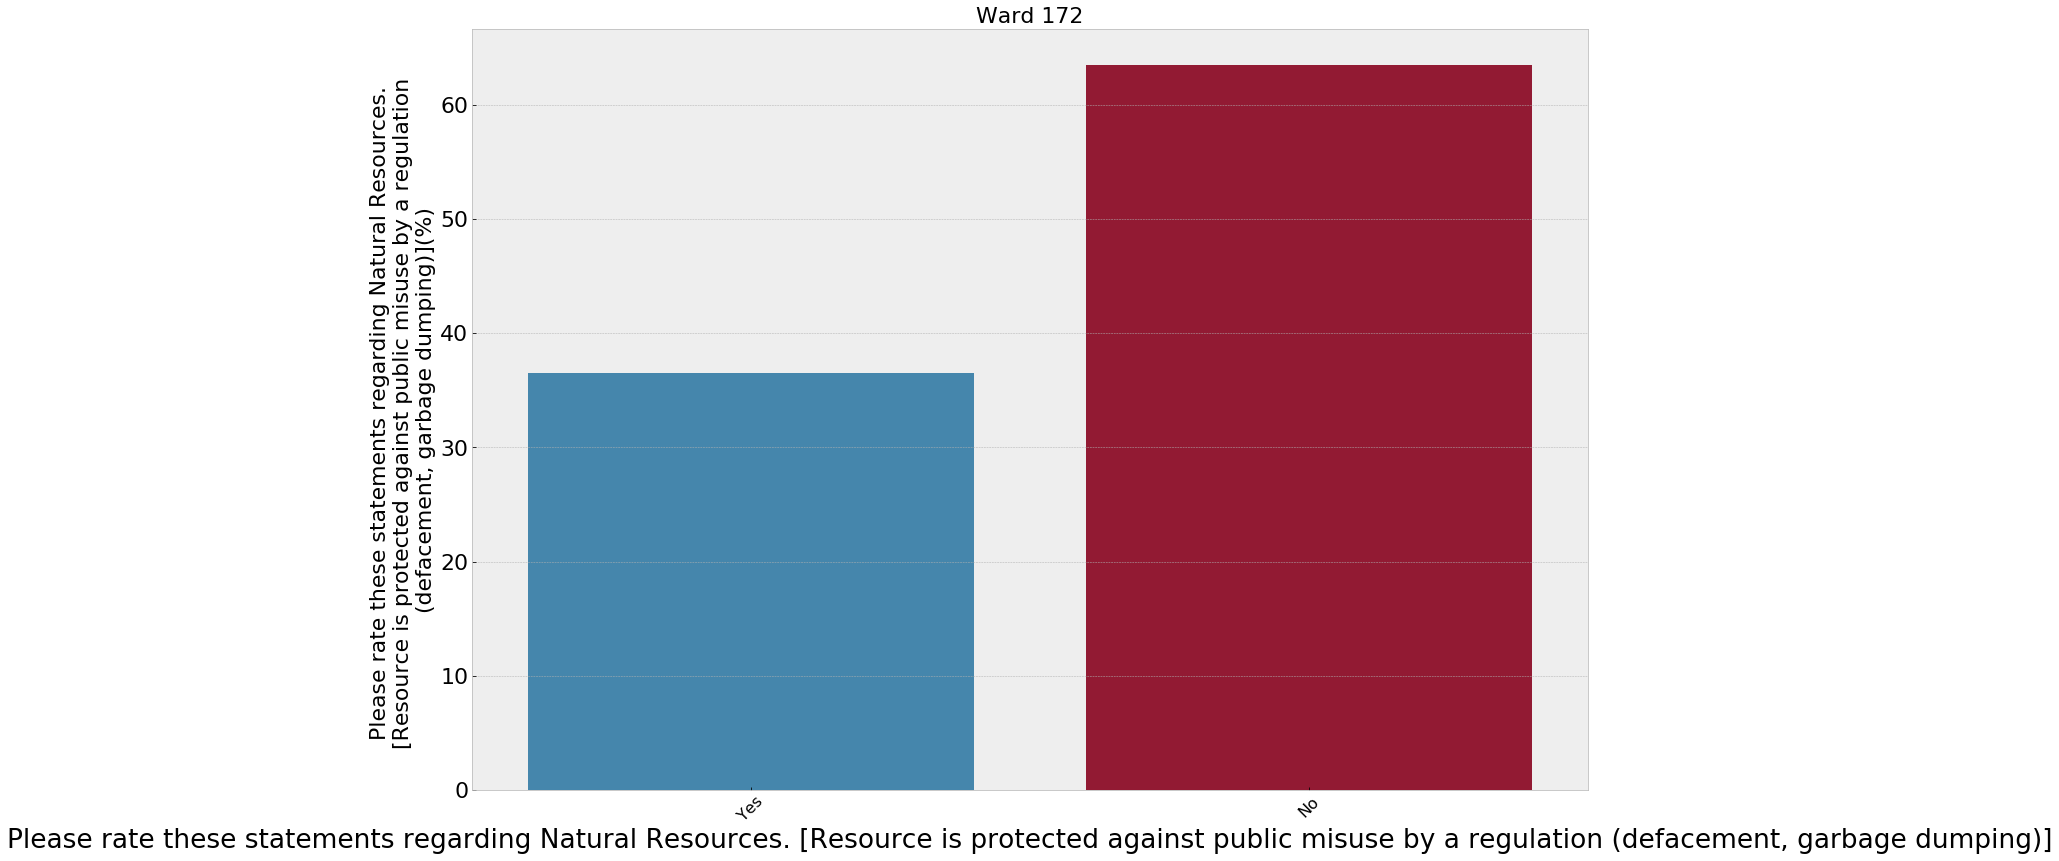

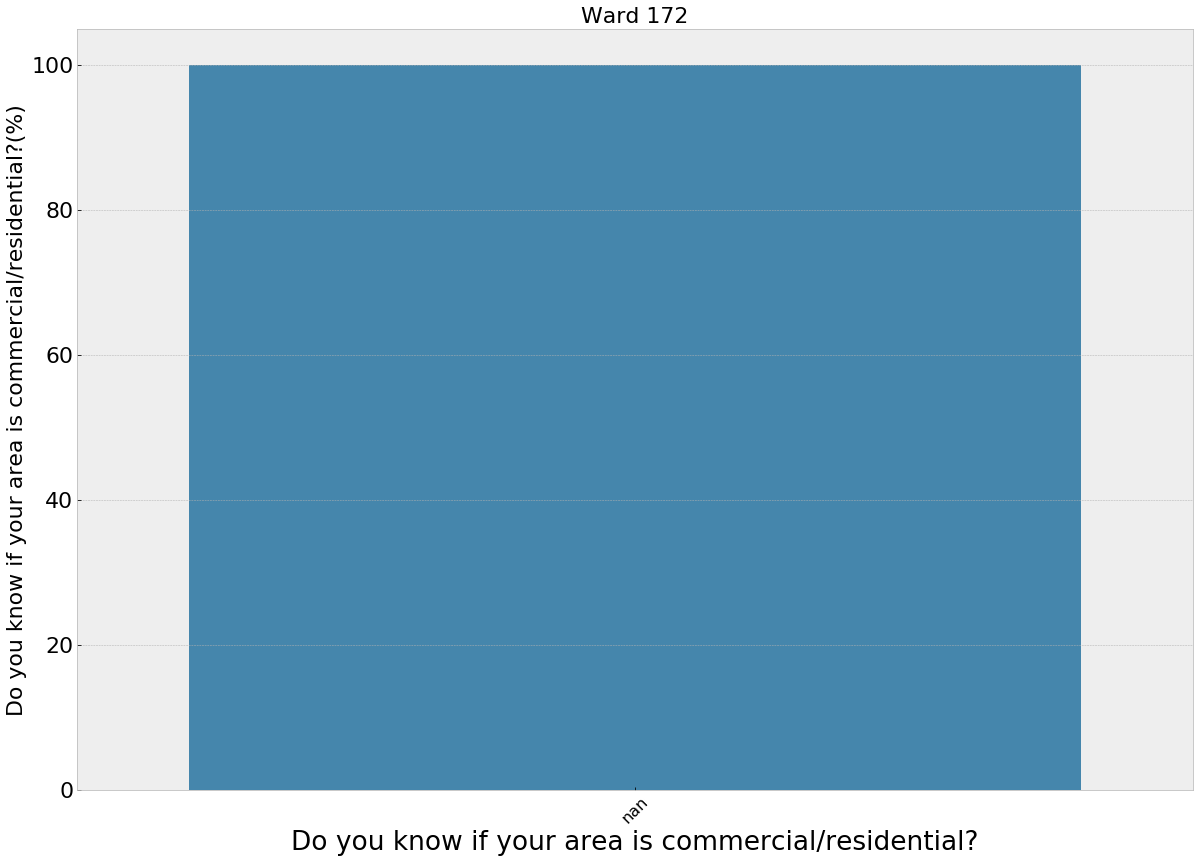

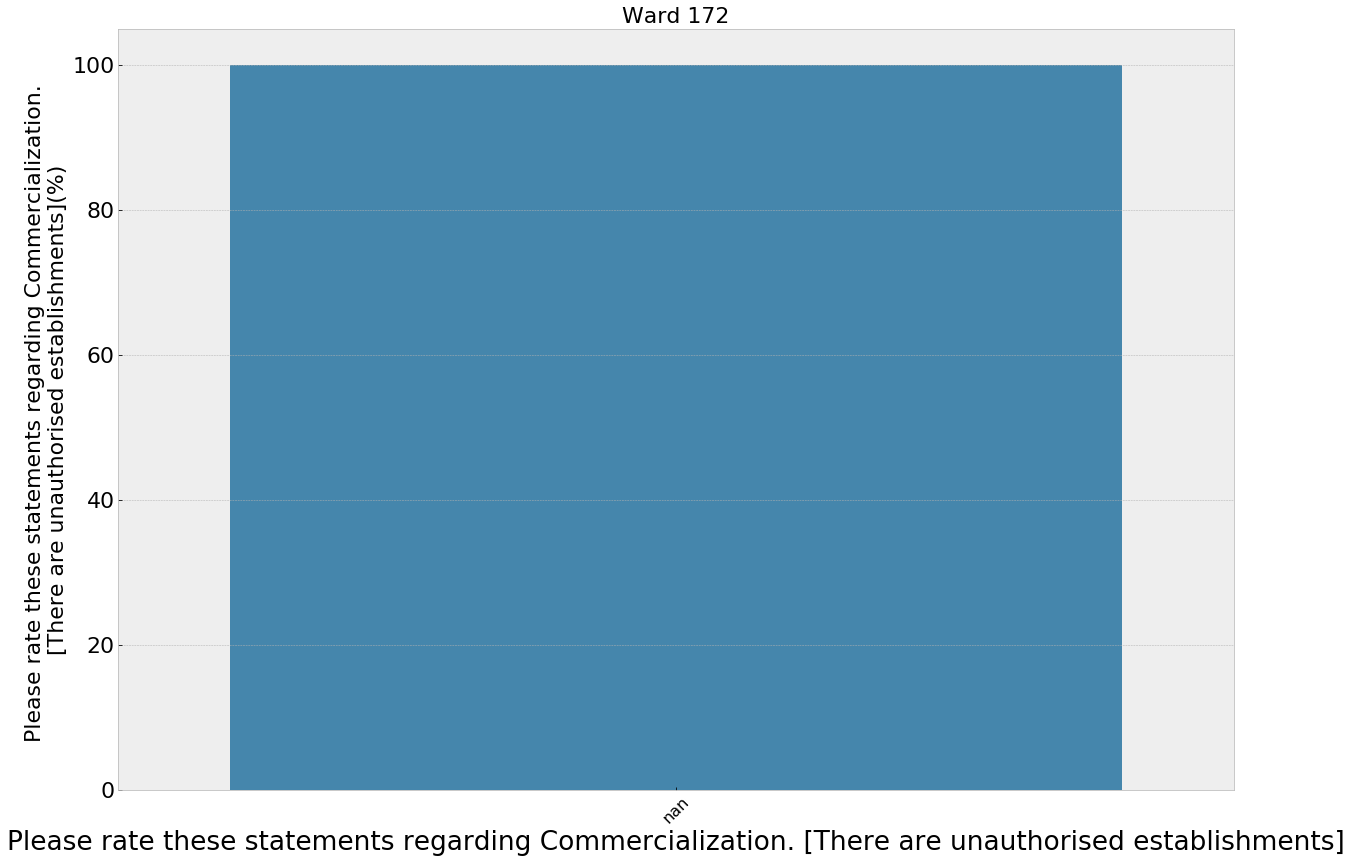

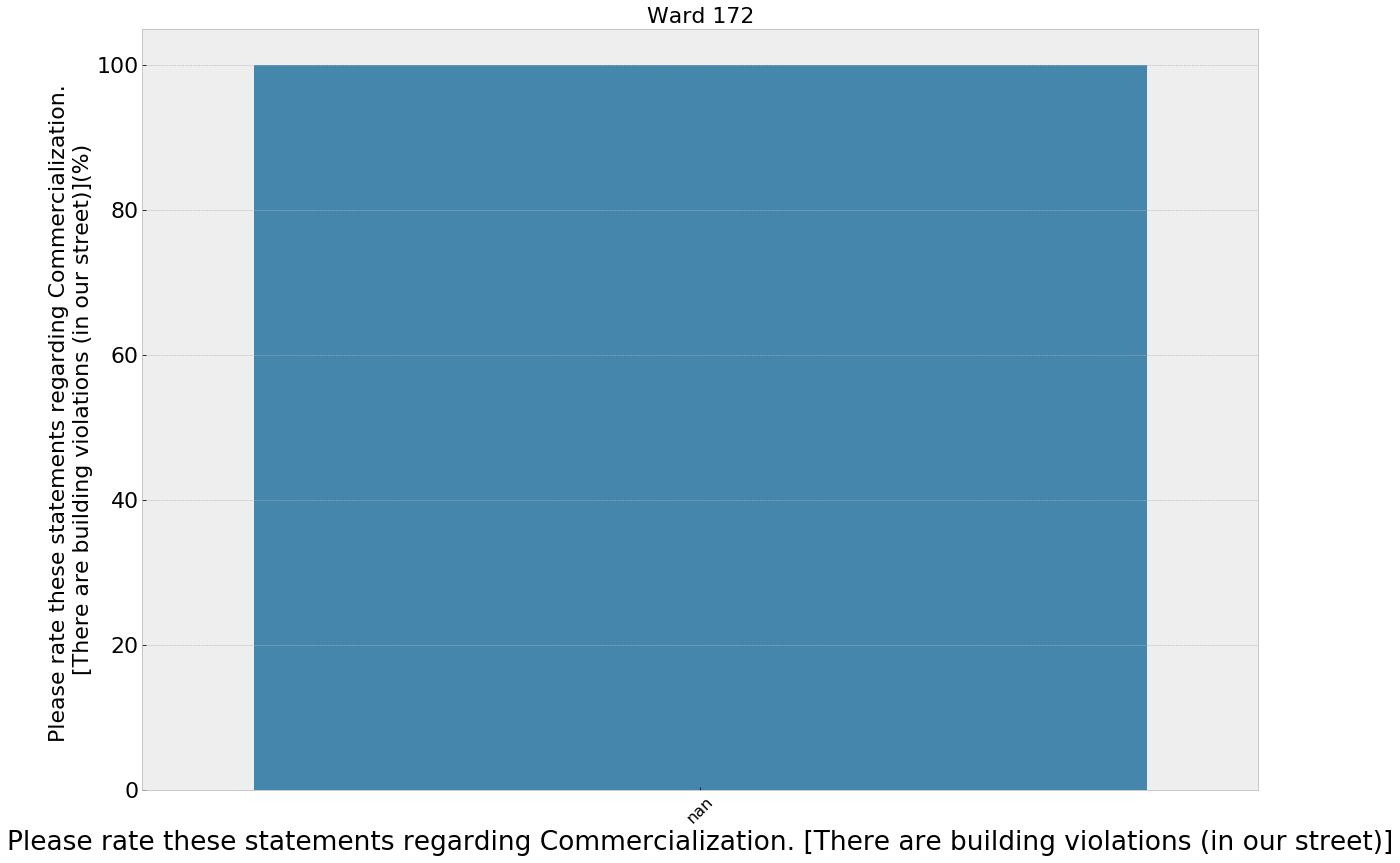

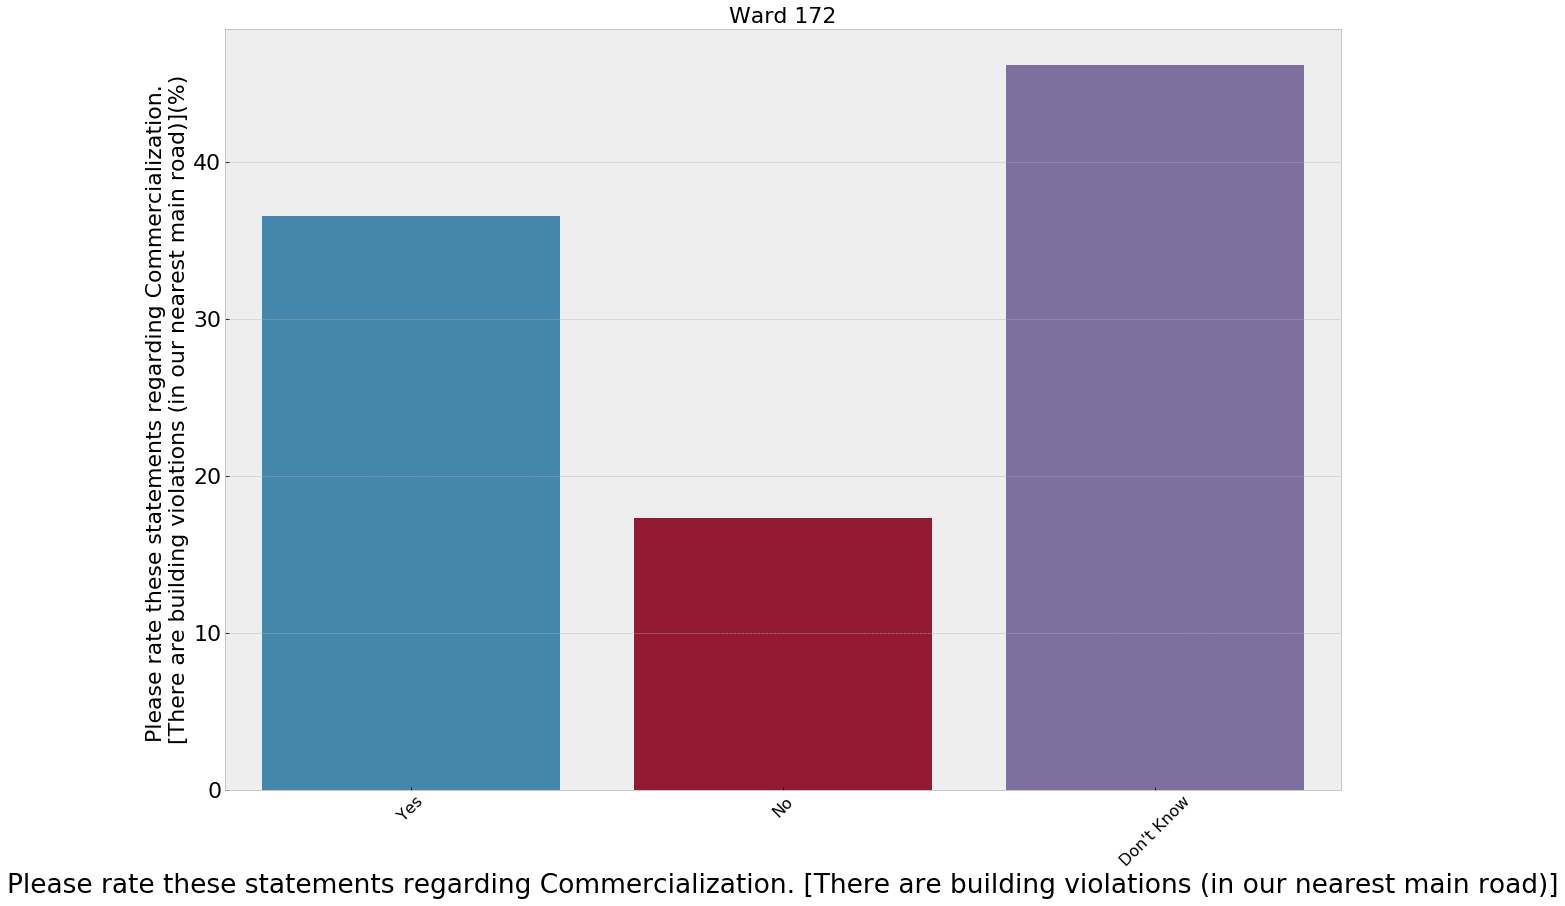

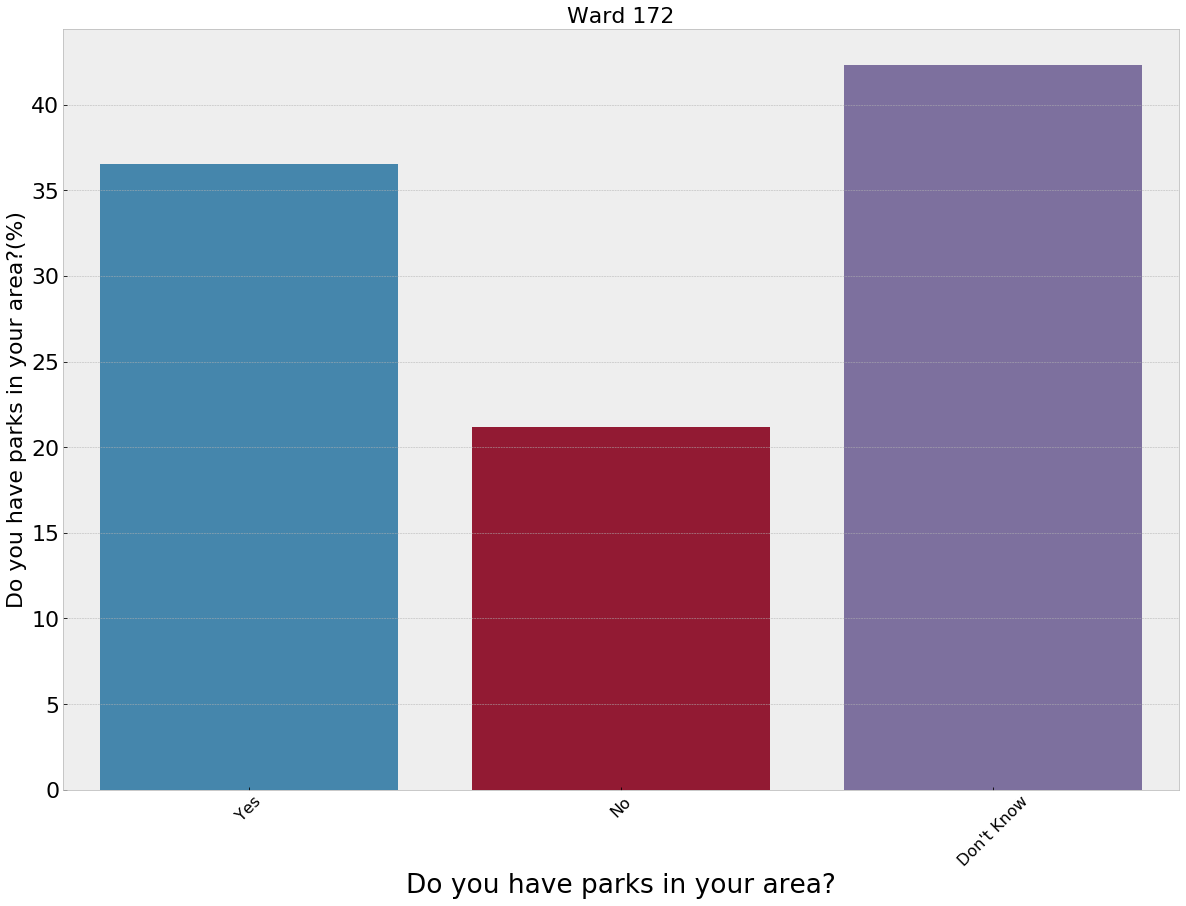

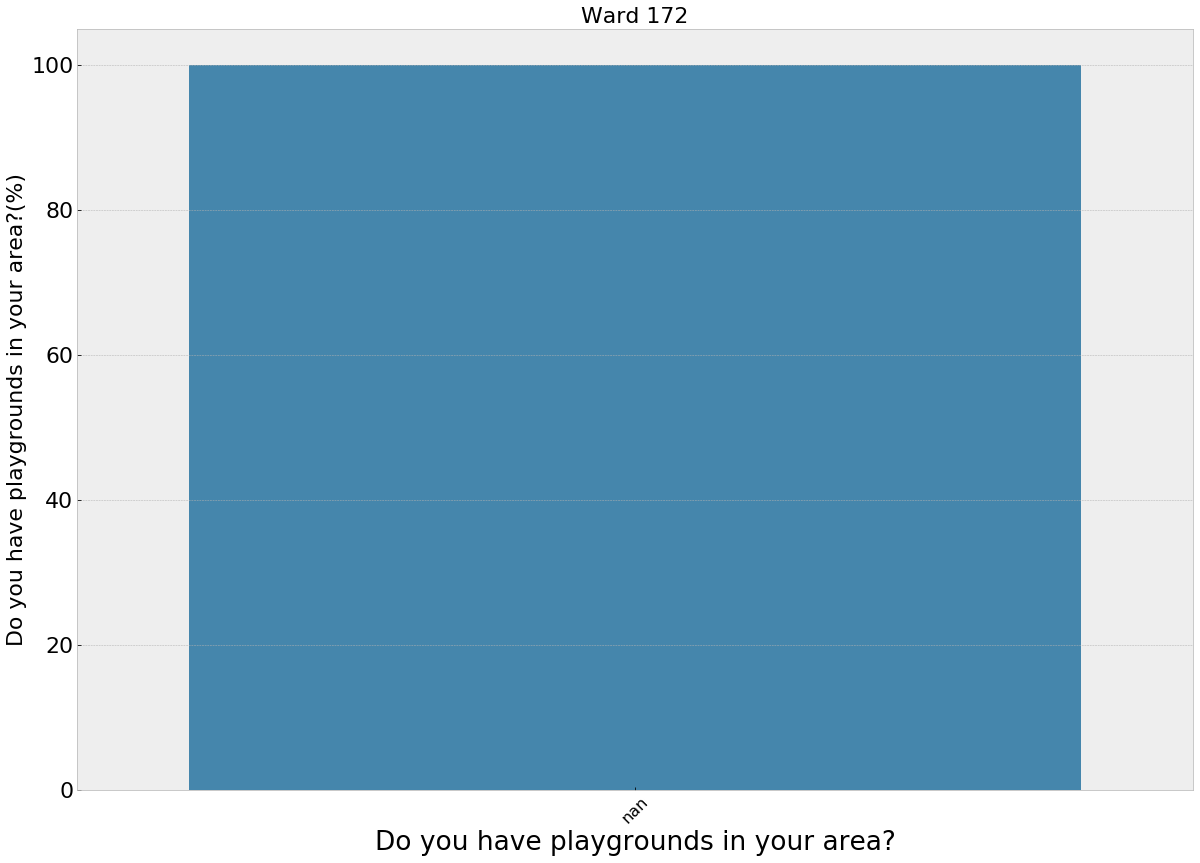

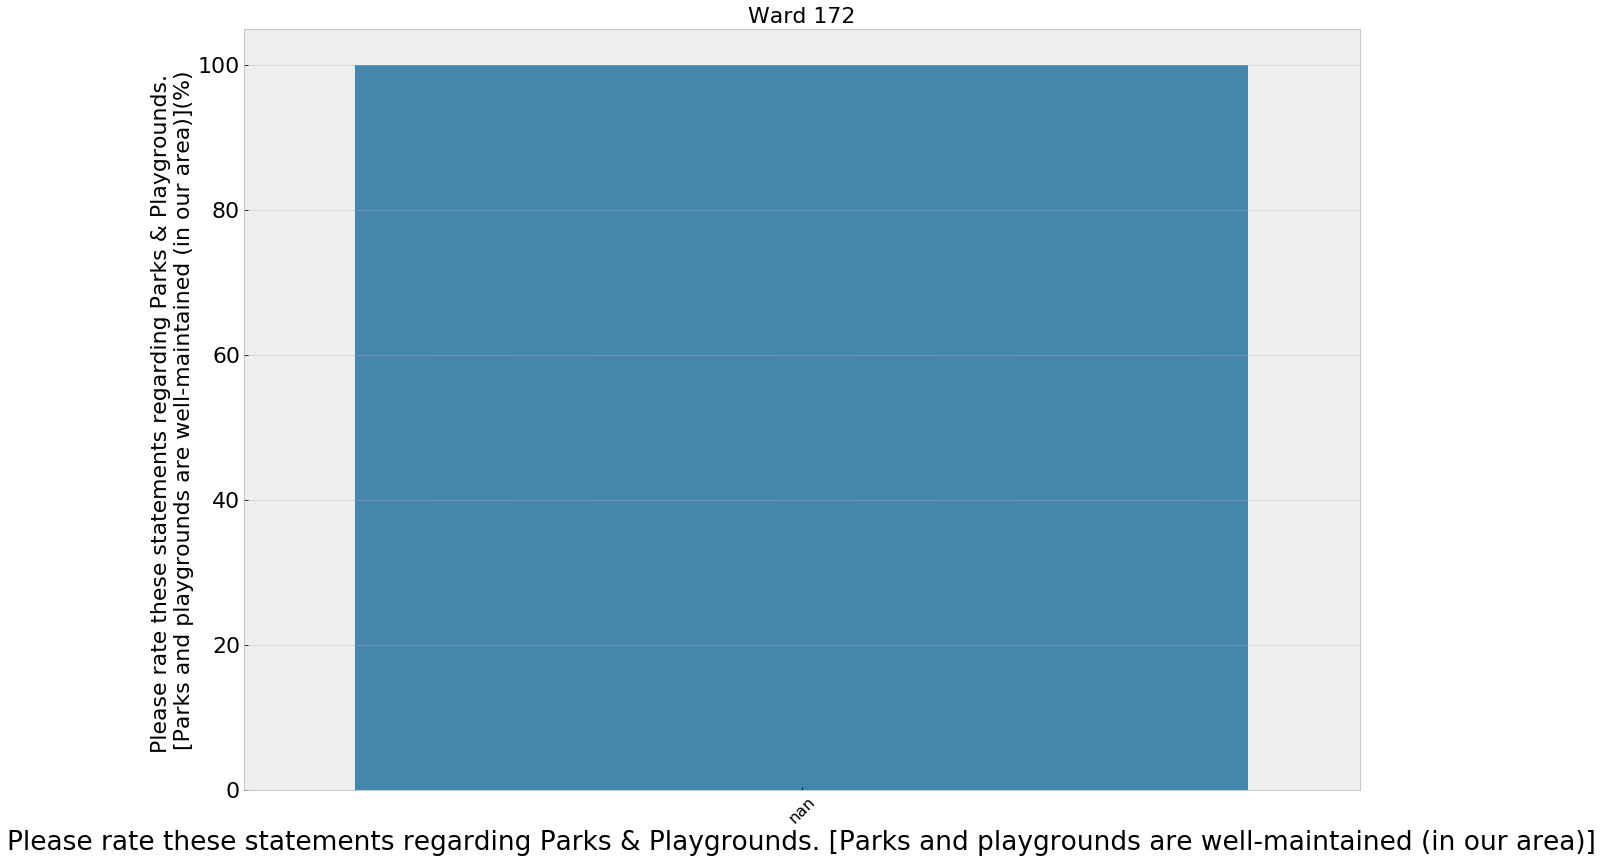

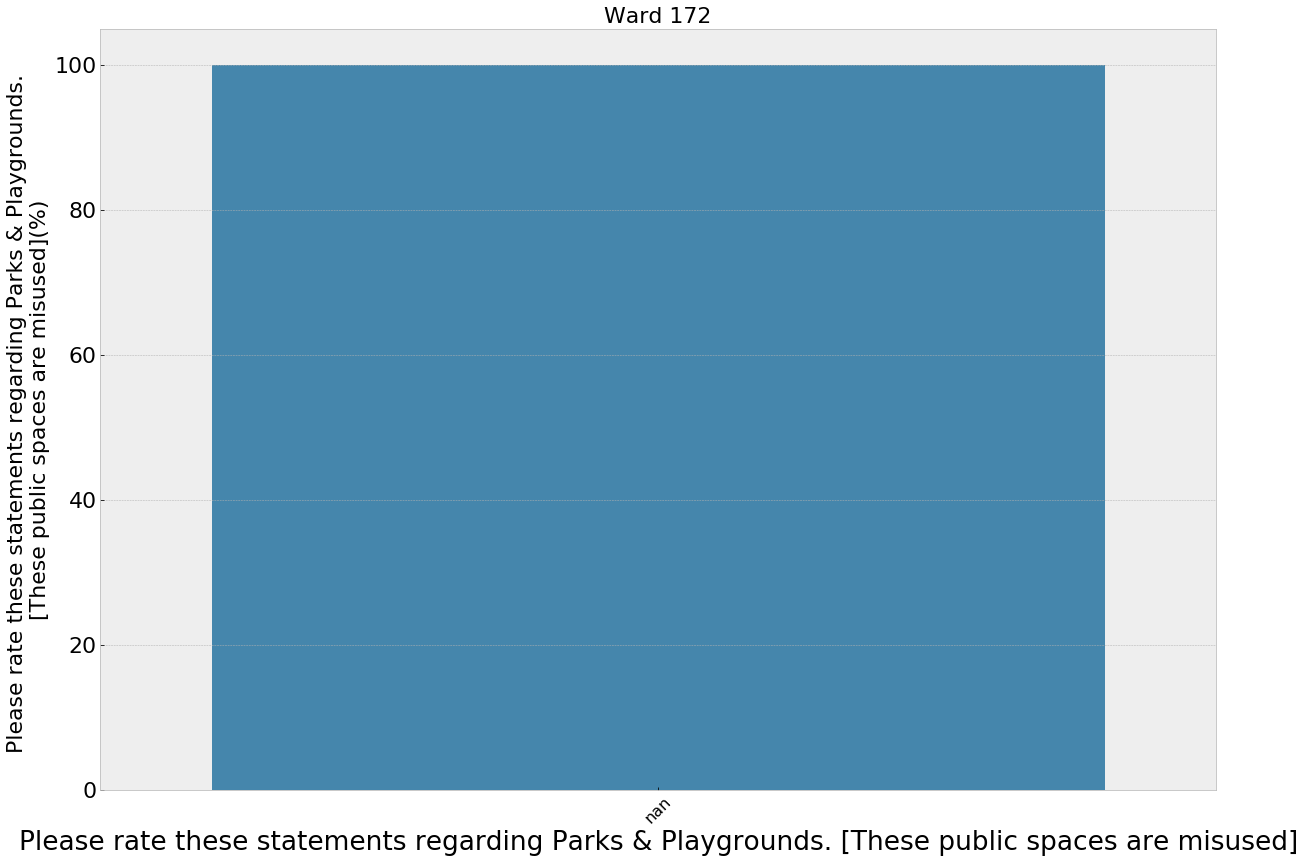

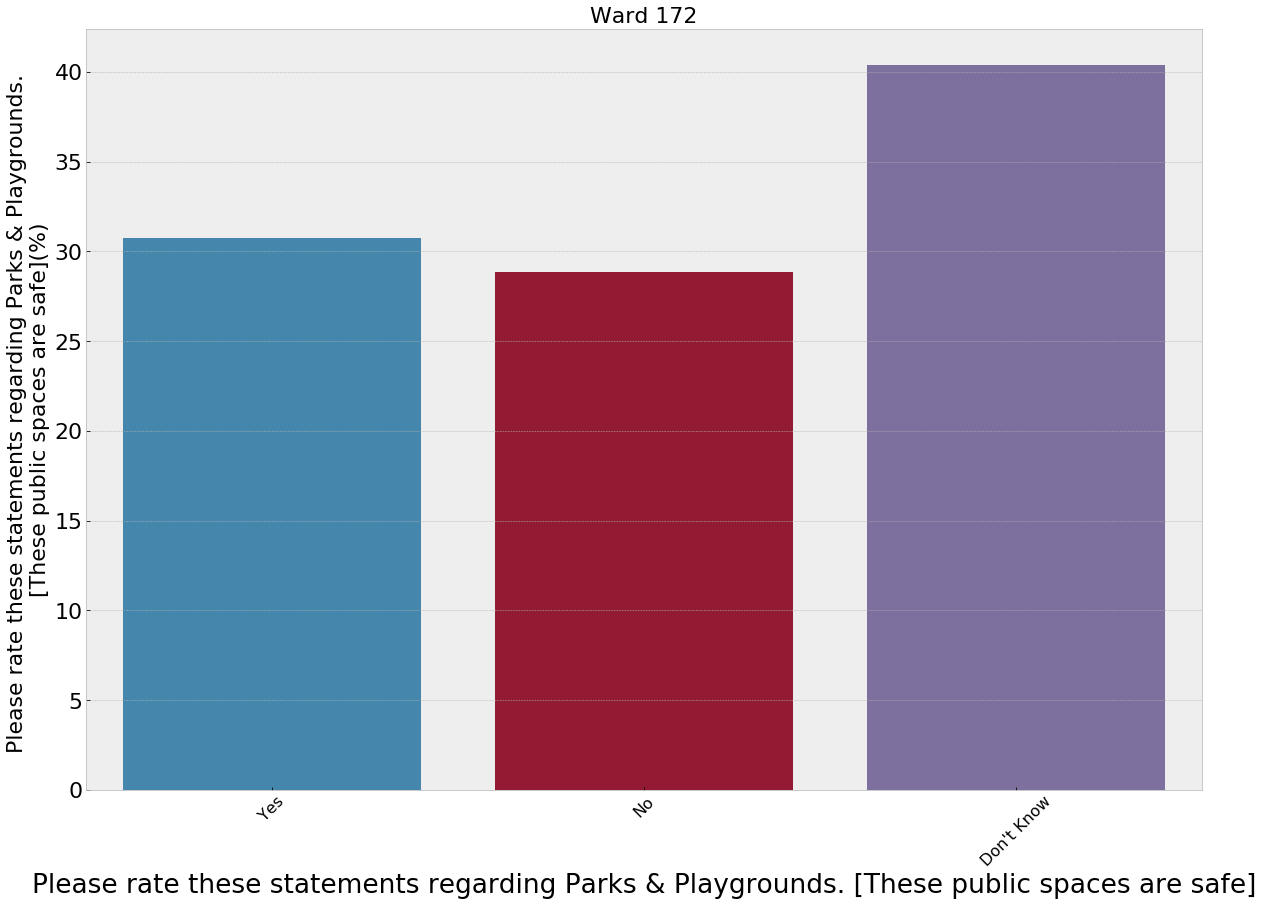

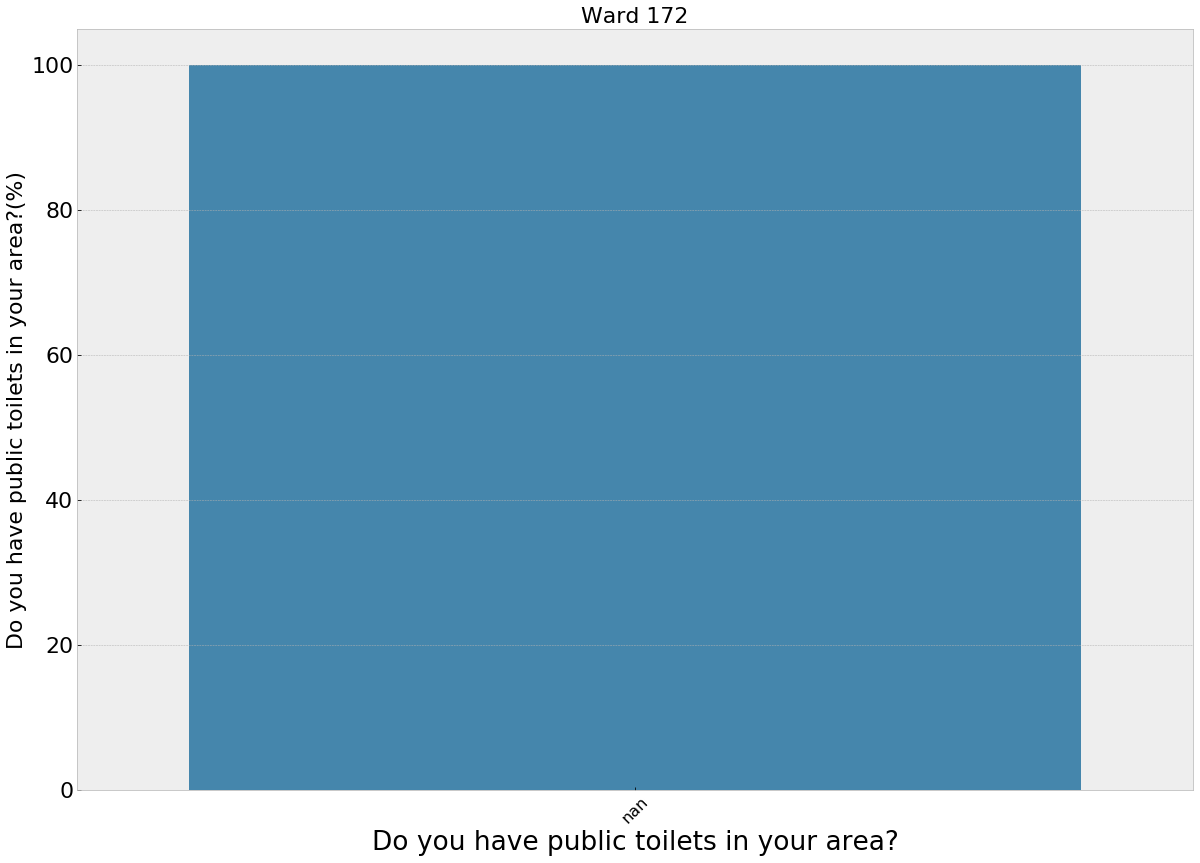

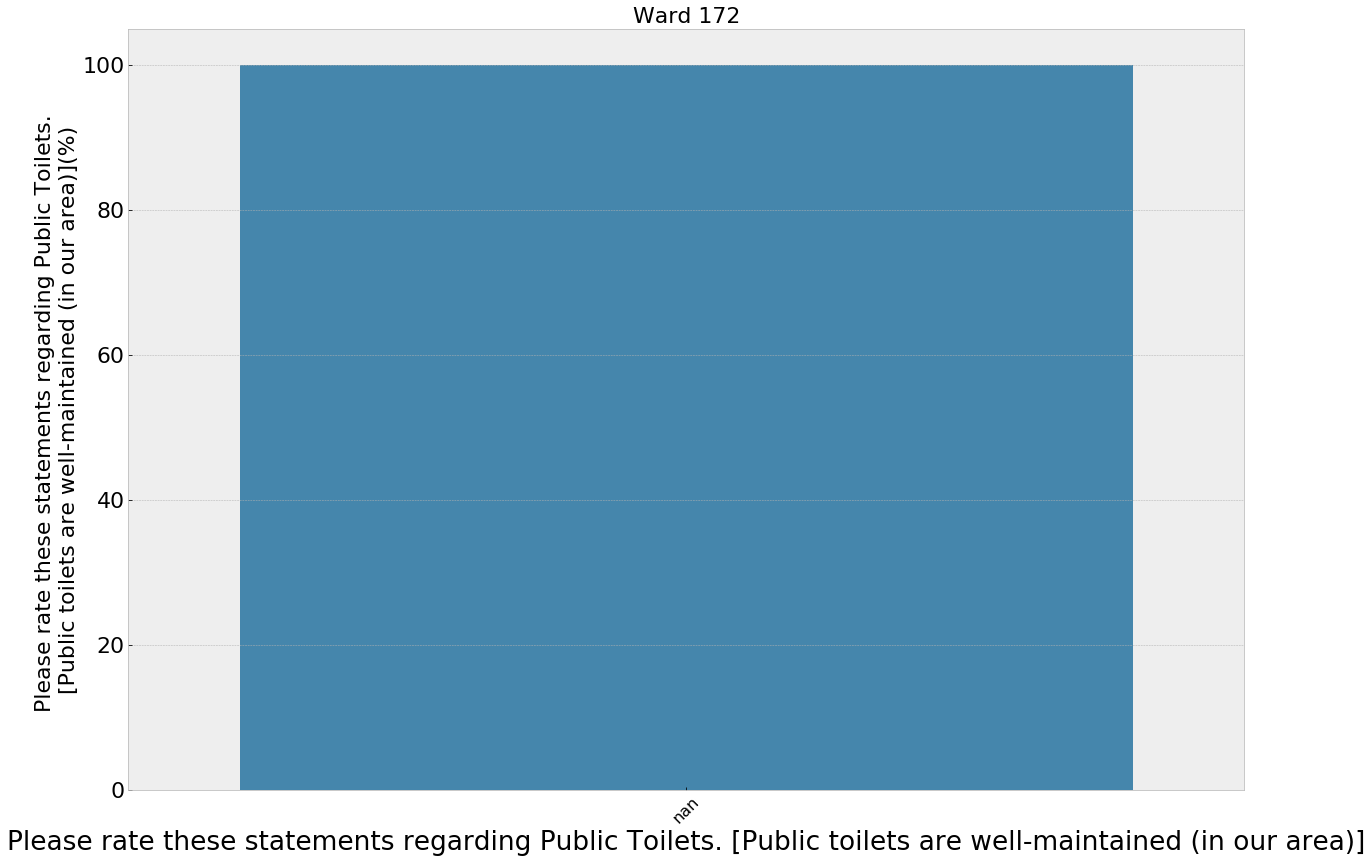

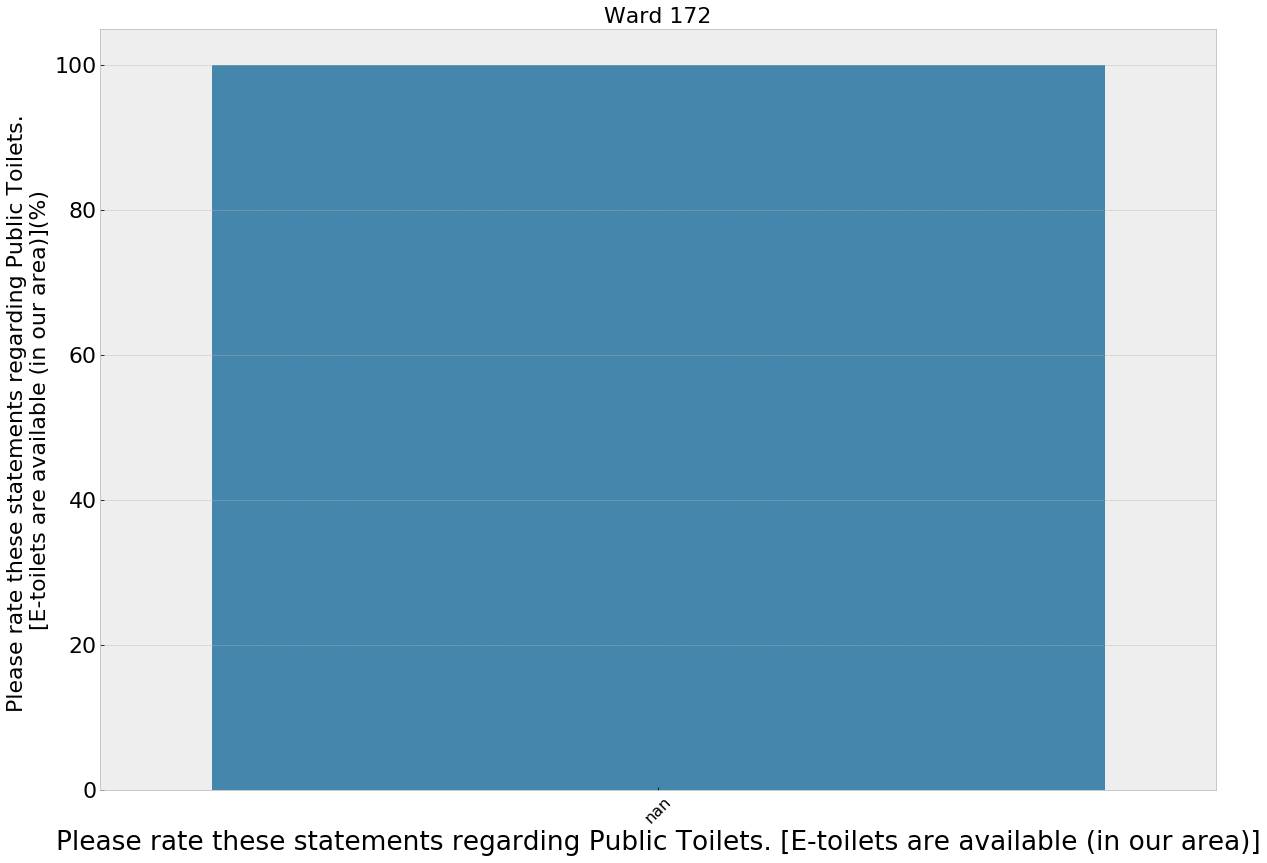

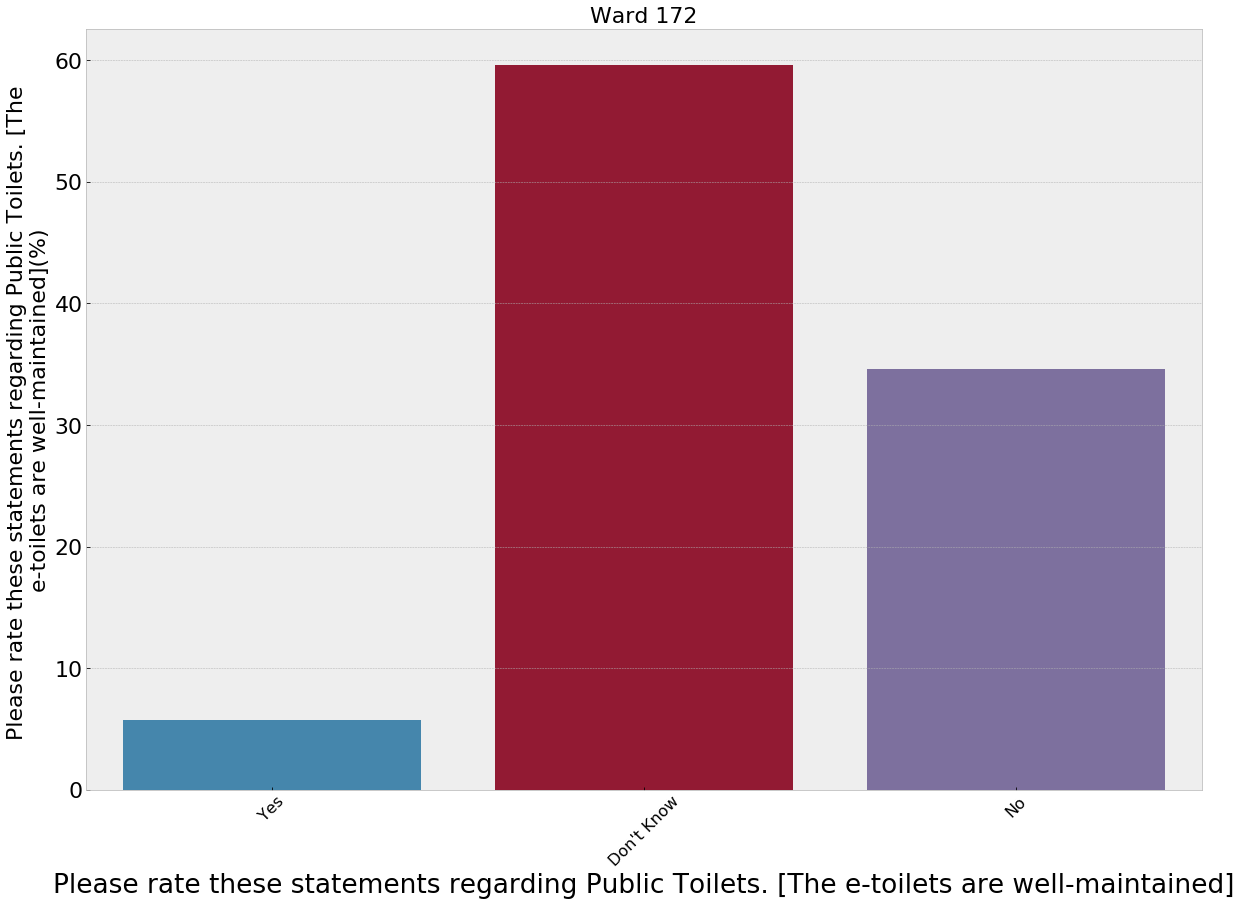

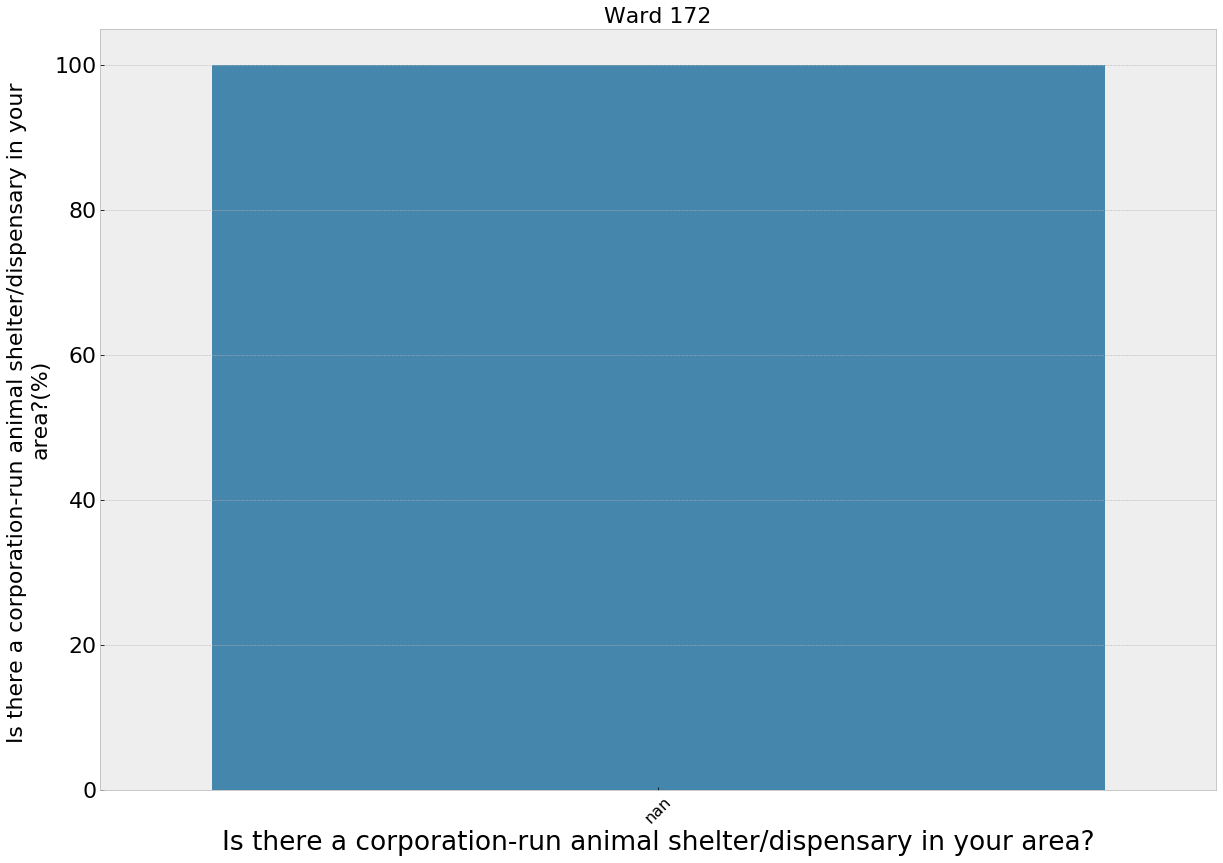

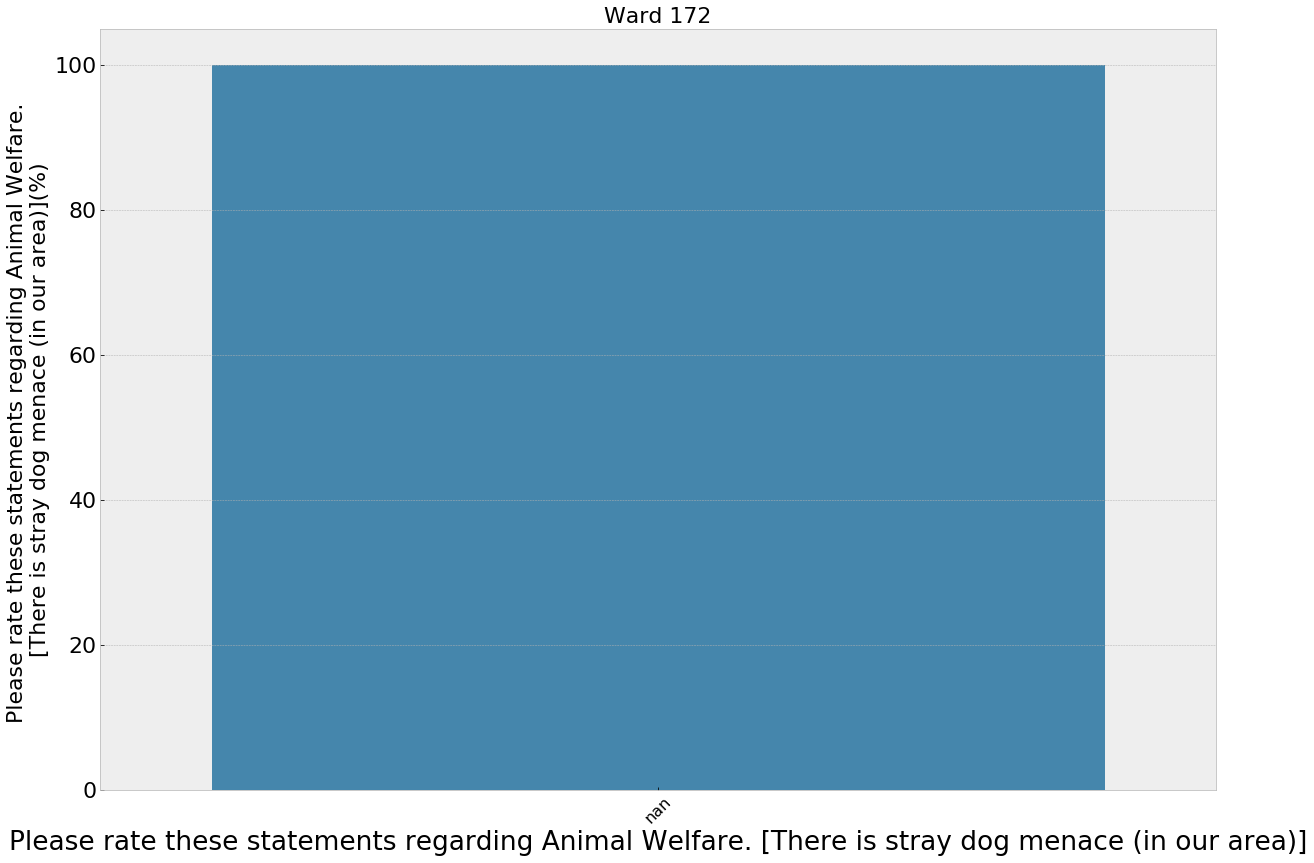

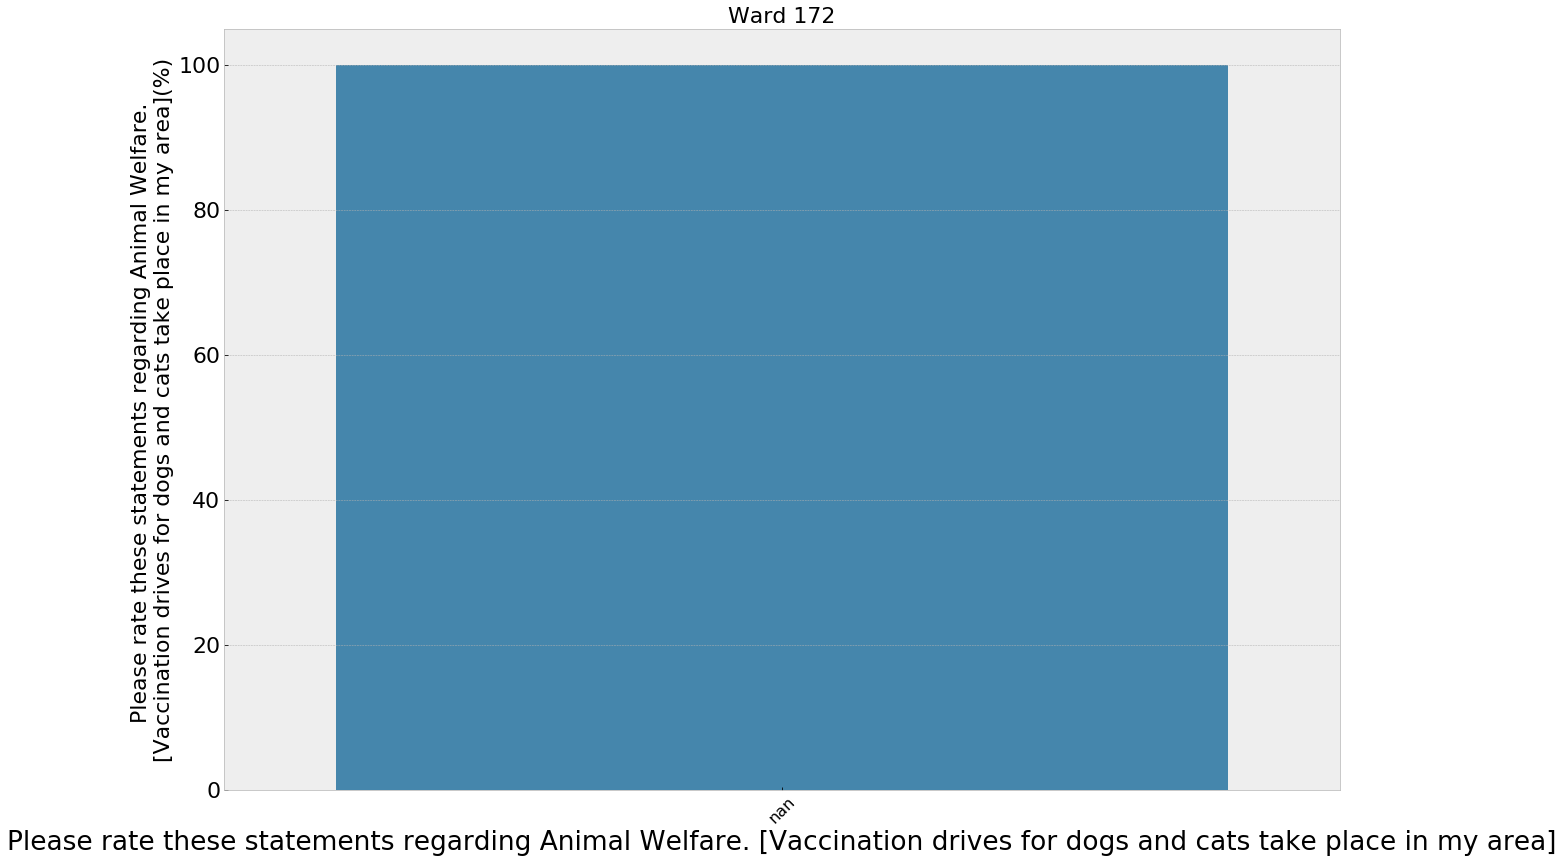

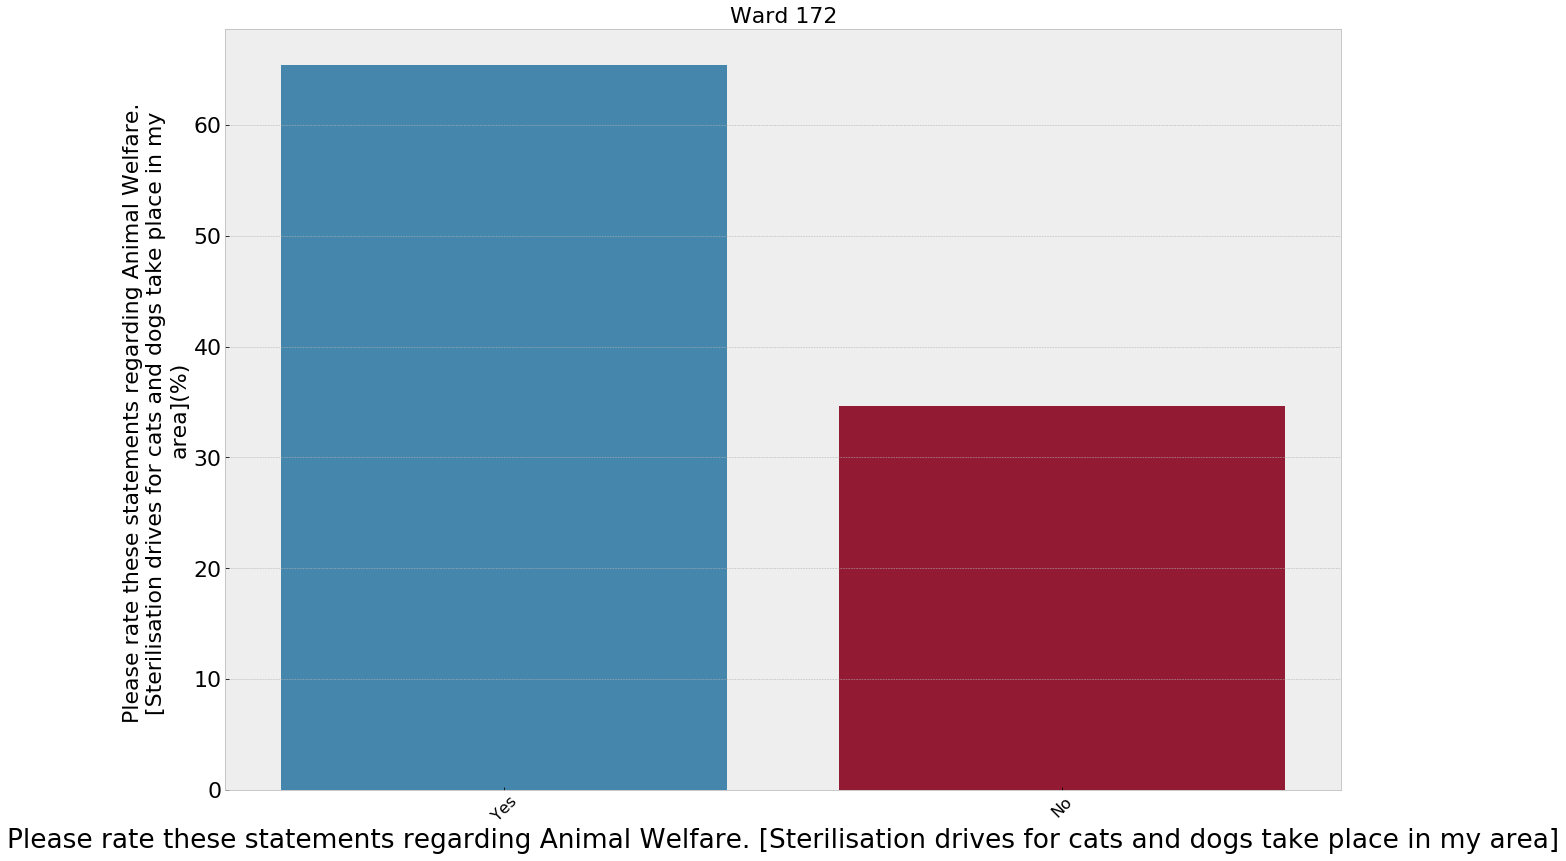

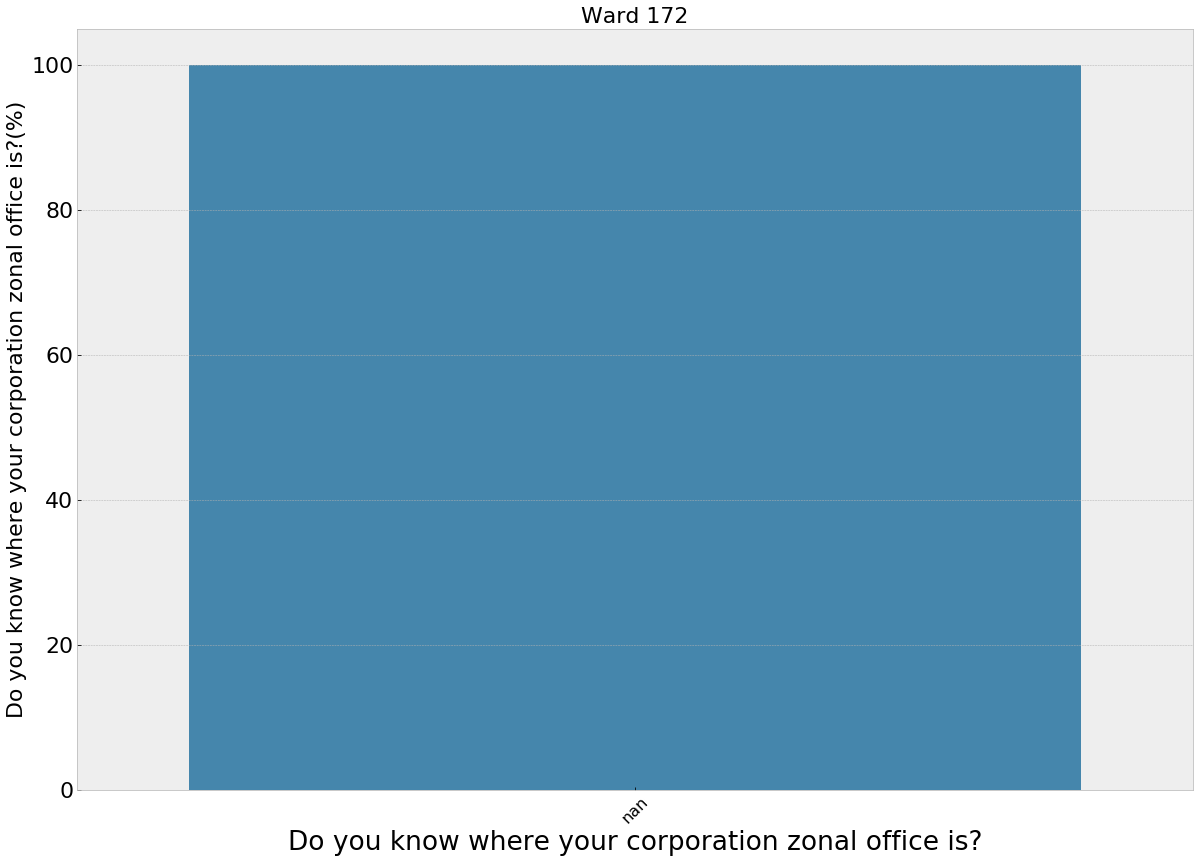

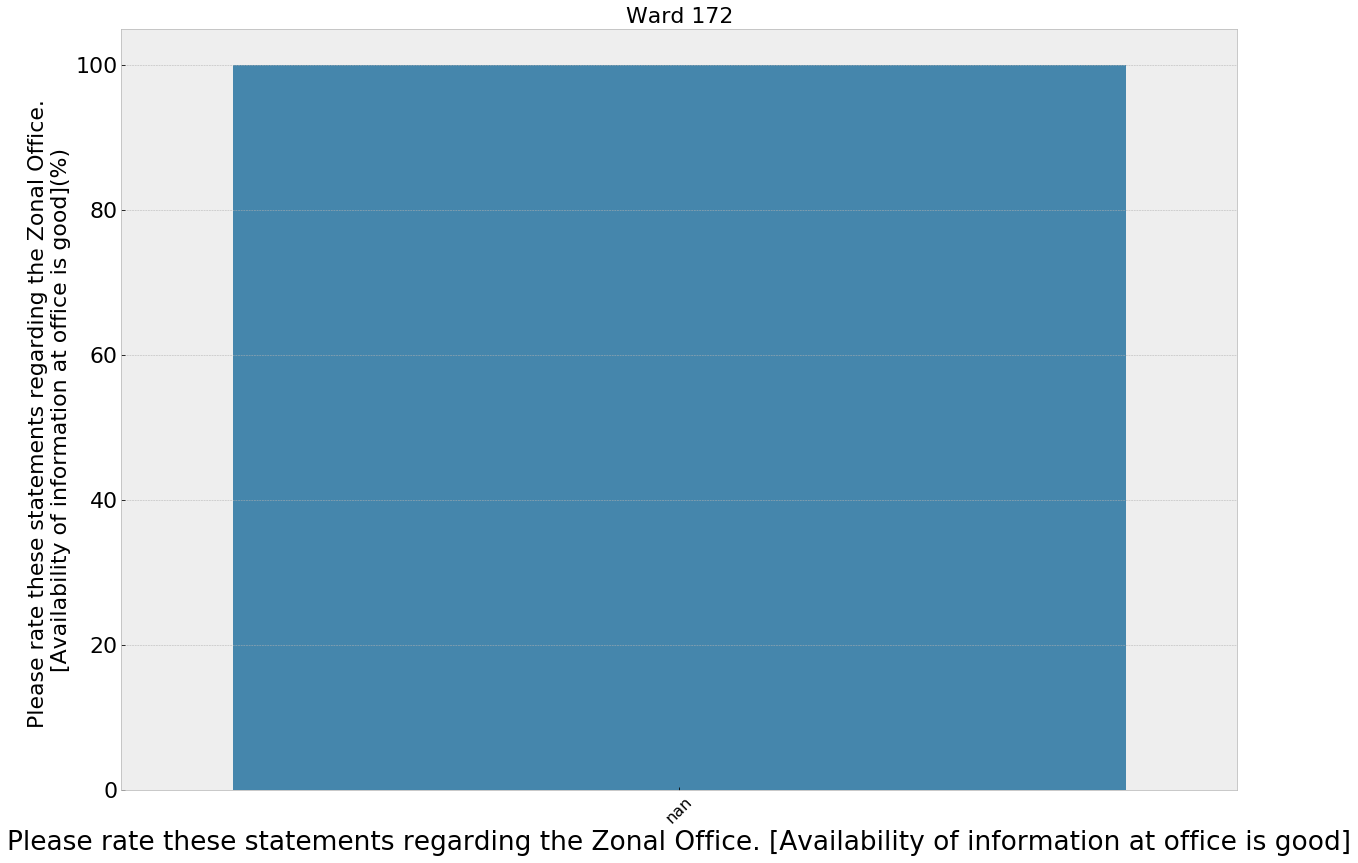

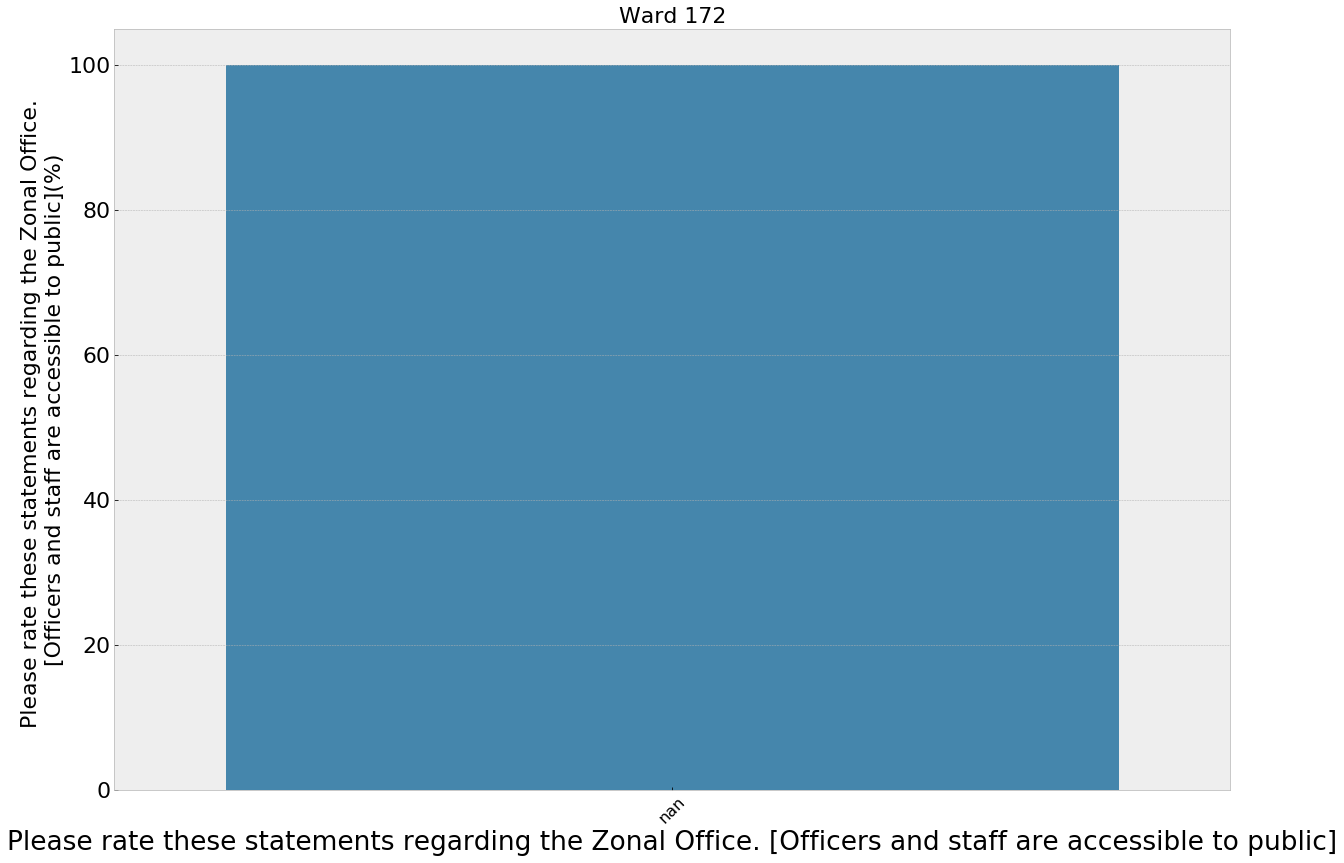

In [11]:
for colname in ward_172.columns[3:152]:
    plot_column(col=colname, data=ward_172, ward='172')